In [70]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorly as tl

## Load MVBS after PCP

In [55]:
MVBS_path = '/Users/wu-jung/code_git/ooi_sonar/zplsc_data_2015fall/nc_MVBS_envFromFile/'
MVBS_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_all.nc'

In [56]:
MVBS = xr.open_dataset(os.path.join(MVBS_path, MVBS_file))
MVBS

<xarray.Dataset>
Dimensions:    (frequency: 3, ping_time: 8928, range_bin: 41)
Coordinates:
  * range_bin  (range_bin) int64 0 1 2 3 4 5 6 7 8 ... 33 34 35 36 37 38 39 40
  * frequency  (frequency) float32 120000.0 38000.0 200000.0
  * ping_time  (ping_time) datetime64[ns] 2015-08-17 ... 2015-10-17T23:16:40
Data variables:
    MVBS       (range_bin, ping_time, frequency) float64 ...
    range      (ping_time, range_bin) float64 ...

In [2]:
MVBS_PCP_path = '/Users/wu-jung/code_git/ooi_sonar/zplsc_data_2015fall/nc_PCP_envFromFile/'
MVBS_rpca_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_rpca.nc'

In [20]:
MVBS_rpca = xr.open_dataset(os.path.join(MVBS_PCP_path, MVBS_rpca_file))
MVBS_rpca

<xarray.Dataset>
Dimensions:    (date: 62, depth: 37, frequency: 3, hour: 144)
Coordinates:
  * date       (date) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
  * frequency  (frequency) int64 38000 120000 200000
  * depth      (depth) float64 184.0 179.0 174.0 169.0 ... 14.91 9.943 4.972
  * hour       (hour) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83
Data variables:
    low_rank   (date, frequency, depth, hour) float64 ...
    sparse     (date, frequency, depth, hour) float64 ...

### Prepare the low-rank component for tensor decomposition using `tensorly`

In [21]:
low_rank = MVBS_rpca['low_rank']
low_rank.shape

(62, 3, 37, 144)

In [22]:
type(low_rank.values)

numpy.ndarray

In [23]:
sonar_tensor = tl.tensor(low_rank.values.swapaxes(0,1).reshape(3,62,-1))

In [25]:
sonar_tensor.shape

(3, 62, 5328)

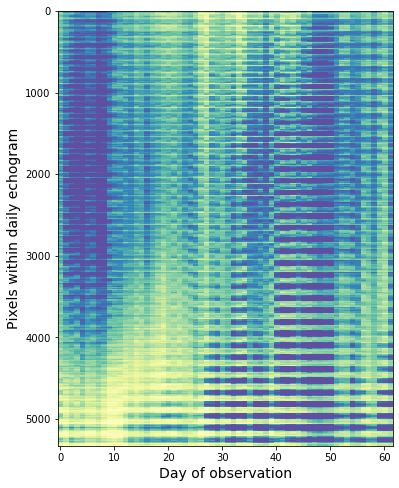

In [32]:
# Plot the first frequency of the reshaped reduced low-rank data matrix
fig = plt.figure(figsize=(6,8))
plt.imshow(tl.unfold(sonar_tensor[0,:,:],mode=1)[::-1,:],
           vmin=-80, vmax=-40,
           aspect='auto',cmap='Spectral_r')
plt.xlabel('Day of observation',fontsize=14)
plt.ylabel('Pixels within daily echogram',fontsize=14)
plt.show()

## Tensor decomposition

In [33]:
# kruskal decomposition is parafac in tensorly
from tensorly.decomposition import parafac
from tensorly.tenalg import kronecker, khatri_rao

In [34]:
kruskal_rank = 3

### Decomposition: `init='random'`

In [88]:
nonneg_3_rand = parafac(sonar_tensor-sonar_tensor.min(),  # non-negative kruskal
                       rank = 3,
                       n_iter_max=50000, 
                       verbose=1, 
                       tol=1e-11,
                       init='random',
                       normalize_factors=True,
                       non_negative=True)

reconstruction error=0.2599741057578814
reconstruction error=0.20588564607748872, variation=0.054088459680392664.
reconstruction error=0.17980980870941074, variation=0.026075837368077975.
reconstruction error=0.16266056792347028, variation=0.01714924078594046.
reconstruction error=0.15051172748643502, variation=0.012148840437035263.
reconstruction error=0.14157301380580378, variation=0.008938713680631233.
reconstruction error=0.13479088917320917, variation=0.006782124632594616.
reconstruction error=0.129508910837028, variation=0.005281978336181159.
reconstruction error=0.12530115382197698, variation=0.004207757015051022.
reconstruction error=0.12188132670471173, variation=0.0034198271172652533.
reconstruction error=0.11905103634615327, variation=0.00283029035855846.
reconstruction error=0.11666912543130355, variation=0.0023819109148497247.
reconstruction error=0.11463282465374437, variation=0.0020363007775591746.
reconstruction error=0.11286578817736861, variation=0.001767036476375758.

reconstruction error=0.06836104941074254, variation=0.00011279089790811048.
reconstruction error=0.06825066258437451, variation=0.00011038682636803354.
reconstruction error=0.0681426660714872, variation=0.00010799651288731504.
reconstruction error=0.06803704335946595, variation=0.00010562271202124718.
reconstruction error=0.06793377525413974, variation=0.00010326810532620967.
reconstruction error=0.06783283997062417, variation=0.00010093528351556857.
reconstruction error=0.06773421323896779, variation=9.862673165637881e-05.
reconstruction error=0.0676378684218279, variation=9.634481713989562e-05.
reconstruction error=0.06754377664305374, variation=9.409177877416075e-05.
reconstruction error=0.06745190692460847, variation=9.186971844526992e-05.
reconstruction error=0.06736222633068382, variation=8.968059392464034e-05.
reconstruction error=0.06727470011756412, variation=8.752621311970687e-05.
reconstruction error=0.0671892918881892, variation=8.540822937491699e-05.
reconstruction error=0

reconstruction error=0.06381272634714016, variation=1.0016265263548818e-05.
reconstruction error=0.06380284512521477, variation=9.881221925397976e-06.
reconstruction error=0.06379309625298654, variation=9.74887222822407e-06.
reconstruction error=0.0637834771118094, variation=9.619141177141799e-06.
reconstruction error=0.0637739851552198, variation=9.49195658959956e-06.
reconstruction error=0.06376461790670203, variation=9.367248517772042e-06.
reconstruction error=0.06375537295722478, variation=9.244949477252296e-06.
reconstruction error=0.06374624796274603, variation=9.124994478748594e-06.
reconstruction error=0.06373724064227501, variation=9.007320471016156e-06.
reconstruction error=0.06372834877516159, variation=8.891867113419716e-06.
reconstruction error=0.06371957019946302, variation=8.778575698573099e-06.
reconstruction error=0.0637109028093367, variation=8.667390126324004e-06.
reconstruction error=0.06370234455335276, variation=8.558255983934226e-06.
reconstruction error=0.063693

reconstruction error=0.06319005875771737, variation=3.205700296771141e-06.
reconstruction error=0.06318687858302245, variation=3.1801746949167153e-06.
reconstruction error=0.06318372362824615, variation=3.154954776304897e-06.
reconstruction error=0.06318059359238878, variation=3.130035857362712e-06.
reconstruction error=0.06317748817892187, variation=3.105413466916729e-06.
reconstruction error=0.06317440709580141, variation=3.081083120456962e-06.
reconstruction error=0.06317135005533066, variation=3.0570404707525034e-06.
reconstruction error=0.06316831677405824, variation=3.0332812724215286e-06.
reconstruction error=0.06316530697282896, variation=3.0098012292756327e-06.
reconstruction error=0.06316232037656218, variation=2.9865962667824375e-06.
reconstruction error=0.0631593567142472, variation=2.963662314975357e-06.
reconstruction error=0.06315641571890981, variation=2.9409953373887854e-06.
reconstruction error=0.06315349712739486, variation=2.918591514952662e-06.
reconstruction error

reconstruction error=0.06293144633662297, variation=1.4995397206174488e-06.
reconstruction error=0.0629299542393001, variation=1.4920973228638168e-06.
reconstruction error=0.06292846951675674, variation=1.4847225433683997e-06.
reconstruction error=0.0629269921017701, variation=1.4774149866420005e-06.
reconstruction error=0.06292552192800657, variation=1.4701737635208767e-06.
reconstruction error=0.06292405892975729, variation=1.4629982492825322e-06.
reconstruction error=0.06292260304206947, variation=1.455887687823454e-06.
reconstruction error=0.06292115420055092, variation=1.4488415185504033e-06.
reconstruction error=0.06291971234155475, variation=1.441858996170664e-06.
reconstruction error=0.06291827740206829, variation=1.4349394864554554e-06.
reconstruction error=0.06291684931965776, variation=1.4280824105344925e-06.
reconstruction error=0.06291542803263946, variation=1.4212870182994664e-06.
reconstruction error=0.06291401347987108, variation=1.4145527683778747e-06.
reconstruction e

reconstruction error=0.06278965715620433, variation=9.451423089862354e-07.
reconstruction error=0.06278871457208686, variation=9.425841174665051e-07.
reconstruction error=0.06278777452322715, variation=9.400488597127721e-07.
reconstruction error=0.06278683698707963, variation=9.375361475216781e-07.
reconstruction error=0.06278590194108143, variation=9.350459981988246e-07.
reconstruction error=0.06278496936305349, variation=9.325780279401119e-07.
reconstruction error=0.06278403923079284, variation=9.301322606430906e-07.
reconstruction error=0.06278311152240008, variation=9.27708392758908e-07.
reconstruction error=0.0627821862161191, variation=9.253062809855273e-07.
reconstruction error=0.06278126329026347, variation=9.229258556286979e-07.
reconstruction error=0.06278034272345491, variation=9.205668085598973e-07.
reconstruction error=0.06277942449438266, variation=9.182290722498099e-07.
reconstruction error=0.0627785085819528, variation=9.159124298580013e-07.
reconstruction error=0.06277

reconstruction error=0.06268642312837232, variation=7.596028619716311e-07.
reconstruction error=0.0626856642143941, variation=7.589139782160359e-07.
reconstruction error=0.06268490597987304, variation=7.582345210588315e-07.
reconstruction error=0.06268414841520809, variation=7.575646649576884e-07.
reconstruction error=0.0626833915111368, variation=7.569040712807062e-07.
reconstruction error=0.06268263525832712, variation=7.562528096805021e-07.
reconstruction error=0.06268187964754696, variation=7.556107801676148e-07.
reconstruction error=0.06268112466941866, variation=7.549781282922829e-07.
reconstruction error=0.06268037031499483, variation=7.543544238292066e-07.
reconstruction error=0.06267961657509774, variation=7.537398970941522e-07.
reconstruction error=0.06267886344068531, variation=7.531344124317441e-07.
reconstruction error=0.06267811090289137, variation=7.525377939410216e-07.
reconstruction error=0.06267735895270415, variation=7.519501872138568e-07.
reconstruction error=0.0626

reconstruction error=0.0625987231232972, variation=7.30045647920341e-07.
reconstruction error=0.06259799298308805, variation=7.301402091541842e-07.
reconstruction error=0.0625972627440735, variation=7.30239014548606e-07.
reconstruction error=0.06259653240217233, variation=7.303419011644996e-07.
reconstruction error=0.06259580195317796, variation=7.304489943738002e-07.
reconstruction error=0.06259507139306461, variation=7.305601133489326e-07.
reconstruction error=0.06259434071763653, variation=7.306754280789196e-07.
reconstruction error=0.06259360992290554, variation=7.307947309936891e-07.
reconstruction error=0.06259287900493914, variation=7.309179664016785e-07.
reconstruction error=0.06259214795959686, variation=7.31045342275416e-07.
reconstruction error=0.06259141678306648, variation=7.311765303774642e-07.
reconstruction error=0.0625906854713256, variation=7.313117408869196e-07.
reconstruction error=0.06258995402060633, variation=7.31450719271276e-07.
reconstruction error=0.062589222

reconstruction error=0.06250718144494644, variation=7.64378354278783e-07.
reconstruction error=0.06250641666830746, variation=7.647766389756727e-07.
reconstruction error=0.06250565149238013, variation=7.651759273280545e-07.
reconstruction error=0.06250488591638673, variation=7.655759934055428e-07.
reconstruction error=0.06250411993946221, variation=7.659769245133008e-07.
reconstruction error=0.06250335356083772, variation=7.663786244921367e-07.
reconstruction error=0.06250258677967054, variation=7.667811671857594e-07.
reconstruction error=0.06250181959528345, variation=7.671843870876716e-07.
reconstruction error=0.06250105200697681, variation=7.675883066382561e-07.
reconstruction error=0.06250028401392119, variation=7.679930556225845e-07.
reconstruction error=0.0624995156155131, variation=7.683984080894546e-07.
reconstruction error=0.062498746811075166, variation=7.688044379311476e-07.
reconstruction error=0.06249797759995908, variation=7.692111160875759e-07.
reconstruction error=0.062

reconstruction error=0.062410075535036906, variation=8.128131869580835e-07.
reconstruction error=0.062409262391486885, variation=8.13143550021378e-07.
reconstruction error=0.06240844891950397, variation=8.134719829133719e-07.
reconstruction error=0.0624076351210722, variation=8.137984317743707e-07.
reconstruction error=0.062406820998218274, variation=8.141228539232381e-07.
reconstruction error=0.062406006552937654, variation=8.144452806196911e-07.
reconstruction error=0.0624051917873469, variation=8.147655907522755e-07.
reconstruction error=0.06240437670344165, variation=8.150839052520342e-07.
reconstruction error=0.06240356130332748, variation=8.154001141721934e-07.
reconstruction error=0.06240274558918403, variation=8.157141434469994e-07.
reconstruction error=0.06240192956313725, variation=8.160260467834912e-07.
reconstruction error=0.06240111322731095, variation=8.163358262980314e-07.
reconstruction error=0.062400296583927685, variation=8.166433832640374e-07.
reconstruction error=0.

reconstruction error=0.06231338252651599, variation=8.327103570571204e-07.
reconstruction error=0.06231254985321335, variation=8.326733026420285e-07.
reconstruction error=0.06231171722110121, variation=8.326321121396307e-07.
reconstruction error=0.0623108846344191, variation=8.325866821118355e-07.
reconstruction error=0.06231005209732822, variation=8.325370908779384e-07.
reconstruction error=0.062309219614095517, variation=8.32483232703074e-07.
reconstruction error=0.06230838718889836, variation=8.324251971544849e-07.
reconstruction error=0.06230755482605799, variation=8.323628403750227e-07.
reconstruction error=0.062306722529741024, variation=8.322963169632436e-07.
reconstruction error=0.062305890304233245, variation=8.322255077783391e-07.
reconstruction error=0.062305058153890265, variation=8.321503429803423e-07.
reconstruction error=0.06230422608297142, variation=8.320709188464059e-07.
reconstruction error=0.062303394095704796, variation=8.319872666223693e-07.
reconstruction error=0

reconstruction error=0.0622230015270877, variation=8.014483152060659e-07.
reconstruction error=0.06222220062606591, variation=8.009010217871482e-07.
reconstruction error=0.06222140027714215, variation=8.003489237601302e-07.
reconstruction error=0.06222060048505158, variation=7.997920905694622e-07.
reconstruction error=0.062219801254597036, variation=7.992304545470508e-07.
reconstruction error=0.062219002590482644, variation=7.986641143917228e-07.
reconstruction error=0.062218204497502705, variation=7.980929799394909e-07.
reconstruction error=0.06221740698035959, variation=7.975171431168215e-07.
reconstruction error=0.06221661004382779, variation=7.969365318008514e-07.
reconstruction error=0.06221581369266184, variation=7.963511659478395e-07.
reconstruction error=0.06221501793155127, variation=7.957611105682827e-07.
reconstruction error=0.06221422276522407, variation=7.951663271998921e-07.
reconstruction error=0.062213428198444436, variation=7.945667796355194e-07.
reconstruction error=0

reconstruction error=0.062132101947439455, variation=7.044028159583493e-07.
reconstruction error=0.062131398584244095, variation=7.033631953604069e-07.
reconstruction error=0.062130696263727955, variation=7.023205161396651e-07.
reconstruction error=0.06212999498890246, variation=7.012748254944801e-07.
reconstruction error=0.062129294762887165, variation=7.002260152960682e-07.
reconstruction error=0.06212859558857436, variation=6.991743128070826e-07.
reconstruction error=0.06212789746895093, variation=6.981196234295828e-07.
reconstruction error=0.06212720040703315, variation=6.970619177773529e-07.
reconstruction error=0.06212650440561671, variation=6.960014164378303e-07.
reconstruction error=0.06212580946764598, variation=6.949379707313352e-07.
reconstruction error=0.062125115596164474, variation=6.938714815080127e-07.
reconstruction error=0.062124422793797006, variation=6.928023674676598e-07.
reconstruction error=0.062123731063490416, variation=6.917303065900882e-07.
reconstruction err

reconstruction error=0.06205580528368765, variation=5.643633509758161e-07.
reconstruction error=0.06205524215899956, variation=5.63124688088279e-07.
reconstruction error=0.06205468027306895, variation=5.618859306097401e-07.
reconstruction error=0.062054119626197675, variation=5.606468712754387e-07.
reconstruction error=0.06205356021844863, variation=5.594077490470029e-07.
reconstruction error=0.06205300205005141, variation=5.581683972175067e-07.
reconstruction error=0.062052445121055254, variation=5.569289961565582e-07.
reconstruction error=0.062051889431599457, variation=5.556894557973147e-07.
reconstruction error=0.0620513349817534, variation=5.54449846056071e-07.
reconstruction error=0.06205078177157734, variation=5.532101760574726e-07.
reconstruction error=0.06205022980111347, variation=5.519704638703993e-07.
reconstruction error=0.06204967907028667, variation=5.507308268037914e-07.
reconstruction error=0.062049129579141216, variation=5.494911454531626e-07.
reconstruction error=0.0

reconstruction error=0.06199906243249586, variation=4.258216119157332e-07.
reconstruction error=0.06199863773887008, variation=4.2469362578068104e-07.
reconstruction error=0.06199821417126386, variation=4.2356760621836687e-07.
reconstruction error=0.06199779172790677, variation=4.224433570870767e-07.
reconstruction error=0.06199737040664476, variation=4.213212620104989e-07.
reconstruction error=0.06199695020568461, variation=4.202009601522727e-07.
reconstruction error=0.06199653112294197, variation=4.190827426406307e-07.
reconstruction error=0.061996113156454195, variation=4.179664877743128e-07.
reconstruction error=0.06199569630427433, variation=4.1685217986447975e-07.
reconstruction error=0.061995280564342496, variation=4.1573993183469105e-07.
reconstruction error=0.061994865934716016, variation=4.146296264800897e-07.
reconstruction error=0.0619944524133235, variation=4.135213925171577e-07.
reconstruction error=0.061994039998113745, variation=4.124152097537137e-07.
reconstruction err

reconstruction error=0.061955844071259154, variation=3.06818378800755e-07.
reconstruction error=0.061955538117887746, variation=3.0595337140865153e-07.
reconstruction error=0.06195523302718421, variation=3.050907035340167e-07.
reconstruction error=0.061954928797100156, variation=3.0423008405555674e-07.
reconstruction error=0.061954625425257495, variation=3.0337184266093775e-07.
reconstruction error=0.06195432290953094, variation=3.02515726552377e-07.
reconstruction error=0.061954021247664165, variation=3.016618667778248e-07.
reconstruction error=0.0619537204375046, variation=3.008101595661228e-07.
reconstruction error=0.06195342047688835, variation=2.999606162484847e-07.
reconstruction error=0.06195312136343241, variation=2.9911345594130223e-07.
reconstruction error=0.06195282309509012, variation=2.982683422886323e-07.
reconstruction error=0.061952525669622824, variation=2.974254672966081e-07.
reconstruction error=0.06195222908483016, variation=2.9658479266253535e-07.
reconstruction er

reconstruction error=0.06192490129351046, variation=2.1894988506271362e-07.
reconstruction error=0.06192468295736101, variation=2.1833614945176993e-07.
reconstruction error=0.06192446523294797, variation=2.1772441304024337e-07.
reconstruction error=0.06192424811832633, variation=2.1711462164231143e-07.
reconstruction error=0.06192403161141999, variation=2.1650690634061887e-07.
reconstruction error=0.06192381571035158, variation=2.1590106840524426e-07.
reconstruction error=0.06192360041303593, variation=2.1529731565606003e-07.
reconstruction error=0.0619233857175278, variation=2.1469550812863725e-07.
reconstruction error=0.06192317162180062, variation=2.1409572718150693e-07.
reconstruction error=0.061922958123904574, variation=2.1349789604274694e-07.
reconstruction error=0.06192274522185366, variation=2.1290205091256675e-07.
reconstruction error=0.06192253291371151, variation=2.123081421501194e-07.
reconstruction error=0.0619223211974559, variation=2.1171625561033913e-07.
reconstruction

reconstruction error=0.0619034901363957, variation=1.611943650989267e-07.
reconstruction error=0.06190332934400313, variation=1.6079239256727718e-07.
reconstruction error=0.06190316895167927, variation=1.6039232385994806e-07.
reconstruction error=0.061903008957624205, variation=1.5999405506700315e-07.
reconstruction error=0.061902849360031195, variation=1.5959759300937515e-07.
reconstruction error=0.06190269015708672, variation=1.592029444733023e-07.
reconstruction error=0.06190253134687329, variation=1.5881021343117085e-07.
reconstruction error=0.06190237292760442, variation=1.5841926886972502e-07.
reconstruction error=0.061902214897484584, variation=1.5803011983728243e-07.
reconstruction error=0.061902057254627864, variation=1.576428567198751e-07.
reconstruction error=0.061901899997216056, variation=1.572574118077763e-07.
reconstruction error=0.06190174312332476, variation=1.5687389129381835e-07.
reconstruction error=0.06190158663122388, variation=1.5649210088203303e-07.
reconstructi

reconstruction error=0.061887795795966816, variation=1.2822360997283289e-07.
reconstruction error=0.061887667772928034, variation=1.280230387812331e-07.
reconstruction error=0.06188753994883451, variation=1.278240935251307e-07.
reconstruction error=0.06188741232234275, variation=1.2762649175684926e-07.
reconstruction error=0.06188728489180194, variation=1.274305408138776e-07.
reconstruction error=0.061887157655814304, variation=1.2723598763475508e-07.
reconstruction error=0.06188703061290074, variation=1.2704291356413489e-07.
reconstruction error=0.06188690376163864, variation=1.2685126209860398e-07.
reconstruction error=0.06188677710059631, variation=1.2666104232811337e-07.
reconstruction error=0.06188665062822905, variation=1.2647236726642808e-07.
reconstruction error=0.0618865243432272, variation=1.262850018446393e-07.
reconstruction error=0.061886398244109325, variation=1.2609911787669903e-07.
reconstruction error=0.061886272329531825, variation=1.2591457750066315e-07.
reconstructi

reconstruction error=0.06187305572559452, variation=1.1236393831354219e-07.
reconstruction error=0.061872943429134804, variation=1.1229645971444491e-07.
reconstruction error=0.061872831199385483, variation=1.1222974932029173e-07.
reconstruction error=0.061872719035680056, variation=1.121637054277147e-07.
reconstruction error=0.06187260693726838, variation=1.1209841167814094e-07.
reconstruction error=0.06187249490340935, variation=1.120338590301917e-07.
reconstruction error=0.06187238293342062, variation=1.1196998872531339e-07.
reconstruction error=0.061872271026588224, variation=1.1190683239792332e-07.
reconstruction error=0.06187215918231568, variation=1.1184427254479212e-07.
reconstruction error=0.06187204739987998, variation=1.1178243569665014e-07.
reconstruction error=0.061871935678603274, variation=1.1172127670905363e-07.
reconstruction error=0.06187182401785971, variation=1.11660743561115e-07.
reconstruction error=0.06187171241701666, variation=1.1160084305295026e-07.
reconstruct

reconstruction error=0.061861224466233156, variation=1.071401737398614e-07.
reconstruction error=0.06186111737017976, variation=1.0709605339359607e-07.
reconstruction error=0.06186101031820624, variation=1.0705197352189888e-07.
reconstruction error=0.06186090331038743, variation=1.0700781880729204e-07.
reconstruction error=0.061860796346644445, variation=1.069637429879089e-07.
reconstruction error=0.061860689426905126, variation=1.0691973931914456e-07.
reconstruction error=0.06186058255124434, variation=1.0687566078665389e-07.
reconstruction error=0.06186047571951083, variation=1.0683173350817254e-07.
reconstruction error=0.061860368931702554, variation=1.067878082766649e-07.
reconstruction error=0.06186026218785139, variation=1.0674385116093976e-07.
reconstruction error=0.06186015548781061, variation=1.0670004078200401e-07.
reconstruction error=0.061860048831596265, variation=1.0665621434646777e-07.
reconstruction error=0.06185994221911587, variation=1.0661248039250948e-07.
reconstruc

reconstruction error=0.061849064559947896, variation=1.0289217655667926e-07.
reconstruction error=0.06184896169837797, variation=1.028615699283364e-07.
reconstruction error=0.061848858867527896, variation=1.028308500711228e-07.
reconstruction error=0.061848756067486035, variation=1.0280004186097313e-07.
reconstruction error=0.06184865329839951, variation=1.0276908652545602e-07.
reconstruction error=0.06184855056038158, variation=1.0273801793331261e-07.
reconstruction error=0.06184844785356579, variation=1.0270681578827823e-07.
reconstruction error=0.061848345178205595, variation=1.0267536019320511e-07.
reconstruction error=0.061848242534344115, variation=1.0264386147984528e-07.
reconstruction error=0.061848139922205385, variation=1.0261213873041797e-07.
reconstruction error=0.061848037342042854, variation=1.0258016253095192e-07.
reconstruction error=0.061847934793924524, variation=1.0254811833032562e-07.
reconstruction error=0.06184783227806538, variation=1.025158591419495e-07.
reconst

reconstruction error=0.0618367550481558, variation=9.592022592180838e-08.
reconstruction error=0.061836659223199954, variation=9.582495584525841e-08.
reconstruction error=0.06183656349418866, variation=9.572901129434319e-08.
reconstruction error=0.061836467861866515, variation=9.563232214460093e-08.
reconstruction error=0.061836372326763256, variation=9.553510325888137e-08.
reconstruction error=0.061836276889533, variation=9.543723025751127e-08.
reconstruction error=0.06183618155091359, variation=9.53386194088579e-08.
reconstruction error=0.06183608631150035, variation=9.523941323780205e-08.
reconstruction error=0.06183599117193385, variation=9.513956650275546e-08.
reconstruction error=0.06183589613290217, variation=9.503903167923378e-08.
reconstruction error=0.061835801195020995, variation=9.49378811745949e-08.
reconstruction error=0.061835706358903786, variation=9.483611720928486e-08.
reconstruction error=0.0618356116251323, variation=9.473377148710993e-08.
reconstruction error=0.061

reconstruction error=0.061826559344397465, variation=8.288612187573596e-08.
reconstruction error=0.06182647655406054, variation=8.279033692631943e-08.
reconstruction error=0.061826393858144826, variation=8.26959157124163e-08.
reconstruction error=0.06182631125531146, variation=8.260283336503083e-08.
reconstruction error=0.061826228744246446, variation=8.251106501516725e-08.
reconstruction error=0.0618261463234797, variation=8.242076674630505e-08.
reconstruction error=0.06182606399168138, variation=8.233179831645954e-08.
reconstruction error=0.06182598174737912, variation=8.224430226438928e-08.
reconstruction error=0.06182589958907564, variation=8.215830347990671e-08.
reconstruction error=0.061825817515361904, variation=8.207371373497585e-08.
reconstruction error=0.06182573552463657, variation=8.199072533410234e-08.
reconstruction error=0.06182565361539331, variation=8.190924326301197e-08.
reconstruction error=0.061825571786078254, variation=8.182931505312796e-08.
reconstruction error=0

reconstruction error=0.061816959186145645, variation=8.422345332964598e-08.
reconstruction error=0.06181687485084661, variation=8.43352990359536e-08.
reconstruction error=0.061816790402683224, variation=8.444816338576411e-08.
reconstruction error=0.061816705840824666, variation=8.45618585570973e-08.
reconstruction error=0.0618166211644039, variation=8.467642076404047e-08.
reconstruction error=0.06181653637263986, variation=8.479176404063704e-08.
reconstruction error=0.061816451464672274, variation=8.490796758742203e-08.
reconstruction error=0.06181636643985583, variation=8.502481644440119e-08.
reconstruction error=0.061816281297327975, variation=8.514252785446486e-08.
reconstruction error=0.06181619603647961, variation=8.52608483675743e-08.
reconstruction error=0.06181611065662691, variation=8.53798526948002e-08.
reconstruction error=0.061816025157063456, variation=8.549956345693666e-08.
reconstruction error=0.06181593953721631, variation=8.561984714272608e-08.
reconstruction error=0.0

reconstruction error=0.06180560552648547, variation=9.777713770586782e-08.
reconstruction error=0.0618055076737039, variation=9.78527815720387e-08.
reconstruction error=0.061805409745699015, variation=9.792800488572784e-08.
reconstruction error=0.06180531174290949, variation=9.800278952254438e-08.
reconstruction error=0.0618052136658283, variation=9.80770811925824e-08.
reconstruction error=0.061805115514726644, variation=9.81511016559522e-08.
reconstruction error=0.061805017290052264, variation=9.822467438025395e-08.
reconstruction error=0.06180491899221893, variation=9.829783333137332e-08.
reconstruction error=0.06180482062145034, variation=9.83707685933699e-08.
reconstruction error=0.06180472217821686, variation=9.844323348162654e-08.
reconstruction error=0.06180462366267201, variation=9.851554484685554e-08.
reconstruction error=0.06180452507515719, variation=9.858751481850447e-08.
reconstruction error=0.061804426416043175, variation=9.865911401729655e-08.
reconstruction error=0.0618

reconstruction error=0.0617930994485769, variation=1.076243331607496e-07.
reconstruction error=0.06179299174890718, variation=1.0769966972412615e-07.
reconstruction error=0.061792883975226885, variation=1.0777368029263323e-07.
reconstruction error=0.06179277612882129, variation=1.0784640559757808e-07.
reconstruction error=0.06179266821103677, variation=1.0791778451424427e-07.
reconstruction error=0.06179256022323557, variation=1.0798780120113705e-07.
reconstruction error=0.06179245216685238, variation=1.0805638319538735e-07.
reconstruction error=0.06179234404332186, variation=1.0812353051781187e-07.
reconstruction error=0.061792235854146636, variation=1.081891752227615e-07.
reconstruction error=0.0617921276009787, variation=1.0825316793666717e-07.
reconstruction error=0.06179201928531616, variation=1.083156625364401e-07.
reconstruction error=0.061791910908756714, variation=1.0837655944895275e-07.
reconstruction error=0.06179180247309725, variation=1.0843565946550004e-07.
reconstruction

reconstruction error=0.06177980148913798, variation=1.0182981031309213e-07.
reconstruction error=0.061779699802820796, variation=1.0168631718598942e-07.
reconstruction error=0.06177959826041177, variation=1.0154240902976452e-07.
reconstruction error=0.0617794968622557, variation=1.0139815606602376e-07.
reconstruction error=0.06177939560873141, variation=1.012535242872481e-07.
reconstruction error=0.06177929450009542, variation=1.011086359914426e-07.
reconstruction error=0.06177919353662239, variation=1.009634730333997e-07.
reconstruction error=0.06177909271860056, variation=1.0081802182676514e-07.
reconstruction error=0.06177899204626834, variation=1.0067233222055272e-07.
reconstruction error=0.06177889151977815, variation=1.0052649019459681e-07.
reconstruction error=0.06177879113945218, variation=1.0038032596804136e-07.
reconstruction error=0.06177869090539301, variation=1.0023405917075623e-07.
reconstruction error=0.06177859081773041, variation=1.0008766259533841e-07.
reconstruction 

reconstruction error=0.061769390860031165, variation=8.620344436188754e-08.
reconstruction error=0.06176930478729933, variation=8.607273183774966e-08.
reconstruction error=0.06176921884507678, variation=8.594222254687534e-08.
reconstruction error=0.0617691330331965, variation=8.581188028211617e-08.
reconstruction error=0.061769047351337494, variation=8.568185900365011e-08.
reconstruction error=0.06176896179935766, variation=8.55519798337312e-08.
reconstruction error=0.061768876376906555, variation=8.542245110571001e-08.
reconstruction error=0.061768791083853386, variation=8.529305316890001e-08.
reconstruction error=0.0617687059198296, variation=8.516402378450083e-08.
reconstruction error=0.06176862088472026, variation=8.503510934287917e-08.
reconstruction error=0.06176853597810471, variation=8.490661555088375e-08.
reconstruction error=0.061768451199757046, variation=8.477834766151826e-08.
reconstruction error=0.06176836654950119, variation=8.465025585352448e-08.
reconstruction error=0.

reconstruction error=0.06175994221165806, variation=7.4346866371644e-08.
reconstruction error=0.06175986791338586, variation=7.429827219435081e-08.
reconstruction error=0.06175979366268213, variation=7.425070373129339e-08.
reconstruction error=0.06175971945852113, variation=7.420416100328842e-08.
reconstruction error=0.061759645299960926, variation=7.415856020237532e-08.
reconstruction error=0.06175957118591236, variation=7.411404856494386e-08.
reconstruction error=0.061759497115481045, variation=7.407043131624214e-08.
reconstruction error=0.06175942308764124, variation=7.402783980259287e-08.
reconstruction error=0.06175934910138757, variation=7.398625367222023e-08.
reconstruction error=0.06175927515577807, variation=7.394560949669504e-08.
reconstruction error=0.06175920124980736, variation=7.390597071138538e-08.
reconstruction error=0.061759127382624054, variation=7.386718330754105e-08.
reconstruction error=0.06175905355321371, variation=7.38294103422299e-08.
reconstruction error=0.06

reconstruction error=0.06175120889110122, variation=7.102807490777518e-08.
reconstruction error=0.0617511379273565, variation=7.09637447207645e-08.
reconstruction error=0.06175106702954355, variation=7.089781295377406e-08.
reconstruction error=0.06175099619918239, variation=7.083036115962393e-08.
reconstruction error=0.06175092543791313, variation=7.07612692607551e-08.
reconstruction error=0.06175085474742342, variation=7.069048970492764e-08.
reconstruction error=0.06175078412920389, variation=7.061821953591174e-08.
reconstruction error=0.061750713585021495, variation=7.0544182391441e-08.
reconstruction error=0.06175064311645066, variation=7.046857083276015e-08.
reconstruction error=0.061750572725249316, variation=7.03912013469421e-08.
reconstruction error=0.061750502413039456, variation=7.031220985997955e-08.
reconstruction error=0.061750432181538244, variation=7.023150121188149e-08.
reconstruction error=0.06175036203244473, variation=7.014909351316101e-08.
reconstruction error=0.0617

reconstruction error=0.06174360821863613, variation=5.286560217365732e-08.
reconstruction error=0.06174355555271769, variation=5.266591843883228e-08.
reconstruction error=0.06174350308629094, variation=5.246642675177382e-08.
reconstruction error=0.06174345081904833, variation=5.226724261037097e-08.
reconstruction error=0.06174339875077968, variation=5.2068268648064464e-08.
reconstruction error=0.06174334688114344, variation=5.186963623893259e-08.
reconstruction error=0.06174329520981844, variation=5.167132500344396e-08.
reconstruction error=0.06174324373647671, variation=5.1473341727836797e-08.
reconstruction error=0.06174319246075631, variation=5.127572039881345e-08.
reconstruction error=0.061743141382218245, variation=5.107853806585183e-08.
reconstruction error=0.06174309050043716, variation=5.088178108708652e-08.
reconstruction error=0.06174303981497178, variation=5.0685465380340133e-08.
reconstruction error=0.0617429893252744, variation=5.048969737436737e-08.
reconstruction error=0

reconstruction error=0.061738145202763106, variation=3.6737083805582493e-08.
reconstruction error=0.061738108487206615, variation=3.671555649092939e-08.
reconstruction error=0.061738071791673184, variation=3.669553343133014e-08.
reconstruction error=0.06173803511486474, variation=3.667680844449128e-08.
reconstruction error=0.061737998455283834, variation=3.6659580905651357e-08.
reconstruction error=0.06173796181151006, variation=3.664377377227135e-08.
reconstruction error=0.06173792518228609, variation=3.662922397340562e-08.
reconstruction error=0.06173788856627304, variation=3.661601304799644e-08.
reconstruction error=0.061737851962045974, variation=3.6604227066083794e-08.
reconstruction error=0.0617378153683181, variation=3.659372787429005e-08.
reconstruction error=0.06173777878389326, variation=3.6584424836783036e-08.
reconstruction error=0.061737742207409935, variation=3.6576483328221165e-08.
reconstruction error=0.06173770563768553, variation=3.656972440146955e-08.
reconstruction 

reconstruction error=0.061733306047672055, variation=3.871630045032548e-08.
reconstruction error=0.06173326732837481, variation=3.8719297247580275e-08.
reconstruction error=0.06173322860669699, variation=3.872167781554525e-08.
reconstruction error=0.06173318988332057, variation=3.872337642207846e-08.
reconstruction error=0.061733151158979614, variation=3.872434095608668e-08.
reconstruction error=0.06173311243432437, variation=3.872465524634716e-08.
reconstruction error=0.061733073710032255, variation=3.872429211321249e-08.
reconstruction error=0.061733034986823754, variation=3.8723208500845985e-08.
reconstruction error=0.0617329962653038, variation=3.872151995570894e-08.
reconstruction error=0.06173295754624047, variation=3.871906333052788e-08.
reconstruction error=0.06173291883028398, variation=3.8715956489354664e-08.
reconstruction error=0.061732880118077815, variation=3.8712206162916374e-08.
reconstruction error=0.06173284141032659, variation=3.870775122649661e-08.
reconstruction er

reconstruction error=0.06172897556994496, variation=3.7414513119615744e-08.
reconstruction error=0.061728938140119496, variation=3.7429825461288146e-08.
reconstruction error=0.0617289006938125, variation=3.744630699964446e-08.
reconstruction error=0.06172886322995447, variation=3.746385802971819e-08.
reconstruction error=0.061728825747224415, variation=3.748273005171887e-08.
reconstruction error=0.06172878824441462, variation=3.750280979514242e-08.
reconstruction error=0.06172875072039893, variation=3.7524015693291e-08.
reconstruction error=0.061728713173931124, variation=3.7546467802906935e-08.
reconstruction error=0.06172867560375135, variation=3.757017977279453e-08.
reconstruction error=0.061728638008642825, variation=3.7595108526300436e-08.
reconstruction error=0.06172860038732306, variation=3.7621319767811023e-08.
reconstruction error=0.06172856273854126, variation=3.764878180045894e-08.
reconstruction error=0.061728525061098743, variation=3.767744251315097e-08.
reconstruction err

reconstruction error=0.061724183479237395, variation=4.632290460937494e-08.
reconstruction error=0.061724137057256385, variation=4.6421981009237e-08.
reconstruction error=0.06172409053682189, variation=4.652043449765442e-08.
reconstruction error=0.061724043918946585, variation=4.6617875303078815e-08.
reconstruction error=0.06172399720441201, variation=4.671453457394392e-08.
reconstruction error=0.0617239503940949, variation=4.6810317108625377e-08.
reconstruction error=0.06172390348900566, variation=4.690508924320991e-08.
reconstruction error=0.06172385649002782, variation=4.699897784149476e-08.
reconstruction error=0.061723809398226165, variation=4.709180165263227e-08.
reconstruction error=0.06172376221469497, variation=4.718353119326224e-08.
reconstruction error=0.061723714940446935, variation=4.7274248037021405e-08.
reconstruction error=0.061723667576517406, variation=4.736392952842117e-08.
reconstruction error=0.0617236201242771, variation=4.745224030378026e-08.
reconstruction error

reconstruction error=0.0617183782133778, variation=4.7499069878720324e-08.
reconstruction error=0.061718330778860256, variation=4.7434517543021304e-08.
reconstruction error=0.061718283409087825, variation=4.7369772430971846e-08.
reconstruction error=0.06171823610411277, variation=4.7304975055173504e-08.
reconstruction error=0.061718188863926195, variation=4.7240186575037146e-08.
reconstruction error=0.061718141688666475, variation=4.717525971947856e-08.
reconstruction error=0.061718094578179665, variation=4.711048681022012e-08.
reconstruction error=0.061718047532556546, variation=4.704562311941274e-08.
reconstruction error=0.06171800055163411, variation=4.698092243710095e-08.
reconstruction error=0.061717953635294656, variation=4.6916339452307554e-08.
reconstruction error=0.06171790678345902, variation=4.685183563335471e-08.
reconstruction error=0.06171785999593246, variation=4.6787526561398174e-08.
reconstruction error=0.06171781327246583, variation=4.672346663042726e-08.
reconstructi

reconstruction error=0.061713084241715684, variation=4.422537345366573e-08.
reconstruction error=0.06171303998836592, variation=4.4253349762435334e-08.
reconstruction error=0.06171299570600179, variation=4.4282364129732965e-08.
reconstruction error=0.06171295139361467, variation=4.431238712077068e-08.
reconstruction error=0.0617129070501869, variation=4.434342776998834e-08.
reconstruction error=0.061712862674560276, variation=4.4375626624681974e-08.
reconstruction error=0.06171281826578284, variation=4.440877743316918e-08.
reconstruction error=0.06171277382277345, variation=4.444300939071555e-08.
reconstruction error=0.06171272934446909, variation=4.447830435905242e-08.
reconstruction error=0.06171268482986113, variation=4.451460796500717e-08.
reconstruction error=0.06171264027784349, variation=4.455201763758909e-08.
reconstruction error=0.06171259568738939, variation=4.459045409993534e-08.
reconstruction error=0.06171255105739503, variation=4.462999435989046e-08.
reconstruction error=

reconstruction error=0.0617072282306162, variation=5.4459300007081435e-08.
reconstruction error=0.061707173654027864, variation=5.4576588338905996e-08.
reconstruction error=0.06170711896042063, variation=5.469360723348027e-08.
reconstruction error=0.061707064149995904, variation=5.481042472665898e-08.
reconstruction error=0.06170700922274205, variation=5.492725385636277e-08.
reconstruction error=0.0617069541791302, variation=5.504361184904827e-08.
reconstruction error=0.06170689901937085, variation=5.5159759350387194e-08.
reconstruction error=0.061706843743631425, variation=5.527573942315511e-08.
reconstruction error=0.06170678835227424, variation=5.539135718157784e-08.
reconstruction error=0.061706732845580085, variation=5.550669415765874e-08.
reconstruction error=0.061706677223895424, variation=5.562168466088924e-08.
reconstruction error=0.061706621487501, variation=5.573639442341127e-08.
reconstruction error=0.06170656563679091, variation=5.5850710091454037e-08.
reconstruction error

reconstruction error=0.06170006318337879, variation=6.416954354687698e-08.
reconstruction error=0.061699998978019956, variation=6.420535883511214e-08.
reconstruction error=0.06169993473763233, variation=6.424038762747886e-08.
reconstruction error=0.06169987046298199, variation=6.427465033820301e-08.
reconstruction error=0.061699806154837306, variation=6.43081446843885e-08.
reconstruction error=0.06169974181402107, variation=6.434081623735155e-08.
reconstruction error=0.06169967744138778, variation=6.437263328634701e-08.
reconstruction error=0.0616996130375494, variation=6.44038383804113e-08.
reconstruction error=0.06169954860337177, variation=6.443417763235537e-08.
reconstruction error=0.06169948413975704, variation=6.446361473094742e-08.
reconstruction error=0.061699419647364764, variation=6.44923922737961e-08.
reconstruction error=0.06169935512701094, variation=6.452035382353838e-08.
reconstruction error=0.06169929057946623, variation=6.454754471196811e-08.
reconstruction error=0.061

reconstruction error=0.06169241285587774, variation=6.461160077797512e-08.
reconstruction error=0.06169234825413034, variation=6.46017473959759e-08.
reconstruction error=0.06169228366232479, variation=6.459180555001831e-08.
reconstruction error=0.061692219080635664, variation=6.458168912842899e-08.
reconstruction error=0.06169215450916731, variation=6.457146835281424e-08.
reconstruction error=0.06169208994796963, variation=6.456119767961344e-08.
reconstruction error=0.06169202539731017, variation=6.455065946348038e-08.
reconstruction error=0.06169196085728873, variation=6.45400214382974e-08.
reconstruction error=0.0616918963280051, variation=6.452928363182009e-08.
reconstruction error=0.061691831809652015, variation=6.451835308368681e-08.
reconstruction error=0.06169176730241995, variation=6.450723206291586e-08.
reconstruction error=0.06169170280649032, variation=6.44959296317027e-08.
reconstruction error=0.0616916383219924, variation=6.448449792195721e-08.
reconstruction error=0.06169

reconstruction error=0.06168483143629529, variation=6.053649746068368e-08.
reconstruction error=0.06168477096615145, variation=6.047014383669946e-08.
reconstruction error=0.06168471056263125, variation=6.040352019953676e-08.
reconstruction error=0.06168465022613624, variation=6.033649500858385e-08.
reconstruction error=0.06168458995710195, variation=6.026903429101615e-08.
reconstruction error=0.06168452975585735, variation=6.020124460048848e-08.
reconstruction error=0.06168446962270422, variation=6.013315313052603e-08.
reconstruction error=0.06168440955799876, variation=6.006470545938392e-08.
reconstruction error=0.06168434956202457, variation=5.999597418870906e-08.
reconstruction error=0.0616842896351628, variation=5.992686177153095e-08.
reconstruction error=0.06168422977768574, variation=5.985747705827826e-08.
reconstruction error=0.061684169989917846, variation=5.978776789622442e-08.
reconstruction error=0.06168411027209513, variation=5.971782271463333e-08.
reconstruction error=0.06

reconstruction error=0.06167837391739446, variation=5.1192664690669076e-08.
reconstruction error=0.06167832283099099, variation=5.108640346862536e-08.
reconstruction error=0.061678271851384185, variation=5.0979606806833555e-08.
reconstruction error=0.06167822097944735, variation=5.087193683667168e-08.
reconstruction error=0.061678170215661514, variation=5.0763785834628816e-08.
reconstruction error=0.06167811956077753, variation=5.06548839818155e-08.
reconstruction error=0.06167806901535352, variation=5.0545424012948814e-08.
reconstruction error=0.061678018580183444, variation=5.043517007502496e-08.
reconstruction error=0.061677968255766456, variation=5.032441698776813e-08.
reconstruction error=0.06167791804279447, variation=5.021297198870567e-08.
reconstruction error=0.06167786794185283, variation=5.010094163843126e-08.
reconstruction error=0.06167781795356087, variation=4.998829195718146e-08.
reconstruction error=0.06167776807853569, variation=4.987502517928011e-08.
reconstruction err

reconstruction error=0.06167307339566665, variation=3.952820759600684e-08.
reconstruction error=0.06167303389856013, variation=3.9497106515962166e-08.
reconstruction error=0.061672994430953636, variation=3.94676064954802e-08.
reconstruction error=0.06167295499127331, variation=3.9439680327157944e-08.
reconstruction error=0.061672915577868206, variation=3.941340510210667e-08.
reconstruction error=0.06167287618913953, variation=3.9388728674538687e-08.
reconstruction error=0.061672836823511164, variation=3.936562836814872e-08.
reconstruction error=0.061672797479309455, variation=3.934420170909059e-08.
reconstruction error=0.06167275815503538, variation=3.9324274073160304e-08.
reconstruction error=0.06167271884916498, variation=3.930587039874256e-08.
reconstruction error=0.06167267955999511, variation=3.928916987583353e-08.
reconstruction error=0.06167264028605394, variation=3.927394116864935e-08.
reconstruction error=0.06167260102581976, variation=3.926023418171498e-08.
reconstruction err

reconstruction error=0.061668257976577906, variation=4.288032833671407e-08.
reconstruction error=0.06166821505549711, variation=4.292108079367862e-08.
reconstruction error=0.06166817209440089, variation=4.2961096222149386e-08.
reconstruction error=0.061668129093931004, variation=4.3000469886200765e-08.
reconstruction error=0.06166808605479728, variation=4.3039133722222456e-08.
reconstruction error=0.06166804297774583, variation=4.307705145367713e-08.
reconstruction error=0.061667999863529534, variation=4.3114216294326546e-08.
reconstruction error=0.06166795671293536, variation=4.315059417420164e-08.
reconstruction error=0.06166791352667766, variation=4.318625770188822e-08.
reconstruction error=0.06166787030555923, variation=4.3221118427305694e-08.
reconstruction error=0.061667827050435074, variation=4.3255124156094116e-08.
reconstruction error=0.06166778376209894, variation=4.328833613093108e-08.
reconstruction error=0.061667740441399, variation=4.332069994394949e-08.
reconstruction er

reconstruction error=0.061663021800393326, variation=4.371922430329578e-08.
reconstruction error=0.06166297806060827, variation=4.373978505778364e-08.
reconstruction error=0.06166293429898992, variation=4.376161834990233e-08.
reconstruction error=0.06166289051444268, variation=4.3784547237857296e-08.
reconstruction error=0.061662846705560194, variation=4.380888248695092e-08.
reconstruction error=0.06166280287114478, variation=4.383441541688793e-08.
reconstruction error=0.06166275900995113, variation=4.386119364929719e-08.
reconstruction error=0.06166271512073617, variation=4.3889214956793765e-08.
reconstruction error=0.06166267120214119, variation=4.391859498298345e-08.
reconstruction error=0.06166262725291403, variation=4.394922716033367e-08.
reconstruction error=0.06166258327170503, variation=4.3981208994181564e-08.
reconstruction error=0.06166253925733691, variation=4.401436812240256e-08.
reconstruction error=0.06166249520837831, variation=4.404895859871916e-08.
reconstruction error

reconstruction error=0.06165737409443664, variation=5.247897041926741e-08.
reconstruction error=0.061657321530116875, variation=5.2564319764913936e-08.
reconstruction error=0.06165726888076513, variation=5.264935174636998e-08.
reconstruction error=0.06165721614685528, variation=5.273390984994464e-08.
reconstruction error=0.06165716332868202, variation=5.28181732586952e-08.
reconstruction error=0.061657110426698816, variation=5.290198320379025e-08.
reconstruction error=0.06165705744122077, variation=5.2985478046774226e-08.
reconstruction error=0.0616570043727195, variation=5.306850126701734e-08.
reconstruction error=0.061656951221525994, variation=5.315119350896014e-08.
reconstruction error=0.06165689798810053, variation=5.323342546631471e-08.
reconstruction error=0.06165684467276501, variation=5.331533551450329e-08.
reconstruction error=0.06165679127605232, variation=5.3396712690334525e-08.
reconstruction error=0.061656737798257144, variation=5.347779517828055e-08.
reconstruction error

reconstruction error=0.06165059372144563, variation=5.412769230050962e-08.
reconstruction error=0.06165053973853893, variation=5.39829067003339e-08.
reconstruction error=0.06165048590390293, variation=5.3834635999061575e-08.
reconstruction error=0.061650432220895675, variation=5.3683007254778925e-08.
reconstruction error=0.06165037869287751, variation=5.352801816377317e-08.
reconstruction error=0.06165032532315433, variation=5.3369723182483675e-08.
reconstruction error=0.06165027211505926, variation=5.3208095068812966e-08.
reconstruction error=0.06165021907175982, variation=5.3043299440280745e-08.
reconstruction error=0.06165016619642355, variation=5.2875336269131434e-08.
reconstruction error=0.06165011349222708, variation=5.2704196472352915e-08.
reconstruction error=0.06165006096220636, variation=5.253002071520241e-08.
reconstruction error=0.06165000860955165, variation=5.235265471137396e-08.
reconstruction error=0.06164995643705393, variation=5.21724977248228e-08.
reconstruction erro

reconstruction error=0.061645696267659984, variation=3.158462573427112e-08.
reconstruction error=0.06164566479203041, variation=3.147562957495076e-08.
reconstruction error=0.061645633422905945, variation=3.136912446466411e-08.
reconstruction error=0.06164560215809955, variation=3.126480639659146e-08.
reconstruction error=0.061645570995072514, variation=3.1163027033875856e-08.
reconstruction error=0.06164553993170134, variation=3.106337117392277e-08.
reconstruction error=0.06164550896566283, variation=3.0966038511159866e-08.
reconstruction error=0.06164547809466332, variation=3.087099950671579e-08.
reconstruction error=0.06164544731654978, variation=3.077811354390558e-08.
reconstruction error=0.061645416629044394, variation=3.0687505384041636e-08.
reconstruction error=0.06164538603004177, variation=3.059900262336601e-08.
reconstruction error=0.06164535551734578, variation=3.0512695987916505e-08.
reconstruction error=0.0616453250887943, variation=3.042855148405188e-08.
reconstruction err

reconstruction error=0.061642027957797024, variation=3.116054114044031e-08.
reconstruction error=0.061641996698518046, variation=3.1259278977791016e-08.
reconstruction error=0.06164196533885378, variation=3.135966426814907e-08.
reconstruction error=0.06164193387710233, variation=3.146175144713714e-08.
reconstruction error=0.06164190231151865, variation=3.156558368161422e-08.
reconstruction error=0.061641870640575566, variation=3.1670943083372816e-08.
reconstruction error=0.06164183886254164, variation=3.1778033926510574e-08.
reconstruction error=0.06164180697583975, variation=3.188670189002707e-08.
reconstruction error=0.061641774978899576, variation=3.1996940173806276e-08.
reconstruction error=0.06164174287021204, variation=3.21086875351706e-08.
reconstruction error=0.06164171064812968, variation=3.222208236342006e-08.
reconstruction error=0.06164167831115929, variation=3.2336970386126485e-08.
reconstruction error=0.061641645857884834, variation=3.245327445666746e-08.
reconstruction e

reconstruction error=0.06163722919921351, variation=4.569042314633842e-08.
reconstruction error=0.061637183454398246, variation=4.5744815262149796e-08.
reconstruction error=0.061637137657226226, variation=4.5797172019967913e-08.
reconstruction error=0.06163709180964882, variation=4.5847577408164586e-08.
reconstruction error=0.06163704591378989, variation=4.589585892583736e-08.
reconstruction error=0.06163699997165072, variation=4.594213916936374e-08.
reconstruction error=0.06163695398533478, variation=4.5986315942714295e-08.
reconstruction error=0.06163690795693415, variation=4.602840063261393e-08.
reconstruction error=0.061636861888704306, variation=4.6068229841988995e-08.
reconstruction error=0.06163681578262164, variation=4.610608266703009e-08.
reconstruction error=0.06163676964097567, variation=4.614164596933312e-08.
reconstruction error=0.06163672346601284, variation=4.617496283249034e-08.
reconstruction error=0.06163667725987974, variation=4.620613310024613e-08.
reconstruction er

reconstruction error=0.0616318547479958, variation=3.900250672428385e-08.
reconstruction error=0.06163181577373632, variation=3.897425947946287e-08.
reconstruction error=0.06163177682397965, variation=3.894975666995926e-08.
reconstruction error=0.06163173789497682, variation=3.892900282687073e-08.
reconstruction error=0.0616316989827746, variation=3.891220221735603e-08.
reconstruction error=0.061631660083549124, variation=3.8899225479616106e-08.
reconstruction error=0.06163162119330402, variation=3.8890245100675624e-08.
reconstruction error=0.061631582308106454, variation=3.888519756883868e-08.
reconstruction error=0.06163154342395323, variation=3.888415322367278e-08.
reconstruction error=0.06163150453665734, variation=3.888729589035522e-08.
reconstruction error=0.061631465642426615, variation=3.8894230725006196e-08.
reconstruction error=0.061631426737019546, variation=3.8905407069578235e-08.
reconstruction error=0.061631387816371626, variation=3.8920647919826745e-08.
reconstruction er

reconstruction error=0.0616262977831303, variation=4.981382568242099e-08.
reconstruction error=0.06162624802443113, variation=4.975869916795661e-08.
reconstruction error=0.06162619832597424, variation=4.969845689151153e-08.
reconstruction error=0.06162614869297528, variation=4.9632998960769115e-08.
reconstruction error=0.06162609913060456, variation=4.956237072140102e-08.
reconstruction error=0.061626049643973335, variation=4.948663122339436e-08.
reconstruction error=0.061626000237959166, variation=4.940601416869583e-08.
reconstruction error=0.061625950917587116, variation=4.932037205029882e-08.
reconstruction error=0.06162590168775292, variation=4.922983419530791e-08.
reconstruction error=0.06162585255320934, variation=4.9134543579631984e-08.
reconstruction error=0.061625803518607, variation=4.903460234378931e-08.
reconstruction error=0.06162575458865329, variation=4.892995370681108e-08.
reconstruction error=0.06162570576772199, variation=4.882093129765508e-08.
reconstruction error=0.

reconstruction error=0.061621205714703337, variation=3.3917900793545286e-08.
reconstruction error=0.0616211718485687, variation=3.38661346396818e-08.
reconstruction error=0.0616211380331403, variation=3.381542839492324e-08.
reconstruction error=0.06162110426766695, variation=3.376547335481872e-08.
reconstruction error=0.06162107055115, variation=3.371651694644706e-08.
reconstruction error=0.06162103688286323, variation=3.366828676965028e-08.
reconstruction error=0.061621003261842056, variation=3.3621021175433974e-08.
reconstruction error=0.06162096968736249, variation=3.357447956459092e-08.
reconstruction error=0.06162093615877093, variation=3.3528591562859145e-08.
reconstruction error=0.06162090267507326, variation=3.3483697668701407e-08.
reconstruction error=0.06162086923574525, variation=3.343932800797811e-08.
reconstruction error=0.06162083583994489, variation=3.339580036121337e-08.
reconstruction error=0.06162080248710251, variation=3.3352842376821457e-08.
reconstruction error=0.0

reconstruction error=0.061617095847766104, variation=3.44504753196917e-08.
reconstruction error=0.061617061338993535, variation=3.450877256866436e-08.
reconstruction error=0.06161702677187369, variation=3.4567119847062067e-08.
reconstruction error=0.06161699214647684, variation=3.4625396848342316e-08.
reconstruction error=0.061616957462673504, variation=3.4683803336321706e-08.
reconstruction error=0.06161692272067014, variation=3.474200336445188e-08.
reconstruction error=0.061616887920552914, variation=3.480011722539755e-08.
reconstruction error=0.061616853062358035, variation=3.485819487919484e-08.
reconstruction error=0.06161681814619664, variation=3.491616139272846e-08.
reconstruction error=0.061616783172245684, variation=3.4973950957528643e-08.
reconstruction error=0.06161674814067077, variation=3.503157491174802e-08.
reconstruction error=0.06161671305160574, variation=3.508906503552067e-08.
reconstruction error=0.06161667790531832, variation=3.514628741513315e-08.
reconstruction e

reconstruction error=0.0616124675431651, variation=4.0426770701873505e-08.
reconstruction error=0.06161242707258233, variation=4.047058276696047e-08.
reconstruction error=0.06161238655801487, variation=4.0514567464788875e-08.
reconstruction error=0.061612345999244714, variation=4.0558770154908164e-08.
reconstruction error=0.06161230539599935, variation=4.0603245363146634e-08.
reconstruction error=0.061612264748038055, variation=4.064796129549242e-08.
reconstruction error=0.061612224055070185, variation=4.069296787034826e-08.
reconstruction error=0.06161218331681869, variation=4.073825149442101e-08.
reconstruction error=0.06161214253288394, variation=4.078393475021036e-08.
reconstruction error=0.06161210170287085, variation=4.0830013092740813e-08.
reconstruction error=0.061612060826599986, variation=4.0876270861189834e-08.
reconstruction error=0.061612019903451526, variation=4.092314846021461e-08.
reconstruction error=0.06161197893311209, variation=4.097033943356587e-08.
reconstruction 

reconstruction error=0.06160726919766652, variation=4.3608596039801384e-08.
reconstruction error=0.061607225698587634, variation=4.3499078887510034e-08.
reconstruction error=0.06160718231290153, variation=4.338568610623428e-08.
reconstruction error=0.061607139044399815, variation=4.3268501712101504e-08.
reconstruction error=0.061607095896865055, variation=4.3147534760368256e-08.
reconstruction error=0.06160705287411384, variation=4.3022751215759936e-08.
reconstruction error=0.06160700997977211, variation=4.289434173132545e-08.
reconstruction error=0.06160696721752253, variation=4.276224957466823e-08.
reconstruction error=0.061606924591050084, variation=4.262647244901441e-08.
reconstruction error=0.06160688210375141, variation=4.2487298672344576e-08.
reconstruction error=0.061606839759179806, variation=4.234457160606775e-08.
reconstruction error=0.06160679756072059, variation=4.2198459213049766e-08.
reconstruction error=0.061606755511831736, variation=4.204888885694924e-08.
reconstructi

reconstruction error=0.061603263112384614, variation=2.4677716758958468e-08.
reconstruction error=0.061603238478493194, variation=2.4633891419767462e-08.
reconstruction error=0.06160321388578664, variation=2.4592706551751498e-08.
reconstruction error=0.06160318933143151, variation=2.4554355132488936e-08.
reconstruction error=0.06160316481294853, variation=2.451848298001824e-08.
reconstruction error=0.06160314032751787, variation=2.448543066219111e-08.
reconstruction error=0.06160311587274879, variation=2.4454769077808525e-08.
reconstruction error=0.06160309144594633, variation=2.4426802462673702e-08.
reconstruction error=0.06160306704463119, variation=2.4401315135147428e-08.
reconstruction error=0.0616030426663854, variation=2.437824579010206e-08.
reconstruction error=0.06160301830865928, variation=2.4357726120805e-08.
reconstruction error=0.061602993969148354, variation=2.433951092756237e-08.
reconstruction error=0.061602969645398284, variation=2.4323750069665806e-08.
reconstruction e

reconstruction error=0.06159999079863683, variation=3.0227897782064694e-08.
reconstruction error=0.06159996047282709, variation=3.032580973838517e-08.
reconstruction error=0.06159993004900534, variation=3.0423821753555735e-08.
reconstruction error=0.06159989952701023, variation=3.052199511188736e-08.
reconstruction error=0.06159986890672127, variation=3.0620288957172725e-08.
reconstruction error=0.06159983818819053, variation=3.071853073993713e-08.
reconstruction error=0.061599807371515505, variation=3.08166750243033e-08.
reconstruction error=0.061599776456716486, variation=3.0914799019343686e-08.
reconstruction error=0.06159974544421565, variation=3.1012500838201174e-08.
reconstruction error=0.061599714334128634, variation=3.111008701345286e-08.
reconstruction error=0.06159968312703202, variation=3.1207096615193386e-08.
reconstruction error=0.06159965182321857, variation=3.130381345112232e-08.
reconstruction error=0.06159962042332843, variation=3.139989013939415e-08.
reconstruction er

reconstruction error=0.06159588026564084, variation=3.454412046688393e-08.
reconstruction error=0.06159584561032507, variation=3.465531576984926e-08.
reconstruction error=0.06159581083914524, variation=3.477117983125e-08.
reconstruction error=0.061595775947496156, variation=3.4891649083879095e-08.
reconstruction error=0.06159574093052737, variation=3.501696878294158e-08.
reconstruction error=0.06159570578353833, variation=3.514698904139024e-08.
reconstruction error=0.0615956705020328, variation=3.5281505529616286e-08.
reconstruction error=0.061595635081228416, variation=3.542080438678763e-08.
reconstruction error=0.061595599516631204, variation=3.5564597211656945e-08.
reconstruction error=0.06159556380370176, variation=3.571292944704041e-08.
reconstruction error=0.06159552793795742, variation=3.586574433972478e-08.
reconstruction error=0.06159549191492916, variation=3.602302825478354e-08.
reconstruction error=0.061595455730254656, variation=3.6184674506722914e-08.
reconstruction error=

reconstruction error=0.06159028274490345, variation=5.2868470226674624e-08.
reconstruction error=0.06159022993040372, variation=5.2814499724995745e-08.
reconstruction error=0.06159017717475711, variation=5.275564661511023e-08.
reconstruction error=0.061590124482637294, variation=5.269211981323574e-08.
reconstruction error=0.06159007185881563, variation=5.2623821661379466e-08.
reconstruction error=0.061590019307986306, variation=5.255082932698052e-08.
reconstruction error=0.0615899668349275, variation=5.24730588077893e-08.
reconstruction error=0.06158991444428118, variation=5.2390646321232026e-08.
reconstruction error=0.0615898621408642, variation=5.2303416979426753e-08.
reconstruction error=0.06158980992935715, variation=5.2211507048371963e-08.
reconstruction error=0.06158975781445427, variation=5.211490287926335e-08.
reconstruction error=0.061589705800956566, variation=5.2013497703340406e-08.
reconstruction error=0.06158965389352197, variation=5.190743459365654e-08.
reconstruction err

reconstruction error=0.061585363174286145, variation=2.3617057198777047e-08.
reconstruction error=0.0615853397126988, variation=2.3461587346507162e-08.
reconstruction error=0.06158531640146016, variation=2.3311238640799647e-08.
reconstruction error=0.06158529323553767, variation=2.3165922485857138e-08.
reconstruction error=0.061585270209742034, variation=2.3025795638231816e-08.
reconstruction error=0.06158524731922008, variation=2.2890521957086296e-08.
reconstruction error=0.06158522455886199, variation=2.2760358084350507e-08.
reconstruction error=0.06158520192377144, variation=2.263509055189239e-08.
reconstruction error=0.061585179408897635, variation=2.2514873805612456e-08.
reconstruction error=0.061585157009466866, variation=2.239943076853823e-08.
reconstruction error=0.061585134720678156, variation=2.2288788710522756e-08.
reconstruction error=0.061585112537628314, variation=2.2183049841473235e-08.
reconstruction error=0.0615850904555527, variation=2.208207561249509e-08.
reconstruct

reconstruction error=0.06158274759079612, variation=1.9595006291173167e-08.
reconstruction error=0.061582728086992215, variation=1.950380390525197e-08.
reconstruction error=0.06158270867539465, variation=1.9411597565466288e-08.
reconstruction error=0.06158268935723222, variation=1.931816243083695e-08.
reconstruction error=0.06158267013333173, variation=1.922390049230449e-08.
reconstruction error=0.061582651004608545, variation=1.9128723181827123e-08.
reconstruction error=0.06158263197172823, variation=1.9032880313463174e-08.
reconstruction error=0.061582613035549384, variation=1.8936178847184237e-08.
reconstruction error=0.06158259419643775, variation=1.8839111631807626e-08.
reconstruction error=0.0615825754549544, variation=1.8741483351347732e-08.
reconstruction error=0.06158255681146964, variation=1.8643484762936868e-08.
reconstruction error=0.061582538266247, variation=1.8545222635335534e-08.
reconstruction error=0.06158251981946828, variation=1.8446778722591706e-08.
reconstruction 

reconstruction error=0.06158078286096662, variation=1.7397496054893935e-08.
reconstruction error=0.06158076539494402, variation=1.7466022600443054e-08.
reconstruction error=0.06158074786086041, variation=1.7534083608661266e-08.
reconstruction error=0.061580730259090485, variation=1.760176992354756e-08.
reconstruction error=0.061580712589968084, variation=1.7669122401309245e-08.
reconstruction error=0.06158069485396783, variation=1.7736000251789008e-08.
reconstruction error=0.06158067705178921, variation=1.7802178620129894e-08.
reconstruction error=0.06158065918397274, variation=1.7867816469452347e-08.
reconstruction error=0.06158064125130648, variation=1.793266626165524e-08.
reconstruction error=0.061580623254530814, variation=1.799677566693969e-08.
reconstruction error=0.06158060519463595, variation=1.805989486430848e-08.
reconstruction error=0.06158058707243495, variation=1.8122200996784077e-08.
reconstruction error=0.06158056888903387, variation=1.818340108344918e-08.
reconstruction

reconstruction error=0.061578588841322654, variation=1.743736239429028e-08.
reconstruction error=0.06157857136815446, variation=1.7473168197057465e-08.
reconstruction error=0.0615785538561141, variation=1.7512040359490832e-08.
reconstruction error=0.061578536302089815, variation=1.7554024282773195e-08.
reconstruction error=0.06157851870293803, variation=1.7599151781733102e-08.
reconstruction error=0.06157850105553789, variation=1.7647400145370806e-08.
reconstruction error=0.061578483356813936, variation=1.7698723951686812e-08.
reconstruction error=0.06157846560357035, variation=1.775324358355146e-08.
reconstruction error=0.06157844779277257, variation=1.781079778107042e-08.
reconstruction error=0.06157842992126792, variation=1.7871504651156833e-08.
reconstruction error=0.061578411985983204, variation=1.7935284715719924e-08.
reconstruction error=0.061578393983870224, variation=1.800211298086385e-08.
reconstruction error=0.0615783759118308, variation=1.8072039420502506e-08.
reconstructio

reconstruction error=0.061575649669580096, variation=2.6302917288667516e-08.
reconstruction error=0.06157562347504288, variation=2.61945372129202e-08.
reconstruction error=0.06157559739286772, variation=2.6082175162700505e-08.
reconstruction error=0.06157557142676631, variation=2.596610140792599e-08.
reconstruction error=0.06157554558052986, variation=2.5846236449689197e-08.
reconstruction error=0.061575519857779204, variation=2.572275065865215e-08.
reconstruction error=0.06157549426201482, variation=2.5595764382990716e-08.
reconstruction error=0.0615754687966077, variation=2.5465407123281825e-08.
reconstruction error=0.06157544346494248, variation=2.533166521684338e-08.
reconstruction error=0.061575418270053986, variation=2.519488849495044e-08.
reconstruction error=0.06157539321518603, variation=2.505486795811862e-08.
reconstruction error=0.06157536830308724, variation=2.4912098786633585e-08.
reconstruction error=0.061575343536792476, variation=2.4766294764999586e-08.
reconstruction e

reconstruction error=0.061573386667803584, variation=1.5333709718623467e-08.
reconstruction error=0.06157337125769613, variation=1.5410107453983635e-08.
reconstruction error=0.061573355768380994, variation=1.5489315136063553e-08.
reconstruction error=0.06157334019717317, variation=1.5571207823139588e-08.
reconstruction error=0.06157332454142172, variation=1.5655751452181565e-08.
reconstruction error=0.061573308798403, variation=1.5743018721980917e-08.
reconstruction error=0.061573292965543286, variation=1.5832859710795955e-08.
reconstruction error=0.0615732770402189, variation=1.592532438560168e-08.
reconstruction error=0.061573261019722096, variation=1.6020496804158846e-08.
reconstruction error=0.06157324490154501, variation=1.6118177084689655e-08.
reconstruction error=0.06157322868326158, variation=1.621828343151277e-08.
reconstruction error=0.061573212362236736, variation=1.6321024844112575e-08.
reconstruction error=0.06157319593611707, variation=1.6426119665846617e-08.
reconstructi

reconstruction error=0.06157044321090733, variation=3.185789646670267e-08.
reconstruction error=0.06157041124085704, variation=3.1970050287655205e-08.
reconstruction error=0.061570379157217095, variation=3.20836399461677e-08.
reconstruction error=0.06157034695834491, variation=3.2198872186584016e-08.
reconstruction error=0.061570314642652405, variation=3.2315692503892546e-08.
reconstruction error=0.06157028220826078, variation=3.2434391623870074e-08.
reconstruction error=0.061570249653384305, variation=3.2554876475132666e-08.
reconstruction error=0.06157021697576477, variation=3.2677619533905133e-08.
reconstruction error=0.06157018417357787, variation=3.280218690421277e-08.
reconstruction error=0.06157015124431547, variation=3.292926240017202e-08.
reconstruction error=0.06157011818582386, variation=3.3058491603898954e-08.
reconstruction error=0.06157008499563808, variation=3.319018578029631e-08.
reconstruction error=0.061570051671284085, variation=3.3324353998498424e-08.
reconstruction

reconstruction error=0.061565494470507694, variation=5.012944154225707e-08.
reconstruction error=0.061565444419482813, variation=5.005102488020441e-08.
reconstruction error=0.06156539445577126, variation=4.996371155002732e-08.
reconstruction error=0.06156534458808572, variation=4.986768554343657e-08.
reconstruction error=0.06156529482495032, variation=4.976313539711841e-08.
reconstruction error=0.06156524517510052, variation=4.9649849800936785e-08.
reconstruction error=0.06156519564700145, variation=4.9528099073381515e-08.
reconstruction error=0.06156514624918868, variation=4.9397812770801686e-08.
reconstruction error=0.06156509698993429, variation=4.9259254390754403e-08.
reconstruction error=0.06156504787755128, variation=4.911238300764342e-08.
reconstruction error=0.0615649989201323, variation=4.895741897992245e-08.
reconstruction error=0.06156495012560191, variation=4.879453038841852e-08.
reconstruction error=0.06156490150188469, variation=4.862371721925385e-08.
reconstruction error

reconstruction error=0.06156089593582517, variation=3.279142296586102e-08.
reconstruction error=0.06156086305537709, variation=3.288044807953083e-08.
reconstruction error=0.061560830083554514, variation=3.297182257777642e-08.
reconstruction error=0.061560797017930796, variation=3.306562371824251e-08.
reconstruction error=0.06156076385630195, variation=3.316162884570151e-08.
reconstruction error=0.06156073059670028, variation=3.3259601669999306e-08.
reconstruction error=0.06156069723704902, variation=3.335965126360918e-08.
reconstruction error=0.06156066377571668, variation=3.3461332336892635e-08.
reconstruction error=0.06156063021095141, variation=3.356476527272001e-08.
reconstruction error=0.06156059654126941, variation=3.366968199386422e-08.
reconstruction error=0.061560562765302765, variation=3.3775966648552647e-08.
reconstruction error=0.06156052888180852, variation=3.38834942464894e-08.
reconstruction error=0.06156049488971182, variation=3.399209669990855e-08.
reconstruction error

reconstruction error=0.06155653367500486, variation=3.6296258824897176e-08.
reconstruction error=0.061556497413877156, variation=3.6261127704662055e-08.
reconstruction error=0.06155646118635828, variation=3.622751887366604e-08.
reconstruction error=0.0615564249909873, variation=3.6195370985148134e-08.
reconstruction error=0.06155638882628963, variation=3.616469766709596e-08.
reconstruction error=0.06155635269060893, variation=3.613568069771311e-08.
reconstruction error=0.06155631658243881, variation=3.610817012056344e-08.
reconstruction error=0.0615562805001229, variation=3.608231591289979e-08.
reconstruction error=0.06155624444207528, variation=3.6058047617193445e-08.
reconstruction error=0.06155620840655778, variation=3.6035517500532244e-08.
reconstruction error=0.06155617239195495, variation=3.6014602834699705e-08.
reconstruction error=0.06155613639651495, variation=3.5995439996716616e-08.
reconstruction error=0.06155610041853826, variation=3.5977976688139623e-08.
reconstruction err

reconstruction error=0.06155201752876258, variation=4.1372969952768734e-08.
reconstruction error=0.06155197606671706, variation=4.146204552607502e-08.
reconstruction error=0.06155193451501406, variation=4.155170299502409e-08.
reconstruction error=0.06155189287322395, variation=4.164179011334479e-08.
reconstruction error=0.06155185114057395, variation=4.173264999546289e-08.
reconstruction error=0.06155180931650487, variation=4.1824069083040705e-08.
reconstruction error=0.061551767400498454, variation=4.191600641578752e-08.
reconstruction error=0.061551725391845516, variation=4.2008652938185786e-08.
reconstruction error=0.0615516832900278, variation=4.210181771269195e-08.
reconstruction error=0.06155164109426571, variation=4.219576209274489e-08.
reconstruction error=0.06155159880400231, variation=4.2290263402300354e-08.
reconstruction error=0.06155155641856025, variation=4.238544205892314e-08.
reconstruction error=0.061551513937269, variation=4.2481291248619435e-08.
reconstruction error=

reconstruction error=0.06154589294148663, variation=5.7661896861460615e-08.
reconstruction error=0.06154583518345693, variation=5.7758029699261915e-08.
reconstruction error=0.06154577733318699, variation=5.785026994248321e-08.
reconstruction error=0.061545719394683056, variation=5.793850393204236e-08.
reconstruction error=0.061545661372142305, variation=5.802254075121249e-08.
reconstruction error=0.061545603269705075, variation=5.8102437229534676e-08.
reconstruction error=0.0615455450917413, variation=5.817796377288742e-08.
reconstruction error=0.061545486842689054, variation=5.824905224827148e-08.
reconstruction error=0.06154542852694784, variation=5.831574121512029e-08.
reconstruction error=0.06154537014912849, variation=5.837781934941999e-08.
reconstruction error=0.06154531171382369, variation=5.843530479637815e-08.
reconstruction error=0.06154525322574206, variation=5.848808163483321e-08.
reconstruction error=0.06154519468971264, variation=5.8536029419464786e-08.
reconstruction err

reconstruction error=0.06153907333645378, variation=5.183525420698887e-08.
reconstruction error=0.061539021505153765, variation=5.183130001584768e-08.
reconstruction error=0.06153896967733976, variation=5.182781400575598e-08.
reconstruction error=0.06153891785249584, variation=5.182484391630382e-08.
reconstruction error=0.061538866030140194, variation=5.182235564976656e-08.
reconstruction error=0.06153881421008417, variation=5.182005602399897e-08.
reconstruction error=0.061538762392061845, variation=5.181802232440136e-08.
reconstruction error=0.0615387105760528, variation=5.18160090459685e-08.
reconstruction error=0.061538658762002464, variation=5.181405033499731e-08.
reconstruction error=0.061538606950090405, variation=5.181191205932967e-08.
reconstruction error=0.06153855514037573, variation=5.1809714678163754e-08.
reconstruction error=0.0615385033333539, variation=5.180702182527863e-08.
reconstruction error=0.061538451529179486, variation=5.1804174415470694e-08.
reconstruction error

reconstruction error=0.061533112791560395, variation=4.405834686665999e-08.
reconstruction error=0.06153306875805336, variation=4.4033507035079467e-08.
reconstruction error=0.06153302474575849, variation=4.401229487110969e-08.
reconstruction error=0.0615329807507003, variation=4.39950581868076e-08.
reconstruction error=0.06153293676906015, variation=4.398164014929318e-08.
reconstruction error=0.06153289279691708, variation=4.3972143072557035e-08.
reconstruction error=0.06153284883026606, variation=4.396665102129882e-08.
reconstruction error=0.06153280486524065, variation=4.396502540499059e-08.
reconstruction error=0.06153276089762895, variation=4.396761170422092e-08.
reconstruction error=0.06153271692348495, variation=4.397414399975874e-08.
reconstruction error=0.06153267293869673, variation=4.398478822137397e-08.
reconstruction error=0.06153262893905914, variation=4.399963758616732e-08.
reconstruction error=0.06153258492049659, variation=4.4018562551928486e-08.
reconstruction error=0.

reconstruction error=0.06152677014311649, variation=6.48542118480977e-08.
reconstruction error=0.06152670515507565, variation=6.498804084459353e-08.
reconstruction error=0.06152664004032978, variation=6.511474586606836e-08.
reconstruction error=0.061526574806102914, variation=6.523422686754987e-08.
reconstruction error=0.06152650945974639, variation=6.534635652727383e-08.
reconstruction error=0.06152644400864342, variation=6.545110296796164e-08.
reconstruction error=0.06152637846038183, variation=6.554826158938765e-08.
reconstruction error=0.06152631282247902, variation=6.563790280744719e-08.
reconstruction error=0.061526247102566094, variation=6.571991292836366e-08.
reconstruction error=0.061526181308451465, variation=6.579411462870333e-08.
reconstruction error=0.06152611544773675, variation=6.586071471526012e-08.
reconstruction error=0.06152604952833273, variation=6.591940401867724e-08.
reconstruction error=0.06152598355795703, variation=6.59703757038832e-08.
reconstruction error=0.0

reconstruction error=0.06151964219633733, variation=4.921294217280492e-08.
reconstruction error=0.06151959308767845, variation=4.910865887552962e-08.
reconstruction error=0.06151954407964958, variation=4.900802887120026e-08.
reconstruction error=0.061519495168783814, variation=4.891086576724879e-08.
reconstruction error=0.06151944635128916, variation=4.881749465085461e-08.
reconstruction error=0.06151939762373056, variation=4.872755860613198e-08.
reconstruction error=0.061519348982429625, variation=4.864130093151786e-08.
reconstruction error=0.061519300424162725, variation=4.855826690047804e-08.
reconstruction error=0.06151925194529239, variation=4.8478870334767166e-08.
reconstruction error=0.06151920354260176, variation=4.840269063333125e-08.
reconstruction error=0.06151915521271255, variation=4.832988920872028e-08.
reconstruction error=0.061519106952548835, variation=4.8260163712510185e-08.
reconstruction error=0.061519058758807324, variation=4.8193741511437516e-08.
reconstruction er

reconstruction error=0.0615140986182327, variation=4.210640738161464e-08.
reconstruction error=0.06151405662262686, variation=4.199560584006168e-08.
reconstruction error=0.06151401473859355, variation=4.1884033304129265e-08.
reconstruction error=0.061513972966510476, variation=4.177208307726277e-08.
reconstruction error=0.06151393130697129, variation=4.165953918638943e-08.
reconstruction error=0.061513889760460516, variation=4.154651077337146e-08.
reconstruction error=0.06151384832748317, variation=4.1432977347655164e-08.
reconstruction error=0.061513807008532866, variation=4.1318950302904334e-08.
reconstruction error=0.06151376580395545, variation=4.120457741674244e-08.
reconstruction error=0.06151372471429002, variation=4.108966542709647e-08.
reconstruction error=0.06151368373981875, variation=4.0974471274268787e-08.
reconstruction error=0.06151364288098526, variation=4.0858833490198254e-08.
reconstruction error=0.061513602138183125, variation=4.074280213206549e-08.
reconstruction er

reconstruction error=0.06150960219071688, variation=3.449850853598502e-08.
reconstruction error=0.06150956764839845, variation=3.454231843613709e-08.
reconstruction error=0.06150953306282031, variation=3.458557813751373e-08.
reconstruction error=0.06150949843440991, variation=3.462841040302589e-08.
reconstruction error=0.061509463763917534, variation=3.4670492372879114e-08.
reconstruction error=0.06150942905214808, variation=3.471176945185617e-08.
reconstruction error=0.061509394300083814, variation=3.475206426795108e-08.
reconstruction error=0.061509359508807024, variation=3.4791276790069325e-08.
reconstruction error=0.06150932467955466, variation=3.482925236414358e-08.
reconstruction error=0.061509289813704626, variation=3.486585003348308e-08.
reconstruction error=0.061509254912796296, variation=3.490090833002668e-08.
reconstruction error=0.06150921997847591, variation=3.4934320387869366e-08.
reconstruction error=0.061509185012369266, variation=3.4966106642053685e-08.
reconstruction 

reconstruction error=0.06150550306655054, variation=3.1977423799178784e-08.
reconstruction error=0.06150547100076819, variation=3.20657823488224e-08.
reconstruction error=0.0615054388438642, variation=3.215690398683524e-08.
reconstruction error=0.06150540659308684, variation=3.2250777361186866e-08.
reconstruction error=0.06150537424608003, variation=3.234700680920799e-08.
reconstruction error=0.06150534180023077, variation=3.244584926426208e-08.
reconstruction error=0.06150530925340128, variation=3.254682948844456e-08.
reconstruction error=0.061505276603290054, variation=3.265011122577377e-08.
reconstruction error=0.06150524384778436, variation=3.275550569670216e-08.
reconstruction error=0.06150521098500565, variation=3.2862778706621576e-08.
reconstruction error=0.061505178012898024, variation=3.2972107627537994e-08.
reconstruction error=0.06150514492978986, variation=3.3083108162690333e-08.
reconstruction error=0.06150511173402775, variation=3.319576211135988e-08.
reconstruction error

reconstruction error=0.06150090179828628, variation=3.910911035992504e-08.
reconstruction error=0.061500862736627464, variation=3.9061658817229894e-08.
reconstruction error=0.06150082372427832, variation=3.9012349142830693e-08.
reconstruction error=0.0615007847632016, variation=3.8961076719024046e-08.
reconstruction error=0.06150074585526225, variation=3.890793934951953e-08.
reconstruction error=0.06150070700227065, variation=3.88529916017788e-08.
reconstruction error=0.061500668206155434, variation=3.879611521623305e-08.
reconstruction error=0.0615006294686201, variation=3.8737535332233897e-08.
reconstruction error=0.06150059079152736, variation=3.86770927437996e-08.
reconstruction error=0.06150055217663073, variation=3.861489662748685e-08.
reconstruction error=0.061500513625663306, variation=3.855096742527708e-08.
reconstruction error=0.061500475140212604, variation=3.8485450701286616e-08.
reconstruction error=0.06150043672197306, variation=3.841823954103818e-08.
reconstruction error

reconstruction error=0.061496800275285535, variation=2.579765061988537e-08.
reconstruction error=0.061496774603432704, variation=2.5671852831032904e-08.
reconstruction error=0.061496749055660674, variation=2.5547772029843596e-08.
reconstruction error=0.06149672362979758, variation=2.5425863095507317e-08.
reconstruction error=0.061496698323939926, variation=2.5305857652424546e-08.
reconstruction error=0.06149667313575436, variation=2.518818556507263e-08.
reconstruction error=0.06149664806314407, variation=2.5072610293497277e-08.
reconstruction error=0.06149662310380979, variation=2.4959334279928136e-08.
reconstruction error=0.061496598255349956, variation=2.4848459831416925e-08.
reconstruction error=0.061496573515362946, variation=2.473998701041369e-08.
reconstruction error=0.061496548881372105, variation=2.4633990840239317e-08.
reconstruction error=0.06149652435089851, variation=2.453047359685101e-08.
reconstruction error=0.061496499921310815, variation=2.4429587693053367e-08.
reconstr

reconstruction error=0.061493819826241414, variation=2.5022303555555236e-08.
reconstruction error=0.061493794817160566, variation=2.5009080847904208e-08.
reconstruction error=0.06149376982395219, variation=2.49932083778992e-08.
reconstruction error=0.06149374484944348, variation=2.4974508711084198e-08.
reconstruction error=0.061493719896215986, variation=2.495322749124229e-08.
reconstruction error=0.06149369496718789, variation=2.4929028098752415e-08.
reconstruction error=0.06149367006491572, variation=2.490227216794816e-08.
reconstruction error=0.061493645192290385, variation=2.4872625334348974e-08.
reconstruction error=0.06149362035198898, variation=2.4840301406092724e-08.
reconstruction error=0.06149359554680233, variation=2.4805186647769428e-08.
reconstruction error=0.06149357077943938, variation=2.476736295220494e-08.
reconstruction error=0.061493546052568133, variation=2.4726871244995507e-08.
reconstruction error=0.06149352136894761, variation=2.4683620522547578e-08.
reconstructi

reconstruction error=0.06149130261691201, variation=1.8185284757221698e-08.
reconstruction error=0.06149128440398592, variation=1.8212926090888093e-08.
reconstruction error=0.06149126616093463, variation=1.8243051291833012e-08.
reconstruction error=0.06149124788546081, variation=1.8275473821771637e-08.
reconstruction error=0.06149122957507605, variation=1.83103847570254e-08.
reconstruction error=0.06149121122751485, variation=1.8347561199505424e-08.
reconstruction error=0.06149119284031155, variation=1.838720330160637e-08.
reconstruction error=0.0614911744110346, variation=1.8429276951725804e-08.
reconstruction error=0.06149115593733205, variation=1.847370254687286e-08.
reconstruction error=0.06149113741670183, variation=1.852063022389494e-08.
reconstruction error=0.06149111884684432, variation=1.8569857505867926e-08.
reconstruction error=0.06149110022526426, variation=1.8621580062661014e-08.
reconstruction error=0.061491081549466406, variation=1.867579785264084e-08.
reconstruction err

reconstruction error=0.06148822878035977, variation=3.5446857310494906e-08.
reconstruction error=0.06148819321704119, variation=3.556331858167727e-08.
reconstruction error=0.061488157541780934, variation=3.5675260252887586e-08.
reconstruction error=0.06148812175895301, variation=3.578282792293663e-08.
reconstruction error=0.06148808587307703, variation=3.588587597913584e-08.
reconstruction error=0.061488049888718116, variation=3.5984358916218984e-08.
reconstruction error=0.061488013810395876, variation=3.607832223945229e-08.
reconstruction error=0.06148797764278691, variation=3.616760896330007e-08.
reconstruction error=0.061487941390417696, variation=3.625236921767083e-08.
reconstruction error=0.06148790505795575, variation=3.63324619487293e-08.
reconstruction error=0.061487868650048114, variation=3.640790763315138e-08.
reconstruction error=0.06148783217127589, variation=3.6478772225123635e-08.
reconstruction error=0.061487795626252034, variation=3.654502385430636e-08.
reconstruction e

reconstruction error=0.06148395255847937, variation=2.9269837865941728e-08.
reconstruction error=0.06148392343312068, variation=2.91253586873208e-08.
reconstruction error=0.06148389445471186, variation=2.8978408818380874e-08.
reconstruction error=0.0614838656259124, variation=2.882879946569661e-08.
reconstruction error=0.0614838369492726, variation=2.8676639798885795e-08.
reconstruction error=0.06148380842742694, variation=2.8521845656104272e-08.
reconstruction error=0.061483780062825656, variation=2.836460128580187e-08.
reconstruction error=0.06148375185817374, variation=2.8204651919550017e-08.
reconstruction error=0.06148372381590777, variation=2.80422659676427e-08.
reconstruction error=0.06148369593851211, variation=2.787739565579539e-08.
reconstruction error=0.06148366822847566, variation=2.771003645291037e-08.
reconstruction error=0.061483640688184966, variation=2.7540290693794933e-08.
reconstruction error=0.06148361332000609, variation=2.7368178875941673e-08.
reconstruction error

reconstruction error=0.06148155833498271, variation=1.3424070639811436e-08.
reconstruction error=0.06148154492599416, variation=1.3408988544516554e-08.
reconstruction error=0.061481531530943434, variation=1.3395050728337576e-08.
reconstruction error=0.06148151814851563, variation=1.3382427804797814e-08.
reconstruction error=0.06148150477759605, variation=1.3370919579869245e-08.
reconstruction error=0.061481491416833386, variation=1.3360762662895098e-08.
reconstruction error=0.061481478065140226, variation=1.3351693160801315e-08.
reconstruction error=0.0614814647212449, variation=1.3343895328976618e-08.
reconstruction error=0.06148145138403496, variation=1.3337209933683702e-08.
reconstruction error=0.061481438052275135, variation=1.3331759828039136e-08.
reconstruction error=0.06148142472494171, variation=1.3327333424351107e-08.
reconstruction error=0.06148141140075618, variation=1.3324185532681554e-08.
reconstruction error=0.06148139807870847, variation=1.3322047708042017e-08.
reconstru

reconstruction error=0.061479547739278204, variation=2.3726155796988113e-08.
reconstruction error=0.06147952378479196, variation=2.3954486241817285e-08.
reconstruction error=0.06147949959995709, variation=2.4184834870877303e-08.
reconstruction error=0.06147947518255063, variation=2.4417406457866164e-08.
reconstruction error=0.061479450530722735, variation=2.4651827898458656e-08.
reconstruction error=0.061479425642621266, variation=2.488810146861198e-08.
reconstruction error=0.061479400516319005, variation=2.512630226103596e-08.
reconstruction error=0.0614793751503278, variation=2.5365991203341043e-08.
reconstruction error=0.061479349542922924, variation=2.560740487711488e-08.
reconstruction error=0.061479323692830046, variation=2.5850092878754172e-08.
reconstruction error=0.061479297598581485, variation=2.6094248560537547e-08.
reconstruction error=0.06147927125894388, variation=2.6339637602956767e-08.
reconstruction error=0.06147924467294094, variation=2.6586002940809372e-08.
reconstru

reconstruction error=0.061475303341546765, variation=3.4934419038124e-08.
reconstruction error=0.06147526849521336, variation=3.4846333402116514e-08.
reconstruction error=0.06147523373653118, variation=3.475868218250078e-08.
reconstruction error=0.06147519906520232, variation=3.4671328863478124e-08.
reconstruction error=0.06147516448075142, variation=3.458445090032125e-08.
reconstruction error=0.06147512998273952, variation=3.449801189853163e-08.
reconstruction error=0.061475095570663954, variation=3.44120755640942e-08.
reconstruction error=0.06147506124384687, variation=3.432681708326335e-08.
reconstruction error=0.061475027001708246, variation=3.4242138624573926e-08.
reconstruction error=0.06147499284356339, variation=3.4158144854301575e-08.
reconstruction error=0.06147495876878451, variation=3.407477888045518e-08.
reconstruction error=0.061474924776561767, variation=3.399222274491631e-08.
reconstruction error=0.06147489086623551, variation=3.391032625532642e-08.
reconstruction error

reconstruction error=0.061471924076221644, variation=1.611654168454102e-08.
reconstruction error=0.06147190812687256, variation=1.5949349084498632e-08.
reconstruction error=0.061471892341046164, variation=1.5785826396053082e-08.
reconstruction error=0.061471876714929215, variation=1.562611694899685e-08.
reconstruction error=0.06147186124484497, variation=1.5470084241409054e-08.
reconstruction error=0.061471845926936955, variation=1.5317908018397386e-08.
reconstruction error=0.06147183075754434, variation=1.516939261703154e-08.
reconstruction error=0.06147181573288571, variation=1.5024658628348675e-08.
reconstruction error=0.06147180084926383, variation=1.488362187662684e-08.
reconstruction error=0.06147178610300877, variation=1.4746255064257419e-08.
reconstruction error=0.061471771490432384, variation=1.4612576385020226e-08.
reconstruction error=0.06147175700797394, variation=1.4482458440823187e-08.
reconstruction error=0.061471742651983984, variation=1.435598995930265e-08.
reconstruct

reconstruction error=0.06147042289645914, variation=1.210727599426642e-08.
reconstruction error=0.061470410746404414, variation=1.2150054726212112e-08.
reconstruction error=0.06147039855239004, variation=1.2194014374633522e-08.
reconstruction error=0.06147038631289605, variation=1.2239493987764583e-08.
reconstruction error=0.06147037402666417, variation=1.2286231879099496e-08.
reconstruction error=0.061470361692299594, variation=1.2334364578314716e-08.
reconstruction error=0.06147034930837564, variation=1.2383923955749943e-08.
reconstruction error=0.06147033687346564, variation=1.2434909997527388e-08.
reconstruction error=0.06147032438609515, variation=1.2487370491809369e-08.
reconstruction error=0.061470311844757854, variation=1.2541337295057797e-08.
reconstruction error=0.06147029924793153, variation=1.259682632509529e-08.
reconstruction error=0.06147028659418266, variation=1.2653748868163284e-08.
reconstruction error=0.061470273881781966, variation=1.2712400694614434e-08.
reconstruc

reconstruction error=0.06146805498720086, variation=2.9292960480875596e-08.
reconstruction error=0.06146802557415675, variation=2.9413044104475983e-08.
reconstruction error=0.061467996045304375, variation=2.9528852377169734e-08.
reconstruction error=0.06146796640506245, variation=2.9640241927531008e-08.
reconstruction error=0.06146793665755389, variation=2.9747508560606928e-08.
reconstruction error=0.06146790680713825, variation=2.985041563929869e-08.
reconstruction error=0.061467876858227466, variation=2.994891078189621e-08.
reconstruction error=0.06146784681500817, variation=3.004321929428455e-08.
reconstruction error=0.06146781668175348, variation=3.0133254690090094e-08.
reconstruction error=0.06146778646271836, variation=3.021903512145929e-08.
reconstruction error=0.0614677561620667, variation=3.0300651661374634e-08.
reconstruction error=0.06146772578392831, variation=3.037813838674408e-08.
reconstruction error=0.0614676953323397, variation=3.045158861181285e-08.
reconstruction err

reconstruction error=0.06146413139678865, variation=3.646494690923152e-08.
reconstruction error=0.06146409492534156, variation=3.6471447091568354e-08.
reconstruction error=0.061464058454218706, variation=3.647112285093401e-08.
reconstruction error=0.06146402199056541, variation=3.646365329817991e-08.
reconstruction error=0.06146398554164758, variation=3.64489178283911e-08.
reconstruction error=0.0614639491149428, variation=3.642670477754795e-08.
reconstruction error=0.06146391271835874, variation=3.639658405912849e-08.
reconstruction error=0.06146387635979626, variation=3.635856248018765e-08.
reconstruction error=0.06146384004752716, variation=3.6312269101335115e-08.
reconstruction error=0.061463803789934775, variation=3.625759238679027e-08.
reconstruction error=0.06146376759559814, variation=3.6194336631989454e-08.
reconstruction error=0.06146373147340582, variation=3.6122192320631186e-08.
reconstruction error=0.06146369543220995, variation=3.604119587496957e-08.
reconstruction error=

reconstruction error=0.061461247027144644, variation=1.2324583256728694e-08.
reconstruction error=0.061461234720429796, variation=1.2306714848586697e-08.
reconstruction error=0.06146122242833827, variation=1.2292091525201165e-08.
reconstruction error=0.06146121014768184, variation=1.228065642927545e-08.
reconstruction error=0.06146119787527912, variation=1.227240271906016e-08.
reconstruction error=0.0614611856080534, variation=1.2267225721340758e-08.
reconstruction error=0.06146117334307587, variation=1.226497753359368e-08.
reconstruction error=0.06146116107719473, variation=1.2265881137174528e-08.
reconstruction error=0.061461148807585846, variation=1.2269608884452055e-08.
reconstruction error=0.06146113653142511, variation=1.2276160733792896e-08.
reconstruction error=0.06146112424581557, variation=1.2285609543583043e-08.
reconstruction error=0.06146111194793992, variation=1.2297875648381584e-08.
reconstruction error=0.061461099635101483, variation=1.2312838436334683e-08.
reconstructi

reconstruction error=0.06145891248422998, variation=3.271976813795652e-08.
reconstruction error=0.06145887943917171, variation=3.3045058273062367e-08.
reconstruction error=0.06145884606953053, variation=3.336964117528485e-08.
reconstruction error=0.06145881237617073, variation=3.369335980357713e-08.
reconstruction error=0.0614587783601022, variation=3.4016068531372845e-08.
reconstruction error=0.061458744022569255, variation=3.4337532942019244e-08.
reconstruction error=0.061458709365068816, variation=3.465750043896154e-08.
reconstruction error=0.06145867438938909, variation=3.497567972743365e-08.
reconstruction error=0.06145863909720224, variation=3.5292186846558327e-08.
reconstruction error=0.06145860349076983, variation=3.5606432413626266e-08.
reconstruction error=0.06145856757238985, variation=3.591837997862779e-08.
reconstruction error=0.0614585313446129, variation=3.622777695194701e-08.
reconstruction error=0.061458494810192124, variation=3.6534420773393084e-08.
reconstruction err

reconstruction error=0.06145399093498637, variation=3.3455026290929446e-08.
reconstruction error=0.061453957663720006, variation=3.327126636698541e-08.
reconstruction error=0.0614539245786036, variation=3.3085116403486214e-08.
reconstruction error=0.06145389168186334, variation=3.2896740262411406e-08.
reconstruction error=0.061453858976103205, variation=3.27057601348657e-08.
reconstruction error=0.06145382646411838, variation=3.2511984826566476e-08.
reconstruction error=0.06145379414869266, variation=3.231542571729973e-08.
reconstruction error=0.06145376203295579, variation=3.211573686850988e-08.
reconstruction error=0.06145373012009214, variation=3.191286365028523e-08.
reconstruction error=0.06145369841333617, variation=3.170675597075068e-08.
reconstruction error=0.06145366691608393, variation=3.149725224388389e-08.
reconstruction error=0.06145363563188849, variation=3.128419543557692e-08.
reconstruction error=0.061453604564291595, variation=3.1067596897860206e-08.
reconstruction erro

reconstruction error=0.06145151470576178, variation=1.1797033454274963e-08.
reconstruction error=0.06145150292651331, variation=1.1779248472454373e-08.
reconstruction error=0.06145149116391861, variation=1.1762594696873574e-08.
reconstruction error=0.06145147941689432, variation=1.1747024290797992e-08.
reconstruction error=0.06145146768434339, variation=1.1732550930787511e-08.
reconstruction error=0.06145145596535997, variation=1.1718983422559504e-08.
reconstruction error=0.061451444258815144, variation=1.1706544823797405e-08.
reconstruction error=0.06145143256391686, variation=1.1694898285896649e-08.
reconstruction error=0.06145142087959994, variation=1.16843169167824e-08.
reconstruction error=0.06145140920515654, variation=1.1674443398113077e-08.
reconstruction error=0.06145139753961935, variation=1.1665537195948428e-08.
reconstruction error=0.06145138588221224, variation=1.165740710906693e-08.
reconstruction error=0.06145137423221826, variation=1.1649993976459161e-08.
reconstruction

reconstruction error=0.06144999999034431, variation=1.337462688516533e-08.
reconstruction error=0.061449986578841806, variation=1.3411502505777939e-08.
reconstruction error=0.06144997312986048, variation=1.3448981324437614e-08.
reconstruction error=0.06144995964281308, variation=1.3487047402505059e-08.
reconstruction error=0.06144994611717153, variation=1.3525641551215273e-08.
reconstruction error=0.06144993255237587, variation=1.3564795654785744e-08.
reconstruction error=0.06144991894754525, variation=1.360483062318174e-08.
reconstruction error=0.06144990530232001, variation=1.364522524138767e-08.
reconstruction error=0.06144989161592396, variation=1.3686396051204586e-08.
reconstruction error=0.061449877887690185, variation=1.3728233771992393e-08.
reconstruction error=0.06144986411702916, variation=1.377066102814517e-08.
reconstruction error=0.06144985030317606, variation=1.381385309612293e-08.
reconstruction error=0.06144983644547309, variation=1.385770297124278e-08.
reconstruction e

reconstruction error=0.061447654641612906, variation=2.9323596863195522e-08.
reconstruction error=0.061447625027586376, variation=2.9614026529622972e-08.
reconstruction error=0.06144759512043248, variation=2.990715389922238e-08.
reconstruction error=0.061447564917708454, variation=3.020272402315394e-08.
reconstruction error=0.06144753441704662, variation=3.050066183646338e-08.
reconstruction error=0.061447503616036056, variation=3.080101056152085e-08.
reconstruction error=0.061447472512705145, variation=3.110333091083106e-08.
reconstruction error=0.06144744110497299, variation=3.1407732158095225e-08.
reconstruction error=0.061447409391004494, variation=3.171396849299679e-08.
reconstruction error=0.06144737736908523, variation=3.202191926204856e-08.
reconstruction error=0.06144734503771243, variation=3.2331372801230884e-08.
reconstruction error=0.06144731239538787, variation=3.2642324558629365e-08.
reconstruction error=0.06144727944098661, variation=3.2954401263385336e-08.
reconstructio

reconstruction error=0.06144246778671021, variation=4.680174106597157e-08.
reconstruction error=0.0614424208291066, variation=4.695760361106416e-08.
reconstruction error=0.06144237370994459, variation=4.7119162009667814e-08.
reconstruction error=0.061442326423997246, variation=4.72859473452103e-08.
reconstruction error=0.06144227896595339, variation=4.745804385586361e-08.
reconstruction error=0.06144223133074995, variation=4.7635203441476204e-08.
reconstruction error=0.06144218351341945, variation=4.781733049796788e-08.
reconstruction error=0.06144213550940415, variation=4.80040152975314e-08.
reconstruction error=0.061442087314164485, variation=4.8195239667203627e-08.
reconstruction error=0.06144203892334757, variation=4.839081691604408e-08.
reconstruction error=0.06144199033296241, variation=4.859038515991898e-08.
reconstruction error=0.06144194153915917, variation=4.879380324090965e-08.
reconstruction error=0.06144189253828829, variation=4.900087088172134e-08.
reconstruction error=0.

reconstruction error=0.06143543267897435, variation=6.415788877250916e-08.
reconstruction error=0.0614353683675984, variation=6.431137594686831e-08.
reconstruction error=0.06143530389932894, variation=6.446826945893935e-08.
reconstruction error=0.06143523927075509, variation=6.46285738536978e-08.
reconstruction error=0.061435174478566085, variation=6.479218900290462e-08.
reconstruction error=0.0614351095192531, variation=6.495931298422519e-08.
reconstruction error=0.06143504438961465, variation=6.512963845323183e-08.
reconstruction error=0.06143497908638547, variation=6.530322917835951e-08.
reconstruction error=0.061434913606309385, variation=6.548007608353501e-08.
reconstruction error=0.06143484794626228, variation=6.566004710772955e-08.
reconstruction error=0.061434782103079004, variation=6.584318327368388e-08.
reconstruction error=0.06143471607373558, variation=6.602934342347933e-08.
reconstruction error=0.06143464985513514, variation=6.621860044325745e-08.
reconstruction error=0.06

reconstruction error=0.061425615550262457, variation=9.352120407951636e-08.
reconstruction error=0.06142552182314805, variation=9.372711440996939e-08.
reconstruction error=0.061425427891830094, variation=9.39313179529333e-08.
reconstruction error=0.061425333757938023, variation=9.413389207013623e-08.
reconstruction error=0.06142523942332666, variation=9.433461136548749e-08.
reconstruction error=0.061425144890017054, variation=9.453330960390582e-08.
reconstruction error=0.0614250501595635, variation=9.473045355090637e-08.
reconstruction error=0.06142495523395749, variation=9.492560601453981e-08.
reconstruction error=0.061424860114981016, variation=9.511897647307421e-08.
reconstruction error=0.06142476480461648, variation=9.531036453819253e-08.
reconstruction error=0.0614246693047939, variation=9.549982257772704e-08.
reconstruction error=0.06142457361736364, variation=9.568743025711868e-08.
reconstruction error=0.061424477744367316, variation=9.587299632657365e-08.
reconstruction error=0

reconstruction error=0.06141354512123581, variation=1.015107205515342e-07.
reconstruction error=0.06141344369677663, variation=1.0142445918542853e-07.
reconstruction error=0.06141334236081569, variation=1.0133596093503394e-07.
reconstruction error=0.06141324111540543, variation=1.0124541026390599e-07.
reconstruction error=0.06141313996266433, variation=1.0115274109989691e-07.
reconstruction error=0.06141303890469039, variation=1.0105797394049931e-07.
reconstruction error=0.0614129379435634, variation=1.0096112698643189e-07.
reconstruction error=0.061412837081253856, variation=1.0086230954609032e-07.
reconstruction error=0.0614127363197892, variation=1.0076146465809455e-07.
reconstruction error=0.06141263566111716, variation=1.0065867203645773e-07.
reconstruction error=0.06141253510721511, variation=1.005539020521029e-07.
reconstruction error=0.061412434659926046, variation=1.0044728906283273e-07.
reconstruction error=0.06141233432122051, variation=1.0033870553871616e-07.
reconstruction

reconstruction error=0.06140216083959194, variation=8.463256277041475e-08.
reconstruction error=0.06140207634909259, variation=8.449049935382869e-08.
reconstruction error=0.061401992001761996, variation=8.43473305922604e-08.
reconstruction error=0.06140190779885588, variation=8.420290611294012e-08.
reconstruction error=0.061401823741648154, variation=8.405720772902692e-08.
reconstruction error=0.061401739831633724, variation=8.391001442981105e-08.
reconstruction error=0.06140165607026875, variation=8.376136497595388e-08.
reconstruction error=0.061401572459189355, variation=8.361107939336421e-08.
reconstruction error=0.061401489000179756, variation=8.345900959910724e-08.
reconstruction error=0.061401405695072, variation=8.330510775644839e-08.
reconstruction error=0.06140132254581887, variation=8.314925312863375e-08.
reconstruction error=0.061401239554512106, variation=8.299130676431288e-08.
reconstruction error=0.06140115672322297, variation=8.28312891332228e-08.
reconstruction error=0.

reconstruction error=0.06139389141796475, variation=5.4731578595645924e-08.
reconstruction error=0.0613938368713662, variation=5.454659855047561e-08.
reconstruction error=0.06139378250497086, variation=5.4366395343952156e-08.
reconstruction error=0.06139372831403147, variation=5.4190939388631953e-08.
reconstruction error=0.06139367429372788, variation=5.402030359147325e-08.
reconstruction error=0.06139362043923534, variation=5.385449253908492e-08.
reconstruction error=0.06139356674583616, variation=5.369339917821181e-08.
reconstruction error=0.06139351320876708, variation=5.353706908350908e-08.
reconstruction error=0.061393459823296706, variation=5.338547037075925e-08.
reconstruction error=0.061393406584632125, variation=5.323866458101234e-08.
reconstruction error=0.061393353488014564, variation=5.3096617561032566e-08.
reconstruction error=0.06139330052879687, variation=5.2959217691772587e-08.
reconstruction error=0.06139324770222938, variation=5.282656749538983e-08.
reconstruction err

reconstruction error=0.06138726897044246, variation=5.7780901292769915e-08.
reconstruction error=0.06138721116963262, variation=5.780080983980307e-08.
reconstruction error=0.06138715335531655, variation=5.781431607065901e-08.
reconstruction error=0.06138709553404923, variation=5.782126731579407e-08.
reconstruction error=0.06138703771249505, variation=5.782155418354584e-08.
reconstruction error=0.06138697989741183, variation=5.781508322089124e-08.
reconstruction error=0.06138692209574424, variation=5.7801667584234107e-08.
reconstruction error=0.0613868643145965, variation=5.77811477414647e-08.
reconstruction error=0.061386806561047745, variation=5.77535487558678e-08.
reconstruction error=0.0613867488424597, variation=5.7718588047928066e-08.
reconstruction error=0.061386691166114345, variation=5.7676345352475344e-08.
reconstruction error=0.06138663353949422, variation=5.762662012159803e-08.
reconstruction error=0.06138657597019807, variation=5.7569296149639904e-08.
reconstruction error=0

reconstruction error=0.06138135402211573, variation=3.863740234005819e-08.
reconstruction error=0.06138131533726828, variation=3.8684847450398685e-08.
reconstruction error=0.061381276600858146, variation=3.873641013507623e-08.
reconstruction error=0.061381237808726695, variation=3.8792131451526046e-08.
reconstruction error=0.06138119895685429, variation=3.8851872406764354e-08.
reconstruction error=0.06138116004144461, variation=3.8915409679429747e-08.
reconstruction error=0.06138112105858963, variation=3.898285497877518e-08.
reconstruction error=0.06138108200485304, variation=3.905373659185418e-08.
reconstruction error=0.06138104287659568, variation=3.912825735641334e-08.
reconstruction error=0.061381003670556676, variation=3.920603900559039e-08.
reconstruction error=0.06138096438350247, variation=3.928705420708223e-08.
reconstruction error=0.061380925012224544, variation=3.937127792535966e-08.
reconstruction error=0.061380885553888105, variation=3.945833643853591e-08.
reconstruction e

reconstruction error=0.06137612463040106, variation=3.9940350575473627e-08.
reconstruction error=0.06137608472790328, variation=3.9902497785127e-08.
reconstruction error=0.061376044860038365, variation=3.986786491216865e-08.
reconstruction error=0.06137600502354082, variation=3.983649754513152e-08.
reconstruction error=0.06137596521508131, variation=3.9808459507961746e-08.
reconstruction error=0.06137592543133963, variation=3.9783741682952733e-08.
reconstruction error=0.061375885669070755, variation=3.9762268873311246e-08.
reconstruction error=0.0613758459251003, variation=3.974397045497513e-08.
reconstruction error=0.06137580619608523, variation=3.972901507082183e-08.
reconstruction error=0.06137576647913372, variation=3.971695151233634e-08.
reconstruction error=0.061375726770925516, variation=3.9708208200706085e-08.
reconstruction error=0.061375687068582443, variation=3.970234307287823e-08.
reconstruction error=0.061375647369176195, variation=3.969940624848345e-08.
reconstruction err

reconstruction error=0.061371273639934734, variation=3.6030412972620773e-08.
reconstruction error=0.061371237773922366, variation=3.586601236837961e-08.
reconstruction error=0.06137120207436885, variation=3.5699553514734195e-08.
reconstruction error=0.06137116654291309, variation=3.553145576373762e-08.
reconstruction error=0.061371131181351235, variation=3.536156185229844e-08.
reconstruction error=0.06137109599128345, variation=3.519006778335276e-08.
reconstruction error=0.06137106097427572, variation=3.5017007730953065e-08.
reconstruction error=0.061371026131743625, variation=3.484253209562471e-08.
reconstruction error=0.06137099146502751, variation=3.4666716115794305e-08.
reconstruction error=0.06137095697541989, variation=3.448960762125752e-08.
reconstruction error=0.061370922664015, variation=3.431140489090767e-08.
reconstruction error=0.06137088853190706, variation=3.4132107938622536e-08.
reconstruction error=0.061370854580035335, variation=3.395187172378078e-08.
reconstruction er

reconstruction error=0.061367898760370514, variation=2.3950510824599647e-08.
reconstruction error=0.06136787477943067, variation=2.398093984501415e-08.
reconstruction error=0.061367850766279486, variation=2.4013151182777914e-08.
reconstruction error=0.06136782671929873, variation=2.4046980753866798e-08.
reconstruction error=0.061367802636838276, variation=2.4082460456376076e-08.
reconstruction error=0.06136777851725936, variation=2.411957891745864e-08.
reconstruction error=0.061367754358936925, variation=2.415832243279903e-08.
reconstruction error=0.06136773016024589, variation=2.4198691037091713e-08.
reconstruction error=0.061367705919545226, variation=2.4240700662037096e-08.
reconstruction error=0.061367681635264536, variation=2.4284280690511917e-08.
reconstruction error=0.061367657305769645, variation=2.4329494890951153e-08.
reconstruction error=0.061367632929558505, variation=2.437621113987598e-08.
reconstruction error=0.061367608505008345, variation=2.442455016016254e-08.
reconstr

reconstruction error=0.06136445217380635, variation=2.925614387555564e-08.
reconstruction error=0.061364423004032755, variation=2.9169773596571247e-08.
reconstruction error=0.061364393923079776, variation=2.9080952979043673e-08.
reconstruction error=0.061364364933468425, variation=2.8989611350338507e-08.
reconstruction error=0.06136433603750772, variation=2.88959607075423e-08.
reconstruction error=0.06136430723734714, variation=2.8800160575825906e-08.
reconstruction error=0.0613642785351248, variation=2.870222234191422e-08.
reconstruction error=0.06136424993268019, variation=2.8602444607228605e-08.
reconstruction error=0.061364221431939446, variation=2.850074074661757e-08.
reconstruction error=0.06136419303449821, variation=2.8397441238781074e-08.
reconstruction error=0.06136416474191563, variation=2.8292582575362157e-08.
reconstruction error=0.061364136555465985, variation=2.8186449646527834e-08.
reconstruction error=0.06136410847658536, variation=2.8078880623394475e-08.
reconstructio

reconstruction error=0.061361289451576526, variation=2.8086094720769506e-08.
reconstruction error=0.06136126123912721, variation=2.8212449314224397e-08.
reconstruction error=0.06136123290016813, variation=2.8338959082163662e-08.
reconstruction error=0.06136120443472645, variation=2.84654416773944e-08.
reconstruction error=0.06136117584296158, variation=2.8591764872354375e-08.
reconstruction error=0.06136114712504427, variation=2.871791730807427e-08.
reconstruction error=0.06136111828136413, variation=2.884368013877925e-08.
reconstruction error=0.06136108931246575, variation=2.8968898384273967e-08.
reconstruction error=0.061361060218880055, variation=2.9093585693362733e-08.
reconstruction error=0.061361031001477606, variation=2.9217402448822316e-08.
reconstruction error=0.061361001661115265, variation=2.9340362341090387e-08.
reconstruction error=0.06136097219880036, variation=2.9462314907191534e-08.
reconstruction error=0.06136094261575674, variation=2.9583043618941485e-08.
reconstructi

reconstruction error=0.06135761941566632, variation=2.3895052922440208e-08.
reconstruction error=0.06135759563693717, variation=2.377872915237944e-08.
reconstruction error=0.06135757197358136, variation=2.3663355809555586e-08.
reconstruction error=0.061357548424906046, variation=2.3548675315288037e-08.
reconstruction error=0.06135752498993345, variation=2.3434972594438275e-08.
reconstruction error=0.06135750166795477, variation=2.3321978681600797e-08.
reconstruction error=0.061357478458069714, variation=2.320988505555288e-08.
reconstruction error=0.0613574553594008, variation=2.309866891508916e-08.
reconstruction error=0.06135743237137143, variation=2.2988029368953278e-08.
reconstruction error=0.06135740949301749, variation=2.287835394049198e-08.
reconstruction error=0.0613573867235937, variation=2.2769423790869325e-08.
reconstruction error=0.06135736406231374, variation=2.266127995670386e-08.
reconstruction error=0.06135734150838445, variation=2.2553929293622765e-08.
reconstruction er

reconstruction error=0.061355308937327845, variation=1.5539667934383328e-08.
reconstruction error=0.061355293415790255, variation=1.5521537589935352e-08.
reconstruction error=0.0613552779118359, variation=1.550395435645502e-08.
reconstruction error=0.061355262424967846, variation=1.5486868051861613e-08.
reconstruction error=0.06135524695447032, variation=1.5470497528868865e-08.
reconstruction error=0.061355231499882826, variation=1.5454587491692262e-08.
reconstruction error=0.0613552160606355, variation=1.5439247325055305e-08.
reconstruction error=0.06135520063626102, variation=1.542437447904499e-08.
reconstruction error=0.06135518522609603, variation=1.5410164991291886e-08.
reconstruction error=0.06135516982967323, variation=1.539642280334874e-08.
reconstruction error=0.06135515444652302, variation=1.5383150205050544e-08.
reconstruction error=0.06135513907599573, variation=1.537052729538857e-08.
reconstruction error=0.06135512371765595, variation=1.535833977356349e-08.
reconstruction 

reconstruction error=0.061353369451043804, variation=1.6952804549053013e-08.
reconstruction error=0.061353352456619034, variation=1.6994424770211403e-08.
reconstruction error=0.06135333542032553, variation=1.7036293500916067e-08.
reconstruction error=0.061353318341791675, variation=1.7078533857961542e-08.
reconstruction error=0.06135330122062759, variation=1.7121164083699902e-08.
reconstruction error=0.061353284056580214, variation=1.7164047377837832e-08.
reconstruction error=0.061353266849188993, variation=1.7207391220241952e-08.
reconstruction error=0.061353249598308006, variation=1.725088098758487e-08.
reconstruction error=0.06135323230348357, variation=1.7294824433689016e-08.
reconstruction error=0.06135321496461532, variation=1.733886825089348e-08.
reconstruction error=0.061353197581333924, variation=1.7383281397664874e-08.
reconstruction error=0.06135318015344784, variation=1.742788608566359e-08.
reconstruction error=0.06135316268074047, variation=1.747270737123552e-08.
reconstru

reconstruction error=0.061351051182920203, variation=1.7272990468497618e-08.
reconstruction error=0.0613510339794577, variation=1.7203462501780287e-08.
reconstruction error=0.06135101684569191, variation=1.7133765795041e-08.
reconstruction error=0.06135099978187824, variation=1.706381366761711e-08.
reconstruction error=0.06135098278797799, variation=1.6993900252282312e-08.
reconstruction error=0.061350965864153076, variation=1.6923824910919372e-08.
reconstruction error=0.06135094901038076, variation=1.6853772315250648e-08.
reconstruction error=0.061350932226617784, variation=1.678376297664652e-08.
reconstruction error=0.06135091551272742, variation=1.6713890362007877e-08.
reconstruction error=0.0613508988686003, variation=1.664412712515384e-08.
reconstruction error=0.06135088229399482, variation=1.6574605479768856e-08.
reconstruction error=0.061350865788705855, variation=1.650528896196546e-08.
reconstruction error=0.06135084935248498, variation=1.6436220877380503e-08.
reconstruction er

reconstruction error=0.06134920519556854, variation=1.5090023813835174e-08.
reconstruction error=0.061349190052610116, variation=1.5142958421920927e-08.
reconstruction error=0.061349174855522416, variation=1.5197087699370115e-08.
reconstruction error=0.06134915960334789, variation=1.525217452336136e-08.
reconstruction error=0.061349144294987584, variation=1.5308360308552427e-08.
reconstruction error=0.06134912892935856, variation=1.5365629026098393e-08.
reconstruction error=0.06134911350548271, variation=1.5423875850129054e-08.
reconstruction error=0.06134909802223603, variation=1.5483246677827633e-08.
reconstruction error=0.061349082478654116, variation=1.554358191463434e-08.
reconstruction error=0.06134906687362891, variation=1.5605025202591882e-08.
reconstruction error=0.06134905120631911, variation=1.5667309803679697e-08.
reconstruction error=0.061349035475621226, variation=1.573069788318726e-08.
reconstruction error=0.06134901968062328, variation=1.579499794845951e-08.
reconstruct

reconstruction error=0.061346880807897915, variation=1.8321547813615613e-08.
reconstruction error=0.061346862591975596, variation=1.8215922319153588e-08.
reconstruction error=0.061346844483366, variation=1.810860959794436e-08.
reconstruction error=0.0613468264832753, variation=1.8000090695746707e-08.
reconstruction error=0.061346808592866356, variation=1.7890408945953062e-08.
reconstruction error=0.06134679081335218, variation=1.7779514173421607e-08.
reconstruction error=0.06134677314576796, variation=1.7667584222003097e-08.
reconstruction error=0.061346755591028035, variation=1.7554739925595975e-08.
reconstruction error=0.06134673814980508, variation=1.7441222951997126e-08.
reconstruction error=0.06134672082296101, variation=1.7326844070630898e-08.
reconstruction error=0.061346703611038535, variation=1.7211922477555763e-08.
reconstruction error=0.06134668651457582, variation=1.709646271774723e-08.
reconstruction error=0.0613466695340107, variation=1.698056511373336e-08.
reconstruction

reconstruction error=0.061345311039126674, variation=1.0512441465937439e-08.
reconstruction error=0.06134530053540204, variation=1.0503724633126321e-08.
reconstruction error=0.061345290040077334, variation=1.0495324706538689e-08.
reconstruction error=0.061345279552764954, variation=1.0487312379625635e-08.
reconstruction error=0.061345269073113794, variation=1.0479651160744119e-08.
reconstruction error=0.06134525860065189, variation=1.0472461904609265e-08.
reconstruction error=0.0613452481350897, variation=1.0465562187700339e-08.
reconstruction error=0.06134523767609435, variation=1.0458995350348665e-08.
reconstruction error=0.061345227223278245, variation=1.0452816105732676e-08.
reconstruction error=0.06134521677622415, variation=1.0447054096807129e-08.
reconstruction error=0.06134520633469039, variation=1.0441533755678467e-08.
reconstruction error=0.06134519589828252, variation=1.043640786985156e-08.
reconstruction error=0.06134518546672013, variation=1.0431562391666205e-08.
reconstru

reconstruction error=0.06134402809030612, variation=1.1536547453450119e-08.
reconstruction error=0.06134401652773685, variation=1.1562569270096024e-08.
reconstruction error=0.06134400493879006, variation=1.158894678832123e-08.
reconstruction error=0.061343993323251404, variation=1.1615538655918023e-08.
reconstruction error=0.06134398168086552, variation=1.1642385881749373e-08.
reconstruction error=0.06134397001137703, variation=1.1669488493570856e-08.
reconstruction error=0.06134395831453966, variation=1.169683736673699e-08.
reconstruction error=0.06134394659015732, variation=1.1724382339983741e-08.
reconstruction error=0.06134393483789483, variation=1.1752262489561627e-08.
reconstruction error=0.061343923057590295, variation=1.1780304537412079e-08.
reconstruction error=0.061343911249015684, variation=1.1808574611194e-08.
reconstruction error=0.06134389941197948, variation=1.1837036205386564e-08.
reconstruction error=0.06134388754623312, variation=1.186574635769766e-08.
reconstruction 

reconstruction error=0.0613424141260706, variation=1.278875653293321e-08.
reconstruction error=0.0613424013769826, variation=1.2749088000585385e-08.
reconstruction error=0.06134238866838857, variation=1.2708594031296538e-08.
reconstruction error=0.06134237600103639, variation=1.2667352181083835e-08.
reconstruction error=0.06134236337559187, variation=1.262544452318437e-08.
reconstruction error=0.06134235079278238, variation=1.2582809488792535e-08.
reconstruction error=0.061342338253262345, variation=1.2539520033438833e-08.
reconstruction error=0.06134232575763144, variation=1.2495630904996169e-08.
reconstruction error=0.06134231330649621, variation=1.2451135227020682e-08.
reconstruction error=0.06134230090055895, variation=1.2405937263593181e-08.
reconstruction error=0.06134228854021641, variation=1.2360342541151148e-08.
reconstruction error=0.06134227622604776, variation=1.2314168650051638e-08.
reconstruction error=0.06134226395858658, variation=1.2267461178827599e-08.
reconstruction 

reconstruction error=0.06134115375457452, variation=8.219854567836915e-09.
reconstruction error=0.06134114554878726, variation=8.205787264958797e-09.
reconstruction error=0.06134113735686667, variation=8.191920586320123e-09.
reconstruction error=0.06134112917855054, variation=8.178316135420971e-09.
reconstruction error=0.06134112101361542, variation=8.164935116905525e-09.
reconstruction error=0.061341112861755774, variation=8.151859645644244e-09.
reconstruction error=0.06134110472285305, variation=8.13890272538531e-09.
reconstruction error=0.06134109659660171, variation=8.126251338502755e-09.
reconstruction error=0.06134108848282163, variation=8.11378007836705e-09.
reconstruction error=0.06134108038134408, variation=8.101477551314407e-09.
reconstruction error=0.06134107229201174, variation=8.089332342864353e-09.
reconstruction error=0.0613410642144712, variation=8.077540539219719e-09.
reconstruction error=0.061341056148685964, variation=8.065785234157019e-09.
reconstruction error=0.061

reconstruction error=0.06134019524174924, variation=7.281317951357558e-09.
reconstruction error=0.06134018796576145, variation=7.275987791433014e-09.
reconstruction error=0.061340180694903185, variation=7.270858262686808e-09.
reconstruction error=0.061340173429292995, variation=7.2656101898771475e-09.
reconstruction error=0.06134016616880777, variation=7.26048522692313e-09.
reconstruction error=0.061340158913625355, variation=7.255182413179462e-09.
reconstruction error=0.061340151663618066, variation=7.250007288961413e-09.
reconstruction error=0.06134014441879275, variation=7.244825316055081e-09.
reconstruction error=0.06134013717915624, variation=7.239636508338254e-09.
reconstruction error=0.0613401299446219, variation=7.234534339650711e-09.
reconstruction error=0.061340122715280936, variation=7.229340966141695e-09.
reconstruction error=0.0613401154911151, variation=7.224165834984753e-09.
reconstruction error=0.061340108272067394, variation=7.219047706841231e-09.
reconstruction error=

reconstruction error=0.061339324351251834, variation=6.670188727742055e-09.
reconstruction error=0.06133931768565927, variation=6.665592564014666e-09.
reconstruction error=0.06133931102469022, variation=6.660969047167509e-09.
reconstruction error=0.06133930436831278, variation=6.656377442293415e-09.
reconstruction error=0.061339297716510977, variation=6.651801803814195e-09.
reconstruction error=0.061339291069332696, variation=6.647178280028143e-09.
reconstruction error=0.061339284426732345, variation=6.642600351713934e-09.
reconstruction error=0.06133927778871447, variation=6.638017871485324e-09.
reconstruction error=0.06133927115525858, variation=6.633455895688201e-09.
reconstruction error=0.06133926452644445, variation=6.628814129550076e-09.
reconstruction error=0.061339257902133, variation=6.624311446601361e-09.
reconstruction error=0.061339251282435975, variation=6.619697026644111e-09.
reconstruction error=0.0613392446673032, variation=6.615132774889787e-09.
reconstruction error=0.

reconstruction error=0.061338562215545615, variation=6.156089311926127e-09.
reconstruction error=0.061338556063393654, variation=6.152151961480445e-09.
reconstruction error=0.06133854991517446, variation=6.14821919070474e-09.
reconstruction error=0.061338543770799135, variation=6.1443753279766256e-09.
reconstruction error=0.061338537630370255, variation=6.140428880641036e-09.
reconstruction error=0.061338531493782954, variation=6.1365873008090155e-09.
reconstruction error=0.0613385253611307, variation=6.13265225407611e-09.
reconstruction error=0.061338519232310915, variation=6.128819785011785e-09.
reconstruction error=0.06133851310736462, variation=6.124946293206701e-09.
reconstruction error=0.06133850698628043, variation=6.121084188126513e-09.
reconstruction error=0.061338500868923805, variation=6.117356628199122e-09.
reconstruction error=0.06133849475550682, variation=6.113416987918452e-09.
reconstruction error=0.06133848864583334, variation=6.109673475473976e-09.
reconstruction erro

reconstruction error=0.06133785247809377, variation=5.854660721504867e-09.
reconstruction error=0.061337846622825924, variation=5.855267846965884e-09.
reconstruction error=0.061337840766914495, variation=5.855911429375471e-09.
reconstruction error=0.06133783491015426, variation=5.85676023651116e-09.
reconstruction error=0.061337829052517834, variation=5.8576364245221946e-09.
reconstruction error=0.061337823193847896, variation=5.858669938074712e-09.
reconstruction error=0.0613378173340692, variation=5.8597786969927235e-09.
reconstruction error=0.061337811473063164, variation=5.861006034668659e-09.
reconstruction error=0.061337805610649644, variation=5.862413519908127e-09.
reconstruction error=0.06133779974677621, variation=5.863873435429934e-09.
reconstruction error=0.061337793881207976, variation=5.8655682325103875e-09.
reconstruction error=0.06133778801394723, variation=5.867260746694747e-09.
reconstruction error=0.06133778214480699, variation=5.869140236314241e-09.
reconstruction er

reconstruction error=0.06133706454823295, variation=8.080085323047825e-09.
reconstruction error=0.06133705641359989, variation=8.134633057432783e-09.
reconstruction error=0.06133704822331768, variation=8.190282209386002e-09.
reconstruction error=0.06133703997658593, variation=8.246731748873248e-09.
reconstruction error=0.061337031672394446, variation=8.304191487229495e-09.
reconstruction error=0.061337023309721635, variation=8.362672811179639e-09.
reconstruction error=0.06133701488760292, variation=8.422118717710259e-09.
reconstruction error=0.061337006405078255, variation=8.482524661845847e-09.
reconstruction error=0.06133699786119904, variation=8.543879215228145e-09.
reconstruction error=0.06133698925490946, variation=8.606289576829074e-09.
reconstruction error=0.061336980585258626, variation=8.6696508375117e-09.
reconstruction error=0.06133697185128421, variation=8.73397441869539e-09.
reconstruction error=0.06133696305196691, variation=8.799317295637987e-09.
reconstruction error=0.0

reconstruction error=0.06133557392979438, variation=1.4098636626214134e-08.
reconstruction error=0.06133555990296013, variation=1.4026834249669662e-08.
reconstruction error=0.061335545950541574, variation=1.3952418553841994e-08.
reconstruction error=0.06133553207515433, variation=1.3875387241957249e-08.
reconstruction error=0.061335518279151756, variation=1.3796002576449418e-08.
reconstruction error=0.06133550456489861, variation=1.3714253142838029e-08.
reconstruction error=0.061335490934604615, variation=1.3630293997646259e-08.
reconstruction error=0.061335477390493144, variation=1.3544111471253117e-08.
reconstruction error=0.06133546393459378, variation=1.345589936696534e-08.
reconstruction error=0.06133545056883345, variation=1.3365760324901554e-08.
reconstruction error=0.06133543729507071, variation=1.327376274173897e-08.
reconstruction error=0.06133542411499079, variation=1.3180079923291732e-08.
reconstruction error=0.061335411030237874, variation=1.3084752913117281e-08.
reconstru

reconstruction error=0.061334495935402564, variation=7.643977367743915e-09.
reconstruction error=0.06133448827602483, variation=7.659377736224382e-09.
reconstruction error=0.0613344806002388, variation=7.675786027616649e-09.
reconstruction error=0.06133447290736265, variation=7.692876148601702e-09.
reconstruction error=0.061334465196611905, variation=7.71075074623706e-09.
reconstruction error=0.061334457467115466, variation=7.729496438735328e-09.
reconstruction error=0.06133444971822797, variation=7.748887496938917e-09.
reconstruction error=0.06133444194929494, variation=7.768933031615521e-09.
reconstruction error=0.06133443415966646, variation=7.789628476972954e-09.
reconstruction error=0.06133442634853756, variation=7.811128903412179e-09.
reconstruction error=0.0613344185153974, variation=7.833140157342822e-09.
reconstruction error=0.06133441065957784, variation=7.855819557367472e-09.
reconstruction error=0.0613344027805407, variation=7.879037144942203e-09.
reconstruction error=0.061

reconstruction error=0.06133344697552998, variation=9.458739423651163e-09.
reconstruction error=0.0613334375329641, variation=9.44256588197856e-09.
reconstruction error=0.0613334281069412, variation=9.426022899716724e-09.
reconstruction error=0.061333418697839856, variation=9.409101345281279e-09.
reconstruction error=0.06133340930604317, variation=9.391796687574505e-09.
reconstruction error=0.06133339993177235, variation=9.374270817930075e-09.
reconstruction error=0.06133339057536265, variation=9.356409702565571e-09.
reconstruction error=0.06133338123714698, variation=9.338215666010452e-09.
reconstruction error=0.06133337191723028, variation=9.319916699501718e-09.
reconstruction error=0.06133336261581779, variation=9.301412494389094e-09.
reconstruction error=0.06133335333308053, variation=9.282737259419527e-09.
reconstruction error=0.06133334406917132, variation=9.263909209189514e-09.
reconstruction error=0.06133333482415401, variation=9.245017307257797e-09.
reconstruction error=0.0613

reconstruction error=0.061332421776867915, variation=1.0931552295312397e-08.
reconstruction error=0.061332410783545226, variation=1.0993322689667462e-08.
reconstruction error=0.061332399728347184, variation=1.1055198041731717e-08.
reconstruction error=0.061332388611082214, variation=1.1117264969717766e-08.
reconstruction error=0.061332377431718356, variation=1.1179363858249136e-08.
reconstruction error=0.061332366190184874, variation=1.1241533481864963e-08.
reconstruction error=0.061332354886632245, variation=1.1303552628627589e-08.
reconstruction error=0.06133234352099203, variation=1.136564021370079e-08.
reconstruction error=0.061332332093597126, variation=1.142739490533895e-08.
reconstruction error=0.06133232060450909, variation=1.1489088035110395e-08.
reconstruction error=0.061332309054067655, variation=1.1550441436636305e-08.
reconstruction error=0.06133229744257155, variation=1.1611496104901864e-08.
reconstruction error=0.06133228577041067, variation=1.1672160876718962e-08.
recon

reconstruction error=0.06133109445899773, variation=1.0942963341031842e-08.
reconstruction error=0.06133108356288772, variation=1.0896110014257943e-08.
reconstruction error=0.06133107271274621, variation=1.0850141507479094e-08.
reconstruction error=0.061331061907635966, variation=1.080511024403874e-08.
reconstruction error=0.061331051146644805, variation=1.07609911606521e-08.
reconstruction error=0.061331040428646164, variation=1.0717998641385229e-08.
reconstruction error=0.06133102975271647, variation=1.0675929695835862e-08.
reconstruction error=0.06133101911765619, variation=1.0635060276875663e-08.
reconstruction error=0.06133100852256912, variation=1.0595087071574305e-08.
reconstruction error=0.06133099796613713, variation=1.0556431992436721e-08.
reconstruction error=0.06133098744731577, variation=1.0518821355609553e-08.
reconstruction error=0.06133097696490552, variation=1.0482410252310448e-08.
reconstruction error=0.06133096651778438, variation=1.0447121140400029e-08.
reconstructi

reconstruction error=0.06133000081718756, variation=9.102518225279077e-09.
reconstruction error=0.06132999175553994, variation=9.061647626706915e-09.
reconstruction error=0.061329982735736734, variation=9.019803202947596e-09.
reconstruction error=0.06132997375861266, variation=8.977124071885001e-09.
reconstruction error=0.06132996482513696, variation=8.93347570224412e-09.
reconstruction error=0.061329955936100994, variation=8.889035965631287e-09.
reconstruction error=0.06132994709227106, variation=8.843829932270175e-09.
reconstruction error=0.06132993829450694, variation=8.797764121382112e-09.
reconstruction error=0.06132992954363878, variation=8.750868162044068e-09.
reconstruction error=0.06132992084036443, variation=8.703274351207213e-09.
reconstruction error=0.06132991218540457, variation=8.654959859910605e-09.
reconstruction error=0.061329903579413744, variation=8.605990822752041e-09.
reconstruction error=0.061329895023155966, variation=8.556257778680187e-09.
reconstruction error=0

reconstruction error=0.06132926955796458, variation=4.284792035069707e-09.
reconstruction error=0.061329265289102056, variation=4.268862527356809e-09.
reconstruction error=0.06132926103594783, variation=4.2531542246426746e-09.
reconstruction error=0.06132925679806175, variation=4.23788608372444e-09.
reconstruction error=0.06132925257509033, variation=4.222971417000565e-09.
reconstruction error=0.06132924836680096, variation=4.208289369755924e-09.
reconstruction error=0.06132924417271017, variation=4.194090789944038e-09.
reconstruction error=0.061329239992599004, variation=4.18011116692929e-09.
reconstruction error=0.0613292358261254, variation=4.166473603628429e-09.
reconstruction error=0.06132923167301568, variation=4.153109717242032e-09.
reconstruction error=0.061329227532863906, variation=4.140151776965695e-09.
reconstruction error=0.061329223405492204, variation=4.127371701356797e-09.
reconstruction error=0.06132921929059496, variation=4.114897242391002e-09.
reconstruction error=0.

reconstruction error=0.06132882211782828, variation=3.527576092343665e-09.
reconstruction error=0.06132881859326235, variation=3.524565930779211e-09.
reconstruction error=0.06132881507154239, variation=3.5217199573223112e-09.
reconstruction error=0.06132881155281894, variation=3.51872345150106e-09.
reconstruction error=0.06132880803702128, variation=3.5157976599475838e-09.
reconstruction error=0.06132880452414029, variation=3.512880993039591e-09.
reconstruction error=0.061328801014180534, variation=3.5099597534005156e-09.
reconstruction error=0.06132879750714887, variation=3.507031665073157e-09.
reconstruction error=0.06132879400295177, variation=3.5041970991578353e-09.
reconstruction error=0.0613287905016531, variation=3.501298667663022e-09.
reconstruction error=0.06132878700319813, variation=3.4984549701633227e-09.
reconstruction error=0.061328783507586866, variation=3.4956112657247296e-09.
reconstruction error=0.06132878001482613, variation=3.492760733414535e-09.
reconstruction erro

reconstruction error=0.0613284100651239, variation=3.2729815940824025e-09.
reconstruction error=0.06132840679264159, variation=3.272482305971547e-09.
reconstruction error=0.061328403520756615, variation=3.271884978228723e-09.
reconstruction error=0.061328400249446184, variation=3.2713104308745855e-09.
reconstruction error=0.06132839697847311, variation=3.2709730757307653e-09.
reconstruction error=0.061328393707965105, variation=3.27050800330575e-09.
reconstruction error=0.061328390437753406, variation=3.2702116986582652e-09.
reconstruction error=0.06132838716786082, variation=3.2698925858665184e-09.
reconstruction error=0.06132838389825313, variation=3.269607688760612e-09.
reconstruction error=0.06132838062875473, variation=3.2694984011816253e-09.
reconstruction error=0.06132837735946598, variation=3.2692887494412126e-09.
reconstruction error=0.06132837409022266, variation=3.2692433205028237e-09.
reconstruction error=0.061328370821090925, variation=3.269131736149955e-09.
reconstruction

reconstruction error=0.06132800197111019, variation=4.047908140625278e-09.
reconstruction error=0.061327997900666974, variation=4.070443218595621e-09.
reconstruction error=0.06132799380735341, variation=4.0933135631027184e-09.
reconstruction error=0.061327989690473914, variation=4.116879497029213e-09.
reconstruction error=0.061327985549604294, variation=4.140869619417842e-09.
reconstruction error=0.061327981384153844, variation=4.16545044984451e-09.
reconstruction error=0.061327977193598025, variation=4.19055581901695e-09.
reconstruction error=0.061327972977330183, variation=4.216267841805621e-09.
reconstruction error=0.06132796873480526, variation=4.242524921649338e-09.
reconstruction error=0.06132796446539606, variation=4.269409201174135e-09.
reconstruction error=0.061327960168548405, variation=4.296847655460567e-09.
reconstruction error=0.061327955843651055, variation=4.324897349972101e-09.
reconstruction error=0.06132795149004265, variation=4.353608404339404e-09.
reconstruction err

reconstruction error=0.06132714231389494, variation=1.2691505846262885e-08.
reconstruction error=0.06132712950514264, variation=1.2808752301862736e-08.
reconstruction error=0.06132711657978695, variation=1.2925355688531148e-08.
reconstruction error=0.06132710353853709, variation=1.3041249857792536e-08.
reconstruction error=0.06132709038223226, variation=1.3156304830286292e-08.
reconstruction error=0.06132707711183712, variation=1.3270395143871738e-08.
reconstruction error=0.061327063728218216, variation=1.338361890063089e-08.
reconstruction error=0.06132705023253863, variation=1.3495679587749443e-08.
reconstruction error=0.06132703662598879, variation=1.3606549838229842e-08.
reconstruction error=0.06132702290976595, variation=1.3716222838078274e-08.
reconstruction error=0.06132700908525898, variation=1.382450696973958e-08.
reconstruction error=0.06132699515390004, variation=1.3931358941454697e-08.
reconstruction error=0.06132698111722397, variation=1.4036676071471632e-08.
reconstructio

reconstruction error=0.06132541969282152, variation=9.244018772669449e-09.
reconstruction error=0.06132541055423436, variation=9.138587164780887e-09.
reconstruction error=0.0613254015201962, variation=9.034038156441326e-09.
reconstruction error=0.0613253925897971, variation=8.930399100770536e-09.
reconstruction error=0.06132538376210885, variation=8.827688247059484e-09.
reconstruction error=0.06132537503627394, variation=8.725834915734865e-09.
reconstruction error=0.06132536641121363, variation=8.625060304856547e-09.
reconstruction error=0.06132535788616394, variation=8.525049693952624e-09.
reconstruction error=0.06132534946005295, variation=8.42611098950119e-09.
reconstruction error=0.06132534113188176, variation=8.32817118739948e-09.
reconstruction error=0.061325332900767755, variation=8.231114005663454e-09.
reconstruction error=0.0613253247656345, variation=8.13513325453874e-09.
reconstruction error=0.061325316725510434, variation=8.04012406652177e-09.
reconstruction error=0.0613253

reconstruction error=0.061324786755641514, variation=3.0026517938708253e-09.
reconstruction error=0.06132478376393712, variation=2.9917043911642516e-09.
reconstruction error=0.061324780782899616, variation=2.981037507121531e-09.
reconstruction error=0.06132477781225301, variation=2.970646603706051e-09.
reconstruction error=0.06132477485186049, variation=2.9603925214005677e-09.
reconstruction error=0.06132477190130693, variation=2.950553558422886e-09.
reconstruction error=0.0613247689604441, variation=2.9408628310356733e-09.
reconstruction error=0.06132476602910551, variation=2.931338588529897e-09.
reconstruction error=0.061324763107065354, variation=2.9220401584484357e-09.
reconstruction error=0.06132476019402943, variation=2.913035923590712e-09.
reconstruction error=0.061324757289838085, variation=2.9041913457428237e-09.
reconstruction error=0.06132475439434534, variation=2.8954927414059917e-09.
reconstruction error=0.061324751507277536, variation=2.8870678070447298e-09.
reconstructio

reconstruction error=0.06132444810482376, variation=2.4461828951327647e-09.
reconstruction error=0.06132444566103784, variation=2.443785916683705e-09.
reconstruction error=0.061324443219398006, variation=2.441639834760423e-09.
reconstruction error=0.06132444078008901, variation=2.4393089978480553e-09.
reconstruction error=0.061324438343031015, variation=2.437057992910052e-09.
reconstruction error=0.06132443590816701, variation=2.4348640048632575e-09.
reconstruction error=0.06132443347563841, variation=2.432528602158701e-09.
reconstruction error=0.06132443104528782, variation=2.4303505874456732e-09.
reconstruction error=0.06132442861722474, variation=2.4280630839257356e-09.
reconstruction error=0.06132442619131687, variation=2.425907863479182e-09.
reconstruction error=0.061324423767641766, variation=2.423675107832146e-09.
reconstruction error=0.061324421346261, variation=2.421380762562819e-09.
reconstruction error=0.06132441892709248, variation=2.4191685252250572e-09.
reconstruction err

reconstruction error=0.06132417214322029, variation=2.2009662425936938e-09.
reconstruction error=0.06132416994413789, variation=2.199082402287722e-09.
reconstruction error=0.06132416774698949, variation=2.197148400717719e-09.
reconstruction error=0.06132416555175457, variation=2.1952349174569896e-09.
reconstruction error=0.061324163358355596, variation=2.1933989763356365e-09.
reconstruction error=0.06132416116691571, variation=2.191439883725277e-09.
reconstruction error=0.0613241589772844, variation=2.1896313096014808e-09.
reconstruction error=0.061324156789589385, variation=2.1876950181964894e-09.
reconstruction error=0.06132415460376906, variation=2.185820323352683e-09.
reconstruction error=0.061324152419837144, variation=2.1839319172545224e-09.
reconstruction error=0.06132415023777538, variation=2.182061767386223e-09.
reconstruction error=0.06132414805759288, variation=2.180182499811334e-09.
reconstruction error=0.06132414587934667, variation=2.1782462084063425e-09.
reconstruction e

reconstruction error=0.06132393913511582, variation=2.0036992343097637e-09.
reconstruction error=0.06132393713303815, variation=2.002077670315572e-09.
reconstruction error=0.06132393513260486, variation=2.000433291238224e-09.
reconstruction error=0.061323933133911726, variation=1.9986931346083203e-09.
reconstruction error=0.06132393113681279, variation=1.9970989376116854e-09.
reconstruction error=0.061323929141298916, variation=1.995513872199428e-09.
reconstruction error=0.061323927147513814, variation=1.993785102294421e-09.
reconstruction error=0.061323925155336585, variation=1.9921772287379014e-09.
reconstruction error=0.06132392316479689, variation=1.9905396983488366e-09.
reconstruction error=0.061323921175869635, variation=1.9889272520612344e-09.
reconstruction error=0.06132391918861868, variation=1.9872509540719285e-09.
reconstruction error=0.0613239172029779, variation=1.985640783741527e-09.
reconstruction error=0.06132391521898376, variation=1.9839941356458723e-09.
reconstructio

reconstruction error=0.061323702731156504, variation=1.81781876357201e-09.
reconstruction error=0.06132370091464685, variation=1.8165096510314171e-09.
reconstruction error=0.06132369909945316, variation=1.8151936898025411e-09.
reconstruction error=0.06132369728552068, variation=1.8139324833854609e-09.
reconstruction error=0.06132369547288592, variation=1.8126347575697643e-09.
reconstruction error=0.06132369366149412, variation=1.8113918004436513e-09.
reconstruction error=0.061323691851434256, variation=1.8100598658810085e-09.
reconstruction error=0.061323690042617354, variation=1.8088169018160016e-09.
reconstruction error=0.06132368823510501, variation=1.8075123411898097e-09.
reconstruction error=0.061323686428842485, variation=1.8062625284365197e-09.
reconstruction error=0.06132368462377959, variation=1.8050628977639427e-09.
reconstruction error=0.06132368282006915, variation=1.8037104379531321e-09.
reconstruction error=0.061323681017599406, variation=1.8024697429064318e-09.
reconstru

reconstruction error=0.061323500662934086, variation=1.719892270268808e-09.
reconstruction error=0.061323498943098784, variation=1.719835301949857e-09.
reconstruction error=0.061323497223315905, variation=1.7197828786064129e-09.
reconstruction error=0.06132349550351928, variation=1.7197966245552365e-09.
reconstruction error=0.06132349378366787, variation=1.7198514071226079e-09.
reconstruction error=0.06132349206375027, variation=1.7199176041704511e-09.
reconstruction error=0.06132349034373911, variation=1.7200111612769575e-09.
reconstruction error=0.06132348862364579, variation=1.7200933177807798e-09.
reconstruction error=0.06132348690341558, variation=1.720230208279716e-09.
reconstruction error=0.061323485182986893, variation=1.7204286884009434e-09.
reconstruction error=0.061323483462414466, variation=1.7205724275881629e-09.
reconstruction error=0.061323481741609356, variation=1.7208051095174426e-09.
reconstruction error=0.06132348002057383, variation=1.7210355293673096e-09.
reconstru

reconstruction error=0.06132327584740703, variation=2.1167548963640925e-09.
reconstruction error=0.061323273721072706, variation=2.1263343238930865e-09.
reconstruction error=0.06132327158506088, variation=2.1360118257485183e-09.
reconstruction error=0.06132326943922788, variation=2.1458329974022305e-09.
reconstruction error=0.061323267283254386, variation=2.1559734969534006e-09.
reconstruction error=0.061323265117033184, variation=2.166221202415386e-09.
reconstruction error=0.061323262940507266, variation=2.176525917829686e-09.
reconstruction error=0.061323260753252395, variation=2.1872548702783767e-09.
reconstruction error=0.061323258555309644, variation=2.1979427514140504e-09.
reconstruction error=0.06132325634628213, variation=2.209027516464346e-09.
reconstruction error=0.06132325412609915, variation=2.2201829749657342e-09.
reconstruction error=0.06132325189460563, variation=2.231493524684769e-09.
reconstruction error=0.06132324965149591, variation=2.243109718802483e-09.
reconstruct

reconstruction error=0.06132284718865874, variation=5.132225054660378e-09.
reconstruction error=0.0613228420260574, variation=5.16260133948121e-09.
reconstruction error=0.061322836833335205, variation=5.192722196678545e-09.
reconstruction error=0.06132283161101218, variation=5.222323025411146e-09.
reconstruction error=0.061322826359334635, variation=5.25167754422684e-09.
reconstruction error=0.06132282107861733, variation=5.280717307876159e-09.
reconstruction error=0.06132281576927991, variation=5.309337414161064e-09.
reconstruction error=0.06132281043187434, variation=5.337405573069276e-09.
reconstruction error=0.061322805066678865, variation=5.3651954753930475e-09.
reconstruction error=0.06132279967416561, variation=5.392513255375597e-09.
reconstruction error=0.06132279425482949, variation=5.419336118750451e-09.
reconstruction error=0.06132278880920195, variation=5.445627539180098e-09.
reconstruction error=0.06132278333770948, variation=5.471492474373729e-09.
reconstruction error=0.0

reconstruction error=0.061322241223627706, variation=3.9513437938287765e-09.
reconstruction error=0.06132223731474825, variation=3.908879456226977e-09.
reconstruction error=0.06132223344817348, variation=3.866574768696118e-09.
reconstruction error=0.06132222962387147, variation=3.8243020139550055e-09.
reconstruction error=0.061322225841548006, variation=3.7823234613765244e-09.
reconstruction error=0.06132222210095676, variation=3.740591246470526e-09.
reconstruction error=0.061322218402106866, variation=3.698849893041256e-09.
reconstruction error=0.061322214744507955, variation=3.6575989112441754e-09.
reconstruction error=0.06132221112812809, variation=3.6163798622368404e-09.
reconstruction error=0.061322207552616054, variation=3.5755120392222395e-09.
reconstruction error=0.06132220401770269, variation=3.5349133620243833e-09.
reconstruction error=0.06132220052310976, variation=3.494592934472074e-09.
reconstruction error=0.06132219706850882, variation=3.454600938646024e-09.
reconstructio

reconstruction error=0.061321980914717945, variation=1.465128039723762e-09.
reconstruction error=0.06132197945471037, variation=1.4600075731729945e-09.
reconstruction error=0.0613219779997343, variation=1.4549760701809689e-09.
reconstruction error=0.061321976549677984, variation=1.4500563180752657e-09.
reconstruction error=0.061321975104402286, variation=1.4452756977312298e-09.
reconstruction error=0.0613219736637521, variation=1.4406501894215218e-09.
reconstruction error=0.06132197222771831, variation=1.4360337849406157e-09.
reconstruction error=0.06132197079601126, variation=1.4317070515246222e-09.
reconstruction error=0.06132196936872445, variation=1.4272868095743796e-09.
reconstruction error=0.0613219679456298, variation=1.4230946490667584e-09.
reconstruction error=0.06132196652665204, variation=1.4189777616802068e-09.
reconstruction error=0.061321965111782055, variation=1.414869985061351e-09.
reconstruction error=0.06132196370081228, variation=1.410969771575843e-09.
reconstruction

reconstruction error=0.0613218229872621, variation=1.2162773149748674e-09.
reconstruction error=0.06132182177195641, variation=1.2153056963559727e-09.
reconstruction error=0.061321820557761454, variation=1.2141949529143048e-09.
reconstruction error=0.06132181934459743, variation=1.2131640275692135e-09.
reconstruction error=0.06132181813251906, variation=1.2120783682290082e-09.
reconstruction error=0.06132181692145564, variation=1.2110634162176837e-09.
reconstruction error=0.061321815711377535, variation=1.2100781071611166e-09.
reconstruction error=0.061321814502401054, variation=1.2089764814260384e-09.
reconstruction error=0.061321813294478306, variation=1.207922747936685e-09.
reconstruction error=0.06132181208753858, variation=1.2069397287151062e-09.
reconstruction error=0.061321810881638884, variation=1.2058996926023191e-09.
reconstruction error=0.06132180967679293, variation=1.2048459521740718e-09.
reconstruction error=0.06132180847290263, variation=1.20389029995005e-09.
reconstruct

reconstruction error=0.061321679679549414, variation=1.1005016342657825e-09.
reconstruction error=0.061321678579889405, variation=1.0996600088852837e-09.
reconstruction error=0.06132167748092276, variation=1.0989666468508297e-09.
reconstruction error=0.06132167638287527, variation=1.0980474862698486e-09.
reconstruction error=0.06132167528557588, variation=1.0972993902402806e-09.
reconstruction error=0.06132167418913636, variation=1.0964395225077084e-09.
reconstruction error=0.06132167309349968, variation=1.0956366786052385e-09.
reconstruction error=0.061321671998681805, variation=1.0948178752467896e-09.
reconstruction error=0.061321670904621164, variation=1.0940606406939501e-09.
reconstruction error=0.06132166981139757, variation=1.093223594983428e-09.
reconstruction error=0.06132166871890611, variation=1.0924914584098389e-09.
reconstruction error=0.061321667627311005, variation=1.09159510597312e-09.
reconstruction error=0.06132166653641611, variation=1.0908948952503827e-09.
reconstruc

reconstruction error=0.06132154727530237, variation=1.035684212002952e-09.
reconstruction error=0.06132154623946531, variation=1.0358370550189733e-09.
reconstruction error=0.061321545203600863, variation=1.035864449772106e-09.
reconstruction error=0.06132154416763833, variation=1.0359625310374376e-09.
reconstruction error=0.061321543131431726, variation=1.0362066066305076e-09.
reconstruction error=0.06132154209512247, variation=1.036309253688028e-09.
reconstruction error=0.061321541058664934, variation=1.0364575378507546e-09.
reconstruction error=0.06132154002193824, variation=1.0367266975452871e-09.
reconstruction error=0.06132153898498116, variation=1.0369570757617907e-09.
reconstruction error=0.061321537947807384, variation=1.0371737774184098e-09.
reconstruction error=0.061321536910398655, variation=1.037408728365996e-09.
reconstruction error=0.06132153587264779, variation=1.037750864407716e-09.
reconstruction error=0.06132153483464144, variation=1.038006347542364e-09.
reconstructio

reconstruction error=0.06132140512933638, variation=1.4096802544716347e-09.
reconstruction error=0.061321403710459646, variation=1.418876731384966e-09.
reconstruction error=0.061321402282276935, variation=1.4281827109829948e-09.
reconstruction error=0.06132140084444157, variation=1.4378353646593567e-09.
reconstruction error=0.06132139939689197, variation=1.4475496010191158e-09.
reconstruction error=0.06132139793935668, variation=1.4575352869083957e-09.
reconstruction error=0.0613213964716624, variation=1.4676942855507136e-09.
reconstruction error=0.06132139499360381, variation=1.4780585852469663e-09.
reconstruction error=0.061321393505091984, variation=1.4885118276852793e-09.
reconstruction error=0.06132139200570722, variation=1.4993847621824763e-09.
reconstruction error=0.06132139049537426, variation=1.510332962861849e-09.
reconstruction error=0.06132138897390151, variation=1.5214727464019084e-09.
reconstruction error=0.06132138744099474, variation=1.5329067737379631e-09.
reconstructi

reconstruction error=0.06132106411874236, variation=4.900317672473786e-09.
reconstruction error=0.06132105917269951, variation=4.9460428461212125e-09.
reconstruction error=0.061321054180883565, variation=4.991815946708833e-09.
reconstruction error=0.06132104914367316, variation=5.037210405733905e-09.
reconstruction error=0.06132104406109564, variation=5.082577518578102e-09.
reconstruction error=0.06132103893323312, variation=5.127862523490734e-09.
reconstruction error=0.061321033760457354, variation=5.172775763284676e-09.
reconstruction error=0.061321028542893785, variation=5.217563568693517e-09.
reconstruction error=0.06132102328078646, variation=5.262107326264864e-09.
reconstruction error=0.06132101797448433, variation=5.306302126861784e-09.
reconstruction error=0.061321012624210934, variation=5.350273397930483e-09.
reconstruction error=0.06132100723038364, variation=5.393827294530862e-09.
reconstruction error=0.06132100179335827, variation=5.437025371590742e-09.
reconstruction error

reconstruction error=0.06132036261822632, variation=3.709276080732238e-09.
reconstruction error=0.06132035896455848, variation=3.6536678404974765e-09.
reconstruction error=0.061320355366172724, variation=3.5983857560317745e-09.
reconstruction error=0.0613203518226699, variation=3.5435028244990008e-09.
reconstruction error=0.06132034833356191, variation=3.4891079886412157e-09.
reconstruction error=0.06132034489845645, variation=3.43510546396697e-09.
reconstruction error=0.06132034151672855, variation=3.381727897711073e-09.
reconstruction error=0.06132033818801783, variation=3.3287107167878638e-09.
reconstruction error=0.061320334911706194, variation=3.2763116386558266e-09.
reconstruction error=0.061320331687273605, variation=3.224432588988524e-09.
reconstruction error=0.061320328514202285, variation=3.1730713195843308e-09.
reconstruction error=0.06132032539177376, variation=3.12242852407163e-09.
reconstruction error=0.06132032231956152, variation=3.0722122415505204e-09.
reconstruction e

reconstruction error=0.06132015033421415, variation=9.107388732054744e-10.
reconstruction error=0.06132014942616218, variation=9.080519738913218e-10.
reconstruction error=0.0613201485207378, variation=9.054243813033658e-10.
reconstruction error=0.061320147617874875, variation=9.028629233132079e-10.
reconstruction error=0.06132014671751638, variation=9.003584960920463e-10.
reconstruction error=0.06132014581952547, variation=8.979909107975637e-10.
reconstruction error=0.06132014492387703, variation=8.956484373601192e-10.
reconstruction error=0.061320144030507215, variation=8.933698156243786e-10.
reconstruction error=0.06132014313930197, variation=8.912052415488425e-10.
reconstruction error=0.061320142250270424, variation=8.890315497667167e-10.
reconstruction error=0.06132014136325976, variation=8.870106663061428e-10.
reconstruction error=0.061320140478254, variation=8.850057561793356e-10.
reconstruction error=0.061320139595221215, variation=8.830327857811682e-10.
reconstruction error=0.0

reconstruction error=0.0613200432528174, variation=8.922353966767105e-10.
reconstruction error=0.06132004235807984, variation=8.947375548795655e-10.
reconstruction error=0.06132004146090624, variation=8.971735993013041e-10.
reconstruction error=0.06132004056115519, variation=8.997510514419105e-10.
reconstruction error=0.06132003965870352, variation=9.024516689493112e-10.
reconstruction error=0.061320038753539835, variation=9.05163687059396e-10.
reconstruction error=0.06132003784560025, variation=9.079395846267602e-10.
reconstruction error=0.06132003693473197, variation=9.108682835767823e-10.
reconstruction error=0.06132003602092355, variation=9.138084178239581e-10.
reconstruction error=0.06132003510401765, variation=9.169058984292988e-10.
reconstruction error=0.061320034183973186, variation=9.200444642254446e-10.
reconstruction error=0.061320033260708055, variation=9.232651310142614e-10.
reconstruction error=0.06132003233410821, variation=9.265998454632829e-10.
reconstruction error=0.0

reconstruction error=0.06131986209268078, variation=2.795011846967732e-09.
reconstruction error=0.06131985925468251, variation=2.8379982738857557e-09.
reconstruction error=0.061319856372949684, variation=2.881732824588923e-09.
reconstruction error=0.06131985344675238, variation=2.9261973052974177e-09.
reconstruction error=0.061319850475319654, variation=2.9714327248742123e-09.
reconstruction error=0.06131984745788739, variation=3.017432262386599e-09.
reconstruction error=0.06131984439361847, variation=3.064268921937341e-09.
reconstruction error=0.061319841281762474, variation=3.1118559951082148e-09.
reconstruction error=0.06131983812154388, variation=3.160218593756259e-09.
reconstruction error=0.06131983491213013, variation=3.2094137486504692e-09.
reconstruction error=0.061319831652821, variation=3.2593091350840986e-09.
reconstruction error=0.061319828342665306, variation=3.3101556912162877e-09.
reconstruction error=0.06131982498094228, variation=3.3617230249527452e-09.
reconstruction 

reconstruction error=0.0613190449316065, variation=8.505125076441189e-09.
reconstruction error=0.06131903648184585, variation=8.449760655060423e-09.
reconstruction error=0.061319028089849216, variation=8.391996632328702e-09.
reconstruction error=0.061319019758330956, variation=8.331518260018544e-09.
reconstruction error=0.06131901148974767, variation=8.268583283344011e-09.
reconstruction error=0.06131900328635528, variation=8.203392395933484e-09.
reconstruction error=0.06131899515069933, variation=8.135655947538734e-09.
reconstruction error=0.061318987084880615, variation=8.065818714320105e-09.
reconstruction error=0.061318979091237145, variation=7.993643469372813e-09.
reconstruction error=0.0613189711717397, variation=7.919497446717827e-09.
reconstruction error=0.061318963328589424, variation=7.843150275077537e-09.
reconstruction error=0.06131895556359743, variation=7.764991996617177e-09.
reconstruction error=0.06131894787871625, variation=7.684881175862301e-09.
reconstruction error=0

reconstruction error=0.06131857207105873, variation=9.719242910488646e-10.
reconstruction error=0.06131857110978885, variation=9.612698831373834e-10.
reconstruction error=0.06131857015866014, variation=9.511287035746108e-10.
reconstruction error=0.0613185692174605, variation=9.411996459984806e-10.
reconstruction error=0.06131856828578389, variation=9.316766039213498e-10.
reconstruction error=0.061318567363226606, variation=9.2255728750823e-10.
reconstruction error=0.061318566449583334, variation=9.136432721490451e-10.
reconstruction error=0.061318565544388776, variation=9.051945581983745e-10.
reconstruction error=0.06131856464743991, variation=8.969488624055444e-10.
reconstruction error=0.06131856375841742, variation=8.890224945101721e-10.
reconstruction error=0.06131856287700879, variation=8.814086266406562e-10.
reconstruction error=0.06131856200296313, variation=8.740456622358117e-10.
reconstruction error=0.06131856113603181, variation=8.669313183995442e-10.
reconstruction error=0.06

reconstruction error=0.06131848072077487, variation=6.492019838377772e-10.
reconstruction error=0.06131848007223435, variation=6.485405198985994e-10.
reconstruction error=0.0613184794243097, variation=6.479246514312642e-10.
reconstruction error=0.06131847877703284, variation=6.47276864051971e-10.
reconstruction error=0.06131847813033076, variation=6.46702073836547e-10.
reconstruction error=0.061318477484303864, variation=6.460268986430151e-10.
reconstruction error=0.06131847683895212, variation=6.453517442661649e-10.
reconstruction error=0.06131847619413183, variation=6.448202874431708e-10.
reconstruction error=0.0613184755499525, variation=6.44179334874373e-10.
reconstruction error=0.06131847490645061, variation=6.435018906625345e-10.
reconstruction error=0.06131847426352123, variation=6.429293764043109e-10.
reconstruction error=0.061318473621225965, variation=6.422952655849024e-10.
reconstruction error=0.06131847297959445, variation=6.416315118107363e-10.
reconstruction error=0.06131

reconstruction error=0.0613184053708714, variation=5.785472240171785e-10.
reconstruction error=0.061318404792830565, variation=5.780408374178592e-10.
reconstruction error=0.06131840421539645, variation=5.774341144126893e-10.
reconstruction error=0.061318403638445894, variation=5.769505567743138e-10.
reconstruction error=0.061318403062038215, variation=5.764076785319538e-10.
reconstruction error=0.061318402486175684, variation=5.758625312712873e-10.
reconstruction error=0.061318401910794434, variation=5.753812495901123e-10.
reconstruction error=0.06131840133594008, variation=5.74854351620413e-10.
reconstruction error=0.061318400761653694, variation=5.742863892765904e-10.
reconstruction error=0.061318400187882795, variation=5.737708988484691e-10.
reconstruction error=0.06131839961463651, variation=5.732462837748642e-10.
reconstruction error=0.06131839904190573, variation=5.727307794689551e-10.
reconstruction error=0.061318398469685884, variation=5.722198478941287e-10.
reconstruction erro

reconstruction error=0.06131833854178817, variation=5.196324065481761e-10.
reconstruction error=0.061318338022472815, variation=5.193153546079188e-10.
reconstruction error=0.06131833750361822, variation=5.188545981749115e-10.
reconstruction error=0.06131833698518102, variation=5.184371959510159e-10.
reconstruction error=0.06131833646718178, variation=5.179992407233769e-10.
reconstruction error=0.06131833594956802, variation=5.176137574114392e-10.
reconstruction error=0.06131833543237396, variation=5.171940653525553e-10.
reconstruction error=0.06131833491557905, variation=5.16794905480733e-10.
reconstruction error=0.061318334399169644, variation=5.164094082910076e-10.
reconstruction error=0.06131833388325975, variation=5.159098911966531e-10.
reconstruction error=0.06131833336766692, variation=5.155928323175019e-10.
reconstruction error=0.06131833285253484, variation=5.151320828233885e-10.
reconstruction error=0.06131833233775859, variation=5.147762494051022e-10.
reconstruction error=0.0

reconstruction error=0.06131827760280005, variation=4.886868340547856e-10.
reconstruction error=0.061318277114079, variation=4.887210497406258e-10.
reconstruction error=0.06131827662525757, variation=4.888214277798397e-10.
reconstruction error=0.061318276136360886, variation=4.888966870231215e-10.
reconstruction error=0.061318275647395754, variation=4.889651322725896e-10.
reconstruction error=0.06131827515832798, variation=4.890677723912162e-10.
reconstruction error=0.061318274669095965, variation=4.892320160099217e-10.
reconstruction error=0.06131827417978184, variation=4.893141239414867e-10.
reconstruction error=0.061318273690317164, variation=4.894646771225197e-10.
reconstruction error=0.06131827320070877, variation=4.896083954930575e-10.
reconstruction error=0.06131827271089965, variation=4.898091168770158e-10.
reconstruction error=0.061318272220987895, variation=4.899117569956424e-10.
reconstruction error=0.06131827173085943, variation=4.901284655911553e-10.
reconstruction error=0

reconstruction error=0.0613182105417793, variation=6.772176291969245e-10.
reconstruction error=0.06131820986003163, variation=6.817476722043025e-10.
reconstruction error=0.06131820917360793, variation=6.86423695661631e-10.
reconstruction error=0.06131820848243065, variation=6.911772820750173e-10.
reconstruction error=0.06131820778634925, variation=6.960814008527549e-10.
reconstruction error=0.061318207085304416, variation=7.010448332955832e-10.
reconstruction error=0.06131820637920263, variation=7.061017881504483e-10.
reconstruction error=0.06131820566787281, variation=7.113298144956204e-10.
reconstruction error=0.06131820495128075, variation=7.165920634655265e-10.
reconstruction error=0.061318204229355744, variation=7.219250058865256e-10.
reconstruction error=0.06131820350196549, variation=7.273902521975906e-10.
reconstruction error=0.061318202768993656, variation=7.329718360038484e-10.
reconstruction error=0.06131820203030794, variation=7.386857167612781e-10.
reconstruction error=0.0

reconstruction error=0.06131802389374533, variation=2.8547777961018816e-09.
reconstruction error=0.06131802100399296, variation=2.889752367951637e-09.
reconstruction error=0.06131801807900823, variation=2.924984726648816e-09.
reconstruction error=0.06131801511848551, variation=2.9605227228057807e-09.
reconstruction error=0.06131801212225143, variation=2.9962340802880405e-09.
reconstruction error=0.06131800909003911, variation=3.0322123215076324e-09.
reconstruction error=0.06131800602161815, variation=3.0684209548215158e-09.
reconstruction error=0.06131800291671713, variation=3.104901023787132e-09.
reconstruction error=0.06131799977512846, variation=3.141588669763884e-09.
reconstruction error=0.0613179965965921, variation=3.1785363577285786e-09.
reconstruction error=0.06131799338096663, variation=3.2156254742288226e-09.
reconstruction error=0.06131799012814939, variation=3.252817237786587e-09.
reconstruction error=0.06131798683776859, variation=3.290380801157511e-09.
reconstruction erro

reconstruction error=0.06131750826698501, variation=4.912930721967523e-09.
reconstruction error=0.06131750338554555, variation=4.881439460979742e-09.
reconstruction error=0.06131749853646641, variation=4.849079138224965e-09.
reconstruction error=0.061317493720559633, variation=4.8159067775332964e-09.
reconstruction error=0.06131748893880836, variation=4.7817512727199585e-09.
reconstruction error=0.06131748419197901, variation=4.746829353197146e-09.
reconstruction error=0.06131747948082888, variation=4.711150129732555e-09.
reconstruction error=0.06131747480618599, variation=4.674642888058411e-09.
reconstruction error=0.061317470168709566, variation=4.63747642370782e-09.
reconstruction error=0.06131746556918885, variation=4.599520715686811e-09.
reconstruction error=0.061317461008198654, variation=4.560990196633696e-09.
reconstruction error=0.061317456486535075, variation=4.521663578282986e-09.
reconstruction error=0.061317452004629215, variation=4.481905860331814e-09.
reconstruction erro

reconstruction error=0.0613171851118214, variation=1.518894572616336e-09.
reconstruction error=0.06131718359185471, variation=1.5199666941745349e-09.
reconstruction error=0.06131718207041672, variation=1.5214379894823438e-09.
reconstruction error=0.06131718054697594, variation=1.5234407763076163e-09.
reconstruction error=0.06131717902096671, variation=1.5260092356417232e-09.
reconstruction error=0.061317177492014915, variation=1.5289517915628714e-09.
reconstruction error=0.06131717595949784, variation=1.5325170785174258e-09.
reconstruction error=0.06131717442311667, variation=1.5363811681212702e-09.
reconstruction error=0.06131717288220991, variation=1.540906756358762e-09.
reconstruction error=0.06131717133641716, variation=1.5457927507456226e-09.
reconstruction error=0.061317169785247996, variation=1.5511691653369297e-09.
reconstruction error=0.06131716822810252, variation=1.5571454750618052e-09.
reconstruction error=0.06131716666473893, variation=1.563363591361444e-09.
reconstruction

reconstruction error=0.06131686308377971, variation=4.308788686957499e-09.
reconstruction error=0.06131685874741984, variation=4.336359868406525e-09.
reconstruction error=0.06131685438387657, variation=4.363543269769732e-09.
reconstruction error=0.061316849993672234, variation=4.390204338955428e-09.
reconstruction error=0.06131684557721515, variation=4.416457081990455e-09.
reconstruction error=0.06131684113510066, variation=4.442114495684102e-09.
reconstruction error=0.06131683666783969, variation=4.467260963925135e-09.
reconstruction error=0.06131683217598199, variation=4.491857705235525e-09.
reconstruction error=0.06131682766008412, variation=4.515897870926988e-09.
reconstruction error=0.061316823120707194, variation=4.539376922962912e-09.
reconstruction error=0.06131681855853782, variation=4.562169371447045e-09.
reconstruction error=0.06131681397410062, variation=4.584437204857572e-09.
reconstruction error=0.061316809368182554, variation=4.605918063615988e-09.
reconstruction error=0

reconstruction error=0.0613163865449762, variation=2.6956775978081993e-09.
reconstruction error=0.06131638388911883, variation=2.655857367361847e-09.
reconstruction error=0.0613163812730315, variation=2.6160873259351014e-09.
reconstruction error=0.061316378696191866, variation=2.576839637502548e-09.
reconstruction error=0.06131637615846991, variation=2.5377219561861786e-09.
reconstruction error=0.06131637365946873, variation=2.4990011796011125e-09.
reconstruction error=0.06131637119888038, variation=2.4605883511275017e-09.
reconstruction error=0.06131636877636729, variation=2.4225130859645283e-09.
reconstruction error=0.06131636639161466, variation=2.3847526314790812e-09.
reconstruction error=0.06131636404424613, variation=2.3473685287211943e-09.
reconstruction error=0.06131636173383742, variation=2.3104087115699556e-09.
reconstruction error=0.06131635946009202, variation=2.273745400294125e-09.
reconstruction error=0.06131635722258107, variation=2.237510954294919e-09.
reconstruction er

reconstruction error=0.06131624452346051, variation=6.074024616609108e-10.
reconstruction error=0.061316243919714575, variation=6.03745935190414e-10.
reconstruction error=0.061316243319602365, variation=6.001122099252854e-10.
reconstruction error=0.061316242722891205, variation=5.967111596505426e-10.
reconstruction error=0.061316242129599345, variation=5.932918600848325e-10.
reconstruction error=0.06131624153951921, variation=5.900801375302578e-10.
reconstruction error=0.06131624095265536, variation=5.868638491834943e-10.
reconstruction error=0.06131624036886866, variation=5.83786699537292e-10.
reconstruction error=0.06131623978808153, variation=5.807871267249354e-10.
reconstruction error=0.06131623921021417, variation=5.778673650702615e-10.
reconstruction error=0.06131623863511599, variation=5.750981774133024e-10.
reconstruction error=0.06131623806280527, variation=5.723107196486943e-10.
reconstruction error=0.061316237493133724, variation=5.696715460468127e-10.
reconstruction error=0

reconstruction error=0.06131618637174039, variation=4.969358535777957e-10.
reconstruction error=0.06131618587441448, variation=4.97325909620816e-10.
reconstruction error=0.06131618537679659, variation=4.976178913373985e-10.
reconstruction error=0.061316184878713355, variation=4.980832343792763e-10.
reconstruction error=0.06131618438033358, variation=4.983797749491536e-10.
reconstruction error=0.06131618388149759, variation=4.988359864066538e-10.
reconstruction error=0.061316183382189415, variation=4.993081781368147e-10.
reconstruction error=0.0613161828824524, variation=4.99737015657864e-10.
reconstruction error=0.06131618238226145, variation=5.001909511581637e-10.
reconstruction error=0.061316181881554965, variation=5.007064832196484e-10.
reconstruction error=0.06131618138032841, variation=5.012265533177462e-10.
reconstruction error=0.06131618087855895, variation=5.017694593156818e-10.
reconstruction error=0.061316180376246594, variation=5.023123583747235e-10.
reconstruction error=0.0

reconstruction error=0.061316111544852704, variation=8.282996580288859e-10.
reconstruction error=0.06131611070952737, variation=8.353253366788493e-10.
reconstruction error=0.06131610986710791, variation=8.424194605782809e-10.
reconstruction error=0.06131610901739132, variation=8.497165887577651e-10.
reconstruction error=0.06131610816024757, variation=8.571437448701147e-10.
reconstruction error=0.061316107295605965, variation=8.646416083113451e-10.
reconstruction error=0.061316106423325065, variation=8.722809002881249e-10.
reconstruction error=0.06131610554322694, variation=8.800981263212826e-10.
reconstruction error=0.06131610465524773, variation=8.87979210995038e-10.
reconstruction error=0.061316103759261976, variation=8.95985750870576e-10.
reconstruction error=0.06131610285511456, variation=9.041474166582297e-10.
reconstruction error=0.061316101942597914, variation=9.125166455792311e-10.
reconstruction error=0.06131610102171203, variation=9.208858814391263e-10.
reconstruction error=0

reconstruction error=0.061315898287714755, variation=3.0576160631179405e-09.
reconstruction error=0.06131589520229684, variation=3.0854179142170146e-09.
reconstruction error=0.061315892088933364, variation=3.1133634767477325e-09.
reconstruction error=0.061315888947740656, variation=3.1411927087221514e-09.
reconstruction error=0.061315885778663974, variation=3.1690766816305782e-09.
reconstruction error=0.06131588258180139, variation=3.196862587151461e-09.
reconstruction error=0.061315879357266956, variation=3.2245344311343516e-09.
reconstruction error=0.061315876105012775, variation=3.2522541812407546e-09.
reconstruction error=0.06131587282521447, variation=3.2797983079424498e-09.
reconstruction error=0.0613158695179724, variation=3.307242063543825e-09.
reconstruction error=0.06131586618329343, variation=3.334678970456917e-09.
reconstruction error=0.06131586282145126, variation=3.3618421726999692e-09.
reconstruction error=0.06131585943242993, variation=3.3890213274601066e-09.
reconstruc

reconstruction error=0.06131542041790007, variation=3.0198969991346303e-09.
reconstruction error=0.06131541743257967, variation=2.98532040060584e-09.
reconstruction error=0.06131541448201379, variation=2.9505658818984593e-09.
reconstruction error=0.06131541156620473, variation=2.9158090594783026e-09.
reconstruction error=0.061315408685264264, variation=2.880940465355142e-09.
reconstruction error=0.06131540583918327, variation=2.8460809958774647e-09.
reconstruction error=0.06131540302799369, variation=2.811189579732254e-09.
reconstruction error=0.061315400251763956, variation=2.776229732215363e-09.
reconstruction error=0.06131539751032299, variation=2.7414409631276726e-09.
reconstruction error=0.06131539480375065, variation=2.706572341248936e-09.
reconstruction error=0.06131539213197394, variation=2.671776709595175e-09.
reconstruction error=0.06131538949493355, variation=2.6370403916065044e-09.
reconstruction error=0.061315386892476655, variation=2.6024568958171734e-09.
reconstruction e

reconstruction error=0.06131524570565014, variation=5.715352843771448e-10.
reconstruction error=0.06131524513812729, variation=5.675228481605288e-10.
reconstruction error=0.06131524457451423, variation=5.636130590014332e-10.
reconstruction error=0.06131524401466498, variation=5.59849250292288e-10.
reconstruction error=0.061315243458524786, variation=5.561401963949386e-10.
reconstruction error=0.06131524290592256, variation=5.526022278656839e-10.
reconstruction error=0.061315242356723726, variation=5.491988322448016e-10.
reconstruction error=0.06131524181092144, variation=5.458022853122024e-10.
reconstruction error=0.06131524126835375, variation=5.425676921633205e-10.
reconstruction error=0.0613152407288564, variation=5.394973495720379e-10.
reconstruction error=0.0613152401924408, variation=5.364155994391773e-10.
reconstruction error=0.06131523965893132, variation=5.335094796499185e-10.
reconstruction error=0.0613152391282732, variation=5.306581216113493e-10.
reconstruction error=0.0613

reconstruction error=0.06131518554445578, variation=5.532414526498997e-10.
reconstruction error=0.061315184988294524, variation=5.56161255937937e-10.
reconstruction error=0.06131518442907431, variation=5.592202118043232e-10.
reconstruction error=0.06131518386687726, variation=5.621970528002507e-10.
reconstruction error=0.06131518330155282, variation=5.653244400383173e-10.
reconstruction error=0.06131518273304168, variation=5.685111409414745e-10.
reconstruction error=0.061315182161227506, variation=5.718141724009307e-10.
reconstruction error=0.061315181586066955, variation=5.751605511306046e-10.
reconstruction error=0.06131518100756915, variation=5.784978052147949e-10.
reconstruction error=0.06131518042555389, variation=5.820152623736696e-10.
reconstruction error=0.06131517983991168, variation=5.856422083394541e-10.
reconstruction error=0.06131517925068129, variation=5.892303867049975e-10.
reconstruction error=0.06131517865775096, variation=5.929303298346511e-10.
reconstruction error=0.

reconstruction error=0.06131505567675894, variation=2.0258105609682886e-09.
reconstruction error=0.06131505362345647, variation=2.053302472493357e-09.
reconstruction error=0.06131505154231079, variation=2.081145679400098e-09.
reconstruction error=0.061315049432975166, variation=2.109335622835218e-09.
reconstruction error=0.0613150472951006, variation=2.1378745648781283e-09.
reconstruction error=0.06131504512836089, variation=2.1667397112623554e-09.
reconstruction error=0.06131504293230436, variation=2.1960565310674696e-09.
reconstruction error=0.06131504070670063, variation=2.2256037290890873e-09.
reconstruction error=0.06131503845115961, variation=2.255541017848195e-09.
reconstruction error=0.06131503616531635, variation=2.2858432646710725e-09.
reconstruction error=0.061315033848885675, variation=2.316430672277825e-09.
reconstruction error=0.06131503150145929, variation=2.347426385218565e-09.
reconstruction error=0.06131502912269045, variation=2.3787688416265773e-09.
reconstruction er

reconstruction error=0.061314556933912974, variation=5.228445468241638e-09.
reconstruction error=0.061314551723528975, variation=5.210383999254553e-09.
reconstruction error=0.0613145465325067, variation=5.1910222717554966e-09.
reconstruction error=0.061314541362066544, variation=5.1704401593521965e-09.
reconstruction error=0.061314536213365044, variation=5.148701499868569e-09.
reconstruction error=0.06131453108767735, variation=5.125687693730008e-09.
reconstruction error=0.06131452598612806, variation=5.101549287178653e-09.
reconstruction error=0.06131452090994443, variation=5.076183633156983e-09.
reconstruction error=0.061314515860246485, variation=5.049697944514708e-09.
reconstruction error=0.0613145108381748, variation=5.022071682125873e-09.
reconstruction error=0.06131450584485855, variation=4.993316253532054e-09.
reconstruction error=0.061314500881351604, variation=4.96350694573211e-09.
reconstruction error=0.0613144959487877, variation=4.932563905934995e-09.
reconstruction error=

reconstruction error=0.06131421021425523, variation=9.008836454604818e-10.
reconstruction error=0.06131420932866885, variation=8.855863820045329e-10.
reconstruction error=0.06131420845786193, variation=8.708069196283752e-10.
reconstruction error=0.061314207601492296, variation=8.563696349273009e-10.
reconstruction error=0.06131420675922918, variation=8.42263113420838e-10.
reconstruction error=0.06131420593064374, variation=8.285854433132123e-10.
reconstruction error=0.06131420511537326, variation=8.152704761288376e-10.
reconstruction error=0.06131420431305962, variation=8.023136460755254e-10.
reconstruction error=0.06131420352336747, variation=7.896921450090133e-10.
reconstruction error=0.06131420274587711, variation=7.774903637569608e-10.
reconstruction error=0.061314201980362686, variation=7.655144226847987e-10.
reconstruction error=0.061314201226466074, variation=7.538966118048052e-10.
reconstruction error=0.06131420048376982, variation=7.426962517209645e-10.
reconstruction error=0.

reconstruction error=0.061314147522892125, variation=3.7380523676411315e-10.
reconstruction error=0.0613141471496663, variation=3.732258252453491e-10.
reconstruction error=0.061314146777042694, variation=3.726236055823229e-10.
reconstruction error=0.06131414640517414, variation=3.718685567810631e-10.
reconstruction error=0.06131414603376638, variation=3.7140775871469245e-10.
reconstruction error=0.06131414566301557, variation=3.707508050565522e-10.
reconstruction error=0.06131414529284874, variation=3.701668346844933e-10.
reconstruction error=0.06131414492325219, variation=3.6959654781121287e-10.
reconstruction error=0.06131414455427154, variation=3.6898065158830207e-10.
reconstruction error=0.06131414418586802, variation=3.684035160267385e-10.
reconstruction error=0.061314143817975474, variation=3.6789254975744257e-10.
reconstruction error=0.06131414345069427, variation=3.672812054489327e-10.
reconstruction error=0.061314143083951396, variation=3.667428721820798e-10.
reconstruction er

reconstruction error=0.06131410522175856, variation=3.1856089294235446e-10.
reconstruction error=0.06131410490357405, variation=3.181845065203248e-10.
reconstruction error=0.061314104585756805, variation=3.178172447437788e-10.
reconstruction error=0.06131410426832279, variation=3.174340165723599e-10.
reconstruction error=0.061314103951299374, variation=3.170234144644901e-10.
reconstruction error=0.06131410363463409, variation=3.1666528427232166e-10.
reconstruction error=0.06131410331835889, variation=3.162752004737257e-10.
reconstruction error=0.06131410300242813, variation=3.1593076071922965e-10.
reconstruction error=0.06131410268687833, variation=3.1554980156611734e-10.
reconstruction error=0.061314102371761936, variation=3.151163913139854e-10.
reconstruction error=0.061314102057010524, variation=3.1475141243353377e-10.
reconstruction error=0.061314101742557935, variation=3.14452588967562e-10.
reconstruction error=0.06131410142853193, variation=3.140260065870315e-10.
reconstruction e

reconstruction error=0.06131406824210597, variation=2.7474952868367097e-10.
reconstruction error=0.06131406796770773, variation=2.7439823330199786e-10.
reconstruction error=0.061314067693603765, variation=2.7410396868932096e-10.
reconstruction error=0.06131406741980547, variation=2.7379829653506604e-10.
reconstruction error=0.061314067146337935, variation=2.734675333404546e-10.
reconstruction error=0.06131406687323766, variation=2.731002715639086e-10.
reconstruction error=0.0613140666003792, variation=2.7285846498914523e-10.
reconstruction error=0.06131406632790624, variation=2.7247296086052586e-10.
reconstruction error=0.06131406605569561, variation=2.7221062903759474e-10.
reconstruction error=0.06131406578382714, variation=2.7186846524029917e-10.
reconstruction error=0.06131406551225751, variation=2.715696348354335e-10.
reconstruction error=0.06131406524100496, variation=2.7125254820070666e-10.
reconstruction error=0.06131406497009686, variation=2.709081015073167e-10.
reconstruction 

reconstruction error=0.061314037230512694, variation=2.39207223473592e-10.
reconstruction error=0.061314036991595176, variation=2.3891751771421e-10.
reconstruction error=0.06131403675297877, variation=2.3861640441324994e-10.
reconstruction error=0.061314036514547136, variation=2.384316355463767e-10.
reconstruction error=0.06131403627644399, variation=2.3810314830896573e-10.
reconstruction error=0.0613140360385872, variation=2.378567898198014e-10.
reconstruction error=0.06131403580099046, variation=2.375967408929647e-10.
reconstruction error=0.06131403556368798, variation=2.373024762802878e-10.
reconstruction error=0.06131403532661363, variation=2.370743532043029e-10.
reconstruction error=0.0613140350898381, variation=2.3677552973833116e-10.
reconstruction error=0.06131403485329068, variation=2.365474205401341e-10.
reconstruction error=0.06131403461707858, variation=2.362120984922278e-10.
reconstruction error=0.06131403438101705, variation=2.360615314334069e-10.
reconstruction error=0.0

reconstruction error=0.061314010145569336, variation=2.0981482523607653e-10.
reconstruction error=0.06131400993600316, variation=2.0956617691192392e-10.
reconstruction error=0.06131400972664229, variation=2.093608689190951e-10.
reconstruction error=0.061314009517457066, variation=2.091852246977055e-10.
reconstruction error=0.06131400930848626, variation=2.0897080593718087e-10.
reconstruction error=0.0613140090997641, variation=2.0872215761302826e-10.
reconstruction error=0.06131400889121988, variation=2.0854422355665037e-10.
reconstruction error=0.06131400868293114, variation=2.082887404220024e-10.
reconstruction error=0.0613140084747998, variation=2.0813133855268617e-10.
reconstruction error=0.061314008266917096, variation=2.0788270410632137e-10.
reconstruction error=0.06131400805923286, variation=2.0768423786288182e-10.
reconstruction error=0.06131400785179498, variation=2.074378793737175e-10.
reconstruction error=0.0613140076444894, variation=2.073055754836517e-10.
reconstruction er

reconstruction error=0.06131398612141197, variation=1.900305607316355e-10.
reconstruction error=0.0613139859314681, variation=1.8994387313009398e-10.
reconstruction error=0.061313985741599505, variation=1.8986859307013049e-10.
reconstruction error=0.06131398555189059, variation=1.8970891524361377e-10.
reconstruction error=0.06131398536212237, variation=1.8976822196981047e-10.
reconstruction error=0.06131398517244995, variation=1.8967241666167922e-10.
reconstruction error=0.061313984982900714, variation=1.8954923741709706e-10.
reconstruction error=0.06131398479336744, variation=1.8953327102222417e-10.
reconstruction error=0.061313984603911735, variation=1.894557080661663e-10.
reconstruction error=0.06131398441453129, variation=1.8938044188399061e-10.
reconstruction error=0.06131398422518964, variation=1.8934165346706777e-10.
reconstruction error=0.06131398403594379, variation=1.8924584815893652e-10.
reconstruction error=0.061313983846723034, variation=1.8922075711858e-10.
reconstruction

reconstruction error=0.061313961912696155, variation=2.1719676751574823e-10.
reconstruction error=0.06131396169460747, variation=2.1808868599926257e-10.
reconstruction error=0.06131396147570213, variation=2.1890533830060122e-10.
reconstruction error=0.06131396125595048, variation=2.1975164743448516e-10.
reconstruction error=0.06131396103533884, variation=2.2061164006714762e-10.
reconstruction error=0.061313960813860376, variation=2.2147846751030542e-10.
reconstruction error=0.06131396059150594, variation=2.2235443347673467e-10.
reconstruction error=0.06131396036821623, variation=2.2328971310825452e-10.
reconstruction error=0.06131396014393423, variation=2.2428199575319496e-10.
reconstruction error=0.06131395991875346, variation=2.2518076986388635e-10.
reconstruction error=0.06131395969259636, variation=2.2615709999174172e-10.
reconstruction error=0.06131395946543556, variation=2.27160804056048e-10.
reconstruction error=0.06131395923727561, variation=2.281599492670594e-10.
reconstructio

reconstruction error=0.06131392018332207, variation=5.863134977523998e-10.
reconstruction error=0.061313919589875435, variation=5.934466321133591e-10.
reconstruction error=0.061313918989151936, variation=6.00723498722644e-10.
reconstruction error=0.061313918380925744, variation=6.082261916340315e-10.
reconstruction error=0.061313917765226524, variation=6.156992207739798e-10.
reconstruction error=0.06131391714184668, variation=6.233798408028512e-10.
reconstruction error=0.061313916510736026, variation=6.311106567902236e-10.
reconstruction error=0.061313915871668734, variation=6.390672921408047e-10.
reconstruction error=0.061313915224663056, variation=6.470056782004185e-10.
reconstruction error=0.061313914569493144, variation=6.551699113788167e-10.
reconstruction error=0.06131391390598337, variation=6.635097749008168e-10.
reconstruction error=0.06131391323417933, variation=6.718040360120803e-10.
reconstruction error=0.06131391255376626, variation=6.804130731064006e-10.
reconstruction err

reconstruction error=0.06131374281795864, variation=2.6888819365522565e-09.
reconstruction error=0.06131374010349803, variation=2.714460614616776e-09.
reconstruction error=0.0613137373636344, variation=2.7398636276432242e-09.
reconstruction error=0.061313734598335806, variation=2.7652985942761e-09.
reconstruction error=0.06131373180756575, variation=2.79077005949091e-09.
reconstruction error=0.06131372899155233, variation=2.8160134155075234e-09.
reconstruction error=0.06131372615023854, variation=2.841313788415345e-09.
reconstruction error=0.06131372328378632, variation=2.8664522214172372e-09.
reconstruction error=0.06131372039222076, variation=2.891565563378773e-09.
reconstruction error=0.06131371747574944, variation=2.9164713213902793e-09.
reconstruction error=0.061313714534358674, variation=2.9413907629005642e-09.
reconstruction error=0.06131371156822638, variation=2.966132291171153e-09.
reconstruction error=0.06131370857754647, variation=2.990679912051597e-09.
reconstruction error=

reconstruction error=0.06131332181013607, variation=2.62517829002773e-09.
reconstruction error=0.061313319216433224, variation=2.5937028497180492e-09.
reconstruction error=0.06131331665432442, variation=2.562108802894869e-09.
reconstruction error=0.06131331412380283, variation=2.5305215908821843e-09.
reconstruction error=0.06131331162495515, variation=2.4988476773901702e-09.
reconstruction error=0.06131330915782928, variation=2.4671258716524314e-09.
reconstruction error=0.06131330672245488, variation=2.4353744021432533e-09.
reconstruction error=0.061313304318761246, variation=2.403693633024062e-09.
reconstruction error=0.06131330194681224, variation=2.3719490052642733e-09.
reconstruction error=0.06131329960659875, variation=2.3402134882721803e-09.
reconstruction error=0.06131329729804322, variation=2.3085555342361452e-09.
reconstruction error=0.06131329502104528, variation=2.2769979374226423e-09.
reconstruction error=0.06131329277564143, variation=2.2454038489660988e-09.
reconstruction

reconstruction error=0.0613131798341846, variation=3.5985719959441553e-10.
reconstruction error=0.06131317947830348, variation=3.5588111624296204e-10.
reconstruction error=0.061313179126373345, variation=3.519301378096529e-10.
reconstruction error=0.061313178778252764, variation=3.4812058097299925e-10.
reconstruction error=0.0613131784338756, variation=3.4437716567303767e-10.
reconstruction error=0.06131317809317338, variation=3.4070221643922594e-10.
reconstruction error=0.06131317775589065, variation=3.3728272952338045e-10.
reconstruction error=0.061313177422116366, variation=3.337742859876869e-10.
reconstruction error=0.061313177091711364, variation=3.3040500196923617e-10.
reconstruction error=0.061313176764481746, variation=3.2722961840203624e-10.
reconstruction error=0.06131317644048, variation=3.2400174904134715e-10.
reconstruction error=0.06131317611945745, variation=3.210225488214924e-10.
reconstruction error=0.06131317580153045, variation=3.179269972286569e-10.
reconstruction e

reconstruction error=0.0613131485668627, variation=2.076506536163869e-10.
reconstruction error=0.061313148359549666, variation=2.073130347945984e-10.
reconstruction error=0.06131314815257651, variation=2.069731538933972e-10.
reconstruction error=0.06131314794579727, variation=2.0677923956435862e-10.
reconstruction error=0.06131314773936248, variation=2.0643479287096866e-10.
reconstruction error=0.06131314753322424, variation=2.0613823842330348e-10.
reconstruction error=0.06131314732732324, variation=2.059009976407289e-10.
reconstruction error=0.06131314712177583, variation=2.055474124240675e-10.
reconstruction error=0.061313146916472494, variation=2.0530333683099755e-10.
reconstruction error=0.061313146711413254, variation=2.050592404212459e-10.
reconstruction error=0.06131314650668478, variation=2.0472847028774055e-10.
reconstruction error=0.0613131463021867, variation=2.0449808513234302e-10.
reconstruction error=0.061313146098046764, variation=2.0413993412349285e-10.
reconstruction e

reconstruction error=0.06131312546795193, variation=1.791064033196399e-10.
reconstruction error=0.06131312528910787, variation=1.7884405761892097e-10.
reconstruction error=0.061313125110430335, variation=1.78677538043015e-10.
reconstruction error=0.0613131249319581, variation=1.784722369890801e-10.
reconstruction error=0.06131312475369574, variation=1.7826235626516862e-10.
reconstruction error=0.06131312457565237, variation=1.780433717124552e-10.
reconstruction error=0.06131312439781429, variation=1.778380775974142e-10.
reconstruction error=0.06131312422023401, variation=1.7758028381109625e-10.
reconstruction error=0.06131312404279058, variation=1.774434280066295e-10.
reconstruction error=0.06131312386556158, variation=1.7722900230721095e-10.
reconstruction error=0.06131312368858123, variation=1.7698034704416443e-10.
reconstruction error=0.0613131235118176, variation=1.767636315097576e-10.
reconstruction error=0.06131312333519539, variation=1.7662220991310207e-10.
reconstruction error=

reconstruction error=0.0613131048027885, variation=1.5508339751280076e-10.
reconstruction error=0.061313104647857934, variation=1.549305683745672e-10.
reconstruction error=0.06131310449312127, variation=1.5473666098442251e-10.
reconstruction error=0.06131310433855113, variation=1.5457014140851655e-10.
reconstruction error=0.061313104184131544, variation=1.5441958822748347e-10.
reconstruction error=0.06131310402994693, variation=1.5418461646321546e-10.
reconstruction error=0.06131310387592199, variation=1.5402493863669875e-10.
reconstruction error=0.06131310372205901, variation=1.5386297791408765e-10.
reconstruction error=0.06131310356835115, variation=1.537078589408658e-10.
reconstruction error=0.06131310341482123, variation=1.535299248844879e-10.
reconstruction error=0.061313103261478354, variation=1.5334287312152028e-10.
reconstruction error=0.061313103108313415, variation=1.531649390651424e-10.
reconstruction error=0.06131310295535606, variation=1.529573551151131e-10.
reconstruction

reconstruction error=0.06131308686818091, variation=1.3490873002064419e-10.
reconstruction error=0.06131308673343187, variation=1.3474904525523357e-10.
reconstruction error=0.0613130865987946, variation=1.3463726661333553e-10.
reconstruction error=0.06131308646435351, variation=1.3444109020488426e-10.
reconstruction error=0.06131308633000595, variation=1.343475608539535e-10.
reconstruction error=0.06131308619584316, variation=1.3416279198708025e-10.
reconstruction error=0.06131308606177617, variation=1.34066986678949e-10.
reconstruction error=0.061313085927944155, variation=1.33832014914681e-10.
reconstruction error=0.061313085794233044, variation=1.3371111162729932e-10.
reconstruction error=0.06131308566062002, variation=1.3361302342307368e-10.
reconstruction error=0.061313085527191766, variation=1.3342825455620044e-10.
reconstruction error=0.061313085393916354, variation=1.3327541154017908e-10.
reconstruction error=0.06131308526080518, variation=1.331111748603675e-10.
reconstruction 

reconstruction error=0.06131307111493839, variation=1.1777028657844468e-10.
reconstruction error=0.06131307099731637, variation=1.17622016293506e-10.
reconstruction error=0.0613130708798107, variation=1.1750567185941918e-10.
reconstruction error=0.06131307076244418, variation=1.1736651928107023e-10.
reconstruction error=0.061313070645198565, variation=1.1724561599368855e-10.
reconstruction error=0.06131307052808525, variation=1.1711331210362275e-10.
reconstruction error=0.061313070411092845, variation=1.1699240881624107e-10.
reconstruction error=0.06131307029421677, variation=1.1687607132104816e-10.
reconstruction error=0.061313070177422824, variation=1.1679394951169542e-10.
reconstruction error=0.06131307006083647, variation=1.1658635168387832e-10.
reconstruction error=0.06131306994430942, variation=1.1652705189657553e-10.
reconstruction error=0.061313069827923804, variation=1.1638561642213219e-10.
reconstruction error=0.061313069711748054, variation=1.1617574957600851e-10.
reconstruc

reconstruction error=0.06131305733772474, variation=1.031753502078736e-10.
reconstruction error=0.06131305723466345, variation=1.0306128866988118e-10.
reconstruction error=0.0613130571316478, variation=1.0301565156467518e-10.
reconstruction error=0.061313057028812346, variation=1.0283545542888461e-10.
reconstruction error=0.061313056926068144, variation=1.0274420203515433e-10.
reconstruction error=0.06131305682338325, variation=1.0268489530895764e-10.
reconstruction error=0.06131305672088541, variation=1.024978366070961e-10.
reconstruction error=0.0613130566184332, variation=1.0245221337967791e-10.
reconstruction error=0.06131305651607223, variation=1.0236096692484153e-10.
reconstruction error=0.0613130564138892, variation=1.0218303286846364e-10.
reconstruction error=0.06131305631175178, variation=1.0213741657993936e-10.
reconstruction error=0.0613130562097444, variation=1.0200738170818013e-10.
reconstruction error=0.06131305610782598, variation=1.0191841814943814e-10.
reconstruction e

reconstruction error=0.06131304524360851, variation=9.076576296118688e-11.
reconstruction error=0.06131304515297278, variation=9.063573502832156e-11.
reconstruction error=0.06131304506244197, variation=9.053080507470668e-11.
reconstruction error=0.061313044971981895, variation=9.046007692914415e-11.
reconstruction error=0.0613130448815834, variation=9.039849424574697e-11.
reconstruction error=0.06131304479135599, variation=9.022740887765224e-11.
reconstruction error=0.06131304470115597, variation=9.020002106341352e-11.
reconstruction error=0.06131304461104718, variation=9.010878848636494e-11.
reconstruction error=0.061313044521027364, variation=9.001981798872905e-11.
reconstruction error=0.06131304443112161, variation=8.990575645073662e-11.
reconstruction error=0.06131304434133903, variation=8.978257720615446e-11.
reconstruction error=0.061313044251547336, variation=8.979169491274419e-11.
reconstruction error=0.061313044161913036, variation=8.963429998232186e-11.
reconstruction error=0

reconstruction error=0.06131303459211122, variation=8.005564267055121e-11.
reconstruction error=0.06131303451211716, variation=7.999405998715403e-11.
reconstruction error=0.06131303443221435, variation=7.990280659342375e-11.
reconstruction error=0.06131303435244613, variation=7.976821980726356e-11.
reconstruction error=0.061313034272712126, variation=7.97340041214234e-11.
reconstruction error=0.06131303419305797, variation=7.965415826927114e-11.
reconstruction error=0.06131303411351102, variation=7.954694541956187e-11.
reconstruction error=0.06131303403395723, variation=7.955379410784502e-11.
reconstruction error=0.06131303395457225, variation=7.938497775805686e-11.
reconstruction error=0.06131303387526482, variation=7.93074286797868e-11.
reconstruction error=0.0613130337960304, variation=7.923442457702379e-11.
reconstruction error=0.061313033716878095, variation=7.915230276767105e-11.
reconstruction error=0.06131303363772351, variation=7.915458566376543e-11.
reconstruction error=0.061

reconstruction error=0.06131302518079503, variation=7.090129178211058e-11.
reconstruction error=0.06131302511007167, variation=7.072336466462659e-11.
reconstruction error=0.06131302503934147, variation=7.073019947512194e-11.
reconstruction error=0.06131302496870935, variation=7.063211820979021e-11.
reconstruction error=0.06131302489813427, variation=7.057508050190009e-11.
reconstruction error=0.06131302482761165, variation=7.052262246398655e-11.
reconstruction error=0.061313024757120964, variation=7.049068273534687e-11.
reconstruction error=0.06131302468676259, variation=7.035837190638716e-11.
reconstruction error=0.06131302461642703, variation=7.033556376212502e-11.
reconstruction error=0.061313024546191836, variation=7.0235192661805e-11.
reconstruction error=0.061313024476004556, variation=7.018727959939852e-11.
reconstruction error=0.061313024405901674, variation=7.01028818328453e-11.
reconstruction error=0.06131302433576457, variation=7.013710445757937e-11.
reconstruction error=0.0

reconstruction error=0.06131301688116631, variation=6.345326347689806e-11.
reconstruction error=0.0613130168178294, variation=6.333691210391734e-11.
reconstruction error=0.061313016754476514, variation=6.335288543768414e-11.
reconstruction error=0.061313016691135036, variation=6.334147789610611e-11.
reconstruction error=0.0613130166279578, variation=6.317723427740063e-11.
reconstruction error=0.06131301656480338, variation=6.315441919424458e-11.
reconstruction error=0.06131301650163984, variation=6.316354383972822e-11.
reconstruction error=0.06131301643849681, variation=6.314302553045437e-11.
reconstruction error=0.061313016375506645, variation=6.29901686366452e-11.
reconstruction error=0.06131301631246856, variation=6.303808169905167e-11.
reconstruction error=0.06131301624954225, variation=6.292630999604754e-11.
reconstruction error=0.06131301618663192, variation=6.291032972338684e-11.
reconstruction error=0.06131301612379914, variation=6.283278064511677e-11.
reconstruction error=0.06

reconstruction error=0.06131300970055494, variation=6.062688545638295e-11.
reconstruction error=0.06131300963986876, variation=6.068618524368574e-11.
reconstruction error=0.06131300957917343, variation=6.069532376695719e-11.
reconstruction error=0.06131300951849637, variation=6.06770605982021e-11.
reconstruction error=0.061313009457748584, variation=6.074778874376463e-11.
reconstruction error=0.06131300939698026, variation=6.076832093082629e-11.
reconstruction error=0.06131300933619826, variation=6.07820044296048e-11.
reconstruction error=0.06131300927534782, variation=6.085043580128513e-11.
reconstruction error=0.061313009214463164, variation=6.08846584260192e-11.
reconstruction error=0.06131300915356254, variation=6.090062482089209e-11.
reconstruction error=0.06131300909267788, variation=6.08846584260192e-11.
reconstruction error=0.061313009031708825, variation=6.096905619257242e-11.
reconstruction error=0.06131300897067589, variation=6.10329356498518e-11.
reconstruction error=0.0613

reconstruction error=0.061313001770500204, variation=8.213613122975971e-11.
reconstruction error=0.061313001687873625, variation=8.262657918978178e-11.
reconstruction error=0.06131300160476115, variation=8.311247523540288e-11.
reconstruction error=0.06131300152113542, variation=8.362573133968709e-11.
reconstruction error=0.06131300143702379, variation=8.41116273853082e-11.
reconstruction error=0.06131300135230309, variation=8.472070267551146e-11.
reconstruction error=0.061313001267176336, variation=8.51267528689803e-11.
reconstruction error=0.06131300118143595, variation=8.574038701247844e-11.
reconstruction error=0.06131300109510017, variation=8.63357788039032e-11.
reconstruction error=0.06131300100827165, variation=8.682851659891355e-11.
reconstruction error=0.06131300092081582, variation=8.745583424119019e-11.
reconstruction error=0.06131300083285128, variation=8.796453843107344e-11.
reconstruction error=0.06131300074422292, variation=8.862836159417853e-11.
reconstruction error=0.06

reconstruction error=0.06131298244567744, variation=2.943999072302361e-10.
reconstruction error=0.0613129821472695, variation=2.984079441881171e-10.
reconstruction error=0.061312981844821576, variation=3.024479208746378e-10.
reconstruction error=0.061312981538146634, variation=3.066749423852322e-10.
reconstruction error=0.061312981227340475, variation=3.1080615858769534e-10.
reconstruction error=0.061312980912216035, variation=3.151244404309139e-10.
reconstruction error=0.06131298059279385, variation=3.1942218314817694e-10.
reconstruction error=0.06131298026888688, variation=3.239069706895137e-10.
reconstruction error=0.06131297994045859, variation=3.284282915072545e-10.
reconstruction error=0.06131297960759798, variation=3.328606071328899e-10.
reconstruction error=0.06131297927008376, variation=3.375142249018026e-10.
reconstruction error=0.06131297892786346, variation=3.4222030070862886e-10.
reconstruction error=0.06131297858081618, variation=3.470472798028368e-10.
reconstruction erro

reconstruction error=0.0613128936052543, variation=1.4928585312379283e-09.
reconstruction error=0.06131289209392043, variation=1.511333870551912e-09.
reconstruction error=0.06131289056387625, variation=1.5300441746912696e-09.
reconstruction error=0.06131288901501456, variation=1.5488616916803366e-09.
reconstruction error=0.061312887447239554, variation=1.567775007038641e-09.
reconstruction error=0.06131288586038011, variation=1.5868594424595095e-09.
reconstruction error=0.06131288425429026, variation=1.6060898513914346e-09.
reconstruction error=0.061312882628835406, variation=1.6254548540484137e-09.
reconstruction error=0.06131288098394939, variation=1.6448860190587666e-09.
reconstruction error=0.06131287931934477, variation=1.664604620810195e-09.
reconstruction error=0.06131287763507403, variation=1.6842707367681342e-09.
reconstruction error=0.06131287593090448, variation=1.704169548533141e-09.
reconstruction error=0.061312874206742585, variation=1.7241618965879724e-09.
reconstruction

reconstruction error=0.06131257469187893, variation=3.150186167477642e-09.
reconstruction error=0.06131257155175952, variation=3.140119407551989e-09.
reconstruction error=0.061312568422327345, variation=3.1294321786723422e-09.
reconstruction error=0.06131256530402268, variation=3.118304663096705e-09.
reconstruction error=0.06131256219747742, variation=3.106545264086602e-09.
reconstruction error=0.06131255910325958, variation=3.0942178402826315e-09.
reconstruction error=0.06131255602191437, variation=3.0813452067679492e-09.
reconstruction error=0.06131255295396647, variation=3.067947902668511e-09.
reconstruction error=0.0613125498999702, variation=3.053996264212877e-09.
reconstruction error=0.061312546860411474, variation=3.0395587297116222e-09.
reconstruction error=0.06131254383588796, variation=3.0245235135839543e-09.
reconstruction error=0.06131254082683536, variation=3.009052597369166e-09.
reconstruction error=0.06131253783380802, variation=2.993027339859289e-09.
reconstruction erro

reconstruction error=0.06131234762310253, variation=5.773953468124482e-10.
reconstruction error=0.06131234705691929, variation=5.661832391812283e-10.
reconstruction error=0.061312346501642495, variation=5.552767967653693e-10.
reconstruction error=0.06131234595707594, variation=5.445665585135373e-10.
reconstruction error=0.06131234542289112, variation=5.341848144380101e-10.
reconstruction error=0.06131234489905385, variation=5.238372721705353e-10.
reconstruction error=0.06131234438515121, variation=5.139026426626003e-10.
reconstruction error=0.061312343881123894, variation=5.040273129419681e-10.
reconstruction error=0.061312343386647976, variation=4.944759185443459e-10.
reconstruction error=0.0613123429015957, variation=4.850522761223885e-10.
reconstruction error=0.06131234242567736, variation=4.759183394598132e-10.
reconstruction error=0.06131234195876521, variation=4.669121478340088e-10.
reconstruction error=0.06131234150060832, variation=4.581568943673453e-10.
reconstruction error=0.

reconstruction error=0.061312315951464434, variation=1.3502448464874917e-10.
reconstruction error=0.061312315816887064, variation=1.34577370081157e-10.
reconstruction error=0.0613123156827454, variation=1.3414166305514286e-10.
reconstruction error=0.061312315549016644, variation=1.3372875723449695e-10.
reconstruction error=0.06131231541568252, variation=1.3333412152150004e-10.
reconstruction error=0.061312315282754465, variation=1.3292805745024339e-10.
reconstruction error=0.06131231515014349, variation=1.3261097775441044e-10.
reconstruction error=0.06131231501800473, variation=1.3213875826867394e-10.
reconstruction error=0.061312314886260606, variation=1.3174412255567702e-10.
reconstruction error=0.06131231475479707, variation=1.3146353450288473e-10.
reconstruction error=0.06131231462373732, variation=1.3105975332772246e-10.
reconstruction error=0.06131231449296043, variation=1.3077688931772968e-10.
reconstruction error=0.06131231436260329, variation=1.3035714174769453e-10.
reconstruc

reconstruction error=0.06131230097255451, variation=1.1006585920458889e-10.
reconstruction error=0.06131230086263922, variation=1.0991529214576801e-10.
reconstruction error=0.061312300752790067, variation=1.0984915060907596e-10.
reconstruction error=0.06131230064310289, variation=1.0968717600867706e-10.
reconstruction error=0.06131230053356171, variation=1.0954118168093885e-10.
reconstruction error=0.06131230042413459, variation=1.0942712014294642e-10.
reconstruction error=0.061312300314830655, variation=1.0930393395947036e-10.
reconstruction error=0.061312300205665866, variation=1.091647883200153e-10.
reconstruction error=0.06131230009663111, variation=1.0903475344825608e-10.
reconstruction error=0.061312299987689896, variation=1.0894121715843141e-10.
reconstruction error=0.0613122998789266, variation=1.0876329697984133e-10.
reconstruction error=0.061312299770254555, variation=1.0867204358611104e-10.
reconstruction error=0.061312299661749045, variation=1.0850551013241727e-10.
reconstr

reconstruction error=0.06131228816421476, variation=9.537719919405774e-11.
reconstruction error=0.06131228806895618, variation=9.525857880277044e-11.
reconstruction error=0.061312287973836754, variation=9.511942622442149e-11.
reconstruction error=0.061312287878749275, variation=9.50874795568879e-11.
reconstruction error=0.061312287783855696, variation=9.489357910563712e-11.
reconstruction error=0.061312287688989484, variation=9.48662121080801e-11.
reconstruction error=0.06131228759424874, variation=9.474074302850966e-11.
reconstruction error=0.06131228749965399, variation=9.459474870077145e-11.
reconstruction error=0.06131228740515734, variation=9.449665355765191e-11.
reconstruction error=0.06131228731073825, variation=9.441909060159404e-11.
reconstruction error=0.06131228721642408, variation=9.431416758687305e-11.
reconstruction error=0.06131228712226277, variation=9.416131069306388e-11.
reconstruction error=0.061312287028147075, variation=9.41156944045396e-11.
reconstruction error=0.

reconstruction error=0.06131227721786783, variation=8.30586988076476e-11.
reconstruction error=0.061312277134914064, variation=8.295376885403272e-11.
reconstruction error=0.061312277052060674, variation=8.28533908148188e-11.
reconstruction error=0.061312276969262024, variation=8.279864988081087e-11.
reconstruction error=0.06131227688659112, variation=8.267090484403994e-11.
reconstruction error=0.06131227680394988, variation=8.264124107260074e-11.
reconstruction error=0.061312276721431816, variation=8.251806182801857e-11.
reconstruction error=0.061312276639020974, variation=8.24108420394154e-11.
reconstruction error=0.06131227655674701, variation=8.227396541826693e-11.
reconstruction error=0.061312276474504976, variation=8.224203262852114e-11.
reconstruction error=0.061312276392381564, variation=8.212341223723385e-11.
reconstruction error=0.06131227631030606, variation=8.207550611372127e-11.
reconstruction error=0.0613122762283218, variation=8.19842596588849e-11.
reconstruction error=0.

reconstruction error=0.06131226759370836, variation=7.256744510852897e-11.
reconstruction error=0.0613122675212504, variation=7.245795630161922e-11.
reconstruction error=0.06131226744887001, variation=7.238039334556134e-11.
reconstruction error=0.06131226737658087, variation=7.228913995183106e-11.
reconstruction error=0.06131226730429857, variation=7.228229820244181e-11.
reconstruction error=0.06131226723215314, variation=7.214542852018724e-11.
reconstruction error=0.06131226716005562, variation=7.209752239667466e-11.
reconstruction error=0.06131226708804934, variation=7.200627594183828e-11.
reconstruction error=0.061312267016161694, variation=7.188764861165708e-11.
reconstruction error=0.061312266944253506, variation=7.190818773761265e-11.
reconstruction error=0.06131226687250501, variation=7.174849603330813e-11.
reconstruction error=0.06131226680079301, variation=7.171199745137358e-11.
reconstruction error=0.06131226672919508, variation=7.159793591338115e-11.
reconstruction error=0.0

reconstruction error=0.06131225936164907, variation=6.378710060150894e-11.
reconstruction error=0.061312259297946384, variation=6.370268895716791e-11.
reconstruction error=0.06131225923423913, variation=6.370725474935668e-11.
reconstruction error=0.06131225917059347, variation=6.36456581881717e-11.
reconstruction error=0.06131225910710749, variation=6.348598036165498e-11.
reconstruction error=0.0613122590435987, variation=6.350878850591712e-11.
reconstruction error=0.06131225898018117, variation=6.341753511218684e-11.
reconstruction error=0.061312258916806965, variation=6.337420171975694e-11.
reconstruction error=0.06131225885353998, variation=6.326698193115377e-11.
reconstruction error=0.06131225879029809, variation=6.324189089079724e-11.
reconstruction error=0.06131225872712692, variation=6.317116968412861e-11.
reconstruction error=0.06131225866407438, variation=6.305254235394742e-11.
reconstruction error=0.06131225860100814, variation=6.306623973051373e-11.
reconstruction error=0.06

reconstruction error=0.0613122526172754, variation=5.6847679341665014e-11.
reconstruction error=0.06131225256048705, variation=5.678835179878661e-11.
reconstruction error=0.061312252503748874, variation=5.6738176656967454e-11.
reconstruction error=0.0613122524470837, variation=5.6665172554204446e-11.
reconstruction error=0.06131225239050749, variation=5.657620899546245e-11.
reconstruction error=0.061312252333931276, variation=5.6576215934356355e-11.
reconstruction error=0.06131225227746456, variation=5.6466713249658795e-11.
reconstruction error=0.061312252221025224, variation=5.643933931320788e-11.
reconstruction error=0.061312252164670296, variation=5.635492766886685e-11.
reconstruction error=0.06131225210830168, variation=5.636861810653926e-11.
reconstruction error=0.06131225205203343, variation=5.626824700621924e-11.
reconstruction error=0.061312251995872404, variation=5.6161027217616066e-11.
reconstruction error=0.06131225193969313, variation=5.617927650858334e-11.
reconstruction e

reconstruction error=0.06131224619860944, variation=5.031201844030164e-11.
reconstruction error=0.061312246148260925, variation=5.0348517022236194e-11.
reconstruction error=0.06131224609803331, variation=5.0227613734854515e-11.
reconstruction error=0.061312246047842196, variation=5.019111515291996e-11.
reconstruction error=0.06131224599771267, variation=5.012952553062888e-11.
reconstruction error=0.06131224594759912, variation=5.011355219686209e-11.
reconstruction error=0.06131224589752891, variation=5.0070211865538283e-11.
reconstruction error=0.061312245847581874, variation=4.994703262095612e-11.
reconstruction error=0.0613122457976166, variation=4.9965274973029494e-11.
reconstruction error=0.06131224574771064, variation=4.9905961307938895e-11.
reconstruction error=0.06131224569787767, variation=4.9832971082963695e-11.
reconstruction error=0.061312245648033295, variation=4.9844371685647815e-11.
reconstruction error=0.0613122455983121, variation=4.9721192441065654e-11.
reconstruction 

reconstruction error=0.06131224032632844, variation=4.455882191001237e-11.
reconstruction error=0.0613122402818084, variation=4.452004043198343e-11.
reconstruction error=0.061312240237329424, variation=4.447897605786011e-11.
reconstruction error=0.06131224019289379, variation=4.4435635726536304e-11.
reconstruction error=0.06131224014850605, variation=4.438773654191763e-11.
reconstruction error=0.06131224010417536, variation=4.433069189513361e-11.
reconstruction error=0.061312240059812714, variation=4.4362645501561104e-11.
reconstruction error=0.061312240015552744, variation=4.425997068846499e-11.
reconstruction error=0.06131223997135891, variation=4.419383609066685e-11.
reconstruction error=0.06131223992716965, variation=4.418925642069027e-11.
reconstruction error=0.061312239882989505, variation=4.418014565299444e-11.
reconstruction error=0.061312239838896054, variation=4.4093451112559023e-11.
reconstruction error=0.06131223979486191, variation=4.403414438636233e-11.
reconstruction err

reconstruction error=0.06131223506815019, variation=3.985953234142414e-11.
reconstruction error=0.06131223502833627, variation=3.9813916052899856e-11.
reconstruction error=0.061312234988524644, variation=3.9811626217911567e-11.
reconstruction error=0.06131223494874267, variation=3.978197632426017e-11.
reconstruction error=0.061312234908992624, variation=3.975004353451439e-11.
reconstruction error=0.06131223486929278, variation=3.9699847576013525e-11.
reconstruction error=0.06131223482964995, variation=3.9642823745911215e-11.
reconstruction error=0.06131223478995238, variation=3.9697571618813043e-11.
reconstruction error=0.06131223475038256, variation=3.956981964314821e-11.
reconstruction error=0.06131223471073289, variation=3.964967243419437e-11.
reconstruction error=0.061312234671172194, variation=3.956069499766457e-11.
reconstruction error=0.06131223463167308, variation=3.949911231426739e-11.
reconstruction error=0.061312234592135195, variation=3.9537886853402426e-11.
reconstruction 

reconstruction error=0.06131223021916309, variation=3.9159203657490593e-11.
reconstruction error=0.06131223018002213, variation=3.914096130541722e-11.
reconstruction error=0.06131223014085608, variation=3.916605234577375e-11.
reconstruction error=0.06131223010164668, variation=3.920939961599146e-11.
reconstruction error=0.06131223006233007, variation=3.931661246570073e-11.
reconstruction error=0.06131223002305224, variation=3.927782404877789e-11.
reconstruction error=0.06131222998363069, variation=3.942155629710342e-11.
reconstruction error=0.06131222994418405, variation=3.944663345967214e-11.
reconstruction error=0.06131222990472372, variation=3.9460330836238455e-11.
reconstruction error=0.061312229865176704, variation=3.954701843777997e-11.
reconstruction error=0.061312229825547564, variation=3.962914024713271e-11.
reconstruction error=0.06131222978592299, variation=3.962457445494394e-11.
reconstruction error=0.06131222974624366, variation=3.967932926673967e-11.
reconstruction error=

reconstruction error=0.061312224145372345, variation=6.985742539988848e-11.
reconstruction error=0.06131222407489215, variation=7.048019806665806e-11.
reconstruction error=0.0613122240037139, variation=7.117824385449723e-11.
reconstruction error=0.0613122239318262, variation=7.188770412280832e-11.
reconstruction error=0.06131222385924957, variation=7.257662526516384e-11.
reconstruction error=0.06131222378592243, variation=7.332714296870435e-11.
reconstruction error=0.06131222371184477, variation=7.407766067224486e-11.
reconstruction error=0.06131222363705537, variation=7.478939689775643e-11.
reconstruction error=0.06131222356155424, variation=7.5501133123268e-11.
reconstruction error=0.06131222348524556, variation=7.630868159580473e-11.
reconstruction error=0.061312223408099664, variation=7.714589383978065e-11.
reconstruction error=0.0613122233301622, variation=7.793746203965668e-11.
reconstruction error=0.06131222325147194, variation=7.869026263929157e-11.
reconstruction error=0.06131

reconstruction error=0.06131220250928965, variation=3.7807382224919195e-10.
reconstruction error=0.06131220212514781, variation=3.841418363959015e-10.
reconstruction error=0.06131220173489461, variation=3.9025320475172265e-10.
reconstruction error=0.06131220133845476, variation=3.964398462286134e-10.
reconstruction error=0.06131220093565718, variation=4.0279758001249277e-10.
reconstruction error=0.06131220052634448, variation=4.093127017879006e-10.
reconstruction error=0.06131220011057595, variation=4.157685307148995e-10.
reconstruction error=0.061312199688146274, variation=4.2242967457362113e-10.
reconstruction error=0.06131219925895739, variation=4.291888858198867e-10.
reconstruction error=0.06131219882292031, variation=4.3603708144157594e-10.
reconstruction error=0.06131219837987763, variation=4.430426789325814e-10.
reconstruction error=0.06131219792971986, variation=4.5015776523049666e-10.
reconstruction error=0.06131219747243103, variation=4.572888318010726e-10.
reconstruction err

reconstruction error=0.061312060286063286, variation=2.3408995297735657e-09.
reconstruction error=0.06131205791900042, variation=2.3670628651606407e-09.
reconstruction error=0.06131205552594987, variation=2.393050549387432e-09.
reconstruction error=0.06131205310669036, variation=2.4192595080019252e-09.
reconstruction error=0.06131205066130401, variation=2.4453863517459595e-09.
reconstruction error=0.061312048189765725, variation=2.4715382865303503e-09.
reconstruction error=0.061312045691988795, variation=2.4977769297329644e-09.
reconstruction error=0.061312043168089594, variation=2.523899200745916e-09.
reconstruction error=0.061312040617985966, variation=2.55010362826269e-09.
reconstruction error=0.06131203804173952, variation=2.576246445340491e-09.
reconstruction error=0.06131203543940727, variation=2.6023322524659775e-09.
reconstruction error=0.06131203281100974, variation=2.6283975274044025e-09.
reconstruction error=0.06131203015656748, variation=2.654442263216872e-09.
reconstructio

reconstruction error=0.061311662306939574, variation=2.6649130610567617e-09.
reconstruction error=0.06131165967354157, variation=2.6333980066017837e-09.
reconstruction error=0.06131165707200537, variation=2.6015361948017457e-09.
reconstruction error=0.06131165450228081, variation=2.5697245650824208e-09.
reconstruction error=0.061311651964671275, variation=2.5376095322271475e-09.
reconstruction error=0.061311649459361565, variation=2.5053097096883192e-09.
reconstruction error=0.061311646986269557, variation=2.4730920089588437e-09.
reconstruction error=0.061311644545664436, variation=2.44060512077926e-09.
reconstruction error=0.061311642137539354, variation=2.4081250812879595e-09.
reconstruction error=0.061311639762019796, variation=2.3755195588393008e-09.
reconstruction error=0.06131163741904189, variation=2.3429779089090275e-09.
reconstruction error=0.061311635108781286, variation=2.3102606008795767e-09.
reconstruction error=0.06131163283110568, variation=2.2776756036790857e-09.
recons

reconstruction error=0.061311528110959225, variation=2.632634873989126e-10.
reconstruction error=0.0613115278527076, variation=2.5825162841552896e-10.
reconstruction error=0.06131152759915988, variation=2.535477175436007e-10.
reconstruction error=0.061311527350297816, variation=2.488620629015337e-10.
reconstruction error=0.061311527105934335, variation=2.4436348083911597e-10.
reconstruction error=0.061311526865902924, variation=2.400314114137103e-10.
reconstruction error=0.06131152663021725, variation=2.3568567236731397e-10.
reconstruction error=0.06131152639862184, variation=2.3159540951667168e-10.
reconstruction error=0.06131152617104596, variation=2.2757588175048582e-10.
reconstruction error=0.061311525947384676, variation=2.2366128393791485e-10.
reconstruction error=0.06131152572753762, variation=2.198470572256639e-10.
reconstruction error=0.061311525511349656, variation=2.1618796336442259e-10.
reconstruction error=0.06131152529872726, variation=2.1262239885411205e-10.
reconstructi

reconstruction error=0.061311511914015335, variation=1.0035606373692829e-10.
reconstruction error=0.06131151181393758, variation=1.0007775164133648e-10.
reconstruction error=0.061311511713939684, variation=9.999789885029031e-11.
reconstruction error=0.06131151161424974, variation=9.9689943799941e-11.
reconstruction error=0.0613115115146944, variation=9.955534313599301e-11.
reconstruction error=0.06131151141535348, variation=9.934091743657447e-11.
reconstruction error=0.06131151131612207, variation=9.923140781298301e-11.
reconstruction error=0.06131151121713704, variation=9.898503544603088e-11.
reconstruction error=0.061311511118302554, variation=9.88344822649978e-11.
reconstruction error=0.06131151101963233, variation=9.867022476850451e-11.
reconstruction error=0.061311510921149164, variation=9.848316606664298e-11.
reconstruction error=0.06131151082278005, variation=9.836911146754446e-11.
reconstruction error=0.06131151072461398, variation=9.816607249302223e-11.
reconstruction error=0.

reconstruction error=0.06131150082183649, variation=8.631279718729346e-11.
reconstruction error=0.06131150073555563, variation=8.628086439754767e-11.
reconstruction error=0.06131150064945498, variation=8.61006474450754e-11.
reconstruction error=0.061311500563352064, variation=8.610291646338197e-11.
reconstruction error=0.06131150047742023, variation=8.593183109528724e-11.
reconstruction error=0.06131150039150437, variation=8.591586470041435e-11.
reconstruction error=0.06131150030572994, variation=8.5774429225971e-11.
reconstruction error=0.061311500220019396, variation=8.571054282979773e-11.
reconstruction error=0.061311500134400086, variation=8.561931025274916e-11.
reconstruction error=0.061311500048926784, variation=8.547330204722314e-11.
reconstruction error=0.06131149996347173, variation=8.545505275625587e-11.
reconstruction error=0.06131149987815584, variation=8.531589323901301e-11.
reconstruction error=0.06131149979289697, variation=8.52588694089107e-11.
reconstruction error=0.06

reconstruction error=0.06131149095269877, variation=7.573243421266085e-11.
reconstruction error=0.06131149087701195, variation=7.568681792413656e-11.
reconstruction error=0.06131149080147342, variation=7.553853376141006e-11.
reconstruction error=0.061311490725944, variation=7.552941605482033e-11.
reconstruction error=0.06131149065045565, variation=7.548835168069701e-11.
reconstruction error=0.06131149057513611, variation=7.531954226980275e-11.
reconstruction error=0.06131149049984395, variation=7.529216139445793e-11.
reconstruction error=0.061311490424656716, variation=7.518723144084305e-11.
reconstruction error=0.06131149034956986, variation=7.508685340162913e-11.
reconstruction error=0.06131149027454689, variation=7.502297394434976e-11.
reconstruction error=0.06131149019959007, variation=7.49568185298699e-11.
reconstruction error=0.061311490124658335, variation=7.493173442840728e-11.
reconstruction error=0.061311490049861195, variation=7.479714070335319e-11.
reconstruction error=0.06

reconstruction error=0.06131148222336505, variation=6.65322311133032e-11.
reconstruction error=0.06131148215697198, variation=6.639307159606034e-11.
reconstruction error=0.06131148209060399, variation=6.636798749459771e-11.
reconstruction error=0.06131148202432042, variation=6.628356891136278e-11.
reconstruction error=0.061311481958107567, variation=6.621285464358806e-11.
reconstruction error=0.06131148189196999, variation=6.613757458362457e-11.
reconstruction error=0.06131148182588716, variation=6.608283364961665e-11.
reconstruction error=0.061311481759895585, variation=6.599157331699246e-11.
reconstruction error=0.06131148169397928, variation=6.591630713481678e-11.
reconstruction error=0.06131148162809492, variation=6.588436046728319e-11.
reconstruction error=0.061311481562274436, variation=6.582048101000382e-11.
reconstruction error=0.061311481496563444, variation=6.571099220309407e-11.
reconstruction error=0.061311481430932305, variation=6.56311394120479e-11.
reconstruction error=0

reconstruction error=0.06131147449284178, variation=5.850912809801656e-11.
reconstruction error=0.061311474434451264, variation=5.839051464562317e-11.
reconstruction error=0.06131147437607673, variation=5.837453437296247e-11.
reconstruction error=0.061311474317807126, variation=5.826960441934759e-11.
reconstruction error=0.06131147425961052, variation=5.819660725547848e-11.
reconstruction error=0.06131147420144585, variation=5.81646675268388e-11.
reconstruction error=0.06131147414331312, variation=5.813272779819911e-11.
reconstruction error=0.061311474085283056, variation=5.8030066862890806e-11.
reconstruction error=0.061311474027264376, variation=5.8018680137994494e-11.
reconstruction error=0.06131147396934609, variation=5.7918288220992764e-11.
reconstruction error=0.06131147391148483, variation=5.786125745199655e-11.
reconstruction error=0.06131147385368516, variation=5.779966782970547e-11.
reconstruction error=0.06131147379594252, variation=5.774264399960316e-11.
reconstruction erro

reconstruction error=0.06131146768611087, variation=5.15969975078967e-11.
reconstruction error=0.06131146763464391, variation=5.146696263613748e-11.
reconstruction error=0.06131146758321573, variation=5.1428181158108544e-11.
reconstruction error=0.06131146753184685, variation=5.136887443191185e-11.
reconstruction error=0.06131146748048939, variation=5.135745995143992e-11.
reconstruction error=0.06131146742921633, variation=5.12730621848867e-11.
reconstruction error=0.06131146737795696, variation=5.125937174721429e-11.
reconstruction error=0.06131146732680024, variation=5.1156717750799885e-11.
reconstruction error=0.06131146727563668, variation=5.116355950018914e-11.
reconstruction error=0.061311467224555244, variation=5.1081437690836395e-11.
reconstruction error=0.06131146717349206, variation=5.1063181460975215e-11.
reconstruction error=0.06131146712254522, variation=5.094684396578231e-11.
reconstruction error=0.06131146707163031, variation=5.0914911176036526e-11.
reconstruction error=

reconstruction error=0.061311461677273506, variation=4.563156796866252e-11.
reconstruction error=0.06131146163180847, variation=4.546503451496875e-11.
reconstruction error=0.061311461586379935, variation=4.54285359330342e-11.
reconstruction error=0.061311461540949116, variation=4.543081882912858e-11.
reconstruction error=0.06131146149559358, variation=4.5355538769165094e-11.
reconstruction error=0.06131146145018101, variation=4.541256953816131e-11.
reconstruction error=0.06131146140489391, variation=4.5287100458590857e-11.
reconstruction error=0.061311461359679804, variation=4.521410329472175e-11.
reconstruction error=0.06131146131446114, variation=4.521866214801662e-11.
reconstruction error=0.0613114612693246, variation=4.513654033866388e-11.
reconstruction error=0.061311461224219994, variation=4.5104607548918096e-11.
reconstruction error=0.06131146117910172, variation=4.5118277169908794e-11.
reconstruction error=0.0613114611340838, variation=4.5017919947376583e-11.
reconstruction err

reconstruction error=0.06131145648194498, variation=4.0501067777309885e-11.
reconstruction error=0.06131145644153059, variation=4.0414387114662276e-11.
reconstruction error=0.06131145640113217, variation=4.0398420719789385e-11.
reconstruction error=0.061311456360761137, variation=4.0371032905550663e-11.
reconstruction error=0.06131145632049503, variation=4.026610989082968e-11.
reconstruction error=0.061311456280206116, variation=4.028891109619792e-11.
reconstruction error=0.06131145623999248, variation=4.0213637975128336e-11.
reconstruction error=0.06131145619975603, variation=4.023644611939048e-11.
reconstruction error=0.061311456159588024, variation=4.016800780881624e-11.
reconstruction error=0.061311456119508986, variation=4.0079037311180343e-11.
reconstruction error=0.06131145607942765, variation=4.0081334085062537e-11.
reconstruction error=0.06131145603941249, variation=4.001516479279488e-11.
reconstruction error=0.06131145599931748, variation=4.009501064494714e-11.
reconstruction

reconstruction error=0.06131145186249592, variation=3.6002471837104366e-11.
reconstruction error=0.06131145182655731, variation=3.5938606257612804e-11.
reconstruction error=0.06131145179060046, variation=3.5956848609686176e-11.
reconstruction error=0.06131145175463448, variation=3.596598019406372e-11.
reconstruction error=0.06131145171877801, variation=3.5856470570472254e-11.
reconstruction error=0.06131145168291241, variation=3.5865602154849796e-11.
reconstruction error=0.06131145164707418, variation=3.583822821839888e-11.
reconstruction error=0.06131145161129983, variation=3.577434876111951e-11.
reconstruction error=0.06131145157557339, variation=3.5726442637606937e-11.
reconstruction error=0.061311451539860624, variation=3.5712766077722335e-11.
reconstruction error=0.06131145150418209, variation=3.567853651409436e-11.
reconstruction error=0.06131145146855145, variation=3.563063732947569e-11.
reconstruction error=0.06131145143290714, variation=3.564431388936029e-11.
reconstruction er

reconstruction error=0.061311447617814915, variation=3.19532802994793e-11.
reconstruction error=0.06131144758574529, variation=3.2069624733566116e-11.
reconstruction error=0.06131144755381025, variation=3.193503794740593e-11.
reconstruction error=0.06131144752184329, variation=3.196696379825781e-11.
reconstruction error=0.061311447489967565, variation=3.187572428231533e-11.
reconstruction error=0.061311447458103255, variation=3.1864309801843405e-11.
reconstruction error=0.06131144742618419, variation=3.1919064613639136e-11.
reconstruction error=0.061311447394376904, variation=3.1807285971741095e-11.
reconstruction error=0.061311447362565066, variation=3.181183788614206e-11.
reconstruction error=0.061311447330785154, variation=3.177991203529018e-11.
reconstruction error=0.06131144729905315, variation=3.1732005911777605e-11.
reconstruction error=0.061311447267348516, variation=3.170463197532669e-11.
reconstruction error=0.06131144723567355, variation=3.167496820388749e-11.
reconstruction

reconstruction error=0.06131144391217393, variation=2.891923506220806e-11.
reconstruction error=0.0613114438833254, variation=2.8848527733327245e-11.
reconstruction error=0.06131144385440388, variation=2.8921517958302445e-11.
reconstruction error=0.06131144382553483, variation=2.8869052981495003e-11.
reconstruction error=0.06131144379672737, variation=2.8807456420310018e-11.
reconstruction error=0.06131144376786744, variation=2.8859928336011365e-11.
reconstruction error=0.06131144373905542, variation=2.881202221249879e-11.
reconstruction error=0.0613114437103164, variation=2.873901810973578e-11.
reconstruction error=0.06131144368149982, variation=2.8816581065793656e-11.
reconstruction error=0.06131144365273113, variation=2.876868882006889e-11.
reconstruction error=0.06131144362401265, variation=2.871848592267412e-11.
reconstruction error=0.0613114435953375, variation=2.8675145591350315e-11.
reconstruction error=0.06131144356666463, variation=2.8672869634149833e-11.
reconstruction error

reconstruction error=0.06131144043606165, variation=2.84858039933944e-11.
reconstruction error=0.061311440407518805, variation=2.8542841701284516e-11.
reconstruction error=0.061311440378966846, variation=2.855195940787425e-11.
reconstruction error=0.06131144035040347, variation=2.8563373888346177e-11.
reconstruction error=0.061311440321796765, variation=2.8606707280776078e-11.
reconstruction error=0.06131144029313302, variation=2.8663744988666195e-11.
reconstruction error=0.06131144026448525, variation=2.86477716548994e-11.
reconstruction error=0.061311440235721125, variation=2.8764123027880117e-11.
reconstruction error=0.0613114402069958, variation=2.8725327672063372e-11.
reconstruction error=0.061311440178233964, variation=2.8761833192891828e-11.
reconstruction error=0.061311440149421935, variation=2.8812029151392693e-11.
reconstruction error=0.061311440120573414, variation=2.884852079443334e-11.
reconstruction error=0.061311440091674704, variation=2.8898709814040302e-11.
reconstruct

reconstruction error=0.06131143616542394, variation=4.6265768993691836e-11.
reconstruction error=0.06131143611878861, variation=4.6635334483013935e-11.
reconstruction error=0.06131143607175634, variation=4.7032266969893044e-11.
reconstruction error=0.06131143602431802, variation=4.743832410225579e-11.
reconstruction error=0.06131143597649188, variation=4.7826138882545166e-11.
reconstruction error=0.06131143592826425, variation=4.822763022271914e-11.
reconstruction error=0.061311435879744615, variation=4.8519632755983366e-11.
reconstruction error=0.06131143583073223, variation=4.901238442878153e-11.
reconstruction error=0.06131143578135485, variation=4.9377377187020954e-11.
reconstruction error=0.061311435731512105, variation=4.98427479844743e-11.
reconstruction error=0.06131143568128611, variation=5.0225996972574904e-11.
reconstruction error=0.061311435630585616, variation=5.070049241551189e-11.
reconstruction error=0.0613114355794608, variation=5.112481271662972e-11.
reconstruction er

reconstruction error=0.0613114238132286, variation=1.983878269995465e-10.
reconstruction error=0.061311423611939045, variation=2.0128955446896413e-10.
reconstruction error=0.06131142340778881, variation=2.0415023144204625e-10.
reconstruction error=0.06131142320071859, variation=2.0707022208021897e-10.
reconstruction error=0.06131142299070558, variation=2.1001301392375993e-10.
reconstruction error=0.06131142277762202, variation=2.1308355774296572e-10.
reconstruction error=0.061311422561488436, variation=2.1613358325289767e-10.
reconstruction error=0.061311422342298, variation=2.1919043663443105e-10.
reconstruction error=0.06131142211984996, variation=2.2244803915549838e-10.
reconstruction error=0.06131142189422187, variation=2.2562809259829564e-10.
reconstruction error=0.061311421665368106, variation=2.2885376232961718e-10.
reconstruction error=0.06131142143314724, variation=2.3222086753538207e-10.
reconstruction error=0.06131142119758663, variation=2.3556060574358995e-10.
reconstructio

reconstruction error=0.061311354046866565, variation=1.1636012917093375e-09.
reconstruction error=0.06131135286838245, variation=1.1784841158490877e-09.
reconstruction error=0.06131135167483983, variation=1.1935426189046972e-09.
reconstruction error=0.06131135046606536, variation=1.208774469407814e-09.
reconstruction error=0.061311349241947234, variation=1.2241181263084044e-09.
reconstruction error=0.0613113480024444, variation=1.2395028337053304e-09.
reconstruction error=0.06131134674727398, variation=1.255170418990037e-09.
reconstruction error=0.0613113454764702, variation=1.2708037816500095e-09.
reconstruction error=0.06131134418977983, variation=1.2866903723041112e-09.
reconstruction error=0.06131134288711847, variation=1.3026613607247661e-09.
reconstruction error=0.061311341568369766, variation=1.3187487005184018e-09.
reconstruction error=0.06131134023340599, variation=1.3349637784099144e-09.
reconstruction error=0.061311338882103925, variation=1.3513020633015849e-09.
reconstructi

reconstruction error=0.06131108257502353, variation=2.8591570569447278e-09.
reconstruction error=0.06131107971937719, variation=2.8556463443907276e-09.
reconstruction error=0.06131107686769552, variation=2.851681668580852e-09.
reconstruction error=0.06131107402057393, variation=2.847121587101764e-09.
reconstruction error=0.06131107117836147, variation=2.842212458442628e-09.
reconstruction error=0.06131106834175164, variation=2.8366098359100533e-09.
reconstruction error=0.06131106551117329, variation=2.830578348100854e-09.
reconstruction error=0.061311062687037066, variation=2.8241362234893153e-09.
reconstruction error=0.06131105986997488, variation=2.8170621876877355e-09.
reconstruction error=0.0613110570604384, variation=2.8095364784652688e-09.
reconstruction error=0.06131105425893637, variation=2.8015020303584492e-09.
reconstruction error=0.06131105146590906, variation=2.793027309433427e-09.
reconstruction error=0.06131104868190168, variation=2.7840073787976927e-09.
reconstruction er

reconstruction error=0.061310855573312915, variation=6.672248309413931e-10.
reconstruction error=0.061310854918657814, variation=6.546551009622981e-10.
reconstruction error=0.061310854276419594, variation=6.422382209381183e-10.
reconstruction error=0.061310853646326796, variation=6.300927973823534e-10.
reconstruction error=0.06131085302816041, variation=6.181663861348774e-10.
reconstruction error=0.06131085242170144, variation=6.064589733179027e-10.
reconstruction error=0.061310851826735444, variation=5.949659931392404e-10.
reconstruction error=0.0613108512429248, variation=5.838106456601544e-10.
reconstruction error=0.061310850670210186, variation=5.72714611846159e-10.
reconstruction error=0.061310850108290495, variation=5.619196913331237e-10.
reconstruction error=0.06131084955696497, variation=5.513255268985162e-10.
reconstruction error=0.061310849015918774, variation=5.410461939581168e-10.
reconstruction error=0.06131084848509262, variation=5.308261538661263e-10.
reconstruction erro

reconstruction error=0.06131081801428827, variation=2.231619888881653e-10.
reconstruction error=0.061310817789773486, variation=2.2451478176588324e-10.
reconstruction error=0.06131081756381468, variation=2.2595880722064976e-10.
reconstruction error=0.06131081733639357, variation=2.2742110972195917e-10.
reconstruction error=0.061310817107396116, variation=2.289974529445793e-10.
reconstruction error=0.061310816876858805, variation=2.3053731146305267e-10.
reconstruction error=0.061310816644665304, variation=2.3219350053782506e-10.
reconstruction error=0.06131081641074716, variation=2.339181418009595e-10.
reconstruction error=0.06131081617512721, variation=2.3561995410315006e-10.
reconstruction error=0.0613108159376868, variation=2.3744040761330965e-10.
reconstruction error=0.0613108156984442, variation=2.3924259795471414e-10.
reconstruction error=0.061310815457226026, variation=2.4121817737698947e-10.
reconstruction error=0.061310815214148634, variation=2.430773915484963e-10.
reconstructi

reconstruction error=0.06131075905278809, variation=9.532049247140684e-10.
reconstruction error=0.061310758086541184, variation=9.662469088733694e-10.
reconstruction error=0.061310757107202095, variation=9.793390889911713e-10.
reconstruction error=0.06131075611462026, variation=9.92581836167794e-10.
reconstruction error=0.06131075510859036, variation=1.0060298982761395e-09.
reconstruction error=0.061310754088911665, variation=1.0196786956462311e-09.
reconstruction error=0.06131075305552256, variation=1.0333891034552956e-09.
reconstruction error=0.061310752008069444, variation=1.047453117297703e-09.
reconstruction error=0.061310750946618496, variation=1.0614509479700551e-09.
reconstruction error=0.06131074987083207, variation=1.0757864252197713e-09.
reconstruction error=0.06131074878067139, variation=1.0901606839475164e-09.
reconstruction error=0.06131074767589464, variation=1.1047767492500249e-09.
reconstruction error=0.06131074655634669, variation=1.119547947403543e-09.
reconstruction

reconstruction error=0.061310497698691124, variation=3.1957609128441256e-09.
reconstruction error=0.06131049449519197, variation=3.203499153447975e-09.
reconstruction error=0.061310491284611586, variation=3.210580384882533e-09.
reconstruction error=0.0613104880674313, variation=3.217180286063659e-09.
reconstruction error=0.06131048484414845, variation=3.223282848963116e-09.
reconstruction error=0.06131048161541319, variation=3.2287352583204587e-09.
reconstruction error=0.0613104783817753, variation=3.233637892174901e-09.
reconstruction error=0.06131047514377772, variation=3.237997578398044e-09.
reconstruction error=0.06131047190197482, variation=3.2418029025094164e-09.
reconstruction error=0.061310468657016746, variation=3.2449580730786742e-09.
reconstruction error=0.0613104654095354, variation=3.247481346335679e-09.
reconstruction error=0.06131046216003041, variation=3.2495049914760266e-09.
reconstruction error=0.06131045890908803, variation=3.250942376409327e-09.
reconstruction error

reconstruction error=0.06131019761429792, variation=1.0091028082581666e-09.
reconstruction error=0.06131019662407272, variation=9.902252004478918e-10.
reconstruction error=0.061310195652558595, variation=9.715141260913107e-10.
reconstruction error=0.06131019469939052, variation=9.531680722485447e-10.
reconstruction error=0.06131019376423545, variation=9.351550714353785e-10.
reconstruction error=0.06131019284681051, variation=9.174249415710989e-10.
reconstruction error=0.061310191946894396, variation=8.999161138500966e-10.
reconstruction error=0.061310191064183714, variation=8.827106823261488e-10.
reconstruction error=0.06131019019835907, variation=8.658246411497039e-10.
reconstruction error=0.061310189349114794, variation=8.492442790664079e-10.
reconstruction error=0.06131018851615886, variation=8.329559333941638e-10.
reconstruction error=0.06131018769924035, variation=8.169185120032729e-10.
reconstruction error=0.06131018689806724, variation=8.01173107023434e-10.
reconstruction error=

reconstruction error=0.061310148801686906, variation=1.7528025558766203e-10.
reconstruction error=0.06131014862745605, variation=1.7423085890699852e-10.
reconstruction error=0.06131014845428826, variation=1.7316778566645041e-10.
reconstruction error=0.061310148282140216, variation=1.721480458183322e-10.
reconstruction error=0.06131014811100734, variation=1.7113287870129668e-10.
reconstruction error=0.06131014794082575, variation=1.701815841026466e-10.
reconstruction error=0.0613101477716274, variation=1.6919834977535686e-10.
reconstruction error=0.06131014760331419, variation=1.6831321059118665e-10.
reconstruction error=0.06131014743585646, variation=1.6745773517845564e-10.
reconstruction error=0.061310147269302125, variation=1.6655433282553034e-10.
reconstruction error=0.06131014710365345, variation=1.6564867533208627e-10.
reconstruction error=0.06131014693874619, variation=1.6490726145734769e-10.
reconstruction error=0.06131014677464651, variation=1.6409967829034144e-10.
reconstructi

reconstruction error=0.06131013271552743, variation=1.3219365879724165e-10.
reconstruction error=0.06131013258345925, variation=1.320681827787773e-10.
reconstruction error=0.06131013245161235, variation=1.318469014521817e-10.
reconstruction error=0.06131013231988407, variation=1.317282810608944e-10.
reconstruction error=0.06131013218833602, variation=1.3154805023063432e-10.
reconstruction error=0.06131013205693396, variation=1.314020559028961e-10.
reconstruction error=0.0613101319256551, variation=1.3127886278052614e-10.
reconstruction error=0.06131013179454961, variation=1.3110548757744311e-10.
reconstruction error=0.061310131663560474, variation=1.309891362044624e-10.
reconstruction error=0.06131013153274242, variation=1.3081805083636766e-10.
reconstruction error=0.06131013140211373, variation=1.3062869536062394e-10.
reconstruction error=0.061310131271535215, variation=1.3057851327991088e-10.
reconstruction error=0.06131013114117115, variation=1.3036406676381063e-10.
reconstruction e

reconstruction error=0.061310119016150265, variation=1.1755924012035734e-10.
reconstruction error=0.061310118898762124, variation=1.173881408744748e-10.
reconstruction error=0.0613101187814949, variation=1.172672237093053e-10.
reconstruction error=0.06131011866432804, variation=1.171668595478792e-10.
reconstruction error=0.061310118547266125, variation=1.170619157164765e-10.
reconstruction error=0.06131011843037531, variation=1.1689081647059396e-10.
reconstruction error=0.061310118313534674, variation=1.168406343898809e-10.
reconstruction error=0.06131011819696551, variation=1.1656916404367834e-10.
reconstruction error=0.06131011808038038, variation=1.1658513043855123e-10.
reconstruction error=0.06131011796397547, variation=1.1640490654718505e-10.
reconstruction error=0.06131011784767094, variation=1.1630453544686503e-10.
reconstruction error=0.06131011773148047, variation=1.161904669699787e-10.
reconstruction error=0.0613101176154132, variation=1.1606727384760873e-10.
reconstruction e

reconstruction error=0.06131010608037143, variation=1.0402895211925056e-10.
reconstruction error=0.06131010597655463, variation=1.038167954381386e-10.
reconstruction error=0.061310105872737844, variation=1.038167884992447e-10.
reconstruction error=0.061310105769028275, variation=1.0370956871064152e-10.
reconstruction error=0.06131010566542592, variation=1.0360235586093225e-10.
reconstruction error=0.06131010556198327, variation=1.0344265027883992e-10.
reconstruction error=0.06131010545861817, variation=1.0336510120056985e-10.
reconstruction error=0.06131010535536485, variation=1.0325331561977791e-10.
reconstruction error=0.061310105252218756, variation=1.0314609583117473e-10.
reconstruction error=0.0613101051492141, variation=1.0300465341783749e-10.
reconstruction error=0.06131010504622542, variation=1.029886800840707e-10.
reconstruction error=0.06131010494344661, variation=1.0277881323794702e-10.
reconstruction error=0.06131010484074309, variation=1.0270351930019572e-10.
reconstructio

reconstruction error=0.061310094809057955, variation=9.239212866996027e-11.
reconstruction error=0.06131009471678902, variation=9.22689355475903e-11.
reconstruction error=0.06131009462458853, variation=9.220049029812216e-11.
reconstruction error=0.061310094532476996, variation=9.211153367827407e-11.
reconstruction error=0.06131009444046813, variation=9.200886580407186e-11.
reconstruction error=0.06131009434855279, variation=9.19153364531411e-11.
reconstruction error=0.061310094256756084, variation=9.17967091229599e-11.
reconstruction error=0.061310094165016406, variation=9.173967835396368e-11.
reconstruction error=0.06131009407341133, variation=9.160507769001569e-11.
reconstruction error=0.061310093981881524, variation=9.15298045689461e-11.
reconstruction error=0.06131009389039279, variation=9.148873325592888e-11.
reconstruction error=0.061310093799070584, variation=9.132220674112901e-11.
reconstruction error=0.061310093707794014, variation=9.127656963592301e-11.
reconstruction error=0

reconstruction error=0.0613100844586548, variation=8.189593447838206e-11.
reconstruction error=0.06131008437681362, variation=8.184117966658633e-11.
reconstruction error=0.06131008429507281, variation=8.174081550516021e-11.
reconstruction error=0.06131008421338675, variation=8.168606069336448e-11.
reconstruction error=0.06131008413181248, variation=8.157426817367863e-11.
reconstruction error=0.06131008405029751, variation=8.151496838637584e-11.
reconstruction error=0.06131008396892399, variation=8.137351903414469e-11.
reconstruction error=0.06131008388759838, variation=8.132561291063212e-11.
reconstruction error=0.06131008380633207, variation=8.126630618443542e-11.
reconstruction error=0.06131008372520949, variation=8.112258087500379e-11.
reconstruction error=0.061310083644064095, variation=8.114539595815984e-11.
reconstruction error=0.06131008356304189, variation=8.102220283578987e-11.
reconstruction error=0.061310083482149724, variation=8.089216796403065e-11.
reconstruction error=0.0

reconstruction error=0.06131007541736918, variation=7.291223180772022e-11.
reconstruction error=0.06131007534452537, variation=7.284380737493379e-11.
reconstruction error=0.0613100752717523, variation=7.277307229047736e-11.
reconstruction error=0.06131007519902941, variation=7.27228902097643e-11.
reconstruction error=0.06131007512637496, variation=7.265445189919006e-11.
reconstruction error=0.06131007505381175, variation=7.256320544435368e-11.
reconstruction error=0.061310074981355774, variation=7.24559787168566e-11.
reconstruction error=0.06131007490891348, variation=7.24422952180781e-11.
reconstruction error=0.06131007483654647, variation=7.236700821922071e-11.
reconstruction error=0.06131007476424789, variation=7.229857684754037e-11.
reconstruction error=0.06131007469206795, variation=7.217994257846527e-11.
reconstruction error=0.06131007461994047, variation=7.212747760165783e-11.
reconstruction error=0.061310074547876875, variation=7.206359814437846e-11.
reconstruction error=0.0613

reconstruction error=0.06131006697079805, variation=6.469960678323616e-11.
reconstruction error=0.061310066906230754, variation=6.456729595427646e-11.
reconstruction error=0.06131006684165889, variation=6.457186174646523e-11.
reconstruction error=0.06131006677720794, variation=6.445095152018965e-11.
reconstruction error=0.06131006671277752, variation=6.443041933312799e-11.
reconstruction error=0.061310066648406415, variation=6.437110566803739e-11.
reconstruction error=0.061310066584090064, variation=6.431635085624166e-11.
reconstruction error=0.061310066519860394, variation=6.422967019359405e-11.
reconstruction error=0.061310066455708294, variation=6.415210029864227e-11.
reconstruction error=0.06131006639157216, variation=6.413613390376938e-11.
reconstruction error=0.0613100663274885, variation=6.408366198806803e-11.
reconstruction error=0.06131006626350977, variation=6.397872509555924e-11.
reconstruction error=0.061310066199599486, variation=6.3910286784985e-11.
reconstruction error=0

reconstruction error=0.06131005976013653, variation=5.7743969328338807e-11.
reconstruction error=0.06131005970241766, variation=5.7718871349088374e-11.
reconstruction error=0.061310059644815125, variation=5.7602533853895466e-11.
reconstruction error=0.06131005958717609, variation=5.763903243583002e-11.
reconstruction error=0.06131005952968763, variation=5.7488465377009135e-11.
reconstruction error=0.061310059472215135, variation=5.747249204324234e-11.
reconstruction error=0.06131005941477913, variation=5.7436007339095596e-11.
reconstruction error=0.061310059357413856, variation=5.7365272254639166e-11.
reconstruction error=0.06131005930011245, variation=5.7301406675147604e-11.
reconstruction error=0.06131005924285668, variation=5.7255769569941606e-11.
reconstruction error=0.061310059185653375, variation=5.7203304593134163e-11.
reconstruction error=0.06131005912851851, variation=5.7134866282559926e-11.
reconstruction error=0.06131005907141786, variation=5.710065059671976e-11.
reconstruct

reconstruction error=0.06131005347142957, variation=5.184912221789517e-11.
reconstruction error=0.06131005341970135, variation=5.172821893051349e-11.
reconstruction error=0.061310053368011916, variation=5.1689437452484555e-11.
reconstruction error=0.06131005331636127, variation=5.165064903556171e-11.
reconstruction error=0.061310053264763076, variation=5.1598190997648175e-11.
reconstruction error=0.06131005321321509, variation=5.1547988100253406e-11.
reconstruction error=0.061310053161667086, variation=5.1548001978041214e-11.
reconstruction error=0.061310053110228586, variation=5.1438499293343654e-11.
reconstruction error=0.061310053058828876, variation=5.139971087642081e-11.
reconstruction error=0.06131005300749532, variation=5.133355546194096e-11.
reconstruction error=0.06131005295614123, variation=5.135408764900262e-11.
reconstruction error=0.06131005290491718, variation=5.12240527772434e-11.
reconstruction error=0.06131005285367487, variation=5.124230900710458e-11.
reconstruction e

reconstruction error=0.06131004792003678, variation=4.662954050660417e-11.
reconstruction error=0.0613100478735099, variation=4.6526879571295865e-11.
reconstruction error=0.0613100478270104, variation=4.649950563484495e-11.
reconstruction error=0.06131004778049491, variation=4.651548590750565e-11.
reconstruction error=0.061310047734045595, variation=4.644931661523799e-11.
reconstruction error=0.061310047687651026, variation=4.639456874233616e-11.
reconstruction error=0.061310047641349986, variation=4.6301039391405396e-11.
reconstruction error=0.06131004759502157, variation=4.632841332785631e-11.
reconstruction error=0.061310047548752473, variation=4.626909966276571e-11.
reconstruction error=0.06131004750253812, variation=4.6214351789863883e-11.
reconstruction error=0.06131004745636256, variation=4.617556337294104e-11.
reconstruction error=0.06131004741022577, variation=4.613678883380601e-11.
reconstruction error=0.0613100473641369, variation=4.6088868832505625e-11.
reconstruction error

reconstruction error=0.06131004275368858, variation=4.183883794972587e-11.
reconstruction error=0.061310042711849734, variation=4.1838844888619775e-11.
reconstruction error=0.06131004267010671, variation=4.174302570270072e-11.
reconstruction error=0.06131004262840931, variation=4.1697395536388626e-11.
reconstruction error=0.0613100425866891, variation=4.172021061954467e-11.
reconstruction error=0.0613100425450282, variation=4.166090389334798e-11.
reconstruction error=0.061310042503408366, variation=4.161983258033075e-11.
reconstruction error=0.06131004246183187, variation=4.1576492249006947e-11.
reconstruction error=0.061310042420346635, variation=4.148523885527666e-11.
reconstruction error=0.06131004237880436, variation=4.154227656316678e-11.
reconstruction error=0.06131004233733737, variation=4.1466989564309387e-11.
reconstruction error=0.061310042295886345, variation=4.1451023169436496e-11.
reconstruction error=0.06131004225455624, variation=4.133010600426701e-11.
reconstruction err

reconstruction error=0.06131003803740406, variation=3.761617406450313e-11.
reconstruction error=0.061310037999936166, variation=3.7467896840670534e-11.
reconstruction error=0.061310037962461435, variation=3.747473165116588e-11.
reconstruction error=0.06131003792502091, variation=3.744052290421962e-11.
reconstruction error=0.061310037887603204, variation=3.741770782106357e-11.
reconstruction error=0.06131003785024481, variation=3.7358394155972974e-11.
reconstruction error=0.0613100378128773, variation=3.736751186256271e-11.
reconstruction error=0.061310037775596474, variation=3.7280824261021195e-11.
reconstruction error=0.06131003773832021, variation=3.727626540772633e-11.
reconstruction error=0.06131003770110326, variation=3.721695174263573e-11.
reconstruction error=0.06131003766387718, variation=3.722607638811937e-11.
reconstruction error=0.06131003762673095, variation=3.7146230535967106e-11.
reconstruction error=0.061310037589561904, variation=3.7169045619123153e-11.
reconstruction e

reconstruction error=0.0613100340737804, variation=3.400033032896488e-11.
reconstruction error=0.06131003403986219, variation=3.3918208519612136e-11.
reconstruction error=0.06131003400596222, variation=3.3899966167538764e-11.
reconstruction error=0.06131003397205999, variation=3.390223518584534e-11.
reconstruction error=0.061310033938239875, variation=3.38201133764926e-11.
reconstruction error=0.06131003390439923, variation=3.384064556355426e-11.
reconstruction error=0.061310033870636146, variation=3.3763082607496386e-11.
reconstruction error=0.06131003383688219, variation=3.375395796201275e-11.
reconstruction error=0.06131003380314877, variation=3.373341883605718e-11.
reconstruction error=0.061310033769401646, variation=3.37471231515174e-11.
reconstruction error=0.061310033735711575, variation=3.3690071565839474e-11.
reconstruction error=0.06131003370211274, variation=3.3598832049897e-11.
reconstruction error=0.06131003366850479, variation=3.360794975648673e-11.
reconstruction error=0

reconstruction error=0.06131003036274312, variation=3.0683344753867914e-11.
reconstruction error=0.061310030332123656, variation=3.0619465296588544e-11.
reconstruction error=0.06131003030156122, variation=3.056243452759233e-11.
reconstruction error=0.06131003027097141, variation=3.0589808464043244e-11.
reconstruction error=0.06131003024038388, variation=3.058753250684276e-11.
reconstruction error=0.061310030209878484, variation=3.050539681970221e-11.
reconstruction error=0.06131003017937764, variation=3.050084490530125e-11.
reconstruction error=0.06131003014889049, variation=3.048714752873494e-11.
reconstruction error=0.06131003011846721, variation=3.0423281949243375e-11.
reconstruction error=0.06131003008803709, variation=3.0430116759738723e-11.
reconstruction error=0.06131003005763434, variation=3.0402749762181713e-11.
reconstruction error=0.061310030027243015, variation=3.039132834281588e-11.
reconstruction error=0.061310029996979425, variation=3.0263590244938854e-11.
reconstruction

reconstruction error=0.0613100270395431, variation=2.772451018762112e-11.
reconstruction error=0.06131002701183912, variation=2.770397800055946e-11.
reconstruction error=0.06131002698416936, variation=2.7669762314719293e-11.
reconstruction error=0.06131002695651329, variation=2.7656071877046884e-11.
reconstruction error=0.06131002692890284, variation=2.7610448649628694e-11.
reconstruction error=0.06131002690126502, variation=2.7637822586079608e-11.
reconstruction error=0.06131002687374126, variation=2.752376104808718e-11.
reconstruction error=0.06131002684616275, variation=2.757850892098901e-11.
reconstruction error=0.06131002681864127, variation=2.7521478151992795e-11.
reconstruction error=0.061310026791135765, variation=2.7505504818226e-11.
reconstruction error=0.06131002676363025, variation=2.7505511757119905e-11.
reconstruction error=0.06131002673620231, variation=2.7427941862168126e-11.
reconstruction error=0.061310026708765245, variation=2.7437066507651764e-11.
reconstruction err

reconstruction error=0.06131002400827269, variation=2.5064526842921708e-11.
reconstruction error=0.06131002398320588, variation=2.5066809739016094e-11.
reconstruction error=0.06131002395822348, variation=2.4982405033568966e-11.
reconstruction error=0.061310023933200015, variation=2.5023462468798385e-11.
reconstruction error=0.06131002390825183, variation=2.4948182408834896e-11.
reconstruction error=0.06131002388323749, variation=2.501434476220865e-11.
reconstruction error=0.06131002385835546, variation=2.4882026994355044e-11.
reconstruction error=0.06131002383341868, variation=2.4936781806150776e-11.
reconstruction error=0.061310023808513844, variation=2.4904835138617187e-11.
reconstruction error=0.06131002378365463, variation=2.4859211911198997e-11.
reconstruction error=0.06131002375877489, variation=2.487974409826066e-11.
reconstruction error=0.06131002373396815, variation=2.480673999549765e-11.
reconstruction error=0.0613100237091865, variation=2.4781648955141122e-11.
reconstruction

reconstruction error=0.061310021243548035, variation=2.263952220138421e-11.
reconstruction error=0.061310021220929045, variation=2.261899001432255e-11.
reconstruction error=0.06131002119827812, variation=2.265092280406833e-11.
reconstruction error=0.061310021175661415, variation=2.2616707118228163e-11.
reconstruction error=0.061310021153078924, variation=2.2582491432387997e-11.
reconstruction error=0.06131002113051012, variation=2.2568800994715588e-11.
reconstruction error=0.06131002110797783, variation=2.2532295473887132e-11.
reconstruction error=0.06131002108542499, variation=2.2552834599842697e-11.
reconstruction error=0.06131002106293148, variation=2.2493513995858194e-11.
reconstruction error=0.06131002104047218, variation=2.2459298310018028e-11.
reconstruction error=0.061310021017983225, variation=2.2488955142563327e-11.
reconstruction error=0.06131002099554674, variation=2.243648322686198e-11.
reconstruction error=0.06131002097306463, variation=2.2482113393174075e-11.
reconstruct

reconstruction error=0.06131001864048229, variation=2.0433509051454024e-11.
reconstruction error=0.06131001862003053, variation=2.0451765281315204e-11.
reconstruction error=0.061310018599638076, variation=2.0392451616224605e-11.
reconstruction error=0.06131001857929354, variation=2.0344538553818126e-11.
reconstruction error=0.0613100185589239, variation=2.0369636533068558e-11.
reconstruction error=0.061310018538597605, variation=2.0326296201744753e-11.
reconstruction error=0.06131001851827816, variation=2.0319447513461597e-11.
reconstruction error=0.06131001849799064, variation=2.0287514723715816e-11.
reconstruction error=0.061310018477703135, variation=2.0287507784821912e-11.
reconstruction error=0.06131001845744072, variation=2.0262416744465384e-11.
reconstruction error=0.061310018437219366, variation=2.022135237034206e-11.
reconstruction error=0.061310018416968357, variation=2.025100920288736e-11.
reconstruction error=0.06131001839675612, variation=2.0212234663752326e-11.
reconstruc

reconstruction error=0.06131001631246245, variation=1.8400878043500768e-11.
reconstruction error=0.06131001629404102, variation=1.8421424108350237e-11.
reconstruction error=0.06131001627565383, variation=1.8387194544722263e-11.
reconstruction error=0.061310016257255226, variation=1.8398602086300286e-11.
reconstruction error=0.06131001623891822, variation=1.8337005525115302e-11.
reconstruction error=0.061310016220549275, variation=1.8368945253754987e-11.
reconstruction error=0.06131001620222368, variation=1.832559798353728e-11.
reconstruction error=0.0613100161838821, variation=1.8341578256197977e-11.
reconstruction error=0.06131001616556334, variation=1.8318756234148026e-11.
reconstruction error=0.061310016147306176, variation=1.8257166611856945e-11.
reconstruction error=0.06131001612900111, variation=1.8305065796475617e-11.
reconstruction error=0.061310016110743944, variation=1.8257166611856945e-11.
reconstruction error=0.061310016092498185, variation=1.8245759070278922e-11.
reconstru

reconstruction error=0.06131001419404059, variation=1.665342169721029e-11.
reconstruction error=0.061310014177462464, variation=1.6578127759458994e-11.
reconstruction error=0.06131001416086151, variation=1.660095672040285e-11.
reconstruction error=0.061310014144274255, variation=1.6587252404942632e-11.
reconstruction error=0.0613100141276619, variation=1.6612357323086968e-11.
reconstruction error=0.06131001411115676, variation=1.6505137534483794e-11.
reconstruction error=0.06131001409458775, variation=1.656901005286926e-11.
reconstruction error=0.06131001407805068, variation=1.6537070324229575e-11.
reconstruction error=0.061310014061531866, variation=1.6518814094368395e-11.
reconstruction error=0.06131001404501076, variation=1.6521103929356684e-11.
reconstruction error=0.0613100140285216, variation=1.6489164200717e-11.
reconstruction error=0.0613100140120735, variation=1.6448099826593676e-11.
reconstruction error=0.061310013995595734, variation=1.647776359803288e-11.
reconstruction err

reconstruction error=0.06131001226682043, variation=1.5017737053923952e-11.
reconstruction error=0.06131001225182323, variation=1.4997197927968386e-11.
reconstruction error=0.061310012236844284, variation=1.497894863700111e-11.
reconstruction error=0.06131001222186078, variation=1.4983507490295978e-11.
reconstruction error=0.06131001220690691, variation=1.4953864535538486e-11.
reconstruction error=0.061310012191984994, variation=1.4921917868004897e-11.
reconstruction error=0.06131001217705395, variation=1.4931042513488535e-11.
reconstruction error=0.06131001216212975, variation=1.4924200764099282e-11.
reconstruction error=0.061310012147228365, variation=1.4901385680943235e-11.
reconstruction error=0.06131001213235435, variation=1.4874018683386225e-11.
reconstruction error=0.06131001211742559, variation=1.492875961739415e-11.
reconstruction error=0.06131001210260633, variation=1.481925693269659e-11.
reconstruction error=0.061310012087730036, variation=1.4876294640586707e-11.
reconstruct

reconstruction error=0.06131001051395923, variation=1.3532612530564592e-11.
reconstruction error=0.06131001050040608, variation=1.3553144717626253e-11.
reconstruction error=0.06131001048692366, variation=1.348242351095763e-11.
reconstruction error=0.061310010473395606, variation=1.3528053677269725e-11.
reconstruction error=0.06131001045993143, variation=1.3464174219990355e-11.
reconstruction error=0.06131001044641707, variation=1.3514363239597316e-11.
reconstruction error=0.06131001043297114, variation=1.3445924929023079e-11.
reconstruction error=0.061310010419511535, variation=1.3459608427801584e-11.
reconstruction error=0.06131001040606561, variation=1.3445924929023079e-11.
reconstruction error=0.061310010392592304, variation=1.3473305804367897e-11.
reconstruction error=0.06131001037919201, variation=1.3400294762710985e-11.
reconstruction error=0.061310010365784866, variation=1.3407143450994141e-11.
reconstruction error=0.06131001035240054, variation=1.3384328367838094e-11.
reconstru

reconstruction error=0.06131000894452283, variation=1.2243685232338208e-11.
reconstruction error=0.0613100089323202, variation=1.220262779710879e-11.
reconstruction error=0.061310008920097046, variation=1.2223153045276547e-11.
reconstruction error=0.061310008907921806, variation=1.2175239982870067e-11.
reconstruction error=0.06131000889571918, variation=1.220262779710879e-11.
reconstruction error=0.061310008883541656, variation=1.2177522878964453e-11.
reconstruction error=0.061310008871364126, variation=1.2177529817858357e-11.
reconstruction error=0.0613100088592596, variation=1.2104525715095349e-11.
reconstruction error=0.061310008847118576, variation=1.2141024297029901e-11.
reconstruction error=0.061310008834952454, variation=1.2166122276280333e-11.
reconstruction error=0.06131000882284336, variation=1.210909150728412e-11.
reconstruction error=0.06131000881068637, variation=1.2156990691902791e-11.
reconstruction error=0.061310008798600095, variation=1.2086276424128073e-11.
reconstruc

reconstruction error=0.06131000754864923, variation=1.1046004388948205e-11.
reconstruction error=0.061310007537564444, variation=1.1084785866977143e-11.
reconstruction error=0.061310007526507025, variation=1.1057418869420133e-11.
reconstruction error=0.06131000751549752, variation=1.1009505807013653e-11.
reconstruction error=0.06131000750444695, variation=1.1050570181136976e-11.
reconstruction error=0.06131000749346025, variation=1.098669766275151e-11.
reconstruction error=0.06131000748242565, variation=1.1034603786264086e-11.
reconstruction error=0.06131000747135912, variation=1.1066529637115963e-11.
reconstruction error=0.061310007460408926, variation=1.0950192141923054e-11.
reconstruction error=0.061310007449438195, variation=1.097073126787862e-11.
reconstruction error=0.06131000743845834, variation=1.0979855913362258e-11.
reconstruction error=0.06131000742746937, variation=1.0988966681058088e-11.
reconstruction error=0.061310007416521456, variation=1.0947916184722573e-11.
reconstru

reconstruction error=0.06131000629464221, variation=1.0067328914953322e-11.
reconstruction error=0.061310006284634185, variation=1.0008022188756627e-11.
reconstruction error=0.061310006274621597, variation=1.0012587980945398e-11.
reconstruction error=0.061310006264640955, variation=9.980641313411809e-12.
converged in 32582 iterations.


### Decomposition: `init='svd'`

In [89]:
nonneg_3_svd = parafac(sonar_tensor-sonar_tensor.min(),  # non-negative kruskal
                       rank = 3,
                       n_iter_max=50000, 
                       verbose=1, 
                       tol=1e-11,
                       init='svd',
                       normalize_factors=True,
                       non_negative=True)

reconstruction error=0.21742474233083484
reconstruction error=0.19905265992107377, variation=0.01837208240976107.
reconstruction error=0.17586122183531014, variation=0.023191438085763627.
reconstruction error=0.1588896451253457, variation=0.016971576709964437.
reconstruction error=0.14679445475269065, variation=0.012095190372655051.
reconstruction error=0.13798683825726035, variation=0.008807616495430298.
reconstruction error=0.13139789926519543, variation=0.006588938992064919.
reconstruction error=0.12633927225782998, variation=0.005058627007365452.
reconstruction error=0.12236376385573844, variation=0.003975508402091543.
reconstruction error=0.11917476947954127, variation=0.003188994376197171.
reconstruction error=0.11657071545335647, variation=0.002604054026184799.
reconstruction error=0.11441117618512586, variation=0.0021595392682306064.
reconstruction error=0.11259597328126786, variation=0.0018152029038580042.
reconstruction error=0.11105204192063248, variation=0.00154393136063538

reconstruction error=0.0758795640665588, variation=0.00022288798862886428.
reconstruction error=0.07566145945720876, variation=0.0002181046093500394.
reconstruction error=0.07544806964961268, variation=0.00021338980759608162.
reconstruction error=0.07523932468635153, variation=0.00020874496326114822.
reconstruction error=0.07503515340432854, variation=0.00020417128202299129.
reconstruction error=0.07483548358416325, variation=0.00019966982016528245.
reconstruction error=0.07464024207742753, variation=0.0001952415067357216.
reconstruction error=0.07444935491601255, variation=0.0001908871614149793.
reconstruction error=0.07426274740554573, variation=0.0001866075104668269.
reconstruction error=0.07408034420633373, variation=0.00018240319921199177.
reconstruction error=0.07390206940476426, variation=0.00017827480156946962.
reconstruction error=0.07372784657721289, variation=0.0001742228275513763.
reconstruction error=0.07355759884951907, variation=0.00017024772769382024.
reconstruction err

reconstruction error=0.06635917471708506, variation=3.288121873731842e-05.
reconstruction error=0.06632663559498571, variation=3.25391220993565e-05.
reconstruction error=0.06629443536392354, variation=3.220023106216552e-05.
reconstruction error=0.06626257095078744, variation=3.186441313610122e-05.
reconstruction error=0.06623103940626952, variation=3.1531544517918175e-05.
reconstruction error=0.06619983789544524, variation=3.120151082428024e-05.
reconstruction error=0.06616896368939476, variation=3.087420605048241e-05.
reconstruction error=0.06613841415640424, variation=3.054953299051755e-05.
reconstruction error=0.06610818675432743, variation=3.0227402076810073e-05.
reconstruction error=0.0660782790223085, variation=2.990773201892727e-05.
reconstruction error=0.06604868857372487, variation=2.9590448583638462e-05.
reconstruction error=0.06601941308821638, variation=2.9275485508489796e-05.
reconstruction error=0.0659904503055083, variation=2.89627827080724e-05.
reconstruction error=0.06

reconstruction error=0.06429608223051178, variation=8.906935622748913e-06.
reconstruction error=0.06428727035920238, variation=8.81187130939709e-06.
reconstruction error=0.064278552113911, variation=8.718245291389204e-06.
reconstruction error=0.06426992608048626, variation=8.626033424732893e-06.
reconstruction error=0.06426139086830468, variation=8.53521218158182e-06.
reconstruction error=0.06425294511049347, variation=8.445757811212373e-06.
reconstruction error=0.06424458746321432, variation=8.357647279147451e-06.
reconstruction error=0.06423631660556221, variation=8.270857652106778e-06.
reconstruction error=0.06422813123933914, variation=8.185366223073531e-06.
reconstruction error=0.06422003008861138, variation=8.101150727760076e-06.
reconstruction error=0.06421201189950965, variation=8.018189101732798e-06.
reconstruction error=0.06420407543982147, variation=7.936459688176467e-06.
reconstruction error=0.06419621949889201, variation=7.855940929460403e-06.
reconstruction error=0.064188

reconstruction error=0.06367488706354024, variation=3.412469021718545e-06.
reconstruction error=0.06367149792717766, variation=3.389136362580425e-06.
reconstruction error=0.06366813190281732, variation=3.366024360337838e-06.
reconstruction error=0.06366478877274669, variation=3.34313007063769e-06.
reconstruction error=0.06366146832220135, variation=3.3204505453382493e-06.
reconstruction error=0.06365817033938193, variation=3.297982819422396e-06.
reconstruction error=0.06365489461528424, variation=3.2757240976816204e-06.
reconstruction error=0.06365164094379527, variation=3.2536714889702667e-06.
reconstruction error=0.06364840912142646, variation=3.231822368818249e-06.
reconstruction error=0.0636451989475195, variation=3.2101739069617663e-06.
reconstruction error=0.06364201022408071, variation=3.1887234387822927e-06.
reconstruction error=0.0636388427556264, variation=3.1674684543153697e-06.
reconstruction error=0.0636356963492565, variation=3.146406369891608e-06.
reconstruction error=0.

reconstruction error=0.0634025637776193, variation=1.7143191178153883e-06.
reconstruction error=0.06340085906877538, variation=1.704708843919267e-06.
reconstruction error=0.06339916390421028, variation=1.6951645650936653e-06.
reconstruction error=0.06339747821845582, variation=1.685685754468369e-06.
reconstruction error=0.06339580194669665, variation=1.6762717591628506e-06.
reconstruction error=0.06339413502444835, variation=1.6669222483028934e-06.
reconstruction error=0.06339247738786863, variation=1.657636579721622e-06.
reconstruction error=0.06339082897382593, variation=1.6484140426958893e-06.
reconstruction error=0.06338918971931486, variation=1.6392545110766044e-06.
reconstruction error=0.06338755956223964, variation=1.6301570752164096e-06.
reconstruction error=0.06338593844069498, variation=1.6211215446565452e-06.
reconstruction error=0.06338432629355757, variation=1.6121471374114238e-06.
reconstruction error=0.06338272306003163, variation=1.6032335259374975e-06.
reconstruction e

reconstruction error=0.06325786355904464, variation=9.45908205041146e-07.
reconstruction error=0.06325692230402884, variation=9.41255015804443e-07.
reconstruction error=0.0632559856742338, variation=9.366297950424984e-07.
reconstruction error=0.06325505364209302, variation=9.320321407713106e-07.
reconstruction error=0.06325412618029615, variation=9.274617968763055e-07.
reconstruction error=0.0632532032614483, variation=9.229188478454553e-07.
reconstruction error=0.06325228485857666, variation=9.18402871641355e-07.
reconstruction error=0.06325137094492254, variation=9.13913654115861e-07.
reconstruction error=0.06325046149380659, variation=9.094511159574159e-07.
reconstruction error=0.06324955647871058, variation=9.050150960032699e-07.
reconstruction error=0.06324865587340796, variation=9.0060530262559e-07.
reconstruction error=0.06324775965172946, variation=8.962216784952348e-07.
reconstruction error=0.06324686778787715, variation=8.918638523119915e-07.
reconstruction error=0.0632459802

reconstruction error=0.06317592962234499, variation=5.610733891242559e-07.
reconstruction error=0.06317537101919889, variation=5.586031461002339e-07.
reconstruction error=0.06317481487313298, variation=5.561460659081474e-07.
reconstruction error=0.06317426117116745, variation=5.537019655277309e-07.
reconstruction error=0.06317370990023538, variation=5.512709320698583e-07.
reconstruction error=0.06317316104752155, variation=5.488527138330923e-07.
reconstruction error=0.06317261460008378, variation=5.464474377714357e-07.
reconstruction error=0.06317207054530684, variation=5.440547769380855e-07.
reconstruction error=0.06317152887047076, variation=5.41674836082584e-07.
reconstruction error=0.06317098956300096, variation=5.393074697934708e-07.
reconstruction error=0.06317045261042852, variation=5.369525724469026e-07.
reconstruction error=0.06316991800025491, variation=5.346101736025677e-07.
reconstruction error=0.06316938572021132, variation=5.322800435969555e-07.
reconstruction error=0.063

reconstruction error=0.06312575279481089, variation=3.490482094886671e-07.
reconstruction error=0.06312540514018643, variation=3.476546244635115e-07.
reconstruction error=0.06312505887247201, variation=3.46267714418369e-07.
reconstruction error=0.06312471398490814, variation=3.4488756386896746e-07.
reconstruction error=0.06312437047094786, variation=3.4351396027698655e-07.
reconstruction error=0.0631240283240816, variation=3.421468662695437e-07.
reconstruction error=0.06312368753767769, variation=3.407864039017827e-07.
reconstruction error=0.06312334810533252, variation=3.3943234517552767e-07.
reconstruction error=0.06312301002042503, variation=3.380849074863246e-07.
reconstruction error=0.06312267327669957, variation=3.3674372545977604e-07.
reconstruction error=0.06312233786771416, variation=3.354089854051834e-07.
reconstruction error=0.06312200378703543, variation=3.3408067873219593e-07.
reconstruction error=0.06312167102845138, variation=3.327585840484648e-07.
reconstruction error=0

reconstruction error=0.06309412548853897, variation=2.2722504094963014e-07.
reconstruction error=0.0630938990968223, variation=2.2639171667893088e-07.
reconstruction error=0.06309367353466146, variation=2.255621608382441e-07.
reconstruction error=0.06309344879852069, variation=2.247361407664572e-07.
reconstruction error=0.06309322488475548, variation=2.2391376520991546e-07.
reconstruction error=0.06309300178984321, variation=2.2309491226613076e-07.
reconstruction error=0.0630927795101481, variation=2.2227969510846268e-07.
reconstruction error=0.063092558042103, variation=2.214680451112505e-07.
reconstruction error=0.0630923373822227, variation=2.2065988029840167e-07.
reconstruction error=0.06309211752695765, variation=2.198552650489738e-07.
reconstruction error=0.06309189847288234, variation=2.1905407530942167e-07.
reconstruction error=0.0630916802163894, variation=2.1825649293427674e-07.
reconstruction error=0.06309146275412189, variation=2.1746226751273579e-07.
reconstruction error=0

reconstruction error=0.06307305021226456, variation=1.5236624337222615e-07.
reconstruction error=0.063072898364089, variation=1.5184817556135322e-07.
reconstruction error=0.06307274703190716, variation=1.513321818413793e-07.
reconstruction error=0.06307259621356512, variation=1.508183420373399e-07.
reconstruction error=0.06307244590705965, variation=1.5030650546421498e-07.
reconstruction error=0.06307229611037427, variation=1.4979668538916968e-07.
reconstruction error=0.06307214682133493, variation=1.4928903933897342e-07.
reconstruction error=0.06307199803800045, variation=1.4878333447210235e-07.
reconstruction error=0.06307184975833648, variation=1.482796639779016e-07.
reconstruction error=0.06307170198029087, variation=1.4777804560606178e-07.
reconstruction error=0.06307155470185803, variation=1.4727843283823816e-07.
reconstruction error=0.06307140792105671, variation=1.4678080131891313e-07.
reconstruction error=0.06307126163588349, variation=1.4628517322479162e-07.
reconstruction er

reconstruction error=0.06305883111621995, variation=1.0537669704879793e-07.
reconstruction error=0.06305872607439743, variation=1.0504182251791505e-07.
reconstruction error=0.06305862136613363, variation=1.0470826379560538e-07.
reconstruction error=0.06305851699017702, variation=1.0437595661383359e-07.
reconstruction error=0.06305841294525831, variation=1.0404491870841248e-07.
reconstruction error=0.0630583092302302, variation=1.0371502810746502e-07.
reconstruction error=0.06305820584374573, variation=1.033864844707244e-07.
reconstruction error=0.06305810278460658, variation=1.0305913915320541e-07.
reconstruction error=0.06305800005155003, variation=1.0273305654784348e-07.
reconstruction error=0.06305789764351082, variation=1.0240803921535147e-07.
reconstruction error=0.06305779555907538, variation=1.0208443543269219e-07.
reconstruction error=0.0630576937971607, variation=1.0176191468647122e-07.
reconstruction error=0.06305759235651064, variation=1.014406500604581e-07.
reconstruction e

reconstruction error=0.06304881026836803, variation=7.43857094809286e-08.
reconstruction error=0.06304873610422224, variation=7.416414579686226e-08.
reconstruction error=0.06304866216088001, variation=7.394334222698973e-08.
reconstruction error=0.06304858843755015, variation=7.37233298575557e-08.
reconstruction error=0.06304851493339048, variation=7.350415967555257e-08.
reconstruction error=0.06304844164775172, variation=7.328563875197425e-08.
reconstruction error=0.06304836857977172, variation=7.306797999984127e-08.
reconstruction error=0.06304829572874579, variation=7.28510259340176e-08.
reconstruction error=0.06304822309382946, variation=7.263491633158203e-08.
reconstruction error=0.06304815067425591, variation=7.241957354631179e-08.
reconstruction error=0.06304807846938476, variation=7.220487115155994e-08.
reconstruction error=0.06304800647832941, variation=7.199105535315997e-08.
reconstruction error=0.06304793470044721, variation=7.177788219348002e-08.
reconstruction error=0.06304

reconstruction error=0.06304171586928888, variation=5.3810362443673654e-08.
reconstruction error=0.06304166220937218, variation=5.3659916690596e-08.
reconstruction error=0.06304160869922937, variation=5.351014281673727e-08.
reconstruction error=0.06304155533853467, variation=5.336069469619176e-08.
reconstruction error=0.0630415021266207, variation=5.321191397233971e-08.
reconstruction error=0.06304144906311285, variation=5.3063507851613956e-08.
reconstruction error=0.06304139614745682, variation=5.2915656023611035e-08.
reconstruction error=0.06304134337917602, variation=5.27682808004748e-08.
reconstruction error=0.06304129075772723, variation=5.262144879558672e-08.
reconstruction error=0.0630412382827048, variation=5.247502242455848e-08.
reconstruction error=0.06304118595356775, variation=5.232913705133235e-08.
reconstruction error=0.06304113376980618, variation=5.218376157578586e-08.
reconstruction error=0.06304108173092565, variation=5.2038880524185593e-08.
reconstruction error=0.063

reconstruction error=0.06303637535503134, variation=3.9316600461414275e-08.
reconstruction error=0.06303633614096438, variation=3.921406696583141e-08.
reconstruction error=0.06303629702899846, variation=3.911196591599442e-08.
reconstruction error=0.06303625801889191, variation=3.90101065478321e-08.
reconstruction error=0.06303621911030102, variation=3.890859089084042e-08.
reconstruction error=0.06303618030290865, variation=3.8807392369055727e-08.
reconstruction error=0.0630361415963112, variation=3.8706597454973846e-08.
reconstruction error=0.06303610299028474, variation=3.8606026458998244e-08.
reconstruction error=0.06303606448448774, variation=3.850579699538059e-08.
reconstruction error=0.06303602607856762, variation=3.8405920124717774e-08.
reconstruction error=0.06303598777218505, variation=3.8306382565966857e-08.
reconstruction error=0.0630359495650407, variation=3.8207144351098954e-08.
reconstruction error=0.063035911456813, variation=3.8108227698452346e-08.
reconstruction error=0

reconstruction error=0.06303254999905994, variation=2.9651616398340686e-08.
reconstruction error=0.06303252041923035, variation=2.957982958573524e-08.
reconstruction error=0.06303249091100124, variation=2.950822911018669e-08.
reconstruction error=0.0630324614741331, variation=2.9436868137500127e-08.
reconstruction error=0.06303243210843963, variation=2.9365693474114885e-08.
reconstruction error=0.06303240281363688, variation=2.929480275026819e-08.
reconstruction error=0.06303237358961403, variation=2.9224022854434928e-08.
reconstruction error=0.06303234443602056, variation=2.9153593469888328e-08.
reconstruction error=0.06303231535272566, variation=2.9083294897369605e-08.
reconstruction error=0.06303228633941656, variation=2.9013309102432494e-08.
reconstruction error=0.06303225739598906, variation=2.8943427501926244e-08.
reconstruction error=0.06303222852215033, variation=2.887383872274274e-08.
reconstruction error=0.06303219971773409, variation=2.8804416241090536e-08.
reconstruction er

reconstruction error=0.06302961286518396, variation=2.2789653844612623e-08.
reconstruction error=0.06302959012637145, variation=2.2738812513467543e-08.
reconstruction error=0.0630295674380586, variation=2.2688312853458292e-08.
reconstruction error=0.06302954480034309, variation=2.2637715507700662e-08.
reconstruction error=0.06302952221290543, variation=2.2587437656373943e-08.
reconstruction error=0.06302949967558148, variation=2.2537323951521415e-08.
reconstruction error=0.06302947718832246, variation=2.2487259027093032e-08.
reconstruction error=0.06302945475091762, variation=2.243740483687251e-08.
reconstruction error=0.06302943236326493, variation=2.238765269002574e-08.
reconstruction error=0.06302941002514476, variation=2.2338120173048814e-08.
reconstruction error=0.06302938773643067, variation=2.228871408271882e-08.
reconstruction error=0.06302936549702065, variation=2.2239410021884787e-08.
reconstruction error=0.06302934330667287, variation=2.2190347781503306e-08.
reconstruction e

reconstruction error=0.06302734891204917, variation=1.794950034439413e-08.
reconstruction error=0.06302733099884428, variation=1.7913204891639722e-08.
reconstruction error=0.06302731312200363, variation=1.787684064669115e-08.
reconstruction error=0.06302729528135642, variation=1.7840647209554916e-08.
reconstruction error=0.06302727747673843, variation=1.7804617988281812e-08.
reconstruction error=0.06302725970812308, variation=1.7768615356850148e-08.
reconstruction error=0.06302724197539278, variation=1.7732730298036792e-08.
reconstruction error=0.06302722427840332, variation=1.7696989457194334e-08.
reconstruction error=0.06302720661703934, variation=1.7661363982401923e-08.
reconstruction error=0.06302718899125424, variation=1.7625785095343183e-08.
reconstruction error=0.0630271714009438, variation=1.7590310444348667e-08.
reconstruction error=0.06302715384595267, variation=1.7554991127433084e-08.
reconstruction error=0.06302713632615661, variation=1.7519796058351744e-08.
reconstruction 

reconstruction error=0.06302553154389241, variation=1.4437990122906363e-08.
reconstruction error=0.06302551713220532, variation=1.4411687093707215e-08.
reconstruction error=0.06302550274673249, variation=1.4385472826838885e-08.
reconstruction error=0.06302548838734971, variation=1.4359382780049224e-08.
reconstruction error=0.06302547405398373, variation=1.4333365980223611e-08.
reconstruction error=0.06302545974664124, variation=1.4307342491304276e-08.
reconstruction error=0.06302544546513805, variation=1.4281503188384725e-08.
reconstruction error=0.06302543120947864, variation=1.4255659416817501e-08.
reconstruction error=0.06302541697958976, variation=1.4229888878336538e-08.
reconstruction error=0.06302540277532499, variation=1.4204264764394736e-08.
reconstruction error=0.06302538859666659, variation=1.417865840014354e-08.
reconstruction error=0.0630253744436656, variation=1.4153000993388787e-08.
reconstruction error=0.06302536031596699, variation=1.4127698608201733e-08.
reconstruction

reconstruction error=0.06302406462328976, variation=1.1911703665101747e-08.
reconstruction error=0.06302405273085578, variation=1.1892433982030326e-08.
reconstruction error=0.0630240408574851, variation=1.1873370675541395e-08.
reconstruction error=0.06302402900320436, variation=1.185428073757766e-08.
reconstruction error=0.06302401716798255, variation=1.1835221816469677e-08.
reconstruction error=0.06302400535169977, variation=1.1816282771692777e-08.
reconstruction error=0.06302399355437382, variation=1.1797325949469695e-08.
reconstruction error=0.0630239817759093, variation=1.1778464523160004e-08.
reconstruction error=0.06302397001627068, variation=1.1759638623987101e-08.
reconstruction error=0.06302395827533148, variation=1.174093919309449e-08.
reconstruction error=0.06302394655318272, variation=1.1722148765547225e-08.
reconstruction error=0.06302393484969789, variation=1.1703484834035827e-08.
reconstruction error=0.06302392316478159, variation=1.168491629843782e-08.
reconstruction er

reconstruction error=0.06302286062266775, variation=1.0086852866852958e-08.
reconstruction error=0.06302285054993462, variation=1.0072733133692502e-08.
reconstruction error=0.06302284049143438, variation=1.0058500241050261e-08.
reconstruction error=0.06302283044714044, variation=1.004429393824946e-08.
reconstruction error=0.06302282041682643, variation=1.003031400992338e-08.
reconstruction error=0.06302281040062993, variation=1.0016196497208973e-08.
reconstruction error=0.0630228003984822, variation=1.0002147735055367e-08.
reconstruction error=0.06302279041027223, variation=9.988209967448647e-09.
reconstruction error=0.06302278043605554, variation=9.974216688690696e-09.
reconstruction error=0.06302277047571671, variation=9.960338831493942e-09.
reconstruction error=0.06302276052936673, variation=9.946349979750302e-09.
reconstruction error=0.06302275059674815, variation=9.932618574848284e-09.
reconstruction error=0.0630227406779409, variation=9.918807247766281e-09.
reconstruction error=0

reconstruction error=0.06302181260455937, variation=8.708029505810622e-09.
reconstruction error=0.06302180390708377, variation=8.697475600838445e-09.
reconstruction error=0.06302179522016874, variation=8.68691503452812e-09.
reconstruction error=0.06302178654369665, variation=8.676472082469466e-09.
reconstruction error=0.06302177787780071, variation=8.665895945281221e-09.
reconstruction error=0.06302176922231664, variation=8.65548406558947e-09.
reconstruction error=0.06302176057725112, variation=8.64506552455957e-09.
reconstruction error=0.06302175194265965, variation=8.634591472378439e-09.
reconstruction error=0.06302174331839575, variation=8.62426390024762e-09.
reconstruction error=0.06302173470445942, variation=8.6139363281168e-09.
reconstruction error=0.0630217261008418, variation=8.60361762389239e-09.
reconstruction error=0.06302171750758281, variation=8.593258979394669e-09.
reconstruction error=0.06302170892458929, variation=8.582993524242077e-09.
reconstruction error=0.0630217003

reconstruction error=0.06302089055890103, variation=7.670549445615293e-09.
reconstruction error=0.06302088289620497, variation=7.662696061006002e-09.
reconstruction error=0.06302087524143331, variation=7.654771663756499e-09.
reconstruction error=0.06302086759453056, variation=7.646902749902651e-09.
reconstruction error=0.06302085995542349, variation=7.639107069135065e-09.
reconstruction error=0.06302085232416538, variation=7.631258111540085e-09.
reconstruction error=0.06302084470077175, variation=7.623393624700547e-09.
reconstruction error=0.06302083708517825, variation=7.615593503040863e-09.
reconstruction error=0.06302082947730275, variation=7.607875496251637e-09.
reconstruction error=0.06302082187715638, variation=7.600146373354377e-09.
reconstruction error=0.06302081428479017, variation=7.59236620795356e-09.
reconstruction error=0.06302080670009537, variation=7.584694802775793e-09.
reconstruction error=0.06302079912319183, variation=7.57690353514473e-09.
reconstruction error=0.0630

reconstruction error=0.06302007718165462, variation=6.8967550281850976e-09.
reconstruction error=0.06302007029095776, variation=6.890696860328838e-09.
reconstruction error=0.06302006340614819, variation=6.884809569673855e-09.
reconstruction error=0.06302005652735683, variation=6.878791355968694e-09.
reconstruction error=0.06302004965447273, variation=6.8728840951770565e-09.
reconstruction error=0.06302004278754918, variation=6.8669235575580245e-09.
reconstruction error=0.06302003592651735, variation=6.861031826010944e-09.
reconstruction error=0.06302002907146602, variation=6.855051332133044e-09.
reconstruction error=0.06302002222221542, variation=6.849250597240619e-09.
reconstruction error=0.06302001537885434, variation=6.843361086139588e-09.
reconstruction error=0.06302000854136723, variation=6.837487104283113e-09.
reconstruction error=0.06302000170972304, variation=6.83164419479354e-09.
reconstruction error=0.06301999488398169, variation=6.825741347138425e-09.
reconstruction error=0.

reconstruction error=0.0630193268778247, variation=6.299016072630614e-09.
reconstruction error=0.06301932058350428, variation=6.294320425981326e-09.
reconstruction error=0.06301931429365978, variation=6.28984449246861e-09.
reconstruction error=0.06301930800835336, variation=6.285306428099879e-09.
reconstruction error=0.06301930172760277, variation=6.280750586284967e-09.
reconstruction error=0.0630192954513836, variation=6.276219169376596e-09.
reconstruction error=0.0630192891796337, variation=6.271749897202028e-09.
reconstruction error=0.06301928291236418, variation=6.267269522797214e-09.
reconstruction error=0.0630192766496172, variation=6.262746973795252e-09.
reconstruction error=0.06301927039135725, variation=6.2582599519300786e-09.
reconstruction error=0.06301926413751555, variation=6.25384170838128e-09.
reconstruction error=0.06301925788808542, variation=6.24943012617063e-09.
reconstruction error=0.06301925164316895, variation=6.244916472830653e-09.
reconstruction error=0.06301924

reconstruction error=0.06301865375803113, variation=5.852466122835409e-09.
reconstruction error=0.06301864790914, variation=5.848891135307177e-09.
reconstruction error=0.06301864206380163, variation=5.845338366117225e-09.
reconstruction error=0.0630186362218407, variation=5.8419609288984375e-09.
reconstruction error=0.06301863038350135, variation=5.838339353636535e-09.
reconstruction error=0.06301862454861269, variation=5.834888655575909e-09.
reconstruction error=0.06301861871723909, variation=5.831373606213219e-09.
reconstruction error=0.0630186128893428, variation=5.827896290555579e-09.
reconstruction error=0.06301860706489497, variation=5.8244478268187905e-09.
reconstruction error=0.06301860124388674, variation=5.8210082309884115e-09.
reconstruction error=0.06301859542636248, variation=5.817524253992623e-09.
reconstruction error=0.0630185896122978, variation=5.814064688025589e-09.
reconstruction error=0.06301858380165275, variation=5.810645048454077e-09.
reconstruction error=0.06301

reconstruction error=0.06301802987175456, variation=5.508143968713242e-09.
reconstruction error=0.06301802436646654, variation=5.505288017126908e-09.
reconstruction error=0.06301801886384141, variation=5.502625133324557e-09.
reconstruction error=0.06301801336399455, variation=5.499846855716584e-09.
reconstruction error=0.06301800786691045, variation=5.497084107353167e-09.
reconstruction error=0.06301800237253137, variation=5.494379076709244e-09.
reconstruction error=0.06301799688094835, variation=5.491583021655089e-09.
reconstruction error=0.06301799139206592, variation=5.488882431903264e-09.
reconstruction error=0.06301798590589076, variation=5.486175153057715e-09.
reconstruction error=0.06301798042241176, variation=5.483479004197989e-09.
reconstruction error=0.06301797494167999, variation=5.4807317712013415e-09.
reconstruction error=0.06301796946363106, variation=5.478048931140123e-09.
reconstruction error=0.06301796398830271, variation=5.4753283434960665e-09.
reconstruction error=0.

reconstruction error=0.06301742912727468, variation=5.232905525565101e-09.
reconstruction error=0.0630174238965882, variation=5.23068648117242e-09.
reconstruction error=0.0630174186679854, variation=5.228602800722015e-09.
reconstruction error=0.06301741344156166, variation=5.226423738236008e-09.
reconstruction error=0.06301740821733923, variation=5.2242224296561446e-09.
reconstruction error=0.0630174029952382, variation=5.222101029378479e-09.
reconstruction error=0.06301739777528517, variation=5.219953025381585e-09.
reconstruction error=0.06301739255754454, variation=5.217740628449263e-09.
reconstruction error=0.0630173873419009, variation=5.215643639200351e-09.
reconstruction error=0.06301738212837643, variation=5.2135244732465225e-09.
reconstruction error=0.06301737691697779, variation=5.211398645954546e-09.
reconstruction error=0.06301737170777601, variation=5.209201778266781e-09.
reconstruction error=0.063017366500649, variation=5.207127007356149e-09.
reconstruction error=0.0630173

reconstruction error=0.0630168307510973, variation=5.006725922740429e-09.
reconstruction error=0.06301682574609997, variation=5.0049973332466635e-09.
reconstruction error=0.06301682074275355, variation=5.003346417731258e-09.
reconstruction error=0.06301681574118234, variation=5.001571212748246e-09.
reconstruction error=0.06301681074121099, variation=4.9999713536141854e-09.
reconstruction error=0.06301680574307256, variation=4.9981384309116805e-09.
reconstruction error=0.0630168007466161, variation=4.996456456907161e-09.
reconstruction error=0.06301679575170402, variation=4.994912081168756e-09.
reconstruction error=0.0630167907585716, variation=4.993132421415858e-09.
reconstruction error=0.06301678576711449, variation=4.991457108749486e-09.
reconstruction error=0.06301678077733272, variation=4.989781768327539e-09.
reconstruction error=0.06301677578925735, variation=4.988075369416478e-09.
reconstruction error=0.06301677080282846, variation=4.986428894793171e-09.
reconstruction error=0.06

reconstruction error=0.06301625591049548, variation=4.8279980430221414e-09.
reconstruction error=0.06301625108383099, variation=4.826664484758325e-09.
reconstruction error=0.06301624625850451, variation=4.82532648560241e-09.
reconstruction error=0.06301624143457817, variation=4.823926341712692e-09.
reconstruction error=0.06301623661200094, variation=4.822577226448743e-09.
reconstruction error=0.06301623179074618, variation=4.821254756537385e-09.
reconstruction error=0.06301622697085828, variation=4.819887905460618e-09.
reconstruction error=0.06301622215227064, variation=4.818587640009753e-09.
reconstruction error=0.0630162173351231, variation=4.817147541968936e-09.
reconstruction error=0.06301621251920925, variation=4.8159138482661845e-09.
reconstruction error=0.06301620770467337, variation=4.814535881081383e-09.
reconstruction error=0.06301620289141553, variation=4.813257833968798e-09.
reconstruction error=0.06301619807955787, variation=4.811857662323504e-09.
reconstruction error=0.06

reconstruction error=0.06301569506419812, variation=4.684445595315445e-09.
reconstruction error=0.06301569038084641, variation=4.68335170644707e-09.
reconstruction error=0.06301568569854198, variation=4.682304433067941e-09.
reconstruction error=0.06301568101738692, variation=4.68115506080391e-09.
reconstruction error=0.06301567633720144, variation=4.680185475280929e-09.
reconstruction error=0.06301567165821641, variation=4.678985032757765e-09.
reconstruction error=0.06301566698023425, variation=4.677982154421834e-09.
reconstruction error=0.06301566230333044, variation=4.676903808675803e-09.
reconstruction error=0.0630156576274961, variation=4.6758343447139694e-09.
reconstruction error=0.06301565295277785, variation=4.6747182513851016e-09.
reconstruction error=0.06301564827909578, variation=4.673682066358431e-09.
reconstruction error=0.06301564360645655, variation=4.672639233871401e-09.
reconstruction error=0.06301563893486237, variation=4.671594180938321e-09.
reconstruction error=0.063

reconstruction error=0.06301516767608699, variation=4.572898670840431e-09.
reconstruction error=0.06301516310413796, variation=4.57194902769853e-09.
reconstruction error=0.06301515853300763, variation=4.571130335362383e-09.
reconstruction error=0.0630151539627559, variation=4.570251732616271e-09.
reconstruction error=0.0630151493933961, variation=4.5693597933160746e-09.
reconstruction error=0.06301514482491492, variation=4.568481176692174e-09.
reconstruction error=0.0630151402572946, variation=4.5676203236366675e-09.
reconstruction error=0.06301513569055067, variation=4.566743927458816e-09.
reconstruction error=0.06301513112465429, variation=4.565896383201817e-09.
reconstruction error=0.06301512655960988, variation=4.565044411930508e-09.
reconstruction error=0.06301512199546185, variation=4.564148031738213e-09.
reconstruction error=0.06301511743214804, variation=4.56331381015751e-09.
reconstruction error=0.06301511286974171, variation=4.562406327734969e-09.
reconstruction error=0.06301

reconstruction error=0.06301466520315475, variation=4.484467228116351e-09.
reconstruction error=0.06301466071940857, variation=4.4837461798952205e-09.
reconstruction error=0.06301465623637456, variation=4.483034013458287e-09.
reconstruction error=0.06301465175407935, variation=4.48229521554655e-09.
reconstruction error=0.06301464727251184, variation=4.481567505987272e-09.
reconstruction error=0.06301464279161655, variation=4.480895293701437e-09.
reconstruction error=0.06301463831144007, variation=4.480176479804143e-09.
reconstruction error=0.0630146338320024, variation=4.479437668014619e-09.
reconstruction error=0.0630146293532214, variation=4.4787809988511285e-09.
reconstruction error=0.06301462487515035, variation=4.478071052860244e-09.
reconstruction error=0.06301462039783143, variation=4.477318918394424e-09.
reconstruction error=0.0630146159212291, variation=4.47660232494318e-09.
reconstruction error=0.0630146114452768, variation=4.4759523032400494e-09.
reconstruction error=0.06301

reconstruction error=0.06301414955993836, variation=4.40923522693204e-09.
reconstruction error=0.06301414515129325, variation=4.408645115638876e-09.
reconstruction error=0.06301414074328486, variation=4.408008388856466e-09.
reconstruction error=0.06301413633577554, variation=4.407509315851321e-09.
reconstruction error=0.06301413192884747, variation=4.4069280724645665e-09.
reconstruction error=0.06301412752254502, variation=4.4063024479124024e-09.
reconstruction error=0.06301412311680381, variation=4.405741216295667e-09.
reconstruction error=0.06301411871165492, variation=4.4051488845564535e-09.
reconstruction error=0.06301411430706286, variation=4.4045920660762405e-09.
reconstruction error=0.0630141099030498, variation=4.404013057013323e-09.
reconstruction error=0.06301410549958245, variation=4.403467354641144e-09.
reconstruction error=0.06301410109672295, variation=4.402859493657374e-09.
reconstruction error=0.06301409669440029, variation=4.402322659191604e-09.
reconstruction error=0.

reconstruction error=0.06301364612771679, variation=4.348712737134441e-09.
reconstruction error=0.06301364177933445, variation=4.348382334762313e-09.
reconstruction error=0.06301363743147123, variation=4.347863222231574e-09.
reconstruction error=0.06301363308414262, variation=4.347328608211853e-09.
reconstruction error=0.06301362873731092, variation=4.346831700141607e-09.
reconstruction error=0.06301362439083182, variation=4.346479107186774e-09.
reconstruction error=0.06301362004486738, variation=4.345964435548133e-09.
reconstruction error=0.06301361569938208, variation=4.345485304924068e-09.
reconstruction error=0.06301361135429157, variation=4.3450905096165116e-09.
reconstruction error=0.06301360700975787, variation=4.344533691136299e-09.
reconstruction error=0.06301360266565893, variation=4.344098941677643e-09.
reconstruction error=0.06301359832202581, variation=4.343633119852086e-09.
reconstruction error=0.06301359397880078, variation=4.3432250296238095e-09.
reconstruction error=0.

reconstruction error=0.0630131618481641, variation=4.301217215729736e-09.
reconstruction error=0.06301315754735944, variation=4.300804670731573e-09.
reconstruction error=0.06301315324693403, variation=4.300425404668573e-09.
reconstruction error=0.06301314894690564, variation=4.300028388914967e-09.
reconstruction error=0.06301314464722102, variation=4.29968462223318e-09.
reconstruction error=0.06301314034794228, variation=4.2992787385731646e-09.
reconstruction error=0.06301313604899177, variation=4.298950515013722e-09.
reconstruction error=0.06301313175043383, variation=4.2985579401522145e-09.
reconstruction error=0.06301312745225514, variation=4.2981786879670025e-09.
reconstruction error=0.06301312315447571, variation=4.297779424011772e-09.
reconstruction error=0.06301311885707331, variation=4.297402406150397e-09.
reconstruction error=0.06301311455996361, variation=4.297109695849954e-09.
reconstruction error=0.0630131102632909, variation=4.296672712067462e-09.
reconstruction error=0.06

reconstruction error=0.06301268235040468, variation=4.263080902178196e-09.
reconstruction error=0.06301267808766087, variation=4.262743810712344e-09.
reconstruction error=0.0630126738251787, variation=4.262482172778803e-09.
reconstruction error=0.06301266956299367, variation=4.262185021586262e-09.
reconstruction error=0.06301266530112354, variation=4.261870134580903e-09.
reconstruction error=0.06301266103956386, variation=4.261559674589854e-09.
reconstruction error=0.063012656778308, variation=4.261255862059166e-09.
reconstruction error=0.06301265251731378, variation=4.260994224125625e-09.
reconstruction error=0.06301264825669216, variation=4.260621619400773e-09.
reconstruction error=0.06301264399628333, variation=4.260408831280316e-09.
reconstruction error=0.06301263973618497, variation=4.260098357411479e-09.
reconstruction error=0.06301263547638597, variation=4.259798999650677e-09.
reconstruction error=0.06301263121693962, variation=4.2594463511846925e-09.
reconstruction error=0.0630

reconstruction error=0.06301217279191187, variation=4.231314243430262e-09.
reconstruction error=0.06301216856083708, variation=4.231074796079426e-09.
reconstruction error=0.06301216433000839, variation=4.230828687390442e-09.
reconstruction error=0.06301216009941246, variation=4.2305959291333295e-09.
reconstruction error=0.06301215586902491, variation=4.230387554149395e-09.
reconstruction error=0.06301215163884795, variation=4.2301769587194116e-09.
reconstruction error=0.06301214740890153, variation=4.229946420908348e-09.
reconstruction error=0.06301214317919901, variation=4.229702518787626e-09.
reconstruction error=0.06301213894971816, variation=4.229480848882972e-09.
reconstruction error=0.06301213472046344, variation=4.229254724208431e-09.
reconstruction error=0.06301213049142596, variation=4.2290374813180875e-09.
reconstruction error=0.06301212626257909, variation=4.228846869902547e-09.
reconstruction error=0.06301212203400051, variation=4.228578570630859e-09.
reconstruction error=0

reconstruction error=0.06301166653706343, variation=4.207768536379497e-09.
reconstruction error=0.06301166232944998, variation=4.207613452100745e-09.
reconstruction error=0.06301165812202049, variation=4.207429488145564e-09.
reconstruction error=0.06301165391471279, variation=4.207307696679763e-09.
reconstruction error=0.06301164970761126, variation=4.20710152826409e-09.
reconstruction error=0.06301164550069588, variation=4.206915385496224e-09.
reconstruction error=0.06301164129386458, variation=4.206831299979896e-09.
reconstruction error=0.06301163708727495, variation=4.206589632183011e-09.
reconstruction error=0.06301163288076493, variation=4.2065100153143575e-09.
reconstruction error=0.06301162867445442, variation=4.206310508236832e-09.
reconstruction error=0.0630116244682879, variation=4.206166526188326e-09.
reconstruction error=0.06301162026233197, variation=4.205955930758343e-09.
reconstruction error=0.06301161605647343, variation=4.2058585364435075e-09.
reconstruction error=0.06

reconstruction error=0.0630111710369943, variation=4.191822014498747e-09.
reconstruction error=0.06301116684529409, variation=4.191700209155158e-09.
reconstruction error=0.06301116265376232, variation=4.191531774444535e-09.
reconstruction error=0.06301115846228574, variation=4.191476582482423e-09.
reconstruction error=0.06301115427092209, variation=4.191363645045243e-09.
reconstruction error=0.06301115007963363, variation=4.1912884551909e-09.
reconstruction error=0.06301114588842703, variation=4.19120660399841e-09.
reconstruction error=0.06301114169740883, variation=4.191018199151131e-09.
reconstruction error=0.06301113750645027, variation=4.190958566296921e-09.
reconstruction error=0.06301113331561574, variation=4.190834526629494e-09.
reconstruction error=0.06301112912487193, variation=4.190743807530595e-09.
reconstruction error=0.06301112493420777, variation=4.190664162906366e-09.
reconstruction error=0.06301112074368538, variation=4.190522387426121e-09.
reconstruction error=0.063011

reconstruction error=0.06301066866928545, variation=4.182166363220219e-09.
reconstruction error=0.06301066448722092, variation=4.182064528013285e-09.
reconstruction error=0.06301066030517609, variation=4.182044835432386e-09.
reconstruction error=0.06301065612320424, variation=4.1819718521463045e-09.
reconstruction error=0.06301065194124764, variation=4.181956600457504e-09.
reconstruction error=0.06301064775943727, variation=4.181810370207373e-09.
reconstruction error=0.06301064357753783, variation=4.181899437849523e-09.
reconstruction error=0.06301063939582234, variation=4.181715487772131e-09.
reconstruction error=0.06301063521404887, variation=4.181773469169592e-09.
reconstruction error=0.06301063103245493, variation=4.18159394610651e-09.
reconstruction error=0.06301062685081187, variation=4.181643059597562e-09.
reconstruction error=0.06301062266922623, variation=4.181585633311613e-09.
reconstruction error=0.06301061848772913, variation=4.181497106903187e-09.
reconstruction error=0.06

reconstruction error=0.06301016708586833, variation=4.178572599045083e-09.
reconstruction error=0.0630101629072222, variation=4.1786461374426764e-09.
reconstruction error=0.06301015872870232, variation=4.178519877329201e-09.
reconstruction error=0.06301015455012667, variation=4.1785756521584005e-09.
reconstruction error=0.06301015037153963, variation=4.178587031944403e-09.
reconstruction error=0.06301014619297896, variation=4.178560678025356e-09.
reconstruction error=0.06301014201436918, variation=4.17860977763862e-09.
reconstruction error=0.06301013783578797, variation=4.178581203273524e-09.
reconstruction error=0.06301013365725755, variation=4.178530424447935e-09.
reconstruction error=0.06301012947871797, variation=4.178539583787888e-09.
reconstruction error=0.06301012530013372, variation=4.1785842425090536e-09.
reconstruction error=0.06301012112161355, variation=4.178520168762745e-09.
reconstruction error=0.06301011694302876, variation=4.178584797620566e-09.
reconstruction error=0.0

reconstruction error=0.0630096739425288, variation=4.180649701424066e-09.
reconstruction error=0.06300966976185884, variation=4.180669949116478e-09.
reconstruction error=0.0630096655811331, variation=4.180725737823465e-09.
reconstruction error=0.06300966140039824, variation=4.180734869407843e-09.
reconstruction error=0.06300965721958537, variation=4.180812862575323e-09.
reconstruction error=0.0630096530387545, variation=4.180830875943897e-09.
reconstruction error=0.06300964885783676, variation=4.180917737017786e-09.
reconstruction error=0.06300964467693429, variation=4.180902471451198e-09.
reconstruction error=0.06300964049599823, variation=4.180936055697693e-09.
reconstruction error=0.0630096363149709, variation=4.181027329908105e-09.
reconstruction error=0.06300963213389446, variation=4.1810764433991565e-09.
reconstruction error=0.06300962795282661, variation=4.1810678530485035e-09.
reconstruction error=0.06300962377168969, variation=4.181136922798423e-09.
reconstruction error=0.0630

reconstruction error=0.06300917187152065, variation=4.1880238027536265e-09.
reconstruction error=0.06300916768342556, variation=4.188095092949595e-09.
reconstruction error=0.06300916349529022, variation=4.188135338534238e-09.
reconstruction error=0.06300915930700587, variation=4.1882843443419304e-09.
reconstruction error=0.06300915511864356, variation=4.188362309753835e-09.
reconstruction error=0.06300915093015222, variation=4.188491345424872e-09.
reconstruction error=0.06300914674166949, variation=4.188482727318643e-09.
reconstruction error=0.06300914255308436, variation=4.188585131514877e-09.
reconstruction error=0.06300913836439463, variation=4.1886897284015845e-09.
reconstruction error=0.06300913417557365, variation=4.188820984518671e-09.
reconstruction error=0.06300912998671689, variation=4.188856761455639e-09.
reconstruction error=0.06300912579775994, variation=4.188956945205824e-09.
reconstruction error=0.06300912160877165, variation=4.188988295128482e-09.
reconstruction error=0

reconstruction error=0.06300866860479619, variation=4.200481407146128e-09.
reconstruction error=0.06300866440412804, variation=4.20066814665887e-09.
reconstruction error=0.06300866020344187, variation=4.2006861739052326e-09.
reconstruction error=0.06300865600256007, variation=4.2008817952021715e-09.
reconstruction error=0.06300865180156477, variation=4.200995301628652e-09.
reconstruction error=0.06300864760047153, variation=4.201093237177211e-09.
reconstruction error=0.06300864339920265, variation=4.201268888337495e-09.
reconstruction error=0.06300863919783803, variation=4.201364617317793e-09.
reconstruction error=0.06300863499638877, variation=4.201449257945633e-09.
reconstruction error=0.06300863079472614, variation=4.201662628933178e-09.
reconstruction error=0.06300862659296556, variation=4.201760578359526e-09.
reconstruction error=0.06300862239108485, variation=4.201880718368578e-09.
reconstruction error=0.06300861818907952, variation=4.202005327025304e-09.
reconstruction error=0.0

reconstruction error=0.06300816354301451, variation=4.217814028595335e-09.
reconstruction error=0.06300815932497823, variation=4.218036281367077e-09.
reconstruction error=0.06300815510677296, variation=4.218205271189213e-09.
reconstruction error=0.06300815088842535, variation=4.218347615658757e-09.
reconstruction error=0.06300814666987765, variation=4.218547691725583e-09.
reconstruction error=0.06300814245116765, variation=4.218710006331783e-09.
reconstruction error=0.06300813823226867, variation=4.218898980168362e-09.
reconstruction error=0.06300813401327839, variation=4.2189902821343495e-09.
reconstruction error=0.06300812979412135, variation=4.219157037632648e-09.
reconstruction error=0.06300812557469765, variation=4.219423699325375e-09.
reconstruction error=0.06300812135518043, variation=4.219517221737412e-09.
reconstruction error=0.06300811713545426, variation=4.219726165710647e-09.
reconstruction error=0.0630081129156013, variation=4.219852967057847e-09.
reconstruction error=0.06

reconstruction error=0.06300765610490702, variation=4.240035142433207e-09.
reconstruction error=0.06300765186465407, variation=4.240252954312851e-09.
reconstruction error=0.06300764762420992, variation=4.240444148595479e-09.
reconstruction error=0.06300764338357459, variation=4.24063532900032e-09.
reconstruction error=0.0630076391427081, variation=4.240866491311834e-09.
reconstruction error=0.06300763490166818, variation=4.241039922026069e-09.
reconstruction error=0.06300763066033052, variation=4.2413376560856975e-09.
reconstruction error=0.06300762641886826, variation=4.241462264742424e-09.
reconstruction error=0.06300762217716153, variation=4.2417067219746585e-09.
reconstruction error=0.06300761793528804, variation=4.241873491350745e-09.
reconstruction error=0.06300761369319893, variation=4.242089110539915e-09.
reconstruction error=0.06300760945090088, variation=4.2422980545131495e-09.
reconstruction error=0.06300760520838278, variation=4.24251810071663e-09.
reconstruction error=0.06

reconstruction error=0.06300714571967043, variation=4.266938455343983e-09.
reconstruction error=0.06300714145249418, variation=4.2671762512380695e-09.
reconstruction error=0.06300713718506235, variation=4.267431838456126e-09.
reconstruction error=0.0630071329174238, variation=4.2676385481055235e-09.
reconstruction error=0.06300712864948083, variation=4.267942971258876e-09.
reconstruction error=0.06300712438132446, variation=4.2681563700019964e-09.
reconstruction error=0.06300712011292584, variation=4.26839862066597e-09.
reconstruction error=0.06300711584423835, variation=4.268687486819189e-09.
reconstruction error=0.06300711157532193, variation=4.268916414806867e-09.
reconstruction error=0.06300710730615439, variation=4.269167547255037e-09.
reconstruction error=0.06300710303680895, variation=4.269345432739158e-09.
reconstruction error=0.0630070987671458, variation=4.26966315081323e-09.
reconstruction error=0.06300709449724484, variation=4.269900960585105e-09.
reconstruction error=0.063

reconstruction error=0.063006631820616, variation=4.298541883551721e-09.
reconstruction error=0.0630066275217586, variation=4.2988573950575315e-09.
reconstruction error=0.06300662322263009, variation=4.299128511520145e-09.
reconstruction error=0.06300661892318829, variation=4.299441802579906e-09.
reconstruction error=0.06300661462351977, variation=4.299668523999323e-09.
reconstruction error=0.06300661032354461, variation=4.299975153720936e-09.
reconstruction error=0.06300660602320511, variation=4.300339501162043e-09.
reconstruction error=0.0630066017226744, variation=4.300530709322459e-09.
reconstruction error=0.06300659742183039, variation=4.300844014260008e-09.
reconstruction error=0.06300659312069085, variation=4.301139541751375e-09.
reconstruction error=0.06300658881926688, variation=4.3014239670124965e-09.
reconstruction error=0.06300658451760065, variation=4.3016662315542575e-09.
reconstruction error=0.06300658021558782, variation=4.302012829304758e-09.
reconstruction error=0.063

reconstruction error=0.06300611383989492, variation=4.3349743517051564e-09.
reconstruction error=0.06300610950464945, variation=4.33524546816777e-09.
reconstruction error=0.06300610516906183, variation=4.3355876250261716e-09.
reconstruction error=0.06300610083317199, variation=4.335889841611262e-09.
reconstruction error=0.06300609649693556, variation=4.336236425483975e-09.
reconstruction error=0.06300609216035918, variation=4.336576375774115e-09.
reconstruction error=0.06300608782349838, variation=4.336860801035236e-09.
reconstruction error=0.06300608348635311, variation=4.337145267929721e-09.
reconstruction error=0.06300607914880577, variation=4.3375473490758765e-09.
reconstruction error=0.06300607481088295, variation=4.337922812625017e-09.
reconstruction error=0.06300607047275562, variation=4.338127329583941e-09.
reconstruction error=0.06300606613423283, variation=4.338522791025312e-09.
reconstruction error=0.06300606179538122, variation=4.3388516113296305e-09.
reconstruction error=0

reconstruction error=0.06300559120571868, variation=4.376102813452576e-09.
reconstruction error=0.06300558682925816, variation=4.376460513433322e-09.
reconstruction error=0.06300558245244214, variation=4.376816020723595e-09.
reconstruction error=0.06300557807522625, variation=4.3772158953014895e-09.
reconstruction error=0.06300557369769927, variation=4.3775269797929894e-09.
reconstruction error=0.06300556931983455, variation=4.377864723514868e-09.
reconstruction error=0.06300556494150558, variation=4.378328963272615e-09.
reconstruction error=0.06300556056287439, variation=4.378631193735494e-09.
reconstruction error=0.06300555618385441, variation=4.37901997996093e-09.
reconstruction error=0.06300555180446563, variation=4.379388782171922e-09.
reconstruction error=0.06300554742469916, variation=4.379766466167112e-09.
reconstruction error=0.06300554304464158, variation=4.380057580521957e-09.
reconstruction error=0.06300553866417523, variation=4.380466350761836e-09.
reconstruction error=0.0

reconstruction error=0.06300506334068463, variation=4.422078411780994e-09.
reconstruction error=0.06300505891819969, variation=4.422484947697036e-09.
reconstruction error=0.06300505449531703, variation=4.422882657340033e-09.
reconstruction error=0.06300505007201451, variation=4.42330251593237e-09.
reconstruction error=0.0630050456482988, variation=4.42371571318656e-09.
reconstruction error=0.06300504122418095, variation=4.424117849843867e-09.
reconstruction error=0.06300503679967652, variation=4.424504429501042e-09.
reconstruction error=0.06300503237478997, variation=4.42488655438833e-09.
reconstruction error=0.06300502794945023, variation=4.425339733549194e-09.
reconstruction error=0.06300502352377277, variation=4.425677463393285e-09.
reconstruction error=0.0630050190976177, variation=4.426155067460691e-09.
reconstruction error=0.06300501467103832, variation=4.426579380822915e-09.
reconstruction error=0.06300501024411899, variation=4.426919331113055e-09.
reconstruction error=0.0630050

reconstruction error=0.06300452966355798, variation=4.472930165144717e-09.
reconstruction error=0.06300452519019016, variation=4.4733678150610245e-09.
reconstruction error=0.06300452071639581, variation=4.473794348869298e-09.
reconstruction error=0.06300451624213496, variation=4.474260850706457e-09.
reconstruction error=0.06300451176740982, variation=4.474725145975356e-09.
reconstruction error=0.06300450729225147, variation=4.4751583411217766e-09.
reconstruction error=0.06300450281668434, variation=4.475567139117231e-09.
reconstruction error=0.0630044983406396, variation=4.4760447293068495e-09.
reconstruction error=0.0630044938641883, variation=4.476451306856255e-09.
reconstruction error=0.06300448938724164, variation=4.476946660614267e-09.
reconstruction error=0.06300448490987509, variation=4.47736654696218e-09.
reconstruction error=0.06300448043204647, variation=4.477828621785029e-09.
reconstruction error=0.06300447595375579, variation=4.4782906827300906e-09.
reconstruction error=0.0

reconstruction error=0.06300398959267196, variation=4.528627167710297e-09.
reconstruction error=0.06300398506364044, variation=4.529031524813654e-09.
reconstruction error=0.06300398053409133, variation=4.529549110787734e-09.
reconstruction error=0.06300397600400245, variation=4.530088873466731e-09.
reconstruction error=0.06300397147350034, variation=4.530502112354284e-09.
reconstruction error=0.06300396694246288, variation=4.531037461896759e-09.
reconstruction error=0.06300396241095892, variation=4.531503963733918e-09.
reconstruction error=0.06300395787899288, variation=4.531966038556767e-09.
reconstruction error=0.06300395334651591, variation=4.5324769631927e-09.
reconstruction error=0.0630039488135236, variation=4.532992314842943e-09.
reconstruction error=0.06300394428006033, variation=4.533463271449989e-09.
reconstruction error=0.06300393974612166, variation=4.5339386689491334e-09.
reconstruction error=0.06300393521168983, variation=4.534431830016672e-09.
reconstruction error=0.0630

reconstruction error=0.0630034425516261, variation=4.589031987745074e-09.
reconstruction error=0.06300343796204544, variation=4.589580659963843e-09.
reconstruction error=0.06300343337202045, variation=4.590024985096086e-09.
reconstruction error=0.06300342878138909, variation=4.590631361156561e-09.
reconstruction error=0.06300342419022681, variation=4.591162283684724e-09.
reconstruction error=0.06300341959862464, variation=4.591602167924869e-09.
reconstruction error=0.06300341500640276, variation=4.592221880539427e-09.
reconstruction error=0.06300341041371214, variation=4.592690616700423e-09.
reconstruction error=0.0630034058204795, variation=4.593232641458833e-09.
reconstruction error=0.06300340122672485, variation=4.593754654447224e-09.
reconstruction error=0.06300339663245037, variation=4.594274474745141e-09.
reconstruction error=0.06300339203763389, variation=4.594816485625763e-09.
reconstruction error=0.06300338744227763, variation=4.595356262182548e-09.
reconstruction error=0.0630

reconstruction error=0.06300286469677167, variation=4.656874871833416e-09.
reconstruction error=0.0630028600392593, variation=4.657512375771944e-09.
reconstruction error=0.06300285538119381, variation=4.658065488882812e-09.
reconstruction error=0.06300285072258187, variation=4.658611940655533e-09.
reconstruction error=0.06300284606340792, variation=4.659173949428386e-09.
reconstruction error=0.06300284140367418, variation=4.6597337377551895e-09.
reconstruction error=0.06300283674337845, variation=4.660295732650255e-09.
reconstruction error=0.06300283208254734, variation=4.660831109948305e-09.
reconstruction error=0.06300282742106321, variation=4.661484129253601e-09.
reconstruction error=0.06300282275905039, variation=4.662012817457928e-09.
reconstruction error=0.06300281809655325, variation=4.662497138374633e-09.
reconstruction error=0.06300281343341198, variation=4.6631412758957325e-09.
reconstruction error=0.06300280876971535, variation=4.663696623330438e-09.
reconstruction error=0.0

reconstruction error=0.06300230169213954, variation=4.726622676587411e-09.
reconstruction error=0.06300229696493043, variation=4.727209110266806e-09.
reconstruction error=0.06300229223711044, variation=4.72781998273053e-09.
reconstruction error=0.06300228750864632, variation=4.72846412025163e-09.
reconstruction error=0.06300228277964015, variation=4.729006172765615e-09.
reconstruction error=0.06300227805002534, variation=4.7296148109055025e-09.
reconstruction error=0.06300227331979079, variation=4.730234551275636e-09.
reconstruction error=0.06300226858895204, variation=4.730838748523425e-09.
reconstruction error=0.0630022638575868, variation=4.731365244037278e-09.
reconstruction error=0.06300225912549082, variation=4.732095978954298e-09.
reconstruction error=0.06300225439289053, variation=4.732600283885446e-09.
reconstruction error=0.0630022496596705, variation=4.733220038133368e-09.
reconstruction error=0.06300224492579744, variation=4.7338730574386645e-09.
reconstruction error=0.0630

reconstruction error=0.06300173006509212, variation=4.800530487014676e-09.
reconstruction error=0.06300172526391522, variation=4.801176900492976e-09.
reconstruction error=0.0630017204621097, variation=4.801805522647307e-09.
reconstruction error=0.06300171565965333, variation=4.8024563631399175e-09.
reconstruction error=0.06300171085657055, variation=4.803082778725987e-09.
reconstruction error=0.06300170605281695, variation=4.803753603233041e-09.
reconstruction error=0.06300170124845471, variation=4.804362241372928e-09.
reconstruction error=0.06300169644350377, variation=4.804950937131736e-09.
reconstruction error=0.06300169163784873, variation=4.805655040573953e-09.
reconstruction error=0.0630016868315917, variation=4.80625703125348e-09.
reconstruction error=0.06300168202471045, variation=4.806881254149076e-09.
reconstruction error=0.06300167721716506, variation=4.8075453895624065e-09.
reconstruction error=0.06300167240901101, variation=4.808154041580082e-09.
reconstruction error=0.063

reconstruction error=0.06300114932355515, variation=4.878505294181323e-09.
reconstruction error=0.06300114444444564, variation=4.8791095053069e-09.
reconstruction error=0.06300113956466084, variation=4.879784798461628e-09.
reconstruction error=0.06300113468416305, variation=4.88049779756583e-09.
reconstruction error=0.06300112980303436, variation=4.881128681799574e-09.
reconstruction error=0.06300112492124152, variation=4.88179284496848e-09.
reconstruction error=0.06300112003876007, variation=4.882481446921716e-09.
reconstruction error=0.06300111515566995, variation=4.883090126694967e-09.
reconstruction error=0.06300111027186238, variation=4.883807566691267e-09.
reconstruction error=0.06300110538743281, variation=4.8844295691408135e-09.
reconstruction error=0.06300110050226802, variation=4.885164786583296e-09.
reconstruction error=0.06300109561643906, variation=4.88582896362999e-09.
reconstruction error=0.06300109073001696, variation=4.886422100280896e-09.
reconstruction error=0.063001

reconstruction error=0.06300055900105878, variation=4.960200875037124e-09.
reconstruction error=0.06300055404013376, variation=4.960925018004936e-09.
reconstruction error=0.0630005490785712, variation=4.961562563576827e-09.
reconstruction error=0.06300054411630447, variation=4.962266722530195e-09.
reconstruction error=0.06300053915334247, variation=4.962961999699367e-09.
reconstruction error=0.06300053418967409, variation=4.9636683790987846e-09.
reconstruction error=0.06300052922531045, variation=4.964363642390168e-09.
reconstruction error=0.06300052426018937, variation=4.965121078170931e-09.
reconstruction error=0.0630005192944374, variation=4.965751976282462e-09.
reconstruction error=0.06300051432802345, variation=4.966413946760895e-09.
reconstruction error=0.06300050936081875, variation=4.967204703110184e-09.
reconstruction error=0.06300050439298317, variation=4.9678355734661395e-09.
reconstruction error=0.06300049942439237, variation=4.968590802678641e-09.
reconstruction error=0.06

reconstruction error=0.0629999586465144, variation=5.045590834029667e-09.
reconstruction error=0.06299995360013726, variation=5.046377149486858e-09.
reconstruction error=0.06299994855301375, variation=5.04712351079295e-09.
reconstruction error=0.06299994350518828, variation=5.047825463178057e-09.
reconstruction error=0.0629999384566431, variation=5.048545179131558e-09.
reconstruction error=0.06299993340736712, variation=5.049275983437518e-09.
reconstruction error=0.06299992835737585, variation=5.049991272376708e-09.
reconstruction error=0.0629999233065916, variation=5.050784249172047e-09.
reconstruction error=0.06299991825513203, variation=5.0514595700823506e-09.
reconstruction error=0.0629999132029461, variation=5.052185933496212e-09.
reconstruction error=0.06299990815002711, variation=5.052918986003796e-09.
reconstruction error=0.06299990309636178, variation=5.0536653334321e-09.
reconstruction error=0.06299989804199227, variation=5.0543695062632565e-09.
reconstruction error=0.0629998

reconstruction error=0.06299933239625345, variation=5.1372430337481845e-09.
reconstruction error=0.06299932725818856, variation=5.138064890219951e-09.
reconstruction error=0.06299932211944388, variation=5.138744679777929e-09.
reconstruction error=0.06299931697985738, variation=5.139586506386351e-09.
reconstruction error=0.06299931183960664, variation=5.1402507389441965e-09.
reconstruction error=0.06299930669848518, variation=5.141121459106834e-09.
reconstruction error=0.06299930155666396, variation=5.141821218801468e-09.
reconstruction error=0.06299929641413189, variation=5.14253206684856e-09.
reconstruction error=0.06299929127073356, variation=5.143398332241311e-09.
reconstruction error=0.06299928612662437, variation=5.144109194166191e-09.
reconstruction error=0.06299928098173993, variation=5.144884435148711e-09.
reconstruction error=0.06299927583603364, variation=5.145706291620478e-09.
reconstruction error=0.0629992706896409, variation=5.146392742516603e-09.
reconstruction error=0.06

reconstruction error=0.06299869460346547, variation=5.233362701528854e-09.
reconstruction error=0.06299868936922313, variation=5.234242331231265e-09.
reconstruction error=0.06299868413422775, variation=5.23499538163108e-09.
reconstruction error=0.06299867889841493, variation=5.235812824966324e-09.
reconstruction error=0.06299867366183348, variation=5.23658144624406e-09.
reconstruction error=0.0629986684244013, variation=5.237432182392254e-09.
reconstruction error=0.06299866318620717, variation=5.2381941284540545e-09.
reconstruction error=0.06299865794723777, variation=5.23896939719215e-09.
reconstruction error=0.0629986527073488, variation=5.239888967167872e-09.
reconstruction error=0.06299864746676673, variation=5.240582079402145e-09.
reconstruction error=0.062998642225325, variation=5.241441725090112e-09.
reconstruction error=0.06299863698302588, variation=5.242299122576455e-09.
reconstruction error=0.06299863174001809, variation=5.243007791810861e-09.
reconstruction error=0.06299862

reconstruction error=0.06299806066431032, variation=5.332405739189028e-09.
reconstruction error=0.06299805533116037, variation=5.33314994943801e-09.
reconstruction error=0.06299804999704198, variation=5.33411839698239e-09.
reconstruction error=0.06299804466208614, variation=5.334955838209865e-09.
reconstruction error=0.06299803932630837, variation=5.3357777640705706e-09.
reconstruction error=0.06299803398967983, variation=5.336628541852129e-09.
reconstruction error=0.06299802865224716, variation=5.337432676388865e-09.
reconstruction error=0.062998023313866, variation=5.33838115379659e-09.
reconstruction error=0.06299801797471623, variation=5.3391497750743255e-09.
reconstruction error=0.06299801263468015, variation=5.340036079992672e-09.
reconstruction error=0.0629980072937822, variation=5.340897946126688e-09.
reconstruction error=0.06299800195200239, variation=5.341779810152936e-09.
reconstruction error=0.06299799660939179, variation=5.3426106039200505e-09.
reconstruction error=0.06299

reconstruction error=0.06299741447692485, variation=5.437681666053962e-09.
reconstruction error=0.06299740903824362, variation=5.438681227598607e-09.
reconstruction error=0.06299740359868496, variation=5.439558664610544e-09.
reconstruction error=0.06299739815828216, variation=5.440402794931742e-09.
reconstruction error=0.06299739271689091, variation=5.441391254246142e-09.
reconstruction error=0.06299738727465107, variation=5.442239839337226e-09.
reconstruction error=0.06299738183140723, variation=5.44324384177397e-09.
reconstruction error=0.0629973763873348, variation=5.444072428972824e-09.
reconstruction error=0.06299737094232942, variation=5.445005377135992e-09.
reconstruction error=0.0629973654963822, variation=5.445947220961145e-09.
reconstruction error=0.06299736004953979, variation=5.446842407663688e-09.
reconstruction error=0.06299735460182658, variation=5.447713211093053e-09.
reconstruction error=0.06299734915316045, variation=5.448666129392876e-09.
reconstruction error=0.06299

reconstruction error=0.06299675518049924, variation=5.551106851964249e-09.
reconstruction error=0.062996749628435, variation=5.552064238911747e-09.
reconstruction error=0.0629967440753534, variation=5.55308160565815e-09.
reconstruction error=0.06299673852132774, variation=5.554025656051564e-09.
reconstruction error=0.06299673296622255, variation=5.5551051952873465e-09.
reconstruction error=0.06299672741017996, variation=5.556042584342613e-09.
reconstruction error=0.06299672185315776, variation=5.557022203506179e-09.
reconstruction error=0.06299671629518926, variation=5.557968502101218e-09.
reconstruction error=0.06299671073617454, variation=5.559014720768474e-09.
reconstruction error=0.06299670517620021, variation=5.559974328162021e-09.
reconstruction error=0.06299669961519298, variation=5.561007224152981e-09.
reconstruction error=0.0629966940531662, variation=5.562026783589857e-09.
reconstruction error=0.0629966884902575, variation=5.562908703127256e-09.
reconstruction error=0.0629966

reconstruction error=0.06299608168759185, variation=5.674648834164131e-09.
reconstruction error=0.06299607601189901, variation=5.675692846263125e-09.
reconstruction error=0.06299607033511329, variation=5.6767857220529905e-09.
reconstruction error=0.06299606465725245, variation=5.677860834274462e-09.
reconstruction error=0.06299605897832986, variation=5.678922596064062e-09.
reconstruction error=0.06299605329826331, variation=5.68006654211306e-09.
reconstruction error=0.0629960476171572, variation=5.681106113319956e-09.
reconstruction error=0.06299604193499372, variation=5.682163475850821e-09.
reconstruction error=0.06299603625167968, variation=5.6833140416046035e-09.
reconstruction error=0.06299603056731494, variation=5.684364742797321e-09.
reconstruction error=0.06299602488184401, variation=5.685470927385694e-09.
reconstruction error=0.06299601919530906, variation=5.686534951254707e-09.
reconstruction error=0.0629960135076857, variation=5.687623358396898e-09.
reconstruction error=0.062

reconstruction error=0.0629953926369389, variation=5.810706027453705e-09.
reconstruction error=0.062995386824989, variation=5.811949907452707e-09.
reconstruction error=0.06299538101184847, variation=5.813140524502103e-09.
reconstruction error=0.062995375197564, variation=5.814284470551101e-09.
reconstruction error=0.06299536938204452, variation=5.815519482643694e-09.
reconstruction error=0.06299536356531002, variation=5.816734496844056e-09.
reconstruction error=0.06299535774742046, variation=5.817889559001088e-09.
reconstruction error=0.06299535192830033, variation=5.819120130201583e-09.
reconstruction error=0.06299534610797407, variation=5.820326262617748e-09.
reconstruction error=0.06299534028642167, variation=5.821552392926144e-09.
reconstruction error=0.0629953344637453, variation=5.822676368838486e-09.
reconstruction error=0.0629953286398095, variation=5.823935805837621e-09.
reconstruction error=0.0629953228146587, variation=5.825150806160195e-09.
reconstruction error=0.0629953169

reconstruction error=0.06299468635819849, variation=5.9621055453762395e-09.
reconstruction error=0.06299468039477799, variation=5.963420507404393e-09.
reconstruction error=0.06299467443000253, variation=5.9647754513392215e-09.
reconstruction error=0.06299466846390767, variation=5.966094868137262e-09.
reconstruction error=0.06299466249647341, variation=5.967434255071957e-09.
reconstruction error=0.06299465652771752, variation=5.968755892316047e-09.
reconstruction error=0.06299465055763334, variation=5.970084177020496e-09.
reconstruction error=0.06299464458615646, variation=5.971476882415949e-09.
reconstruction error=0.06299463861336463, variation=5.972791830566315e-09.
reconstruction error=0.0629946326392356, variation=5.974129024810537e-09.
reconstruction error=0.06299462666372944, variation=5.97550615932807e-09.
reconstruction error=0.06299462068692163, variation=5.976807812557716e-09.
reconstruction error=0.06299461470873223, variation=5.978189401845135e-09.
reconstruction error=0.06

reconstruction error=0.06299396085367846, variation=6.131421523281055e-09.
reconstruction error=0.06299395472068213, variation=6.132996333008123e-09.
reconstruction error=0.06299394858622426, variation=6.134457872231103e-09.
reconstruction error=0.06299394245026485, variation=6.135959407238545e-09.
reconstruction error=0.06299393631282169, variation=6.137443164799805e-09.
reconstruction error=0.06299393017385035, variation=6.1389713312820504e-09.
reconstruction error=0.06299392403339747, variation=6.140452882275049e-09.
reconstruction error=0.06299391789145417, variation=6.141943301174457e-09.
reconstruction error=0.06299391174796493, variation=6.143489245102884e-09.
reconstruction error=0.06299390560303855, variation=6.1449263732971104e-09.
reconstruction error=0.06299389945654847, variation=6.1464900807939316e-09.
reconstruction error=0.0629938933085391, variation=6.14800936549198e-09.
reconstruction error=0.06299388715909482, variation=6.1494442871179444e-09.
reconstruction error=0.

reconstruction error=0.06299322644326828, variation=6.318074202704693e-09.
reconstruction error=0.06299322012348156, variation=6.3197867217201775e-09.
reconstruction error=0.06299321380203117, variation=6.321450390922578e-09.
reconstruction error=0.06299320747893489, variation=6.323096282678797e-09.
reconstruction error=0.06299320115409944, variation=6.324835447046873e-09.
reconstruction error=0.06299319482765361, variation=6.326445825544091e-09.
reconstruction error=0.06299318849952637, variation=6.328127244437098e-09.
reconstruction error=0.06299318216962888, variation=6.329897495049863e-09.
reconstruction error=0.06299317583814099, variation=6.331487889532639e-09.
reconstruction error=0.0629931695049095, variation=6.333231480915025e-09.
reconstruction error=0.06299316317000103, variation=6.334908472793721e-09.
reconstruction error=0.06299315683339336, variation=6.33660766913291e-09.
reconstruction error=0.06299315049513757, variation=6.338255795212966e-09.
reconstruction error=0.062

reconstruction error=0.06299245565996203, variation=6.530473425914174e-09.
reconstruction error=0.06299244912762728, variation=6.532334756448321e-09.
reconstruction error=0.06299244259344672, variation=6.534180557737912e-09.
reconstruction error=0.06299243605735376, variation=6.536092958531192e-09.
reconstruction error=0.06299242951941722, variation=6.5379365393747335e-09.
reconstruction error=0.06299242297958826, variation=6.5398289561535705e-09.
reconstruction error=0.06299241643787797, variation=6.541710298457737e-09.
reconstruction error=0.06299240989425972, variation=6.543618244481131e-09.
reconstruction error=0.06299240334881341, variation=6.545446309957903e-09.
reconstruction error=0.0629923968014636, variation=6.5473498150891984e-09.
reconstruction error=0.06299239025223022, variation=6.549233377839414e-09.
reconstruction error=0.06299238370111329, variation=6.551116926711842e-09.
reconstruction error=0.06299237714805064, variation=6.553062648073649e-09.
reconstruction error=0.

reconstruction error=0.06299165116854248, variation=6.769117530391888e-09.
reconstruction error=0.06299164439732818, variation=6.771214297596195e-09.
reconstruction error=0.0629916376240171, variation=6.77331107867829e-09.
reconstruction error=0.06299163084869361, variation=6.775323496688301e-09.
reconstruction error=0.06299162407123339, variation=6.777460218043707e-09.
reconstruction error=0.06299161729165863, variation=6.779574762694196e-09.
reconstruction error=0.0629916105100537, variation=6.781604930394813e-09.
reconstruction error=0.06299160372637197, variation=6.783681727462465e-09.
reconstruction error=0.06299159694055351, variation=6.7858184626956586e-09.
reconstruction error=0.06299159015267156, variation=6.7878819509648025e-09.
reconstruction error=0.06299158336268618, variation=6.789985379507257e-09.
reconstruction error=0.06299157657059068, variation=6.7920954971434355e-09.
reconstruction error=0.06299156977647391, variation=6.794116769182068e-09.
reconstruction error=0.06

reconstruction error=0.06299081626117276, variation=7.0329617546383005e-09.
reconstruction error=0.06299080922590541, variation=7.035267340915752e-09.
reconstruction error=0.06299080218832583, variation=7.037579588531351e-09.
reconstruction error=0.0629907951484229, variation=7.039902924499408e-09.
reconstruction error=0.06299078810629655, variation=7.042126354273037e-09.
reconstruction error=0.0629907810618291, variation=7.044467453809489e-09.
reconstruction error=0.06299077401508492, variation=7.0467441742883e-09.
reconstruction error=0.06299076696601073, variation=7.049074185472293e-09.
reconstruction error=0.06299075991470866, variation=7.051302070015808e-09.
reconstruction error=0.06299075286107439, variation=7.053634273890275e-09.
reconstruction error=0.0629907458051434, variation=7.055930992261317e-09.
reconstruction error=0.0629907387469157, variation=7.058227696754571e-09.
reconstruction error=0.0629907316863913, variation=7.060524401247825e-09.
reconstruction error=0.06299072

reconstruction error=0.06298994058453547, variation=7.324027093136287e-09.
reconstruction error=0.0629899332580051, variation=7.326530368501061e-09.
reconstruction error=0.0629899259290003, variation=7.32900480582277e-09.
reconstruction error=0.06298991859751882, variation=7.331481477468316e-09.
reconstruction error=0.06298991126351408, variation=7.3340047368475325e-09.
reconstruction error=0.0629899039270349, variation=7.336479188047029e-09.
reconstruction error=0.06298989658805462, variation=7.338980270721329e-09.
reconstruction error=0.06298988924660881, variation=7.341445812381053e-09.
reconstruction error=0.06298988190264858, variation=7.3439602316094366e-09.
reconstruction error=0.06298987455620725, variation=7.346441330269293e-09.
reconstruction error=0.06298986720722932, variation=7.348977926202593e-09.
reconstruction error=0.06298985985578139, variation=7.351447936509992e-09.
reconstruction error=0.06298985250179905, variation=7.353982339752818e-09.
reconstruction error=0.0629

reconstruction error=0.0629890432201998, variation=7.63305792184088e-09.
reconstruction error=0.062989035584543, variation=7.635656801285862e-09.
reconstruction error=0.06298902794619628, variation=7.638346719018863e-09.
reconstruction error=0.06298902030521734, variation=7.640978932910159e-09.
reconstruction error=0.06298901266155738, variation=7.643659968858962e-09.
reconstruction error=0.06298900501523189, variation=7.646325489440997e-09.
reconstruction error=0.06298899736624534, variation=7.648986541375358e-09.
reconstruction error=0.06298898971460884, variation=7.65163650495726e-09.
reconstruction error=0.06298898206031571, variation=7.65429312987731e-09.
reconstruction error=0.06298897440322605, variation=7.65708965677625e-09.
reconstruction error=0.06298896674356415, variation=7.659661904746429e-09.
reconstruction error=0.06298895908119233, variation=7.66237182037166e-09.
reconstruction error=0.06298895141620828, variation=7.664984050248513e-09.
reconstruction error=0.0629889437

reconstruction error=0.06298811552571147, variation=7.95866195169026e-09.
reconstruction error=0.06298810756422402, variation=7.961487455410143e-09.
reconstruction error=0.06298809959991106, variation=7.964312959130027e-09.
reconstruction error=0.06298809163285031, variation=7.967060747238186e-09.
reconstruction error=0.06298808366296185, variation=7.96988845752633e-09.
reconstruction error=0.06298807569022347, variation=7.972738386152756e-09.
reconstruction error=0.06298806771467956, variation=7.975543905858196e-09.
reconstruction error=0.06298805973635455, variation=7.978325014534882e-09.
reconstruction error=0.06298805175516185, variation=7.981192692851913e-09.
reconstruction error=0.06298804377123246, variation=7.983929392607614e-09.
reconstruction error=0.06298803578443316, variation=7.986799305248482e-09.
reconstruction error=0.06298802779483499, variation=7.989598163615774e-09.
reconstruction error=0.06298801980234248, variation=7.992492515040972e-09.
reconstruction error=0.0629

reconstruction error=0.06298714810975273, variation=8.299855733251427e-09.
reconstruction error=0.06298713980703584, variation=8.302716889008188e-09.
reconstruction error=0.06298713150130679, variation=8.305729048974086e-09.
reconstruction error=0.06298712319273879, variation=8.308568000270355e-09.
reconstruction error=0.06298711488119638, variation=8.311542412653417e-09.
reconstruction error=0.06298710656674837, variation=8.314448005086739e-09.
reconstruction error=0.06298709824936595, variation=8.317382421685338e-09.
reconstruction error=0.06298708992904463, variation=8.320321320809398e-09.
reconstruction error=0.0629870816057911, variation=8.323253530839736e-09.
reconstruction error=0.06298707327961643, variation=8.326174666395403e-09.
reconstruction error=0.06298706495052953, variation=8.329086906289085e-09.
reconstruction error=0.06298705661849041, variation=8.332039114211653e-09.
reconstruction error=0.06298704828356792, variation=8.334922488306695e-09.
reconstruction error=0.062

reconstruction error=0.06298619983782427, variation=8.632332709757051e-09.
reconstruction error=0.06298619120244821, variation=8.635376066989942e-09.
reconstruction error=0.06298618256411757, variation=8.638330634136437e-09.
reconstruction error=0.06298617392268138, variation=8.641436191614282e-09.
reconstruction error=0.06298616527830617, variation=8.644375215638433e-09.
reconstruction error=0.06298615663088092, variation=8.64742524808726e-09.
reconstruction error=0.06298614798037674, variation=8.650504174090301e-09.
reconstruction error=0.06298613932695132, variation=8.65342542066827e-09.
reconstruction error=0.06298613067046697, variation=8.656484348779081e-09.
reconstruction error=0.06298612201097475, variation=8.659492220508547e-09.
reconstruction error=0.06298611334841252, variation=8.662562236971816e-09.
reconstruction error=0.0629861046828846, variation=8.665527920226346e-09.
reconstruction error=0.06298609601427109, variation=8.668613507567535e-09.
reconstruction error=0.06298

reconstruction error=0.0629851777935195, variation=8.98818884598196e-09.
reconstruction error=0.06298516880217832, variation=8.991341185482504e-09.
reconstruction error=0.06298515980776254, variation=8.99441578161575e-09.
reconstruction error=0.06298515081016108, variation=8.99760145556261e-09.
reconstruction error=0.0629851418094495, variation=9.000711578832643e-09.
reconstruction error=0.06298513280560554, variation=9.00384396207432e-09.
reconstruction error=0.06298512379863812, variation=9.006967421898437e-09.
reconstruction error=0.06298511478852056, variation=9.010117554830721e-09.
reconstruction error=0.06298510577525511, variation=9.013265453439168e-09.
reconstruction error=0.0629850967588906, variation=9.016364516112318e-09.
reconstruction error=0.06298508773935152, variation=9.019539073951144e-09.
reconstruction error=0.06298507871673116, variation=9.022620359178113e-09.
reconstruction error=0.0629850696908874, variation=9.025843766830022e-09.
reconstruction error=0.0629850606

reconstruction error=0.06298409485959858, variation=9.367000480819954e-09.
reconstruction error=0.06298408548927904, variation=9.370319534185434e-09.
reconstruction error=0.06298407611569821, variation=9.373580828198058e-09.
reconstruction error=0.06298406673878054, variation=9.376917672887508e-09.
reconstruction error=0.06298405735855049, variation=9.380230051037053e-09.
reconstruction error=0.06298404797499693, variation=9.38355355917242e-09.
reconstruction error=0.06298403858810434, variation=9.386892596552343e-09.
reconstruction error=0.06298402919786159, variation=9.3902427500403e-09.
reconstruction error=0.06298401980433753, variation=9.393524055822944e-09.
reconstruction error=0.0629840104074833, variation=9.396854225296458e-09.
reconstruction error=0.06298400100733666, variation=9.400146647187135e-09.
reconstruction error=0.06298399160381099, variation=9.403525666473733e-09.
reconstruction error=0.06298398219695071, variation=9.406860276839346e-09.
reconstruction error=0.062983

reconstruction error=0.0629829754451337, variation=9.770877981707393e-09.
reconstruction error=0.06298296567060782, variation=9.774525883132767e-09.
reconstruction error=0.06298295589245846, variation=9.7781493596516e-09.
reconstruction error=0.06298294611066343, variation=9.781795026753137e-09.
reconstruction error=0.06298293632526492, variation=9.785398519257527e-09.
reconstruction error=0.06298292653624071, variation=9.78902420234462e-09.
reconstruction error=0.06298291674356414, variation=9.792676572417669e-09.
reconstruction error=0.0629829069471997, variation=9.79636444187193e-09.
reconstruction error=0.06298289714724732, variation=9.799952377376187e-09.
reconstruction error=0.0629828873435804, variation=9.803666919938614e-09.
reconstruction error=0.06298287753633663, variation=9.807243767090412e-09.
reconstruction error=0.06298286772540054, variation=9.81093609131456e-09.
reconstruction error=0.06298285791081874, variation=9.81458180004946e-09.
reconstruction error=0.06298284809

reconstruction error=0.06298179601294021, variation=1.0225339033831382e-08.
reconstruction error=0.06298178578354668, variation=1.022939352668395e-08.
reconstruction error=0.0629817755500187, variation=1.0233527983349866e-08.
reconstruction error=0.06298176531232295, variation=1.0237695746706521e-08.
reconstruction error=0.06298175507054604, variation=1.0241776912667255e-08.
reconstruction error=0.06298174482460582, variation=1.0245940221254024e-08.
reconstruction error=0.06298173457451335, variation=1.025009246924391e-08.
reconstruction error=0.06298172432029975, variation=1.025421360323353e-08.
reconstruction error=0.06298171406197835, variation=1.0258321400669068e-08.
reconstruction error=0.06298170379945141, variation=1.0262526939364136e-08.
reconstruction error=0.0629816935327478, variation=1.0266703612260564e-08.
reconstruction error=0.06298168326190083, variation=1.0270846964588465e-08.
reconstruction error=0.06298167298689054, variation=1.0275010287053021e-08.
reconstruction er

reconstruction error=0.06298053755055551, variation=1.0758388346854275e-08.
reconstruction error=0.06298052678735289, variation=1.0763202620833745e-08.
reconstruction error=0.06298051601937597, variation=1.076797691290654e-08.
reconstruction error=0.0629805052465559, variation=1.0772820066562439e-08.
reconstruction error=0.06298049446894823, variation=1.077760768131153e-08.
reconstruction error=0.06298048368648627, variation=1.0782461951075462e-08.
reconstruction error=0.0629804728992034, variation=1.0787282872515291e-08.
reconstruction error=0.06298046210701295, variation=1.0792190446862193e-08.
reconstruction error=0.06298045131004598, variation=1.0796966973258826e-08.
reconstruction error=0.06298044050821808, variation=1.0801827904360906e-08.
reconstruction error=0.06298042970152036, variation=1.0806697717247182e-08.
reconstruction error=0.06298041888997505, variation=1.0811545311795179e-08.
reconstruction error=0.06298040807355103, variation=1.081642402034344e-08.
reconstruction er

reconstruction error=0.06297924391957961, variation=1.136505010934652e-08.
reconstruction error=0.06297923254899315, variation=1.1370586458503418e-08.
reconstruction error=0.06297922117281705, variation=1.1376176098365498e-08.
reconstruction error=0.06297920979105351, variation=1.1381763545537105e-08.
reconstruction error=0.06297919840370919, variation=1.1387344317492776e-08.
reconstruction error=0.06297918701070415, variation=1.1393005039384008e-08.
reconstruction error=0.06297917561214943, variation=1.139855472509499e-08.
reconstruction error=0.06297916420788066, variation=1.1404268765446979e-08.
reconstruction error=0.06297915279808218, variation=1.1409798481021305e-08.
reconstruction error=0.06297914138260075, variation=1.1415481435128605e-08.
reconstruction error=0.062979129961503, variation=1.1421097748098852e-08.
reconstruction error=0.06297911853473119, variation=1.1426771806544167e-08.
reconstruction error=0.06297910710231637, variation=1.1432414820378156e-08.
reconstruction e

reconstruction error=0.06297788600128428, variation=1.2055584724945945e-08.
reconstruction error=0.06297787393939439, variation=1.2061889889669608e-08.
reconstruction error=0.0629778618711616, variation=1.2068232788098321e-08.
reconstruction error=0.06297784979663919, variation=1.207452240969964e-08.
reconstruction error=0.06297783771577832, variation=1.2080860867236254e-08.
reconstruction error=0.06297782562859007, variation=1.2087188250298198e-08.
reconstruction error=0.06297781353508555, variation=1.2093504517252107e-08.
reconstruction error=0.0629778014351715, variation=1.2099914056817873e-08.
reconstruction error=0.06297778932898335, variation=1.2106188149174635e-08.
reconstruction error=0.0629777772163612, variation=1.2112622141402518e-08.
reconstruction error=0.06297776509744278, variation=1.2118918424341985e-08.
reconstruction error=0.06297775297218584, variation=1.212525693738975e-08.
reconstruction error=0.06297774084047271, variation=1.2131713134078126e-08.
reconstruction er

reconstruction error=0.06297650746450655, variation=1.2785485850597134e-08.
reconstruction error=0.0629764946722643, variation=1.2792242251591368e-08.
reconstruction error=0.06297648187319231, variation=1.2799071982816379e-08.
reconstruction error=0.06297646906731061, variation=1.2805881702271371e-08.
reconstruction error=0.0629764562546214, variation=1.2812689215158102e-08.
reconstruction error=0.06297644343512243, variation=1.281949896236867e-08.
reconstruction error=0.0629764306088337, variation=1.2826288725564794e-08.
reconstruction error=0.06297641777571525, variation=1.2833118456789805e-08.
reconstruction error=0.0629764049357182, variation=1.2839997051705687e-08.
reconstruction error=0.06297639208896913, variation=1.2846749067318974e-08.
reconstruction error=0.06297637923534145, variation=1.2853627676112644e-08.
reconstruction error=0.06297636637491066, variation=1.286043078974064e-08.
reconstruction error=0.06297635350767011, variation=1.2867240550828996e-08.
reconstruction err

reconstruction error=0.06297496397759546, variation=1.3596002435001253e-08.
reconstruction error=0.06297495037455404, variation=1.360304141551083e-08.
reconstruction error=0.06297493676450916, variation=1.3610044882761407e-08.
reconstruction error=0.06297492314753633, variation=1.3616972827090734e-08.
reconstruction error=0.06297490952346453, variation=1.3624071801277005e-08.
reconstruction error=0.06297489589243145, variation=1.3631033080052646e-08.
reconstruction error=0.06297488225434826, variation=1.3638083190548045e-08.
reconstruction error=0.06297486860928601, variation=1.3645062246769868e-08.
reconstruction error=0.06297485495720695, variation=1.3652079064452316e-08.
reconstruction error=0.06297484129809776, variation=1.3659109190933272e-08.
reconstruction error=0.06297482763199172, variation=1.3666106038479064e-08.
reconstruction error=0.06297481395884443, variation=1.3673147294945842e-08.
reconstruction error=0.06297480027875804, variation=1.3680086383138779e-08.
reconstructio

reconstruction error=0.06297328148944627, variation=1.4438988782394802e-08.
reconstruction error=0.06297326704343124, variation=1.4446015023095171e-08.
reconstruction error=0.06297325259038557, variation=1.4453045676932064e-08.
reconstruction error=0.0629732381302248, variation=1.4460160763229979e-08.
reconstruction error=0.06297322366310443, variation=1.4467120376671083e-08.
reconstruction error=0.06297320918886451, variation=1.4474239917738885e-08.
reconstruction error=0.06297319470757613, variation=1.4481288376777535e-08.
reconstruction error=0.06297318021930814, variation=1.448826798811087e-08.
reconstruction error=0.06297316572395172, variation=1.4495356429056194e-08.
reconstruction error=0.06297315122152236, variation=1.450242935463475e-08.
reconstruction error=0.06297313671212672, variation=1.450939564329179e-08.
reconstruction error=0.06297312219557819, variation=1.4516548532683693e-08.
reconstruction error=0.06297310767207223, variation=1.4523505953434324e-08.
reconstruction e

reconstruction error=0.06297149733661549, variation=1.5294416372269026e-08.
reconstruction error=0.06297148203492353, variation=1.530169195518294e-08.
reconstruction error=0.06297146672591378, variation=1.5309009754327363e-08.
reconstruction error=0.06297145140963507, variation=1.5316278703658703e-08.
reconstruction error=0.06297143608606744, variation=1.5323567637004487e-08.
reconstruction error=0.06297142075515753, variation=1.5330909902688816e-08.
reconstruction error=0.06297140541702978, variation=1.533812775400545e-08.
reconstruction error=0.06297139007152201, variation=1.5345507767272615e-08.
reconstruction error=0.06297137471869195, variation=1.535283006282029e-08.
reconstruction error=0.06297135935862402, variation=1.536006792590694e-08.
reconstruction error=0.06297134399120938, variation=1.5367414646361155e-08.
reconstruction error=0.06297132861650796, variation=1.537470141477204e-08.
reconstruction error=0.06297131323441986, variation=1.5382088103255143e-08.
reconstruction er

reconstruction error=0.06296960782942175, variation=1.6202392233433116e-08.
reconstruction error=0.06296959161919796, variation=1.6210223788282185e-08.
reconstruction error=0.06296957540106264, variation=1.621813532082239e-08.
reconstruction error=0.06296955917499802, variation=1.622606461693099e-08.
reconstruction error=0.0629695429410574, variation=1.623394062233441e-08.
reconstruction error=0.06296952669909418, variation=1.624196321881044e-08.
reconstruction error=0.06296951044924384, variation=1.6249850340321892e-08.
reconstruction error=0.06296949419148194, variation=1.6257761900617673e-08.
reconstruction error=0.06296947792578628, variation=1.6265695665373947e-08.
reconstruction error=0.06296946165211018, variation=1.627367610113062e-08.
reconstruction error=0.06296944537046253, variation=1.6281647641225305e-08.
reconstruction error=0.06296942908092329, variation=1.628953924526222e-08.
reconstruction error=0.06296941278333475, variation=1.6297588542601993e-08.
reconstruction erro

reconstruction error=0.06296765611599371, variation=1.716331594903142e-08.
reconstruction error=0.06296763894423017, variation=1.717176353888128e-08.
reconstruction error=0.06296762176393239, variation=1.718029778163821e-08.
reconstruction error=0.06296760457526254, variation=1.7188669848566818e-08.
reconstruction error=0.0629675873781073, variation=1.7197155241510664e-08.
reconstruction error=0.06296757017242227, variation=1.7205685029497708e-08.
reconstruction error=0.06296755295826295, variation=1.721415932021131e-08.
reconstruction error=0.06296753573558936, variation=1.7222673592831583e-08.
reconstruction error=0.06296751850453032, variation=1.7231059037947638e-08.
reconstruction error=0.06296750126492591, variation=1.723960441069039e-08.
reconstruction error=0.06296748401686496, variation=1.7248060951713384e-08.
reconstruction error=0.06296746676027415, variation=1.7256590809089367e-08.
reconstruction error=0.06296744949524233, variation=1.7265031820867804e-08.
reconstruction err

reconstruction error=0.06296558928061491, variation=1.81575742219664e-08.
reconstruction error=0.06296557111463891, variation=1.8165976001238704e-08.
reconstruction error=0.06296555294026557, variation=1.817437333961891e-08.
reconstruction error=0.06296553475745266, variation=1.8182812908107415e-08.
reconstruction error=0.0629655165663246, variation=1.8191128062228223e-08.
reconstruction error=0.06296549836674584, variation=1.819957876070255e-08.
reconstruction error=0.06296548015878527, variation=1.82079605698382e-08.
reconstruction error=0.0629654619424584, variation=1.821632686360708e-08.
reconstruction error=0.06296544371774528, variation=1.8224713127512615e-08.
reconstruction error=0.06296542548465472, variation=1.8233090551267317e-08.
reconstruction error=0.06296540724319566, variation=1.8241459065482246e-08.
reconstruction error=0.06296538899332585, variation=1.8249869809805475e-08.
reconstruction error=0.06296537073518524, variation=1.825814061051645e-08.
reconstruction error=0

reconstruction error=0.06296346529072032, variation=1.908698413211063e-08.
reconstruction error=0.06296344619586003, variation=1.9094860290169713e-08.
reconstruction error=0.0629634270930947, variation=1.9102765327905225e-08.
reconstruction error=0.06296340798245766, variation=1.911063704507221e-08.
reconstruction error=0.06296338886395778, variation=1.9118499880454998e-08.
reconstruction error=0.06296336973760172, variation=1.9126356054499638e-08.
reconstruction error=0.06296335060334504, variation=1.9134256679098627e-08.
reconstruction error=0.06296333146126548, variation=1.9142079560330316e-08.
reconstruction error=0.0629633123113786, variation=1.9149886884561873e-08.
reconstruction error=0.06296329315351999, variation=1.91578586050678e-08.
reconstruction error=0.0629632739879029, variation=1.9165617093364062e-08.
reconstruction error=0.06296325481445625, variation=1.9173446649811687e-08.
reconstruction error=0.0629632356331578, variation=1.9181298452353168e-08.
reconstruction error

reconstruction error=0.06296127826816682, variation=1.9957916944091103e-08.
reconstruction error=0.06296125830238404, variation=1.9965782777076058e-08.
reconstruction error=0.06296123832880648, variation=1.9973577555787436e-08.
reconstruction error=0.06296121834737638, variation=1.998143010772946e-08.
reconstruction error=0.06296119835812485, variation=1.9989251531793428e-08.
reconstruction error=0.06296117836104075, variation=1.9997084099721008e-08.
reconstruction error=0.06296115835602854, variation=2.0005012202339856e-08.
reconstruction error=0.06296113834319267, variation=2.001283587460545e-08.
reconstruction error=0.06296111832243756, variation=2.002075510931789e-08.
reconstruction error=0.0629610982938121, variation=2.002862545258388e-08.
reconstruction error=0.06296107825733405, variation=2.0036478060037055e-08.
reconstruction error=0.06296105821301007, variation=2.0044323978396505e-08.
reconstruction error=0.06296103816077128, variation=2.0052238786094634e-08.
reconstruction er

reconstruction error=0.06295901247421017, variation=2.0881473453138177e-08.
reconstruction error=0.06295899158369923, variation=2.0890510932236594e-08.
reconstruction error=0.0629589706841286, variation=2.0899570629673292e-08.
reconstruction error=0.06295894977540716, variation=2.0908721448664735e-08.
reconstruction error=0.06295892885759488, variation=2.0917812273979486e-08.
reconstruction error=0.0629589079306229, variation=2.0926971974755126e-08.
reconstruction error=0.06295888699454676, variation=2.0936076150501748e-08.
reconstruction error=0.06295886604928642, variation=2.094526033169508e-08.
reconstruction error=0.06295884509484638, variation=2.095444004424074e-08.
reconstruction error=0.06295882413115551, variation=2.0963690866571127e-08.
reconstruction error=0.06295880315833598, variation=2.097281953661323e-08.
reconstruction error=0.06295878217617897, variation=2.098215701185069e-08.
reconstruction error=0.06295876118477554, variation=2.0991403421044552e-08.
reconstruction err

reconstruction error=0.06295647916825428, variation=2.2100201266250785e-08.
reconstruction error=0.0629564570561551, variation=2.2112099179460998e-08.
reconstruction error=0.06295643493221352, variation=2.212394158151998e-08.
reconstruction error=0.06295641279641176, variation=2.2135801761025142e-08.
reconstruction error=0.06295639064863207, variation=2.2147779693559855e-08.
reconstruction error=0.06295636848892996, variation=2.2159702101065548e-08.
reconstruction error=0.06295634631728102, variation=2.217164894735557e-08.
reconstruction error=0.06295632413364297, variation=2.218363805150947e-08.
reconstruction error=0.0629563019378981, variation=2.2195744867059553e-08.
reconstruction error=0.06295627973015745, variation=2.2207740646429386e-08.
reconstruction error=0.06295625751027882, variation=2.2219878631490886e-08.
reconstruction error=0.06295623527828444, variation=2.2231994384336318e-08.
reconstruction error=0.06295621303414095, variation=2.2244143485505852e-08.
reconstruction er

reconstruction error=0.06295375621503371, variation=2.3725701778221087e-08.
reconstruction error=0.06295373247368648, variation=2.3741347235373134e-08.
reconstruction error=0.0629537087166849, variation=2.3757001574309378e-08.
reconstruction error=0.06295368494388454, variation=2.3772800367138913e-08.
reconstruction error=0.06295366115538537, variation=2.3788499170507293e-08.
reconstruction error=0.06295363735114068, variation=2.3804244686509435e-08.
reconstruction error=0.06295361353100386, variation=2.3820136821339766e-08.
reconstruction error=0.06295358969499042, variation=2.3836013440803328e-08.
reconstruction error=0.06295356584311812, variation=2.3851872296698495e-08.
reconstruction error=0.0629535419753203, variation=2.3867797821486292e-08.
reconstruction error=0.06295351809154583, variation=2.3883774472044372e-08.
reconstruction error=0.06295349419173026, variation=2.3899815571049032e-08.
reconstruction error=0.06295347027588913, variation=2.3915841126931348e-08.
reconstruction

reconstruction error=0.06295086240450343, variation=2.5811547413323588e-08.
reconstruction error=0.06295083657280234, variation=2.583170108372279e-08.
reconstruction error=0.06295081072087201, variation=2.5851930332554396e-08.
reconstruction error=0.06295078484878573, variation=2.58720862789108e-08.
reconstruction error=0.0629507589563013, variation=2.5892484434297813e-08.
reconstruction error=0.06295073304346757, variation=2.5912833725993956e-08.
reconstruction error=0.06295070711033562, variation=2.5933131947430965e-08.
reconstruction error=0.06295068115671659, variation=2.595361903168225e-08.
reconstruction error=0.06295065518266374, variation=2.597405285298393e-08.
reconstruction error=0.06295062918809041, variation=2.5994573327192683e-08.
reconstruction error=0.06295060317298326, variation=2.6015107151833305e-08.
reconstruction error=0.06295057713722671, variation=2.6035756550690792e-08.
reconstruction error=0.06295055108088073, variation=2.605634598362716e-08.
reconstruction erro

reconstruction error=0.06294780571336109, variation=2.8353704425998494e-08.
reconstruction error=0.06294777733492263, variation=2.8378438460263666e-08.
reconstruction error=0.06294774893176344, variation=2.840315918573033e-08.
reconstruction error=0.0629477205037435, variation=2.8428019938075977e-08.
reconstruction error=0.06294769205091834, variation=2.8452825165392603e-08.
reconstruction error=0.06294766357318125, variation=2.8477737085141897e-08.
reconstruction error=0.06294763507055665, variation=2.8502624607740223e-08.
reconstruction error=0.06294760654299117, variation=2.8527565476554884e-08.
reconstruction error=0.0629475779904648, variation=2.855252637101735e-08.
reconstruction error=0.06294754941292416, variation=2.8577540639451726e-08.
reconstruction error=0.06294752081037812, variation=2.8602546039979693e-08.
reconstruction error=0.06294749218270664, variation=2.8627671483372197e-08.
reconstruction error=0.06294746352992747, variation=2.8652779163196307e-08.
reconstruction e

reconstruction error=0.06294427912081507, variation=3.143068390276671e-08.
reconstruction error=0.06294424766346408, variation=3.145735098797342e-08.
reconstruction error=0.06294421617958595, variation=3.148387812956788e-08.
reconstruction error=0.0629441846691362, variation=3.151044974947226e-08.
reconstruction error=0.06294415313216369, variation=3.1536972519563555e-08.
reconstruction error=0.06294412156868391, variation=3.1563479774288083e-08.
reconstruction error=0.06294408997861684, variation=3.159006707609269e-08.
reconstruction error=0.0629440583620713, variation=3.1616545534407514e-08.
reconstruction error=0.06294402671903618, variation=3.164303512270816e-08.
reconstruction error=0.06294399504946918, variation=3.166956699662826e-08.
reconstruction error=0.06294396335347918, variation=3.169598999930301e-08.
reconstruction error=0.06294393163104389, variation=3.1722435289704976e-08.
reconstruction error=0.06294389988202996, variation=3.174901393176999e-08.
reconstruction error=0.

reconstruction error=0.06294032043695588, variation=3.4449583352635926e-08.
reconstruction error=0.06294028596438278, variation=3.447257310162932e-08.
reconstruction error=0.06294025146876435, variation=3.449561843116289e-08.
reconstruction error=0.06294021695020721, variation=3.451855713765273e-08.
reconstruction error=0.06294018240868689, variation=3.454152032456026e-08.
reconstruction error=0.06294014784423446, variation=3.45644524252231e-08.
reconstruction error=0.06294011325704098, variation=3.458719348425898e-08.
reconstruction error=0.06294007864700196, variation=3.461003901528148e-08.
reconstruction error=0.06294004401410407, variation=3.463289789673585e-08.
reconstruction error=0.06294000935857391, variation=3.4655530153915315e-08.
reconstruction error=0.06293997468030477, variation=3.467826914516081e-08.
reconstruction error=0.06293993997944775, variation=3.470085702117487e-08.
reconstruction error=0.06293990525591833, variation=3.4723529412916676e-08.
reconstruction error=0.

reconstruction error=0.06293602905420946, variation=3.699241769850037e-08.
reconstruction error=0.06293599204166885, variation=3.701254061572179e-08.
reconstruction error=0.06293595500881638, variation=3.7032852465146426e-08.
reconstruction error=0.06293591795580758, variation=3.705300880008089e-08.
reconstruction error=0.06293588088253131, variation=3.7073276268340116e-08.
reconstruction error=0.06293584378905864, variation=3.709347266844798e-08.
reconstruction error=0.06293580667538065, variation=3.7113677991973404e-08.
reconstruction error=0.06293576954140842, variation=3.713397223048531e-08.
reconstruction error=0.06293573238715078, variation=3.7154257642724176e-08.
reconstruction error=0.06293569521275882, variation=3.717439195360939e-08.
reconstruction error=0.06293565801803251, variation=3.719472631280585e-08.
reconstruction error=0.06293562080299625, variation=3.7215036260973555e-08.
reconstruction error=0.06293558356776555, variation=3.723523070431334e-08.
reconstruction error

reconstruction error=0.06293159521655613, variation=3.951912388999723e-08.
reconstruction error=0.06293155567265533, variation=3.954390079274894e-08.
reconstruction error=0.06293151610397982, variation=3.956867551668797e-08.
reconstruction error=0.06293147651030284, variation=3.95936769759242e-08.
reconstruction error=0.06293143689167771, variation=3.9618625130577456e-08.
reconstruction error=0.06293139724786431, variation=3.9643813398715366e-08.
reconstruction error=0.06293135757895597, variation=3.966890833873027e-08.
reconstruction error=0.06293131788482373, variation=3.969413224502727e-08.
reconstruction error=0.06293127816543642, variation=3.97193873069579e-08.
reconstruction error=0.0629312384205762, variation=3.9744860222401535e-08.
reconstruction error=0.062931198650283, variation=3.977029319757186e-08.
reconstruction error=0.06293115885440122, variation=3.9795881784376874e-08.
reconstruction error=0.06293111903296192, variation=3.982143929881499e-08.
reconstruction error=0.062

reconstruction error=0.06292694899413064, variation=4.2890680215790233e-08.
reconstruction error=0.06292690606792954, variation=4.292620109369594e-08.
reconstruction error=0.0629268631060008, variation=4.296192873676219e-08.
reconstruction error=0.062926820108331, variation=4.299766979964925e-08.
reconstruction error=0.06292677707486448, variation=4.303346652634321e-08.
reconstruction error=0.06292673400539449, variation=4.3069469990442144e-08.
reconstruction error=0.06292669089979423, variation=4.310560025588828e-08.
reconstruction error=0.06292664775805921, variation=4.314173501773766e-08.
reconstruction error=0.06292660458007376, variation=4.317798545094842e-08.
reconstruction error=0.06292656136571778, variation=4.321435598253487e-08.
reconstruction error=0.06292651811488228, variation=4.325083549638897e-08.
reconstruction error=0.06292647482748052, variation=4.3287401760294664e-08.
reconstruction error=0.06292643150335459, variation=4.332412593954782e-08.
reconstruction error=0.06

reconstruction error=0.06292156548443904, variation=4.772289280419173e-08.
reconstruction error=0.06292151771735953, variation=4.776707951403836e-08.
reconstruction error=0.0629214699061288, variation=4.781123072450377e-08.
reconstruction error=0.06292142205067114, variation=4.7855457666057255e-08.
reconstruction error=0.06292137415103093, variation=4.789964021256754e-08.
reconstruction error=0.06292132620712357, variation=4.79439073580723e-08.
reconstruction error=0.06292127821889565, variation=4.7988227919182336e-08.
reconstruction error=0.06292123018644928, variation=4.803244636752968e-08.
reconstruction error=0.0629211821096199, variation=4.807682937868485e-08.
reconstruction error=0.06292113398852966, variation=4.8121090237551734e-08.
reconstruction error=0.06292108582306952, variation=4.816546014807521e-08.
reconstruction error=0.0629210376132105, variation=4.8209859021541845e-08.
reconstruction error=0.06292098935897025, variation=4.825424024246239e-08.
reconstruction error=0.06

reconstruction error=0.06291551698783501, variation=5.3019586956915e-08.
reconstruction error=0.06291546392466661, variation=5.3063168400924177e-08.
reconstruction error=0.0629154108180434, variation=5.310662321011961e-08.
reconstruction error=0.06291535766788525, variation=5.315015814966184e-08.
reconstruction error=0.06291530447426093, variation=5.319362432476549e-08.
reconstruction error=0.06291525123709032, variation=5.323717060246036e-08.
reconstruction error=0.06291519795637554, variation=5.328071478460927e-08.
reconstruction error=0.06291514463220538, variation=5.3324170162794005e-08.
reconstruction error=0.06291509126450193, variation=5.336770345087949e-08.
reconstruction error=0.06291503785325842, variation=5.3411243511325424e-08.
reconstruction error=0.06291498439842805, variation=5.3454830367671846e-08.
reconstruction error=0.06291493090004628, variation=5.349838176627042e-08.
reconstruction error=0.06291487735815302, variation=5.3541893266229046e-08.
reconstruction error=0.

reconstruction error=0.06290923715867232, variation=5.824253081210262e-08.
reconstruction error=0.06290917886391344, variation=5.82947588811944e-08.
reconstruction error=0.0629091205167529, variation=5.834716053365607e-08.
reconstruction error=0.06290906211708386, variation=5.839966904508387e-08.
reconstruction error=0.0629090036646438, variation=5.845244005486805e-08.
reconstruction error=0.06290894515940147, variation=5.850524233130816e-08.
reconstruction error=0.06290888660113661, variation=5.855826486211857e-08.
reconstruction error=0.0629088279895467, variation=5.86115899148254e-08.
reconstruction error=0.0629087693246627, variation=5.8664883992309846e-08.
reconstruction error=0.06290871060618877, variation=5.8718473930352566e-08.
reconstruction error=0.06290865183398249, variation=5.877220628225377e-08.
reconstruction error=0.06290859300796364, variation=5.88260188477685e-08.
reconstruction error=0.0629085341277986, variation=5.888016504917992e-08.
reconstruction error=0.06290847

reconstruction error=0.06290214545587901, variation=6.542681786625426e-08.
reconstruction error=0.06290207995663209, variation=6.549924691512388e-08.
reconstruction error=0.06290201438502484, variation=6.557160725506606e-08.
reconstruction error=0.06290194874085468, variation=6.564417015519908e-08.
reconstruction error=0.0629018830239902, variation=6.571686447798264e-08.
reconstruction error=0.0629018172342177, variation=6.578977250482065e-08.
reconstruction error=0.06290175137160366, variation=6.586261404317728e-08.
reconstruction error=0.06290168543584546, variation=6.593575820057485e-08.
reconstruction error=0.06290161942696507, variation=6.600888038943431e-08.
reconstruction error=0.06290155334467991, variation=6.608228515780912e-08.
reconstruction error=0.06290148718905199, variation=6.6155627920228e-08.
reconstruction error=0.06290142095983205, variation=6.62292199415937e-08.
reconstruction error=0.0629013546569709, variation=6.630286114583939e-08.
reconstruction error=0.06290128

reconstruction error=0.06289411815938246, variation=7.417964907607821e-08.
reconstruction error=0.06289404390329725, variation=7.425608521127725e-08.
reconstruction error=0.06289396957066216, variation=7.433263508882515e-08.
reconstruction error=0.06289389516164598, variation=7.440901618471774e-08.
reconstruction error=0.06289382067621505, variation=7.448543093424576e-08.
reconstruction error=0.06289374611432685, variation=7.456188819143783e-08.
reconstruction error=0.06289367147625688, variation=7.463806997454192e-08.
reconstruction error=0.0628935967617936, variation=7.471446328288778e-08.
reconstruction error=0.06289352197107237, variation=7.479072122729136e-08.
reconstruction error=0.06289344710416633, variation=7.486690603575319e-08.
reconstruction error=0.06289337216105964, variation=7.49431066926487e-08.
reconstruction error=0.0628932971418254, variation=7.501923424135803e-08.
reconstruction error=0.06289322204647224, variation=7.509535315808336e-08.
reconstruction error=0.06289

reconstruction error=0.06288475045312845, variation=8.322786411441019e-08.
reconstruction error=0.0628846671457359, variation=8.330739255379971e-08.
reconstruction error=0.06288458375857438, variation=8.338716152300751e-08.
reconstruction error=0.06288450029151457, variation=8.346705980544211e-08.
reconstruction error=0.06288441674440937, variation=8.354710520630526e-08.
reconstruction error=0.0628843331170694, variation=8.362733996958305e-08.
reconstruction error=0.06288424940943427, variation=8.370763512899337e-08.
reconstruction error=0.0628841656212479, variation=8.378818636134433e-08.
reconstruction error=0.06288408175231645, variation=8.386893145251317e-08.
reconstruction error=0.0628839978025729, variation=8.394974355951934e-08.
reconstruction error=0.06288391377176555, variation=8.40308073402074e-08.
reconstruction error=0.0628838296598563, variation=8.411190925705636e-08.
reconstruction error=0.06288374546649558, variation=8.419336071374683e-08.
reconstruction error=0.06288366

reconstruction error=0.06287431955371439, variation=9.391845942618993e-08.
reconstruction error=0.06287422553441883, variation=9.40192955573016e-08.
reconstruction error=0.06287413141402426, variation=9.412039457534771e-08.
reconstruction error=0.06287403719248345, variation=9.422154080562795e-08.
reconstruction error=0.06287394286960021, variation=9.432288324007221e-08.
reconstruction error=0.06287384844537855, variation=9.44242216638358e-08.
reconstruction error=0.06287375391960442, variation=9.452577412472074e-08.
reconstruction error=0.0628736592921773, variation=9.462742713017835e-08.
reconstruction error=0.06287356456298546, variation=9.472919183795003e-08.
reconstruction error=0.06287346973188386, variation=9.483110159635988e-08.
reconstruction error=0.06287337479886983, variation=9.493301403318277e-08.
reconstruction error=0.06287327976370487, variation=9.503516495978914e-08.
reconstruction error=0.06287318462629951, variation=9.513740535649351e-08.
reconstruction error=0.06287

reconstruction error=0.06286270745369284, variation=1.0655960805405762e-07.
reconstruction error=0.06286260077197266, variation=1.0668172018002409e-07.
reconstruction error=0.06286249396768803, variation=1.0680428462472857e-07.
reconstruction error=0.06286238704043116, variation=1.069272568682278e-07.
reconstruction error=0.06286227998991889, variation=1.0705051227410944e-07.
reconstruction error=0.06286217281569, variation=1.071742288943911e-07.
reconstruction error=0.06286206551740342, variation=1.0729828657518592e-07.
reconstruction error=0.06286195809460464, variation=1.0742279878128702e-07.
reconstruction error=0.06286185054691032, variation=1.0754769431964295e-07.
reconstruction error=0.06286174287393936, variation=1.0767297095592987e-07.
reconstruction error=0.06286163507531509, variation=1.0779862427701126e-07.
reconstruction error=0.06286152715054735, variation=1.0792476773380244e-07.
reconstruction error=0.06286141909921276, variation=1.0805133458802185e-07.
reconstruction er

reconstruction error=0.06284951548019421, variation=1.2391723490379203e-07.
reconstruction error=0.06284939138129256, variation=1.240989016548788e-07.
reconstruction error=0.0628492671004805, variation=1.2428081205828612e-07.
reconstruction error=0.0628491426372985, variation=1.244631819968811e-07.
reconstruction error=0.06284901799146513, variation=1.2464583337701285e-07.
reconstruction error=0.06284889316252301, variation=1.2482894211351958e-07.
reconstruction error=0.06284876815021964, variation=1.2501230337025326e-07.
reconstruction error=0.06284864295422231, variation=1.2519599733307185e-07.
reconstruction error=0.06284851757423617, variation=1.253799861433702e-07.
reconstruction error=0.06284839200995743, variation=1.2556427873844367e-07.
reconstruction error=0.06284826626108458, variation=1.2574887284233505e-07.
reconstruction error=0.06284814032739174, variation=1.2593369284885636e-07.
reconstruction error=0.06284801420851949, variation=1.2611887224844853e-07.
reconstruction er

reconstruction error=0.06283476624974373, variation=1.435392619347775e-07.
reconstruction error=0.06283462255462542, variation=1.4369511830425452e-07.
reconstruction error=0.0628344787041572, variation=1.4385046821774328e-07.
reconstruction error=0.06283433469872532, variation=1.4400543188464177e-07.
reconstruction error=0.06283419053900985, variation=1.4415971547054873e-07.
reconstruction error=0.06283404622535697, variation=1.4431365287503883e-07.
reconstruction error=0.06283390175832658, variation=1.4446703039405762e-07.
reconstruction error=0.06283375713833164, variation=1.4461999493786681e-07.
reconstruction error=0.06283361236600772, variation=1.4477232392062778e-07.
reconstruction error=0.06283346744161646, variation=1.449243912654552e-07.
reconstruction error=0.06283332236569544, variation=1.4507592101253852e-07.
reconstruction error=0.06283317713875118, variation=1.4522694426200022e-07.
reconstruction error=0.06283303176115437, variation=1.45377596807994e-07.
reconstruction er

reconstruction error=0.0628169796040464, variation=1.5992208755866155e-07.
reconstruction error=0.06281681955448146, variation=1.6004956494841682e-07.
reconstruction error=0.06281665937784564, variation=1.6017663581613384e-07.
reconstruction error=0.06281649907453205, variation=1.603033135955112e-07.
reconstruction error=0.06281633864499396, variation=1.604295380847054e-07.
reconstruction error=0.06281617808960226, variation=1.605553917038982e-07.
reconstruction error=0.06281601740883466, variation=1.6068076759412353e-07.
reconstruction error=0.06281585660307099, variation=1.6080576367705213e-07.
reconstruction error=0.06281569567279789, variation=1.6093027309371788e-07.
reconstruction error=0.06281553461837512, variation=1.6105442277036808e-07.
reconstruction error=0.06281537344038511, variation=1.6117799001014177e-07.
reconstruction error=0.062815212139103, variation=1.6130128210889438e-07.
reconstruction error=0.06281505071518248, variation=1.6142392052220789e-07.
reconstruction err

reconstruction error=0.06279784919960235, variation=1.7202219228240612e-07.
reconstruction error=0.06279767707871949, variation=1.7212088286588934e-07.
reconstruction error=0.06279750485883343, variation=1.722198860604207e-07.
reconstruction error=0.06279733253983644, variation=1.7231899698821884e-07.
reconstruction error=0.06279716012123325, variation=1.7241860318650826e-07.
reconstruction error=0.06279698760287827, variation=1.7251835497666956e-07.
reconstruction error=0.06279681498440542, variation=1.7261847284899545e-07.
reconstruction error=0.06279664226547307, variation=1.727189323508238e-07.
reconstruction error=0.06279646944588219, variation=1.728195908878849e-07.
reconstruction error=0.06279629652514415, variation=1.7292073803409913e-07.
reconstruction error=0.06279612350311559, variation=1.73022028565617e-07.
reconstruction error=0.0627959503793346, variation=1.7312378099154646e-07.
reconstruction error=0.06279577715352859, variation=1.7322580600498405e-07.
reconstruction err

reconstruction error=0.06277784540167061, variation=1.866765381441926e-07.
reconstruction error=0.06277765853691653, variation=1.8686475408702385e-07.
reconstruction error=0.0627774714826259, variation=1.870542906262651e-07.
reconstruction error=0.06277728423727753, variation=1.8724534836533913e-07.
reconstruction error=0.06277709679955969, variation=1.8743771784679453e-07.
reconstruction error=0.06277690916790213, variation=1.8763165755830702e-07.
reconstruction error=0.06277672134115794, variation=1.878267441857151e-07.
reconstruction error=0.0627765333176811, variation=1.8802347684365728e-07.
reconstruction error=0.06277634509622215, variation=1.8822145894659137e-07.
reconstruction error=0.0627761566753289, variation=1.8842089324899725e-07.
reconstruction error=0.06277596805367162, variation=1.886216572793975e-07.
reconstruction error=0.0627757792297981, variation=1.8882387352314733e-07.
reconstruction error=0.06277559020240087, variation=1.890273972349199e-07.
reconstruction error=

reconstruction error=0.06275464077925859, variation=2.1432275955357571e-07.
reconstruction error=0.06275442621147699, variation=2.1456778159789636e-07.
reconstruction error=0.06275421139945535, variation=2.1481202164275182e-07.
reconstruction error=0.06275399634381523, variation=2.1505564011536915e-07.
reconstruction error=0.06275378104536986, variation=2.1529844537737652e-07.
reconstruction error=0.0627535655049258, variation=2.1554044404847872e-07.
reconstruction error=0.06275334972333199, variation=2.157815938153007e-07.
reconstruction error=0.06275313370131029, variation=2.160220217012343e-07.
reconstruction error=0.06275291743980325, variation=2.1626150703557556e-07.
reconstruction error=0.06275270093966426, variation=2.1650013899698894e-07.
reconstruction error=0.06275248420179355, variation=2.1673787070630723e-07.
reconstruction error=0.06275226722714929, variation=2.169746442653997e-07.
reconstruction error=0.06275205001673868, variation=2.1721041060240864e-07.
reconstruction e

reconstruction error=0.0627277793304322, variation=2.3298393163340148e-07.
reconstruction error=0.06272754627143405, variation=2.3305899815584397e-07.
reconstruction error=0.06272731313705858, variation=2.331343754713444e-07.
reconstruction error=0.0627270799269482, variation=2.332101103758033e-07.
reconstruction error=0.06272684664073191, variation=2.3328621628904145e-07.
reconstruction error=0.06272661327783585, variation=2.3336289606268323e-07.
reconstruction error=0.06272637983766824, variation=2.3344016761295272e-07.
reconstruction error=0.06272614631956373, variation=2.3351810450600308e-07.
reconstruction error=0.06272591272274329, variation=2.335968204425498e-07.
reconstruction error=0.06272567904645011, variation=2.3367629317649907e-07.
reconstruction error=0.06272544528970442, variation=2.3375674569614535e-07.
reconstruction error=0.06272521145160671, variation=2.338380977046084e-07.
reconstruction error=0.0627249775309854, variation=2.3392062131755154e-07.
reconstruction erro

reconstruction error=0.06269913526289461, variation=2.6074309689150255e-07.
reconstruction error=0.06269887405159964, variation=2.612112949690326e-07.
reconstruction error=0.0626986123689933, variation=2.616826063478461e-07.
reconstruction error=0.06269835021192875, variation=2.6215706454280063e-07.
reconstruction error=0.06269808757745986, variation=2.626344688949622e-07.
reconstruction error=0.06269782446271406, variation=2.6311474579654437e-07.
reconstruction error=0.06269756086494142, variation=2.635977726372918e-07.
reconstruction error=0.06269729678120681, variation=2.6408373461628276e-07.
reconstruction error=0.06269703220912377, variation=2.6457208303354296e-07.
reconstruction error=0.06269676714596228, variation=2.650631614892207e-07.
reconstruction error=0.06269650158932244, variation=2.6555663984462186e-07.
reconstruction error=0.06269623553678194, variation=2.660525404984959e-07.
reconstruction error=0.06269596898618171, variation=2.6655060023084154e-07.
reconstruction erro

reconstruction error=0.06266659359751864, variation=3.0893677875620806e-07.
reconstruction error=0.06266628448603799, variation=3.0911148064804994e-07.
reconstruction error=0.06266597520587461, variation=3.092801633824971e-07.
reconstruction error=0.06266566576311917, variation=3.0944275543343114e-07.
reconstruction error=0.06266535616357236, variation=3.095995468188617e-07.
reconstruction error=0.06266504641325812, variation=3.0975031423130517e-07.
reconstruction error=0.0626647365177698, variation=3.098954883262728e-07.
reconstruction error=0.06266442648295524, variation=3.100348145573806e-07.
reconstruction error=0.0626641163140866, variation=3.1016886864465576e-07.
reconstruction error=0.06266380601676197, variation=3.102973246266183e-07.
reconstruction error=0.06266349559617114, variation=3.1042059082941886e-07.
reconstruction error=0.06266318505751287, variation=3.1053865827412874e-07.
reconstruction error=0.06266287440577402, variation=3.106517388468122e-07.
reconstruction error

reconstruction error=0.06263110611701167, variation=3.3399700544167743e-07.
reconstruction error=0.06263077154804232, variation=3.345689693484699e-07.
reconstruction error=0.06263043640377243, variation=3.3514426989178503e-07.
reconstruction error=0.06263010068120697, variation=3.357225654559981e-07.
reconstruction error=0.0626297643777528, variation=3.363034541681298e-07.
reconstruction error=0.06262942749119862, variation=3.3688655418084856e-07.
reconstruction error=0.06262909001966131, variation=3.3747153731222834e-07.
reconstruction error=0.06262875196178923, variation=3.3805787208462945e-07.
reconstruction error=0.06262841331649423, variation=3.386452950004948e-07.
reconstruction error=0.06262807408320843, variation=3.392332857954372e-07.
reconstruction error=0.06262773426173918, variation=3.398214692557078e-07.
reconstruction error=0.062627393852231, variation=3.404095081788183e-07.
reconstruction error=0.06262705285538446, variation=3.4099684653732254e-07.
reconstruction error=0

reconstruction error=0.06258993270581129, variation=3.564887523371807e-07.
reconstruction error=0.0625895763866565, variation=3.5631915477896126e-07.
reconstruction error=0.06258922023541051, variation=3.5615124599486236e-07.
reconstruction error=0.06258886425024822, variation=3.5598516229251587e-07.
reconstruction error=0.06258850842930426, variation=3.5582094395913977e-07.
reconstruction error=0.06258815277030651, variation=3.556589977526947e-07.
reconstruction error=0.06258779727116155, variation=3.554991449550293e-07.
reconstruction error=0.06258744192926867, variation=3.553418928825547e-07.
reconstruction error=0.06258708674215667, variation=3.551871119999994e-07.
reconstruction error=0.06258673170713085, variation=3.5503502582301394e-07.
reconstruction error=0.06258637682126401, variation=3.548858668322996e-07.
reconstruction error=0.06258602208160655, variation=3.547396574682393e-07.
reconstruction error=0.06258566748511493, variation=3.545964916140676e-07.
reconstruction error=

reconstruction error=0.06255039280438375, variation=3.8573753921578025e-07.
reconstruction error=0.06255000599689868, variation=3.868074850699177e-07.
reconstruction error=0.06254961810746247, variation=3.878894362097096e-07.
reconstruction error=0.06254922912479183, variation=3.889826706432453e-07.
reconstruction error=0.06254883903815317, variation=3.9008663865747195e-07.
reconstruction error=0.06254844783776291, variation=3.912003902623029e-07.
reconstruction error=0.06254805551452594, variation=3.9232323696680726e-07.
reconstruction error=0.06254766205998412, variation=3.93454541822158e-07.
reconstruction error=0.0625472674668016, variation=3.945931825177773e-07.
reconstruction error=0.0625468717282908, variation=3.957385107944411e-07.
reconstruction error=0.06254647483868746, variation=3.9688960334904877e-07.
reconstruction error=0.06254607679317743, variation=3.9804551002498023e-07.
reconstruction error=0.06254567758770678, variation=3.9920547065253054e-07.
reconstruction error=0

reconstruction error=0.0625024809262495, variation=4.7345641430995844e-07.
reconstruction error=0.06250200651666568, variation=4.744095838254969e-07.
reconstruction error=0.06250153114191395, variation=4.7537475172942933e-07.
reconstruction error=0.06250105479096446, variation=4.763509494909446e-07.
reconstruction error=0.06250057745358813, variation=4.773373763339306e-07.
reconstruction error=0.06250009912038128, variation=4.783332068492019e-07.
reconstruction error=0.06249961978288653, variation=4.793374947451023e-07.
reconstruction error=0.06249913943358162, variation=4.803493049154728e-07.
reconstruction error=0.06249865806587497, variation=4.813677066464739e-07.
reconstruction error=0.0624981756743407, variation=4.823915342733187e-07.
reconstruction error=0.06249769225443, variation=4.834199106990011e-07.
reconstruction error=0.062497207802829226, variation=4.844516007726507e-07.
reconstruction error=0.06249672231725625, variation=4.854855729791163e-07.
reconstruction error=0.0624

reconstruction error=0.062445858734177184, variation=4.716091781126197e-07.
reconstruction error=0.06244538766671953, variation=4.7106745765246316e-07.
reconstruction error=0.062444917114750524, variation=4.7055196900763763e-07.
reconstruction error=0.062444447051815795, variation=4.700629347292873e-07.
reconstruction error=0.06244397745117572, variation=4.696006400753405e-07.
reconstruction error=0.062443508286127915, variation=4.6916504780475377e-07.
reconstruction error=0.062443039529850496, variation=4.687562774191578e-07.
reconstruction error=0.0624425711555297, variation=4.683743207931079e-07.
reconstruction error=0.06244210313640026, variation=4.6801912944455237e-07.
reconstruction error=0.06244163544572294, variation=4.6769067731794456e-07.
reconstruction error=0.062441168057140756, variation=4.673885821843138e-07.
reconstruction error=0.062440700944197375, variation=4.671129433808652e-07.
reconstruction error=0.0624402340809867, variation=4.6686321067412884e-07.
reconstruction

reconstruction error=0.06239117711444018, variation=4.918783368737523e-07.
reconstruction error=0.062390685163772795, variation=4.919506673833896e-07.
reconstruction error=0.06239019317565326, variation=4.9198811953588e-07.
reconstruction error=0.06238970118677014, variation=4.919888831195207e-07.
reconstruction error=0.062389209235306275, variation=4.919514638643263e-07.
reconstruction error=0.06238871736119431, variation=4.918741119686043e-07.
reconstruction error=0.06238822560574466, variation=4.917554496455812e-07.
reconstruction error=0.06238773401177559, variation=4.915939690736115e-07.
reconstruction error=0.062387242623458565, variation=4.913883170226674e-07.
reconstruction error=0.06238675148622194, variation=4.911372366231403e-07.
reconstruction error=0.0623862606467039, variation=4.908395180441838e-07.
reconstruction error=0.06238577015254172, variation=4.904941621752812e-07.
reconstruction error=0.06238528005222617, variation=4.90100315553299e-07.
reconstruction error=0.062

reconstruction error=0.062339091333952726, variation=4.1211799225310264e-07.
reconstruction error=0.06233867815180747, variation=4.1318214525493113e-07.
reconstruction error=0.062338263871186954, variation=4.1428062051707126e-07.
reconstruction error=0.06233784845844781, variation=4.1541273914508237e-07.
reconstruction error=0.062337431881273955, variation=4.165771738534607e-07.
reconstruction error=0.06233701410836254, variation=4.1777291141797956e-07.
reconstruction error=0.06233659510926018, variation=4.189991023584305e-07.
reconstruction error=0.062336174854865575, variation=4.2025439460358083e-07.
reconstruction error=0.06233575331717152, variation=4.215376940563953e-07.
reconstruction error=0.062335330469282864, variation=4.228478886550424e-07.
reconstruction error=0.06233490628564321, variation=4.2418363965096573e-07.
reconstruction error=0.06233448074187335, variation=4.2554376986081444e-07.
reconstruction error=0.06233405381490597, variation=4.269269673826126e-07.
reconstructi

reconstruction error=0.0622832146745339, variation=5.455851472893625e-07.
reconstruction error=0.062282669860944516, variation=5.448135893815209e-07.
reconstruction error=0.06228212594154984, variation=5.439193946771281e-07.
reconstruction error=0.0622815830412658, variation=5.429002840409702e-07.
reconstruction error=0.062281041286178195, variation=5.417550876032906e-07.
reconstruction error=0.06228050080348427, variation=5.404826939267582e-07.
reconstruction error=0.06227996172124351, variation=5.390822407566609e-07.
reconstruction error=0.06227942416807222, variation=5.375531712883963e-07.
reconstruction error=0.06227888827250567, variation=5.358955665543674e-07.
reconstruction error=0.062278354163040776, variation=5.341094648919631e-07.
reconstruction error=0.06227782196746229, variation=5.321955784884369e-07.
reconstruction error=0.062277291812710224, variation=5.30154752063916e-07.
reconstruction error=0.06227676382442836, variation=5.279882818662318e-07.
reconstruction error=0.0

reconstruction error=0.06223866518525236, variation=3.243794004167966e-07.
reconstruction error=0.06223833878030314, variation=3.2640494922187013e-07.
reconstruction error=0.06223801025483037, variation=3.285254727702913e-07.
reconstruction error=0.06223767951422341, variation=3.307406069574803e-07.
reconstruction error=0.062237346464658165, variation=3.330495652459353e-07.
reconstruction error=0.06223701101291056, variation=3.354517476017449e-07.
reconstruction error=0.062236673066729586, variation=3.37946180976878e-07.
reconstruction error=0.06223633253462604, variation=3.4053210354323404e-07.
reconstruction error=0.062235989326380386, variation=3.4320824565670094e-07.
reconstruction error=0.06223564335276408, variation=3.4597361630445134e-07.
reconstruction error=0.06223529452586323, variation=3.488269008505851e-07.
reconstruction error=0.06223494275925833, variation=3.517666049002166e-07.
reconstruction error=0.062234587968053486, variation=3.547912048457169e-07.
reconstruction err

reconstruction error=0.06218339692810002, variation=4.308965430160905e-07.
reconstruction error=0.06218297229968154, variation=4.2462841848278643e-07.
reconstruction error=0.06218255396251038, variation=4.1833717116107616e-07.
reconstruction error=0.06218214192831987, variation=4.120341905097802e-07.
reconstruction error=0.06218173619820927, variation=4.0573011059891195e-07.
reconstruction error=0.06218133676223624, variation=3.994359730266628e-07.
reconstruction error=0.06218094360029606, variation=3.931619401847941e-07.
reconstruction error=0.06218055668176134, variation=3.869185347185611e-07.
reconstruction error=0.062180175966300544, variation=3.807154607959884e-07.
reconstruction error=0.06217980140402167, variation=3.745622788736691e-07.
reconstruction error=0.06217943293569247, variation=3.6846832920239825e-07.
reconstruction error=0.06217907049353197, variation=3.6244216049946543e-07.
reconstruction error=0.06217871400132505, variation=3.564922069210219e-07.
reconstruction erro

reconstruction error=0.06215198762876998, variation=2.8786577693784565e-07.
reconstruction error=0.062151698561424634, variation=2.890673453451176e-07.
reconstruction error=0.062151408353732174, variation=2.9020769246046463e-07.
reconstruction error=0.06215111706874231, variation=2.9128498986452644e-07.
reconstruction error=0.0621508247711937, variation=2.9229754860971013e-07.
reconstruction error=0.06215053152725517, variation=2.9324393852753206e-07.
reconstruction error=0.06215023740463161, variation=2.941226235619876e-07.
reconstruction error=0.06214994247168398, variation=2.9493294762678035e-07.
reconstruction error=0.06214964679786377, variation=2.956738202122833e-07.
reconstruction error=0.062149350453105344, variation=2.963447584269918e-07.
reconstruction error=0.062149053507810234, variation=2.969452951098739e-07.
reconstruction error=0.062148756032401546, variation=2.9747540868790834e-07.
reconstruction error=0.06214845809762782, variation=2.979347737269711e-07.
reconstruction

reconstruction error=0.06212524999321789, variation=1.1864729993621426e-07.
reconstruction error=0.062125132222854276, variation=1.177703636140448e-07.
reconstruction error=0.06212501529226649, variation=1.1693058778877718e-07.
reconstruction error=0.06212489916541712, variation=1.1612684936573858e-07.
reconstruction error=0.06212478380722985, variation=1.1535818727342884e-07.
reconstruction error=0.062124669183706425, variation=1.1462352342284099e-07.
reconstruction error=0.06212455526175114, variation=1.1392195528592275e-07.
reconstruction error=0.06212444200927889, variation=1.1325247224747148e-07.
reconstruction error=0.062124329394976543, variation=1.1261430234860148e-07.
reconstruction error=0.06212421738844027, variation=1.1200653627502222e-07.
reconstruction error=0.06212410595990542, variation=1.1142853485052173e-07.
reconstruction error=0.06212399508053917, variation=1.1087936625103767e-07.
reconstruction error=0.062123884722021815, variation=1.1035851735230473e-07.
reconstru

reconstruction error=0.06210949816413688, variation=2.6268110593641314e-07.
reconstruction error=0.06210923137215982, variation=2.6679197705908875e-07.
reconstruction error=0.06210896047482998, variation=2.7089732983903714e-07.
reconstruction error=0.06210868548123883, variation=2.7499359114835364e-07.
reconstruction error=0.06210840640351959, variation=2.7907771923962876e-07.
reconstruction error=0.062108123256831536, variation=2.831466880542921e-07.
reconstruction error=0.06210783605863723, variation=2.87198194309779e-07.
reconstruction error=0.06210754482872278, variation=2.912299144480768e-07.
reconstruction error=0.06210724958827691, variation=2.952404458689273e-07.
reconstruction error=0.062106950359825656, variation=2.992284512531862e-07.
reconstruction error=0.06210664716645096, variation=3.031933746983073e-07.
reconstruction error=0.06210634003136733, variation=3.071350836297837e-07.
reconstruction error=0.062106028977566015, variation=3.110538013134656e-07.
reconstruction err

reconstruction error=0.06205664671394508, variation=5.218519004632216e-07.
reconstruction error=0.062056123310262896, variation=5.234036821802346e-07.
reconstruction error=0.06205559832523614, variation=5.249850267563527e-07.
reconstruction error=0.0620550717470458, variation=5.265781903435185e-07.
reconstruction error=0.062054543582660986, variation=5.281643848109585e-07.
reconstruction error=0.062054013858980295, variation=5.297236806908745e-07.
reconstruction error=0.062053482623867146, variation=5.31235113149231e-07.
reconstruction error=0.06205294994722587, variation=5.326766412752648e-07.
reconstruction error=0.06205241592154817, variation=5.340256776995012e-07.
reconstruction error=0.062051880662824674, variation=5.35258723496912e-07.
reconstruction error=0.06205134431112078, variation=5.363517038906029e-07.
reconstruction error=0.06205080703104208, variation=5.372800787051268e-07.
reconstruction error=0.06205026901154378, variation=5.380194983001241e-07.
reconstruction error=0.

reconstruction error=0.06202262677030866, variation=1.1264587064518938e-07.
reconstruction error=0.06202251241038828, variation=1.1435992038066889e-07.
reconstruction error=0.0620223962566688, variation=1.1615371948298092e-07.
reconstruction error=0.06202227823054793, variation=1.1802612086969644e-07.
reconstruction error=0.06202215825534397, variation=1.1997520395906625e-07.
reconstruction error=0.06202203625581547, variation=1.2199952850039386e-07.
reconstruction error=0.062021912158941456, variation=1.2409687401293557e-07.
reconstruction error=0.06202178589402743, variation=1.2626491402434326e-07.
reconstruction error=0.062021657392888056, variation=1.2850113937507013e-07.
reconstruction error=0.06202152659042219, variation=1.3080246586555377e-07.
reconstruction error=0.06202139342464898, variation=1.3316577321398348e-07.
reconstruction error=0.06202125783729869, variation=1.3558735028479374e-07.
reconstruction error=0.06202111977423001, variation=1.38063068678973e-07.
reconstructio

reconstruction error=0.06200505683843478, variation=1.3546480054360543e-07.
reconstruction error=0.06200491796991468, variation=1.3886852009981077e-07.
reconstruction error=0.0620047755432611, variation=1.4242665358210616e-07.
reconstruction error=0.062004629402009875, variation=1.461412512254734e-07.
reconstruction error=0.06200447938829166, variation=1.5001371821837806e-07.
reconstruction error=0.06200432534220245, variation=1.5404608920410734e-07.
reconstruction error=0.06200416710230198, variation=1.5823990047458825e-07.
reconstruction error=0.06200400450581885, variation=1.6259648313171615e-07.
reconstruction error=0.062003837388594024, variation=1.6711722482243285e-07.
reconstruction error=0.06200366558530852, variation=1.7180328550081558e-07.
reconstruction error=0.062003488930099125, variation=1.7665520939819102e-07.
reconstruction error=0.062003307256334864, variation=1.8167376426153625e-07.
reconstruction error=0.062003120397142564, variation=1.868591922998819e-07.
reconstruc

reconstruction error=0.06196901805634376, variation=2.0571692695842136e-07.
reconstruction error=0.061968813455714575, variation=2.0460062918198352e-07.
reconstruction error=0.0619686096948769, variation=2.0376083767481568e-07.
reconstruction error=0.061968406506362546, variation=2.0318851435413565e-07.
reconstruction error=0.0619682036329175, variation=2.028734450432168e-07.
reconstruction error=0.06196800082791064, variation=2.0280500686448155e-07.
reconstruction error=0.061967797856882265, variation=2.02971028373522e-07.
reconstruction error=0.0619675944979032, variation=2.0335897906592626e-07.
reconstruction error=0.061967390542629, variation=2.039552741972539e-07.
reconstruction error=0.06196718579709923, variation=2.0474552977350902e-07.
reconstruction error=0.06196698008263593, variation=2.057144632972019e-07.
reconstruction error=0.061966773236272775, variation=2.06846363155766e-07.
reconstruction error=0.06196656511195831, variation=2.0812431446304291e-07.
reconstruction error

reconstruction error=0.06195202456931778, variation=4.295233230200424e-08.
reconstruction error=0.061951981801577315, variation=4.2767740467131166e-08.
reconstruction error=0.06195193920615199, variation=4.2595425325808733e-08.
reconstruction error=0.061951896771591304, variation=4.2434560684756484e-08.
reconstruction error=0.06195185448721465, variation=4.2284376652879097e-08.
reconstruction error=0.061951812343045726, variation=4.214416892550643e-08.
reconstruction error=0.06195177032976974, variation=4.201327598318816e-08.
reconstruction error=0.06195172843864529, variation=4.189112445124321e-08.
reconstruction error=0.06195168666143443, variation=4.1777210864346603e-08.
reconstruction error=0.061951644990438745, variation=4.167099568186394e-08.
reconstruction error=0.061951603418456506, variation=4.157198223858627e-08.
reconstruction error=0.06195156193880748, variation=4.147964902806445e-08.
reconstruction error=0.06195152054518393, variation=4.139362354965703e-08.
reconstruction 

reconstruction error=0.06194747594856464, variation=3.975154758834032e-08.
reconstruction error=0.06194743623014531, variation=3.9718419331258303e-08.
reconstruction error=0.06194739654549778, variation=3.968464752646117e-08.
reconstruction error=0.06194735689510078, variation=3.965039700043471e-08.
reconstruction error=0.06194731727955947, variation=3.961554131265421e-08.
reconstruction error=0.0619472776992126, variation=3.9580346868073324e-08.
reconstruction error=0.06194723815475337, variation=3.9544459227991435e-08.
reconstruction error=0.0619471986464844, variation=3.950826896886861e-08.
reconstruction error=0.06194715917494089, variation=3.9471543512858975e-08.
reconstruction error=0.06194711974054509, variation=3.943439579739971e-08.
reconstruction error=0.06194708034368319, variation=3.939686190473912e-08.
reconstruction error=0.06194704098476616, variation=3.93589170283315e-08.
reconstruction error=0.06194700166416888, variation=3.9320597278180713e-08.
reconstruction error=0.

reconstruction error=0.06194335783888288, variation=3.489331882461366e-08.
reconstruction error=0.06194332299850724, variation=3.4840375640055044e-08.
reconstruction error=0.06194328821123746, variation=3.478726978006774e-08.
reconstruction error=0.061943253477209116, variation=3.473402834103245e-08.
reconstruction error=0.06194321879639293, variation=3.468081618412944e-08.
reconstruction error=0.06194318416908254, variation=3.462731039405309e-08.
reconstruction error=0.06194314959533447, variation=3.4573748065869214e-08.
reconstruction error=0.061943115075259465, variation=3.452007500681642e-08.
reconstruction error=0.06194308060885986, variation=3.4466399602417486e-08.
reconstruction error=0.06194304619632543, variation=3.441253443314807e-08.
reconstruction error=0.061943011837683346, variation=3.435864208423123e-08.
reconstruction error=0.06194297753302855, variation=3.4304654797367995e-08.
reconstruction error=0.06194294328236111, variation=3.425066744111582e-08.
reconstruction err

reconstruction error=0.06193986904906446, variation=2.8900818488386548e-08.
reconstruction error=0.0619398402307658, variation=2.8818298664079478e-08.
reconstruction error=0.06193981149634192, variation=2.8734423875020898e-08.
reconstruction error=0.06193978284715232, variation=2.8649189603990877e-08.
reconstruction error=0.06193975428436455, variation=2.8562787766917008e-08.
reconstruction error=0.0619397258094307, variation=2.8474933855271445e-08.
reconstruction error=0.06193969742344153, variation=2.838598917032087e-08.
reconstruction error=0.0619396691278559, variation=2.829558562456036e-08.
reconstruction error=0.06193964092383462, variation=2.8204021285116454e-08.
reconstruction error=0.06193961281258813, variation=2.811124649032548e-08.
reconstruction error=0.06193958479543529, variation=2.801715283384798e-08.
reconstruction error=0.061939556873573054, variation=2.7921862238988737e-08.
reconstruction error=0.06193952904809217, variation=2.782548088470227e-08.
reconstruction erro

reconstruction error=0.06193686228547648, variation=3.647111097154765e-08.
reconstruction error=0.061936825022654206, variation=3.7262822272232654e-08.
reconstruction error=0.06193678693494842, variation=3.8087705787892556e-08.
reconstruction error=0.061936747988556785, variation=3.8946391632543875e-08.
reconstruction error=0.06193670814850935, variation=3.9840047434680503e-08.
reconstruction error=0.06193666737913145, variation=4.076937790142843e-08.
reconstruction error=0.061936625643892455, variation=4.173523899392295e-08.
reconstruction error=0.061936582905326665, variation=4.273856579056767e-08.
reconstruction error=0.06193653912508529, variation=4.3780241376634166e-08.
reconstruction error=0.06193649426417803, variation=4.486090725980274e-08.
reconstruction error=0.06193644828272922, variation=4.5981448808241066e-08.
reconstruction error=0.06193640114007938, variation=4.714264983940453e-08.
reconstruction error=0.061936352794941085, variation=4.834513829543585e-08.
reconstruction

reconstruction error=0.06192607850883521, variation=5.0544593142853866e-08.
reconstruction error=0.06192602922994325, variation=4.927889196010282e-08.
reconstruction error=0.061925981158616916, variation=4.807132633621869e-08.
reconstruction error=0.06192593423823139, variation=4.6920385528281816e-08.
reconstruction error=0.061925888413625195, variation=4.582460619295681e-08.
reconstruction error=0.061925843631204104, variation=4.4782421090849844e-08.
reconstruction error=0.06192579983928447, variation=4.3791919632218956e-08.
reconstruction error=0.06192575698750598, variation=4.2851778493668835e-08.
reconstruction error=0.061925715027599616, variation=4.195990636196578e-08.
reconstruction error=0.06192567391306692, variation=4.111453269506349e-08.
reconstruction error=0.06192563359904003, variation=4.03140268945279e-08.
reconstruction error=0.06192559404274011, variation=3.955629991614362e-08.
reconstruction error=0.06192555520295569, variation=3.8839784423372326e-08.
reconstruction e

reconstruction error=0.061922770138736975, variation=2.6755566387426377e-08.
reconstruction error=0.06192274324602559, variation=2.6892711384174373e-08.
reconstruction error=0.061922716204048725, variation=2.7041976866093442e-08.
reconstruction error=0.061922689000245446, variation=2.7203803279474137e-08.
reconstruction error=0.06192266162124394, variation=2.7379001503458067e-08.
reconstruction error=0.06192263405305571, variation=2.7568188232240942e-08.
reconstruction error=0.061922606280928785, variation=2.7772126924563434e-08.
reconstruction error=0.0619225782894268, variation=2.7991501984347966e-08.
reconstruction error=0.061922550062261786, variation=2.8227165015104472e-08.
reconstruction error=0.06192252158239812, variation=2.847986366877331e-08.
reconstruction error=0.06192249283172499, variation=2.8750673126964887e-08.
reconstruction error=0.06192246379155107, variation=2.904017391835989e-08.
reconstruction error=0.06192243444203527, variation=2.9349515803800408e-08.
reconstruc

reconstruction error=0.06191141058001614, variation=1.7541604160897784e-07.
reconstruction error=0.06191123903521696, variation=1.7154479917819154e-07.
reconstruction error=0.061911071513838845, variation=1.675213781165974e-07.
reconstruction error=0.06191090814779224, variation=1.633660466071607e-07.
reconstruction error=0.061910749048441155, variation=1.590993510824923e-07.
reconstruction error=0.061910594306907804, variation=1.5474153335082175e-07.
reconstruction error=0.061910443993853155, variation=1.5031305464902056e-07.
reconstruction error=0.06191029816031927, variation=1.4583353388775144e-07.
reconstruction error=0.06191015683791881, variation=1.413224004556679e-07.
reconstruction error=0.0619100200399102, variation=1.367980086083853e-07.
reconstruction error=0.061909887761762115, variation=1.3227814808780547e-07.
reconstruction error=0.06190975998237332, variation=1.2777938879215966e-07.
reconstruction error=0.061909636664822555, variation=1.2331755076810946e-07.
reconstructi

reconstruction error=0.06190543866776534, variation=2.272742496978175e-08.
reconstruction error=0.06190541598687237, variation=2.2680892976245648e-08.
reconstruction error=0.06190539335294069, variation=2.2633931680282604e-08.
reconstruction error=0.06190537076662332, variation=2.2586317365014263e-08.
reconstruction error=0.06190534822853035, variation=2.2538092968316104e-08.
reconstruction error=0.061905325739088836, variation=2.2489441517392628e-08.
reconstruction error=0.061905303299017306, variation=2.2440071530127614e-08.
reconstruction error=0.06190528090886259, variation=2.239015471638961e-08.
reconstruction error=0.06190525856929575, variation=2.2339566842222158e-08.
reconstruction error=0.06190523628095851, variation=2.2288337238329792e-08.
reconstruction error=0.06190521404445643, variation=2.223650207716643e-08.
reconstruction error=0.06190519186046964, variation=2.2183986793378185e-08.
reconstruction error=0.061905169729788954, variation=2.213068068385171e-08.
reconstructio

reconstruction error=0.061903390805040905, variation=1.3255118523625153e-08.
reconstruction error=0.06190337765297861, variation=1.3152062293408928e-08.
reconstruction error=0.06190336460330834, variation=1.3049670267994973e-08.
reconstruction error=0.061903351655085724, variation=1.2948222619102445e-08.
reconstruction error=0.06190333880755391, variation=1.2847531816184699e-08.
reconstruction error=0.06190332605977305, variation=1.274778085869066e-08.
reconstruction error=0.06190331341071741, variation=1.2649055636249074e-08.
reconstruction error=0.061903300859537526, variation=1.2551179887076991e-08.
reconstruction error=0.061903288405151184, variation=1.245438634167595e-08.
reconstruction error=0.06190327604657785, variation=1.2358573331372469e-08.
reconstruction error=0.06190326378271498, variation=1.2263862869676956e-08.
reconstruction error=0.06190325161244422, variation=1.2170270763389723e-08.
reconstruction error=0.06190323953462686, variation=1.2077817357347698e-08.
reconstruc

reconstruction error=0.06190216567476106, variation=1.0375604375667535e-08.
reconstruction error=0.061902155260662645, variation=1.0414098416955397e-08.
reconstruction error=0.06190214480780809, variation=1.0452854554143798e-08.
reconstruction error=0.06190213431613184, variation=1.0491676250001802e-08.
reconstruction error=0.06190212378549605, variation=1.0530635793926102e-08.
reconstruction error=0.06190211321580353, variation=1.0569692517059526e-08.
reconstruction error=0.061902102607065586, variation=1.0608737943673674e-08.
reconstruction error=0.06190209195915338, variation=1.0647912204730936e-08.
reconstruction error=0.06190208127202398, variation=1.0687129403663675e-08.
reconstruction error=0.061902070545797105, variation=1.0726226871982103e-08.
reconstruction error=0.06190205978052019, variation=1.0765276912960697e-08.
reconstruction error=0.06190204897620677, variation=1.0804313423096179e-08.
reconstruction error=0.06190203813289976, variation=1.0843307009233971e-08.
reconstru

reconstruction error=0.06190075966653344, variation=1.2617661776515021e-08.
reconstruction error=0.061900747030228055, variation=1.2636305384006175e-08.
reconstruction error=0.061900734374135735, variation=1.2656092319984769e-08.
reconstruction error=0.06190072169711316, variation=1.267702257751191e-08.
reconstruction error=0.061900708998082504, variation=1.2699030653429144e-08.
reconstruction error=0.06190069627577393, variation=1.272230857468637e-08.
reconstruction error=0.061900683528976305, variation=1.274679762436337e-08.
reconstruction error=0.06190067075646947, variation=1.277250683690001e-08.
reconstruction error=0.061900657956931594, variation=1.2799537874030875e-08.
reconstruction error=0.06190064512901598, variation=1.282791561169061e-08.
reconstruction error=0.06190063227151377, variation=1.2857502215690708e-08.
reconstruction error=0.06190061938289977, variation=1.2888613995509779e-08.
reconstruction error=0.06190060646187472, variation=1.2921025048517887e-08.
reconstructi

reconstruction error=0.061898879863991244, variation=2.1659003819618494e-08.
reconstruction error=0.061898858144176595, variation=2.1719814648213376e-08.
reconstruction error=0.061898836366061444, variation=2.1778115151527278e-08.
reconstruction error=0.061898814532110956, variation=2.1833950487881726e-08.
reconstruction error=0.06189879264494392, variation=2.1887167037104582e-08.
reconstruction error=0.06189877070702551, variation=2.1937918405490198e-08.
reconstruction error=0.06189874872097905, variation=2.1986046462585396e-08.
reconstruction error=0.0618987266894437, variation=2.2031535353017606e-08.
reconstruction error=0.06189870461502922, variation=2.20744144768803e-08.
reconstruction error=0.06189868250032735, variation=2.2114701868358733e-08.
reconstruction error=0.06189866034795013, variation=2.2152377224249342e-08.
reconstruction error=0.061898638160726514, variation=2.218722361391201e-08.
reconstruction error=0.061898615941187236, variation=2.221953927794562e-08.
reconstruct

reconstruction error=0.061896445278927396, variation=1.9919948579527613e-08.
reconstruction error=0.061896425338687285, variation=1.99402401118709e-08.
reconstruction error=0.06189640537639986, variation=1.996228742723316e-08.
reconstruction error=0.06189638539031609, variation=1.9986083767131735e-08.
reconstruction error=0.06189636537873669, variation=2.0011579400514012e-08.
reconstruction error=0.06189634533984485, variation=2.0038891837548256e-08.
reconstruction error=0.061896325272085884, variation=2.006775896845614e-08.
reconstruction error=0.06189630517365428, variation=2.0098431606496714e-08.
reconstruction error=0.06189628504296596, variation=2.0130688317687717e-08.
reconstruction error=0.06189626487832162, variation=2.0164644336240212e-08.
reconstruction error=0.06189624467811233, variation=2.0200209289999993e-08.
reconstruction error=0.061896224440844416, variation=2.0237267917000423e-08.
reconstruction error=0.06189620416478238, variation=2.0276062037694054e-08.
reconstructi

reconstruction error=0.06189396692721573, variation=2.4833741583962787e-08.
reconstruction error=0.0618939421115491, variation=2.4815666632704847e-08.
reconstruction error=0.06189391731624659, variation=2.4795302505653538e-08.
reconstruction error=0.06189389254364483, variation=2.477260176159124e-08.
reconstruction error=0.06189386779602622, variation=2.474761860715713e-08.
reconstruction error=0.06189384307585393, variation=2.4720172291103903e-08.
reconstruction error=0.06189381838530868, variation=2.4690545254169027e-08.
reconstruction error=0.06189379372681299, variation=2.4658495689777737e-08.
reconstruction error=0.06189376910259953, variation=2.4624213459945032e-08.
reconstruction error=0.06189374451503886, variation=2.458756066803236e-08.
reconstruction error=0.06189371996639307, variation=2.454864578976812e-08.
reconstruction error=0.061893695458919706, variation=2.4507473363188925e-08.
reconstruction error=0.061893670994966725, variation=2.4463952981446102e-08.
reconstruction 

reconstruction error=0.06189171361966432, variation=1.5128299314659532e-08.
reconstruction error=0.06189169856047429, variation=1.505919003386147e-08.
reconstruction error=0.06189168356857666, variation=1.499189762610431e-08.
reconstruction error=0.061891668641919556, variation=1.492665710478569e-08.
reconstruction error=0.06189165377850982, variation=1.4863409739107603e-08.
reconstruction error=0.06189163897615997, variation=1.4802349845854934e-08.
reconstruction error=0.0618916242329808, variation=1.4743179170551013e-08.
reconstruction error=0.061891609546712516, variation=1.4686268284824777e-08.
reconstruction error=0.061891594915307734, variation=1.4631404782194934e-08.
reconstruction error=0.061891580336565374, variation=1.4578742359161456e-08.
reconstruction error=0.06189156580832733, variation=1.4528238043154396e-08.
reconstruction error=0.06189155132841287, variation=1.4479914461906773e-08.
reconstruction error=0.06189153689454183, variation=1.4433871035890444e-08.
reconstructi

reconstruction error=0.061889996760997025, variation=2.1234338537512443e-08.
reconstruction error=0.06188997535053398, variation=2.1410463048321393e-08.
reconstruction error=0.06188995376257896, variation=2.158795501389088e-08.
reconstruction error=0.06188993199575101, variation=2.176682795118623e-08.
reconstruction error=0.06188991004861262, variation=2.1947138391376075e-08.
reconstruction error=0.061889887919990706, variation=2.2128621914030422e-08.
reconstruction error=0.06188986560856302, variation=2.231142768455152e-08.
reconstruction error=0.06188984311323557, variation=2.24953274549633e-08.
reconstruction error=0.06188982043277648, variation=2.2680459087209837e-08.
reconstruction error=0.061889797566152795, variation=2.2866623684836274e-08.
reconstruction error=0.06188977451232245, variation=2.3053830344732518e-08.
reconstruction error=0.061889751270302204, variation=2.3242020245894945e-08.
reconstruction error=0.06188972783914718, variation=2.3431155023179162e-08.
reconstructio

reconstruction error=0.06188637796257464, variation=3.4436878758314915e-08.
reconstruction error=0.06188634360824068, variation=3.435433395398979e-08.
reconstruction error=0.06188630934000221, variation=3.4268238476020674e-08.
reconstruction error=0.061886275161342076, variation=3.417866013127879e-08.
reconstruction error=0.06188624107567764, variation=3.408566443680039e-08.
reconstruction error=0.06188620708646692, variation=3.39892107167894e-08.
reconstruction error=0.06188617319695326, variation=3.3889513660623205e-08.
reconstruction error=0.061886139410447794, variation=3.3786505468369477e-08.
reconstruction error=0.06188610573003792, variation=3.3680409870784356e-08.
reconstruction error=0.06188607215882914, variation=3.357120878511033e-08.
reconstruction error=0.06188603869983653, variation=3.345899260431828e-08.
reconstruction error=0.06188600535609329, variation=3.33437432456507e-08.
reconstruction error=0.06188597213040657, variation=3.3225686715820935e-08.
reconstruction erro

reconstruction error=0.061883247423078915, variation=1.8907806396961657e-08.
reconstruction error=0.06188322857285334, variation=1.8850225574906787e-08.
reconstruction error=0.06188320977856549, variation=1.8794287848233893e-08.
reconstruction error=0.0618831910384457, variation=1.8740119789306675e-08.
reconstruction error=0.061883172350900635, variation=1.868754506695325e-08.
reconstruction error=0.061883153714244236, variation=1.8636656398673956e-08.
reconstruction error=0.0618831351268515, variation=1.8587392736080233e-08.
reconstruction error=0.061883116587144876, variation=1.853970662407667e-08.
reconstruction error=0.06188309809361463, variation=1.849353024885314e-08.
reconstruction error=0.06188307964465154, variation=1.8448963086392656e-08.
reconstruction error=0.061883061238904094, variation=1.8405747446992304e-08.
reconstruction error=0.061883042874889646, variation=1.8364014447991295e-08.
reconstruction error=0.0618830245511527, variation=1.8323736944436675e-08.
reconstructi

reconstruction error=0.06188133580902079, variation=1.478548044414607e-08.
reconstruction error=0.06188132108679835, variation=1.4722222441143629e-08.
reconstruction error=0.061881306428008, variation=1.4658790348232031e-08.
reconstruction error=0.06188129183284415, variation=1.4595163848329928e-08.
reconstruction error=0.06188127730115091, variation=1.4531693244557164e-08.
reconstruction error=0.06188126283303002, variation=1.4468120888844194e-08.
reconstruction error=0.061881248428431804, variation=1.4404598215611575e-08.
reconstruction error=0.06188123408724329, variation=1.4341188514510606e-08.
reconstruction error=0.0618812198093696, variation=1.4277873688905984e-08.
reconstruction error=0.06188120559462996, variation=1.4214739642304242e-08.
reconstruction error=0.061881191442811935, variation=1.4151818023000473e-08.
reconstruction error=0.061881177353648883, variation=1.4089163051511644e-08.
reconstruction error=0.061881163326792755, variation=1.4026856128002141e-08.
reconstructi

reconstruction error=0.06187994607623241, variation=1.2830095499904992e-08.
reconstruction error=0.06187993321672803, variation=1.285950437801553e-08.
reconstruction error=0.06187992032787802, variation=1.2888850008108133e-08.
reconstruction error=0.06187990740996717, variation=1.2917910852117132e-08.
reconstruction error=0.06187989446300902, variation=1.294695815140523e-08.
reconstruction error=0.061879881487299636, variation=1.2975709381968237e-08.
reconstruction error=0.0618798684830673, variation=1.3004232336799593e-08.
reconstruction error=0.0618798554506194, variation=1.3032447898631006e-08.
reconstruction error=0.06187984239035145, variation=1.306026795044879e-08.
reconstruction error=0.061879829302521124, variation=1.3087830326441452e-08.
reconstruction error=0.061879816187607566, variation=1.3114913557932262e-08.
reconstruction error=0.061879803046103514, variation=1.3141504051628061e-08.
reconstruction error=0.06187978987854237, variation=1.3167561145610573e-08.
reconstructio

reconstruction error=0.06187849170519444, variation=9.815919625733027e-09.
reconstruction error=0.06187848196057769, variation=9.744616745466228e-09.
reconstruction error=0.06187847228687961, variation=9.673698085632676e-09.
reconstruction error=0.061878462683709175, variation=9.603170432470609e-09.
reconstruction error=0.061878453150517175, variation=9.53319199969993e-09.
reconstruction error=0.061878443686912595, variation=9.46360458053963e-09.
reconstruction error=0.06187843429239594, variation=9.394516657657004e-09.
reconstruction error=0.061878424966411175, variation=9.325984762220685e-09.
reconstruction error=0.06187841570831417, variation=9.258097004305466e-09.
reconstruction error=0.06187840651752629, variation=9.190787880752893e-09.
reconstruction error=0.06187839739338529, variation=9.124140998295616e-09.
reconstruction error=0.06187838833527639, variation=9.058108901838224e-09.
reconstruction error=0.06187837934242432, variation=8.992852067180035e-09.
reconstruction error=0.

reconstruction error=0.06187761158371912, variation=8.170146073571694e-09.
reconstruction error=0.06187760337024305, variation=8.213476072882475e-09.
reconstruction error=0.06187759511286735, variation=8.257375699871616e-09.
reconstruction error=0.06187758681106082, variation=8.301806526944677e-09.
reconstruction error=0.06187757846413402, variation=8.34692680251603e-09.
reconstruction error=0.06187757007163938, variation=8.392494636744185e-09.
reconstruction error=0.061877561633057014, variation=8.438582367598091e-09.
reconstruction error=0.06187755314785345, variation=8.485203567554223e-09.
reconstruction error=0.06187754461546808, variation=8.532385367687745e-09.
reconstruction error=0.06187753603545787, variation=8.580010209258138e-09.
reconstruction error=0.061877527407321005, variation=8.628136864696767e-09.
reconstruction error=0.06187751873060763, variation=8.67671337556608e-09.
reconstruction error=0.061877510004965136, variation=8.725642493268015e-09.
reconstruction error=0.0

reconstruction error=0.061876266857531434, variation=1.4801038519807186e-08.
reconstruction error=0.061876251997689244, variation=1.4859842190073635e-08.
reconstruction error=0.061876237079208335, variation=1.49184809089542e-08.
reconstruction error=0.061876222102129355, variation=1.4977078979794278e-08.
reconstruction error=0.061876207066463566, variation=1.503566578880955e-08.
reconstruction error=0.0618761919724528, variation=1.509401076349448e-08.
reconstruction error=0.06187617682017611, variation=1.515227669030006e-08.
reconstruction error=0.06187616160974197, variation=1.5210434141377238e-08.
reconstruction error=0.061876146341281434, variation=1.5268460537565254e-08.
reconstruction error=0.061876131014936865, variation=1.5326344568467043e-08.
reconstruction error=0.0618761156309433, variation=1.538399356515452e-08.
reconstruction error=0.06187610018937756, variation=1.5441565741347585e-08.
reconstruction error=0.0618760846904385, variation=1.549893905578026e-08.
reconstruction 

reconstruction error=0.061874410694173695, variation=1.7173928959501872e-08.
reconstruction error=0.06187439357310585, variation=1.712106784818035e-08.
reconstruction error=0.06187437650668267, variation=1.7066423177447554e-08.
reconstruction error=0.0618743594965702, variation=1.7010112471349537e-08.
reconstruction error=0.06187434254431917, variation=1.6952251026547405e-08.
reconstruction error=0.06187432565157525, variation=1.6892743918972553e-08.
reconstruction error=0.061874308819837215, variation=1.6831738038070032e-08.
reconstruction error=0.06187429205075976, variation=1.6769077453016035e-08.
reconstruction error=0.06187427534585295, variation=1.670490681199288e-08.
reconstruction error=0.06187425870662912, variation=1.6639223832104477e-08.
reconstruction error=0.061874242134544045, variation=1.6572085072275033e-08.
reconstruction error=0.0618742256310626, variation=1.6503481442553536e-08.
reconstruction error=0.06187420919759312, variation=1.6433469481047513e-08.
reconstructio

reconstruction error=0.06187291392327048, variation=9.011199494923794e-09.
reconstruction error=0.061872904918788, variation=9.004482479091358e-09.
reconstruction error=0.06187289591956446, variation=8.999223539973844e-09.
reconstruction error=0.06187288692433399, variation=8.995230470210114e-09.
reconstruction error=0.061872877931568454, variation=8.992765539173053e-09.
reconstruction error=0.061872868940013266, variation=8.991555187909395e-09.
reconstruction error=0.06187285994827818, variation=8.991735085672747e-09.
reconstruction error=0.061872850955040797, variation=8.993237383958519e-09.
reconstruction error=0.06187284195908719, variation=8.99595360703831e-09.
reconstruction error=0.061872832959076876, variation=9.000010313398032e-09.
reconstruction error=0.06187282395373942, variation=9.005337454903728e-09.
reconstruction error=0.061872814941865445, variation=9.011873976227935e-09.
reconstruction error=0.061872805922288485, variation=9.01957696031186e-09.
reconstruction error=0.

reconstruction error=0.06187176319051082, variation=1.0495354689499248e-08.
reconstruction error=0.06187175272294138, variation=1.0467569436234392e-08.
reconstruction error=0.06187174228448189, variation=1.0438459492612129e-08.
reconstruction error=0.06187173187634405, variation=1.0408137837703002e-08.
reconstruction error=0.06187172149967398, variation=1.0376670071809979e-08.
reconstruction error=0.061871711155873255, variation=1.03438007256762e-08.
reconstruction error=0.0618717008461061, variation=1.0309767158045435e-08.
reconstruction error=0.06187169057153897, variation=1.0274567127654954e-08.
reconstruction error=0.06187168033338357, variation=1.0238155399855398e-08.
reconstruction error=0.06187167013291489, variation=1.0200468678056573e-08.
reconstruction error=0.06187165997120897, variation=1.0161705921163389e-08.
reconstruction error=0.06187164984951368, variation=1.0121695287468313e-08.
reconstruction error=0.06187163976895029, variation=1.0080563390968411e-08.
reconstruction

reconstruction error=0.061870914950870784, variation=3.77313200822238e-09.
reconstruction error=0.06187091121633167, variation=3.7345391154519625e-09.
reconstruction error=0.06187090751968691, variation=3.6966447611308517e-09.
reconstruction error=0.061870903859939576, variation=3.659747331574703e-09.
reconstruction error=0.061870900236314315, variation=3.623625260962271e-09.
reconstruction error=0.061870896647872965, variation=3.588441349622329e-09.
reconstruction error=0.06187089309377909, variation=3.5540938733702454e-09.
reconstruction error=0.06187088957316918, variation=3.5206099147089276e-09.
reconstruction error=0.06187088608508923, variation=3.4880799498759885e-09.
reconstruction error=0.06187088262868476, variation=3.456404468193952e-09.
reconstruction error=0.0618708792031148, variation=3.4255699596363876e-09.
reconstruction error=0.06187087580743219, variation=3.3956826100967064e-09.
reconstruction error=0.061870872440791445, variation=3.3666407439625345e-09.
reconstruction

reconstruction error=0.061870483126609074, variation=5.768869056066439e-09.
reconstruction error=0.061870477279151126, variation=5.8474579484046885e-09.
reconstruction error=0.06187047135205307, variation=5.927098055413804e-09.
reconstruction error=0.0618704653442004, variation=6.007852673683978e-09.
reconstruction error=0.06187045925438591, variation=6.0898144860210834e-09.
reconstruction error=0.06187045308148832, variation=6.172897588918591e-09.
reconstruction error=0.0618704468242326, variation=6.2572557205098356e-09.
reconstruction error=0.06187044048155849, variation=6.342674108150703e-09.
reconstruction error=0.06187043405226786, variation=6.4292906346019585e-09.
reconstruction error=0.06187042753518285, variation=6.517085010537826e-09.
reconstruction error=0.06187042092909856, variation=6.606084290705638e-09.
reconstruction error=0.06187041423289139, variation=6.696207165146628e-09.
reconstruction error=0.06187040744542651, variation=6.787464881807814e-09.
reconstruction error=

reconstruction error=0.06186899119888115, variation=2.0157163937994937e-08.
reconstruction error=0.061868970945667935, variation=2.0253213217635846e-08.
reconstruction error=0.061868950598598205, variation=2.0347069730475287e-08.
reconstruction error=0.061868930160210604, variation=2.0438387600407726e-08.
reconstruction error=0.061868909632813204, variation=2.0527397399938696e-08.
reconstruction error=0.061868889019121014, variation=2.061369219069631e-08.
reconstruction error=0.06186886832156867, variation=2.0697552345627646e-08.
reconstruction error=0.06186884754280563, variation=2.077876303657744e-08.
reconstruction error=0.06186882668542708, variation=2.08573785534516e-08.
reconstruction error=0.061868805752229396, variation=2.0933197682204696e-08.
reconstruction error=0.06186878474593664, variation=2.1006292753866784e-08.
reconstruction error=0.061868763669340694, variation=2.1076595947688848e-08.
reconstruction error=0.061868742525244706, variation=2.1144095987968292e-08.
reconstr

reconstruction error=0.0618668527496914, variation=1.4067039207088516e-08.
reconstruction error=0.06186683883227044, variation=1.3917420958742266e-08.
reconstruction error=0.06186682506389588, variation=1.3768374558520424e-08.
reconstruction error=0.06186681144407496, variation=1.3619820923849169e-08.
reconstruction error=0.06186679797215893, variation=1.3471916027185671e-08.
reconstruction error=0.06186678464745612, variation=1.3324702813344302e-08.
reconstruction error=0.06186677146932229, variation=1.3178133827229654e-08.
reconstruction error=0.06186675843686906, variation=1.3032453227701524e-08.
reconstruction error=0.06186674554923743, variation=1.2887631635483121e-08.
reconstruction error=0.061866732805631715, variation=1.2743605712350892e-08.
reconstruction error=0.06186672020499395, variation=1.2600637762372191e-08.
reconstruction error=0.06186670774639279, variation=1.245860116461106e-08.
reconstruction error=0.06186669542872056, variation=1.2317672229422705e-08.
reconstructio

reconstruction error=0.06186583271714025, variation=7.3089396548930985e-09.
reconstruction error=0.06186582536684755, variation=7.350292700880612e-09.
reconstruction error=0.06186581797420928, variation=7.392638272374352e-09.
reconstruction error=0.06186581053806791, variation=7.436141369332461e-09.
reconstruction error=0.06186580305738571, variation=7.48068219869058e-09.
reconstruction error=0.06186579553123348, variation=7.52615222920916e-09.
reconstruction error=0.061865787958620994, variation=7.572612488460084e-09.
reconstruction error=0.06186578033849919, variation=7.620121804385871e-09.
reconstruction error=0.06186577267000898, variation=7.668490210888113e-09.
reconstruction error=0.06186576495218723, variation=7.717821749742004e-09.
reconstruction error=0.06186575718414769, variation=7.768039538003091e-09.
reconstruction error=0.06186574936501315, variation=7.81913454123151e-09.
reconstruction error=0.061865741493935804, variation=7.871077345456001e-09.
reconstruction error=0.06

reconstruction error=0.061864539970259605, variation=1.3603574954001996e-08.
reconstruction error=0.06186452634930709, variation=1.3620952511728124e-08.
reconstruction error=0.06186451271171404, variation=1.3637593054838248e-08.
reconstruction error=0.06186449905851138, variation=1.3653202658725494e-08.
reconstruction error=0.061864485390560484, variation=1.3667950896079084e-08.
reconstruction error=0.0618644717088109, variation=1.3681749580496394e-08.
reconstruction error=0.06186445801404261, variation=1.3694768291605541e-08.
reconstruction error=0.06186444430725263, variation=1.3706789980805212e-08.
reconstruction error=0.06186443058929556, variation=1.3717957068892783e-08.
reconstruction error=0.0618644168609559, variation=1.3728339659513367e-08.
reconstruction error=0.06186440312320808, variation=1.3737747821263024e-08.
reconstruction error=0.06186438937676651, variation=1.3746441568374124e-08.
reconstruction error=0.06186437562243379, variation=1.3754332721382934e-08.
reconstructi

reconstruction error=0.06186294633537758, variation=1.3248891837791543e-08.
reconstruction error=0.06186293308382859, variation=1.325154899006753e-08.
reconstruction error=0.06186291982955465, variation=1.3254273942275852e-08.
reconstruction error=0.061862906572370355, variation=1.3257184294790392e-08.
reconstruction error=0.06186289331212195, variation=1.3260248406254949e-08.
reconstruction error=0.06186288004873935, variation=1.3263382600547935e-08.
reconstruction error=0.06186286678207108, variation=1.3266668270894844e-08.
reconstruction error=0.06186285351205156, variation=1.3270019513789144e-08.
reconstruction error=0.061862840238504455, variation=1.3273547108672012e-08.
reconstruction error=0.06186282696144557, variation=1.327705888287678e-08.
reconstruction error=0.061862813680721176, variation=1.3280724395214882e-08.
reconstruction error=0.0618628003962363, variation=1.3284484873254954e-08.
reconstruction error=0.061862787107986435, variation=1.3288249868514956e-08.
reconstruct

reconstruction error=0.06186138142845055, variation=1.3492655145941335e-08.
reconstruction error=0.061861367926120084, variation=1.350233046898408e-08.
reconstruction error=0.06186135441351288, variation=1.351260720677816e-08.
reconstruction error=0.06186134089013603, variation=1.3523376848900703e-08.
reconstruction error=0.061861327355453695, variation=1.3534682333227188e-08.
reconstruction error=0.06186131380903402, variation=1.354641967349357e-08.
reconstruction error=0.06186130025028463, variation=1.3558749394071423e-08.
reconstruction error=0.06186128667859504, variation=1.3571689584657154e-08.
reconstruction error=0.06186127309359673, variation=1.3584998313775909e-08.
reconstruction error=0.061861259494577464, variation=1.3599019264842749e-08.
reconstruction error=0.061861245881071496, variation=1.3613505968346207e-08.
reconstruction error=0.06186123225253843, variation=1.3628533065968007e-08.
reconstruction error=0.061861218608379114, variation=1.3644159316261728e-08.
reconstruc

reconstruction error=0.06185975917884812, variation=1.570691197938512e-08.
reconstruction error=0.061859743486640084, variation=1.5692208032991317e-08.
reconstruction error=0.061859727810720945, variation=1.5675919139146455e-08.
reconstruction error=0.061859712152659875, variation=1.5658061069956375e-08.
reconstruction error=0.06185969651412553, variation=1.5638534342499177e-08.
reconstruction error=0.06185968089655593, variation=1.5617569605608228e-08.
reconstruction error=0.06185966530180284, variation=1.5594753086101143e-08.
reconstruction error=0.06185964973134049, variation=1.5570462350011915e-08.
reconstruction error=0.0618596341868217, variation=1.554451879021146e-08.
reconstruction error=0.06185961866995129, variation=1.551687041356775e-08.
reconstruction error=0.06185960318230296, variation=1.5487648330481107e-08.
reconstruction error=0.06185958772559511, variation=1.545670784419695e-08.
reconstruction error=0.06185957230140369, variation=1.542419142408491e-08.
reconstruction 

reconstruction error=0.061858321691154995, variation=7.264429391362626e-09.
reconstruction error=0.06185831447859369, variation=7.212561305147691e-09.
reconstruction error=0.06185830731658904, variation=7.162004649063913e-09.
reconstruction error=0.0618583002037754, variation=7.112813643628257e-09.
reconstruction error=0.061858293138915964, variation=7.064859433580928e-09.
reconstruction error=0.06185828612074004, variation=7.018175922357539e-09.
reconstruction error=0.06185827914775081, variation=6.972989234632632e-09.
reconstruction error=0.061858272218865244, variation=6.928885562529352e-09.
reconstruction error=0.06185826533257521, variation=6.886290031260511e-09.
reconstruction error=0.06185825848772759, variation=6.8448476261973035e-09.
reconstruction error=0.061858251682875294, variation=6.804852292763286e-09.
reconstruction error=0.061858244916756684, variation=6.7661186098355586e-09.
reconstruction error=0.06185823818801284, variation=6.728743846828866e-09.
reconstruction erro

reconstruction error=0.06185751894566799, variation=8.088291376939782e-09.
reconstruction error=0.06185751082629676, variation=8.119371230908001e-09.
reconstruction error=0.06185750267625267, variation=8.15004409099318e-09.
reconstruction error=0.0618574944958771, variation=8.180375564437181e-09.
reconstruction error=0.061857486285635865, variation=8.210241236872307e-09.
reconstruction error=0.06185747804586357, variation=8.239772295026704e-09.
reconstruction error=0.06185746977716619, variation=8.268697379576473e-09.
reconstruction error=0.061857461479846707, variation=8.297319484262822e-09.
reconstruction error=0.061857453154477146, variation=8.32536956041352e-09.
reconstruction error=0.06185744480158887, variation=8.35288827688574e-09.
reconstruction error=0.061857436421668, variation=8.379920868328838e-09.
reconstruction error=0.061857428015334066, variation=8.406333934507515e-09.
reconstruction error=0.061857419583037025, variation=8.432297041172099e-09.
reconstruction error=0.061

reconstruction error=0.06185655163280249, variation=6.720217417266472e-09.
reconstruction error=0.06185654495704049, variation=6.6757619987534156e-09.
reconstruction error=0.06185653832543546, variation=6.63160502900606e-09.
reconstruction error=0.061856531737858524, variation=6.587576935335182e-09.
reconstruction error=0.061856525194155944, variation=6.543702579797639e-09.
reconstruction error=0.061856518694065436, variation=6.5000905075107696e-09.
reconstruction error=0.061856512237333766, variation=6.456731670156923e-09.
reconstruction error=0.06185650582384111, variation=6.41349265362301e-09.
reconstruction error=0.06185649945313074, variation=6.370710375902533e-09.
reconstruction error=0.06185649312503534, variation=6.3280953949140795e-09.
reconstruction error=0.061856486839168265, variation=6.285867076849527e-09.
reconstruction error=0.06185648059518809, variation=6.243980173181729e-09.
reconstruction error=0.06185647439271045, variation=6.202477642602844e-09.
reconstruction erro

reconstruction error=0.061855900710193375, variation=6.586092990423786e-09.
reconstruction error=0.06185589406264142, variation=6.647551953342656e-09.
reconstruction error=0.06185588735245695, variation=6.7101844705708125e-09.
reconstruction error=0.06185588057846413, variation=6.773992818065455e-09.
reconstruction error=0.0618558737395821, variation=6.838882030124616e-09.
reconstruction error=0.06185586683470515, variation=6.904876954927364e-09.
reconstruction error=0.06185585986252403, variation=6.972181117170795e-09.
reconstruction error=0.06185585282207547, variation=7.040448557482648e-09.
reconstruction error=0.0618558457122334, variation=7.109842076191697e-09.
reconstruction error=0.061855838531767696, variation=7.180465701195349e-09.
reconstruction error=0.061855831279681195, variation=7.252086500764143e-09.
reconstruction error=0.061855823954779954, variation=7.324901241112514e-09.
reconstruction error=0.06185581655591077, variation=7.39886918399435e-09.
reconstruction error=0.

reconstruction error=0.061854420662560985, variation=1.856421304180511e-08.
reconstruction error=0.06185440202253297, variation=1.864002801416076e-08.
reconstruction error=0.06185438330857578, variation=1.8713957189442354e-08.
reconstruction error=0.061854364522654325, variation=1.8785921457320498e-08.
reconstruction error=0.061854345666783286, variation=1.8855871038170324e-08.
reconstruction error=0.061854326742830354, variation=1.8923952932459187e-08.
reconstruction error=0.06185430775294365, variation=1.898988670478996e-08.
reconstruction error=0.061854288699275756, variation=1.9053667893453863e-08.
reconstruction error=0.0618542695836944, variation=1.911558135392344e-08.
reconstruction error=0.06185425040856701, variation=1.9175127388693092e-08.
reconstruction error=0.061854231175912815, variation=1.9232654198397814e-08.
reconstruction error=0.061854211887990694, variation=1.9287922120581058e-08.
reconstruction error=0.06185419254699626, variation=1.9340994431016334e-08.
reconstruc

reconstruction error=0.061852417015830885, variation=1.5477492308624274e-08.
reconstruction error=0.061852401611184264, variation=1.5404646620809093e-08.
reconstruction error=0.06185238627853314, variation=1.5332651120969487e-08.
reconstruction error=0.06185237101689167, variation=1.5261641471420173e-08.
reconstruction error=0.06185235582537798, variation=1.5191513692836e-08.
reconstruction error=0.06185234070296776, variation=1.5122410219892135e-08.
reconstruction error=0.061852325648600534, variation=1.5054367225042498e-08.
reconstruction error=0.061852310661242915, variation=1.4987357618845287e-08.
reconstruction error=0.0618522957397666, variation=1.4921476318430216e-08.
reconstruction error=0.06185228088315177, variation=1.4856614827252201e-08.
reconstruction error=0.06185226609015251, variation=1.4792999256107997e-08.
reconstruction error=0.06185225135969024, variation=1.473046227357111e-08.
reconstruction error=0.06185223669062303, variation=1.4669067210926201e-08.
reconstructio

reconstruction error=0.06185091702488276, variation=1.225878145522108e-08.
reconstruction error=0.061850904798465424, variation=1.2226417336891338e-08.
reconstruction error=0.0618508926052399, variation=1.2193225526480056e-08.
reconstruction error=0.06185088044598861, variation=1.215925128639217e-08.
reconstruction error=0.06185086832138998, variation=1.2124598630647299e-08.
reconstruction error=0.06185085623228979, variation=1.208910019312448e-08.
reconstruction error=0.06185084417937323, variation=1.2052916560645333e-08.
reconstruction error=0.061850832163370735, variation=1.2016002491621602e-08.
reconstruction error=0.06185082018495622, variation=1.1978414517221925e-08.
reconstruction error=0.06185080824487367, variation=1.1940082547678976e-08.
reconstruction error=0.061850796343817356, variation=1.1901056314045366e-08.
reconstruction error=0.06185078448235716, variation=1.1861460195994322e-08.
reconstruction error=0.06185077266124611, variation=1.1821111048360144e-08.
reconstructio

reconstruction error=0.061849802914720954, variation=9.307395000546226e-09.
reconstruction error=0.06184979358832671, variation=9.326394247166636e-09.
reconstruction error=0.06184978424191104, variation=9.346415669186925e-09.
reconstruction error=0.0618497748745988, variation=9.367312238384162e-09.
reconstruction error=0.06184976548551256, variation=9.389086237654443e-09.
reconstruction error=0.061849756073632425, variation=9.411880136367401e-09.
reconstruction error=0.06184974663808322, variation=9.43554920307399e-09.
reconstruction error=0.06184973717805991, variation=9.460023313312416e-09.
reconstruction error=0.061849727692648855, variation=9.485411053833381e-09.
reconstruction error=0.0618497181809342, variation=9.51171465202183e-09.
reconstruction error=0.061849708642165144, variation=9.538769059347363e-09.
reconstruction error=0.06184969907544618, variation=9.566718965625665e-09.
reconstruction error=0.06184968948008756, variation=9.595358618774696e-09.
reconstruction error=0.06

reconstruction error=0.061848491264934205, variation=1.3482522806529396e-08.
reconstruction error=0.06184847775636584, variation=1.350856836807024e-08.
reconstruction error=0.06184846422196674, variation=1.3534399094516925e-08.
reconstruction error=0.06184845066207385, variation=1.3559892889092318e-08.
reconstruction error=0.0618484370768952, variation=1.3585178655628471e-08.
reconstruction error=0.06184842346673832, variation=1.3610156876509016e-08.
reconstruction error=0.061848409831775066, variation=1.3634963255682031e-08.
reconstruction error=0.061848396172328804, variation=1.3659446261582442e-08.
reconstruction error=0.061848382488566875, variation=1.3683761929117466e-08.
reconstruction error=0.06184836878071766, variation=1.3707849216837431e-08.
reconstruction error=0.061848355048977885, variation=1.3731739773037432e-08.
reconstruction error=0.06184834129355559, variation=1.37554222942593e-08.
reconstruction error=0.06184832751462942, variation=1.3778926173657613e-08.
reconstruct

reconstruction error=0.061846736818547715, variation=1.681036258804891e-08.
reconstruction error=0.06184671997289901, variation=1.6845648702357163e-08.
reconstruction error=0.06184670309210438, variation=1.6880794630191875e-08.
reconstruction error=0.06184668617629042, variation=1.6915813964846205e-08.
reconstruction error=0.06184666922563802, variation=1.6950652395597565e-08.
reconstruction error=0.061846652240316775, variation=1.6985321246720808e-08.
reconstruction error=0.06184663522054377, variation=1.7019773007609373e-08.
reconstruction error=0.06184661816659712, variation=1.7053946650691376e-08.
reconstruction error=0.06184660107863284, variation=1.7087964279682843e-08.
reconstruction error=0.06184658395695621, variation=1.7121676625098114e-08.
reconstruction error=0.06184656680168707, variation=1.715526914275456e-08.
reconstruction error=0.06184654961319175, variation=1.7188495321507347e-08.
reconstruction error=0.06184653239174159, variation=1.7221450154814022e-08.
reconstructi

reconstruction error=0.061844618761528414, variation=1.8761942006950694e-08.
reconstruction error=0.06184459998373387, variation=1.8777794541513515e-08.
reconstruction error=0.06184458118940608, variation=1.8794327795446097e-08.
reconstruction error=0.061844562377823556, variation=1.881158252087234e-08.
reconstruction error=0.061844543548203804, variation=1.8829619752303017e-08.
reconstruction error=0.0618445246998751, variation=1.8848328703358064e-08.
reconstruction error=0.061844505832009705, variation=1.8867865395066907e-08.
reconstruction error=0.06184448694388614, variation=1.8888123565208303e-08.
reconstruction error=0.06184446803473773, variation=1.890914840679825e-08.
reconstruction error=0.061844449103630426, variation=1.8931107306774386e-08.
reconstruction error=0.061844430149865376, variation=1.8953765050511162e-08.
reconstruction error=0.061844411172619344, variation=1.897724603155959e-08.
reconstruction error=0.061844392170985404, variation=1.900163393991905e-08.
reconstru

reconstruction error=0.06184203864666188, variation=2.5182257265554675e-08.
reconstruction error=0.06184201340637813, variation=2.524028375194831e-08.
reconstruction error=0.06184198810872595, variation=2.5297652174460783e-08.
reconstruction error=0.06184196275417573, variation=2.5354550223233296e-08.
reconstruction error=0.06184193734336517, variation=2.5410810559900465e-08.
reconstruction error=0.061841911876784984, variation=2.5466580184929644e-08.
reconstruction error=0.06184188635509776, variation=2.5521687221918832e-08.
reconstruction error=0.061841860778778415, variation=2.557631934713145e-08.
reconstruction error=0.06184183514849405, variation=2.5630284367084144e-08.
reconstruction error=0.06184180946474442, variation=2.5683749627081198e-08.
reconstruction error=0.06184178372826452, variation=2.573647989861927e-08.
reconstruction error=0.061841757939526974, variation=2.5788737548215757e-08.
reconstruction error=0.06184173209915593, variation=2.5840371044305588e-08.
reconstructi

reconstruction error=0.06183882614778487, variation=2.5693330144016535e-08.
reconstruction error=0.061838800524285635, variation=2.5623499232130253e-08.
reconstruction error=0.06183877497173246, variation=2.555255317754357e-08.
reconstruction error=0.06183874949100074, variation=2.548073171904086e-08.
reconstruction error=0.061838724082882185, variation=2.54081185535604e-08.
reconstruction error=0.06183869874833589, variation=2.533454629416454e-08.
reconstruction error=0.06183867348807666, variation=2.5260259231552062e-08.
reconstruction error=0.06183864830281932, variation=2.5185257337967393e-08.
reconstruction error=0.06183862319342571, variation=2.5109393612943176e-08.
reconstruction error=0.06183859816039123, variation=2.5033034478649796e-08.
reconstruction error=0.06183857320443524, variation=2.4955955989225398e-08.
reconstruction error=0.06183854832607578, variation=2.4878359462798816e-08.
reconstruction error=0.06183852352592137, variation=2.480015440925465e-08.
reconstruction e

reconstruction error=0.06183618369484179, variation=2.0591241184364506e-08.
reconstruction error=0.06183616309603228, variation=2.059880951227333e-08.
reconstruction error=0.06183614248962278, variation=2.060640950235504e-08.
reconstruction error=0.06183612187596161, variation=2.0613661166901665e-08.
reconstruction error=0.0618361012551121, variation=2.0620849507102523e-08.
reconstruction error=0.06183608062741125, variation=2.0627700852982045e-08.
reconstruction error=0.06183605999311465, variation=2.0634296597765722e-08.
reconstruction error=0.06183603935255481, variation=2.0640559844631312e-08.
reconstruction error=0.06183601870610717, variation=2.0646447634886655e-08.
reconstruction error=0.06183599805421733, variation=2.065188984406996e-08.
reconstruction error=0.0618359773972223, variation=2.065699503117635e-08.
reconstruction error=0.06183595673574183, variation=2.066148046403482e-08.
reconstruction error=0.061835936070230565, variation=2.06655112675036e-08.
reconstruction error

reconstruction error=0.06183389014301491, variation=1.6184767401283828e-08.
reconstruction error=0.06183387402520416, variation=1.6117810745786e-08.
reconstruction error=0.06183385797408093, variation=1.605112322916602e-08.
reconstruction error=0.0618338419898059, variation=1.5984275035518802e-08.
reconstruction error=0.06183382607212121, variation=1.591768468423016e-08.
reconstruction error=0.061833810221002074, variation=1.5851119139487224e-08.
reconstruction error=0.06183379443641686, variation=1.578458521528381e-08.
reconstruction error=0.06183377871825025, variation=1.5718166608558182e-08.
reconstruction error=0.061833763066300985, variation=1.5651949264450238e-08.
reconstruction error=0.06183374748059401, variation=1.558570697501871e-08.
reconstruction error=0.06183373196091899, variation=1.5519675017339196e-08.
reconstruction error=0.06183371650733254, variation=1.5453586452163215e-08.
reconstruction error=0.0618337011195791, variation=1.538775343951082e-08.
reconstruction error

reconstruction error=0.061832400765071696, variation=9.330935857310152e-09.
reconstruction error=0.061832391462500115, variation=9.30257158110459e-09.
reconstruction error=0.06183238218760066, variation=9.27489945262705e-09.
reconstruction error=0.061832372939264954, variation=9.24833570836725e-09.
reconstruction error=0.06183236371661081, variation=9.222654147322817e-09.
reconstruction error=0.06183235451872892, variation=9.197881886691128e-09.
reconstruction error=0.06183234534476198, variation=9.173966940279055e-09.
reconstruction error=0.06183233619364234, variation=9.151119639838612e-09.
reconstruction error=0.061832327064419955, variation=9.129222384995916e-09.
reconstruction error=0.061832317956294076, variation=9.108125878509732e-09.
reconstruction error=0.061832308868199314, variation=9.08809476285466e-09.
reconstruction error=0.06183229979918336, variation=9.069015954876747e-09.
reconstruction error=0.06183229074839342, variation=9.050789936959625e-09.
reconstruction error=0.

reconstruction error=0.061831320220971375, variation=1.0034584725648887e-08.
reconstruction error=0.06183131017936132, variation=1.0041610057354156e-08.
reconstruction error=0.061831300131189676, variation=1.0048171641963144e-08.
reconstruction error=0.06183129007696313, variation=1.0054226548539269e-08.
reconstruction error=0.06183128001707076, variation=1.005989237051752e-08.
reconstruction error=0.061831269951899366, variation=1.0065171390793992e-08.
reconstruction error=0.06183125988199411, variation=1.0069905256870904e-08.
reconstruction error=0.0618312498077418, variation=1.0074252307368248e-08.
reconstruction error=0.06183123972960163, variation=1.0078140169622607e-08.
reconstruction error=0.061831229647937795, variation=1.0081663837091526e-08.
reconstruction error=0.061831219563164244, variation=1.0084773550966819e-08.
reconstruction error=0.06183120947573339, variation=1.0087430855898472e-08.
reconstruction error=0.06183119938610442, variation=1.0089628965648245e-08.
reconstru

reconstruction error=0.06183019171635743, variation=1.047173946167046e-08.
reconstruction error=0.06183018122112885, variation=1.0495228582041438e-08.
reconstruction error=0.06183017070186142, variation=1.051926742934306e-08.
reconstruction error=0.06183016015812082, variation=1.0543740602830809e-08.
reconstruction error=0.06183014958936865, variation=1.0568752165096562e-08.
reconstruction error=0.06183013899510046, variation=1.0594268191888023e-08.
reconstruction error=0.061830128374895474, variation=1.0620204986266923e-08.
reconstruction error=0.06183011772816329, variation=1.0646732183372531e-08.
reconstruction error=0.061830107054537405, variation=1.067362588591525e-08.
reconstruction error=0.061830096353603856, variation=1.0700933548990488e-08.
reconstruction error=0.061830085624781275, variation=1.072882258035257e-08.
reconstruction error=0.061830074867700924, variation=1.07570803514756e-08.
reconstruction error=0.06183006408189, variation=1.0785810924951456e-08.
reconstruction e

reconstruction error=0.061828813424829425, variation=1.3387272526643734e-08.
reconstruction error=0.06182880004153991, variation=1.3383289518276165e-08.
reconstruction error=0.06182878666313147, variation=1.3378408436626188e-08.
reconstruction error=0.061828773290615306, variation=1.3372516163845383e-08.
reconstruction error=0.061828759924979965, variation=1.3365635341544557e-08.
reconstruction error=0.06182874656718235, variation=1.3357797618018807e-08.
reconstruction error=0.061828733218170305, variation=1.3349012041585784e-08.
reconstruction error=0.0618287198790161, variation=1.3339154204816683e-08.
reconstruction error=0.061828706550647206, variation=1.3328368894671705e-08.
reconstruction error=0.06182869323401376, variation=1.3316633448723358e-08.
reconstruction error=0.061828679930219684, variation=1.3303794073327158e-08.
reconstruction error=0.061828666640194735, variation=1.3290024948597878e-08.
reconstruction error=0.061828653364963675, variation=1.3275231060261294e-08.
recon

reconstruction error=0.06182757117075886, variation=6.7190352864843206e-09.
reconstruction error=0.06182756454728243, variation=6.6234764339867525e-09.
reconstruction error=0.06182755801917033, variation=6.5281120995019926e-09.
reconstruction error=0.061827551586062915, variation=6.433107414827166e-09.
reconstruction error=0.061827545247756605, variation=6.338306310360586e-09.
reconstruction error=0.06182753900396865, variation=6.243787951942803e-09.
reconstruction error=0.06182753285427155, variation=6.149697105717333e-09.
reconstruction error=0.061827526798368955, variation=6.055902591894924e-09.
reconstruction error=0.061827520835831096, variation=5.962537859283135e-09.
reconstruction error=0.061827514966187457, variation=5.8696436391891815e-09.
reconstruction error=0.061827509189091946, variation=5.777095510306474e-09.
reconstruction error=0.06182750350403107, variation=5.685060873450443e-09.
reconstruction error=0.06182749791039859, variation=5.593632480815902e-09.
reconstruction 

reconstruction error=0.061827261382163504, variation=6.300127017300206e-10.
reconstruction error=0.06182726076636874, variation=6.157947624041427e-10.
reconstruction error=0.06182726016440963, variation=6.019591144990066e-10.
reconstruction error=0.06182725957574548, variation=5.886641452068631e-10.
reconstruction error=0.06182725900016366, variation=5.755818183184047e-10.
reconstruction error=0.06182725843699455, variation=5.631691155083551e-10.
reconstruction error=0.06182725788591466, variation=5.510798900543179e-10.
reconstruction error=0.061827257346541674, variation=5.393729837765981e-10.
reconstruction error=0.06182725681845257, variation=5.280891071657301e-10.
reconstruction error=0.0618272563011519, variation=5.17300667579601e-10.
reconstruction error=0.06182725579441121, variation=5.067406910752581e-10.
reconstruction error=0.0618272552977984, variation=4.966128064332054e-10.
reconstruction error=0.061827254810894974, variation=4.86903427299179e-10.
reconstruction error=0.061

reconstruction error=0.0618272105186678, variation=7.228813242443621e-10.
reconstruction error=0.061827209783706275, variation=7.349615221974304e-10.
reconstruction error=0.061827209036635154, variation=7.470711202439695e-10.
reconstruction error=0.06182720827721916, variation=7.594159953661084e-10.
reconstruction error=0.06182720750511896, variation=7.721001962779361e-10.
reconstruction error=0.06182720672025765, variation=7.848613148286887e-10.
reconstruction error=0.06182720592233208, variation=7.979255658985274e-10.
reconstruction error=0.06182720511124725, variation=8.110848312425922e-10.
reconstruction error=0.06182720428658916, variation=8.246580918136459e-10.
reconstruction error=0.06182720344827412, variation=8.383150354451807e-10.
reconstruction error=0.06182720259608043, variation=8.521936906147332e-10.
reconstruction error=0.06182720172967102, variation=8.664094094945618e-10.
reconstruction error=0.06182720084891468, variation=8.807563428581133e-10.
reconstruction error=0.0

reconstruction error=0.06182696186337416, variation=4.485724729164087e-09.
reconstruction error=0.0618269573135017, variation=4.5498724579595695e-09.
reconstruction error=0.061826952698685225, variation=4.614816473402783e-09.
reconstruction error=0.061826948018171374, variation=4.680513851496038e-09.
reconstruction error=0.0618269432712204, variation=4.7469509711906e-09.
reconstruction error=0.061826938456859534, variation=4.814360868299339e-09.
reconstruction error=0.0618269335744757, variation=4.88238383750117e-09.
reconstruction error=0.06182692862310291, variation=4.951372784001151e-09.
reconstruction error=0.06182692360201724, variation=5.021085672241021e-09.
reconstruction error=0.06182691851044727, variation=5.0915699711939766e-09.
reconstruction error=0.06182691334750617, variation=5.162941102421215e-09.
reconstruction error=0.0618269081123818, variation=5.23512436872986e-09.
reconstruction error=0.061826902804277835, variation=5.308103963319599e-09.
reconstruction error=0.0618

reconstruction error=0.0618257428268581, variation=1.7342080133042614e-08.
reconstruction error=0.061825725360839655, variation=1.7466018444045606e-08.
reconstruction error=0.06182570777144611, variation=1.75893935458471e-08.
reconstruction error=0.061825690059577734, variation=1.7711868374736817e-08.
reconstruction error=0.06182567222608502, variation=1.783349271727852e-08.
reconstruction error=0.0618256542718117, variation=1.7954273318077085e-08.
reconstruction error=0.061825636197696515, variation=1.8074115183674966e-08.
reconstruction error=0.061825618004481366, variation=1.8193215149675535e-08.
reconstruction error=0.061825599693417194, variation=1.8311064171883107e-08.
reconstruction error=0.061825581265417845, variation=1.842799934870243e-08.
reconstruction error=0.06182556272141526, variation=1.8544002583498198e-08.
reconstruction error=0.061825544062601566, variation=1.8658813695504595e-08.
reconstruction error=0.06182552529003765, variation=1.877256391308313e-08.
reconstructi

reconstruction error=0.061823175067203855, variation=2.1565125879474678e-08.
reconstruction error=0.06182315355216125, variation=2.151504260167192e-08.
reconstruction error=0.06182313208798702, variation=2.1464174229657296e-08.
reconstruction error=0.0618231106753735, variation=2.1412613522564516e-08.
reconstruction error=0.06182308931502207, variation=2.136035143207593e-08.
reconstruction error=0.06182306800763637, variation=2.1307385696112124e-08.
reconstruction error=0.06182304675390196, variation=2.12537344113084e-08.
reconstruction error=0.06182302555448629, variation=2.119941567430006e-08.
reconstruction error=0.061823004410016084, variation=2.114447020251653e-08.
reconstruction error=0.061822983321081874, variation=2.1088934210045096e-08.
reconstruction error=0.06182296228834886, variation=2.103273301357067e-08.
reconstruction error=0.061822941312310295, variation=2.0976038565823085e-08.
reconstruction error=0.06182292039361552, variation=2.0918694776383973e-08.
reconstruction e

reconstruction error=0.061821039542763176, variation=1.4036432294251e-08.
reconstruction error=0.06182102556615548, variation=1.3976607697585575e-08.
reconstruction error=0.061821011649220825, variation=1.3916934653301904e-08.
reconstruction error=0.06182099779222849, variation=1.38569923383014e-08.
reconstruction error=0.061820983994879876, variation=1.3797348610844473e-08.
reconstruction error=0.061820970257288124, variation=1.3737591751661338e-08.
reconstruction error=0.06182095657949629, variation=1.3677791836641529e-08.
reconstruction error=0.06182094296146367, variation=1.3618032618234466e-08.
reconstruction error=0.06182092940311564, variation=1.355834802763134e-08.
reconstruction error=0.06182091590464457, variation=1.3498471070072515e-08.
reconstruction error=0.06182090246592152, variation=1.3438723051040213e-08.
reconstruction error=0.06182088908706418, variation=1.3378857341428407e-08.
reconstruction error=0.061820875767997926, variation=1.3319066252681644e-08.
reconstructio

reconstruction error=0.061819816465704044, variation=7.446608336902916e-09.
reconstruction error=0.061819809054792174, variation=7.410911870286974e-09.
reconstruction error=0.06181980167882791, variation=7.375964262978929e-09.
reconstruction error=0.061819794336947, variation=7.341880908784404e-09.
reconstruction error=0.06181978702825125, variation=7.308695752772376e-09.
reconstruction error=0.061819779751901296, variation=7.276349953122541e-09.
reconstruction error=0.06181977250694237, variation=7.244958924457201e-09.
reconstruction error=0.061819765292478554, variation=7.214463818017158e-09.
reconstruction error=0.061819758107579975, variation=7.18489857887139e-09.
reconstruction error=0.06181975095138464, variation=7.156195337698623e-09.
reconstruction error=0.06181974382284955, variation=7.128535088607446e-09.
reconstruction error=0.061819736721074256, variation=7.101775292839285e-09.
reconstruction error=0.06181972964513567, variation=7.075938585066055e-09.
reconstruction error=0

reconstruction error=0.06181900239047771, variation=9.062068290210945e-09.
reconstruction error=0.06181899327891122, variation=9.111566487418621e-09.
reconstruction error=0.06181898411784877, variation=9.16106245030246e-09.
reconstruction error=0.06181897490738537, variation=9.210463405850966e-09.
reconstruction error=0.06181896564754813, variation=9.259837237263202e-09.
reconstruction error=0.0618189563385271, variation=9.309021033188092e-09.
reconstruction error=0.06181894698040595, variation=9.3581211460525e-09.
reconstruction error=0.061818937573395086, variation=9.407010864714849e-09.
reconstruction error=0.061818928117680014, variation=9.455715072048676e-09.
reconstruction error=0.0618189186134055, variation=9.504274513238986e-09.
reconstruction error=0.06181890906094484, variation=9.552460662753948e-09.
reconstruction error=0.06181889946052653, variation=9.60041830755376e-09.
reconstruction error=0.06181888981233833, variation=9.64818819976232e-09.
reconstruction error=0.0618188

reconstruction error=0.061817724052578744, variation=9.190655590740615e-09.
reconstruction error=0.061817714915716276, variation=9.136862468006601e-09.
reconstruction error=0.061817705832732925, variation=9.082983351560436e-09.
reconstruction error=0.0618176968036174, variation=9.029115524694653e-09.
reconstruction error=0.061817687828625414, variation=8.974991985710723e-09.
reconstruction error=0.061817678907621215, variation=8.921004199247129e-09.
reconstruction error=0.06181767004069759, variation=8.866923625894252e-09.
reconstruction error=0.06181766122773919, variation=8.81295839777474e-09.
reconstruction error=0.06181765246874376, variation=8.75899543173464e-09.
reconstruction error=0.06181764376345567, variation=8.705288087607066e-09.
reconstruction error=0.061817635111979, variation=8.651476673948721e-09.
reconstruction error=0.061817626513908784, variation=8.598070214138609e-09.
reconstruction error=0.06181761796915908, variation=8.544749706407284e-09.
reconstruction error=0.0

reconstruction error=0.06181690565297434, variation=7.920574258968305e-09.
reconstruction error=0.06181689767416015, variation=7.97881419267732e-09.
reconstruction error=0.06181688963570095, variation=8.038459196890724e-09.
reconstruction error=0.06181688153631157, variation=8.099389381399646e-09.
reconstruction error=0.061816873374627636, variation=8.161683932861319e-09.
reconstruction error=0.061816865149445434, variation=8.225182202004078e-09.
reconstruction error=0.061816856859337244, variation=8.290108190200929e-09.
reconstruction error=0.06181684850303826, variation=8.356298986100796e-09.
reconstruction error=0.06181684007931081, variation=8.423727444750728e-09.
reconstruction error=0.06181683158672493, variation=8.492585884534165e-09.
reconstruction error=0.06181682302416285, variation=8.562562076042113e-09.
reconstruction error=0.06181681439031905, variation=8.633843799621399e-09.
reconstruction error=0.061816805683856314, variation=8.706462738261589e-09.
reconstruction error=0

reconstruction error=0.061815439797324866, variation=1.923292825001255e-08.
reconstruction error=0.06181542047154555, variation=1.9325779317125313e-08.
reconstruction error=0.06181540105431564, variation=1.9417229907281452e-08.
reconstruction error=0.06181538154721438, variation=1.9507101260696214e-08.
reconstruction error=0.06181536195181421, variation=1.959540017054673e-08.
reconstruction error=0.06181534226983241, variation=1.968198180130054e-08.
reconstruction error=0.06181532250285047, variation=1.9766981940172457e-08.
reconstruction error=0.06181530265266031, variation=1.9850190158265946e-08.
reconstruction error=0.061815282720997324, variation=1.9931662986749643e-08.
reconstruction error=0.06181526270957198, variation=2.0011425343191558e-08.
reconstruction error=0.061815242620291595, variation=2.0089280385049424e-08.
reconstruction error=0.06181522245504769, variation=2.0165243905245767e-08.
reconstruction error=0.061815202215645765, variation=2.0239401925248313e-08.
reconstruct

reconstruction error=0.06181315052271783, variation=1.6708758973638105e-08.
reconstruction error=0.06181313392088604, variation=1.6601831791251964e-08.
reconstruction error=0.06181311742608561, variation=1.649480042831275e-08.
reconstruction error=0.061813101038513486, variation=1.6387572125686756e-08.
reconstruction error=0.061813084758307775, variation=1.6280205711316498e-08.
reconstruction error=0.06181306858551835, variation=1.6172789427115752e-08.
reconstruction error=0.06181305252032629, variation=1.6065192058600797e-08.
reconstruction error=0.06181303656260726, variation=1.5957719028125705e-08.
reconstruction error=0.06181302071243826, variation=1.5850169003683856e-08.
reconstruction error=0.06181300496970623, variation=1.574273202770149e-08.
reconstruction error=0.061812989334481414, variation=1.5635224816235027e-08.
reconstruction error=0.06181297380660096, variation=1.5527880453669596e-08.
reconstruction error=0.06181295838600613, variation=1.542059482884106e-08.
reconstructi

reconstruction error=0.06181183134374546, variation=6.512743434827772e-09.
reconstruction error=0.061811824885832777, variation=6.457912683777156e-09.
reconstruction error=0.06181181848211275, variation=6.403720026471049e-09.
reconstruction error=0.06181181213199936, variation=6.350113393449597e-09.
reconstruction error=0.06181180583486808, variation=6.297131274757284e-09.
reconstruction error=0.061811799590291275, variation=6.244576807035163e-09.
reconstruction error=0.06181179339750187, variation=6.192789406278543e-09.
reconstruction error=0.061811787255875356, variation=6.141626512912168e-09.
reconstruction error=0.06181178116494789, variation=6.0909274637865884e-09.
reconstruction error=0.06181177512394109, variation=6.041006798962467e-09.
reconstruction error=0.061811769132388845, variation=5.991552247397447e-09.
reconstruction error=0.061811763189444875, variation=5.942943970271841e-09.
reconstruction error=0.06181175729464309, variation=5.894801785588655e-09.
reconstruction erro

reconstruction error=0.0618112553758244, variation=4.920845141087593e-09.
reconstruction error=0.061811250430724024, variation=4.945100377795608e-09.
reconstruction error=0.061811245461196415, variation=4.9695276088668194e-09.
reconstruction error=0.06181124046672567, variation=4.994470746699786e-09.
reconstruction error=0.061811235447112645, variation=5.019613023848901e-09.
reconstruction error=0.061811230401929665, variation=5.0451829797237835e-09.
reconstruction error=0.06181122533097308, variation=5.0709565851958516e-09.
reconstruction error=0.061811220233907976, variation=5.097065103321086e-09.
reconstruction error=0.061811215110404, variation=5.123503975246191e-09.
reconstruction error=0.06181120996030727, variation=5.150096731021403e-09.
reconstruction error=0.0618112047832444, variation=5.177062868677584e-09.
reconstruction error=0.061811199579106794, variation=5.204137606962256e-09.
reconstruction error=0.06181119434742377, variation=5.231683024298217e-09.
reconstruction error

reconstruction error=0.06181047371052648, variation=7.712402258497342e-09.
reconstruction error=0.06181046598831847, variation=7.7222080119288e-09.
reconstruction error=0.06181045825644952, variation=7.731868950644483e-09.
reconstruction error=0.06181045051517984, variation=7.74126968083877e-09.
reconstruction error=0.06181044276480135, variation=7.750378491766519e-09.
reconstruction error=0.06181043500565119, variation=7.759150155717265e-09.
reconstruction error=0.061810427237919435, variation=7.76773175642509e-09.
reconstruction error=0.061810419461893466, variation=7.776025968964095e-09.
reconstruction error=0.06181041167784935, variation=7.784044117609135e-09.
reconstruction error=0.06181040388612649, variation=7.791722857197758e-09.
reconstruction error=0.0618103960869014, variation=7.799225092142148e-09.
reconstruction error=0.061810388280486336, variation=7.806415062983074e-09.
reconstruction error=0.061810380467218456, variation=7.813267879908103e-09.
reconstruction error=0.061

reconstruction error=0.06180960359006009, variation=5.545455587785408e-09.
reconstruction error=0.06180959809805709, variation=5.492002998208623e-09.
reconstruction error=0.061809592659911726, variation=5.438145364577984e-09.
reconstruction error=0.061809587275773355, variation=5.384138371256064e-09.
reconstruction error=0.06180958194597464, variation=5.329798713482603e-09.
reconstruction error=0.061809576670716994, variation=5.275257647374687e-09.
reconstruction error=0.061809571450163345, variation=5.2205536490990134e-09.
reconstruction error=0.061809566284399695, variation=5.165763650172295e-09.
reconstruction error=0.061809561173844695, variation=5.110555000020778e-09.
reconstruction error=0.06180955611843952, variation=5.055405177811778e-09.
reconstruction error=0.06180955111835616, variation=5.000083354300688e-09.
reconstruction error=0.06180954617366478, variation=4.944691385511124e-09.
reconstruction error=0.06180954128441742, variation=4.889247354200599e-09.
reconstruction err

reconstruction error=0.06180926624625258, variation=1.295002743928464e-09.
reconstruction error=0.06180926495391546, variation=1.2923371192630206e-09.
reconstruction error=0.061809263663526647, variation=1.2903888166326816e-09.
reconstruction error=0.06180926237473538, variation=1.288791268150291e-09.
reconstruction error=0.06180926108706421, variation=1.2876711710796407e-09.
reconstruction error=0.061809259799893095, variation=1.2871711127515617e-09.
reconstruction error=0.06180925851282378, variation=1.2870693122390975e-09.
reconstruction error=0.061809257225347136, variation=1.2874766461279386e-09.
reconstruction error=0.061809255937039995, variation=1.2883071415226155e-09.
reconstruction error=0.06180925464731174, variation=1.2897282547497113e-09.
reconstruction error=0.06180925335577317, variation=1.2915385705358773e-09.
reconstruction error=0.0618092520619966, variation=1.2937765719867045e-09.
reconstruction error=0.06180925076534843, variation=1.2966481707787914e-09.
reconstruct

reconstruction error=0.06180902000523215, variation=3.945836060670338e-09.
reconstruction error=0.06180901600974615, variation=3.9954859976099044e-09.
reconstruction error=0.06180901196398339, variation=4.04576275953028e-09.
reconstruction error=0.061809007867563694, variation=4.096419696508757e-09.
reconstruction error=0.06180900371997564, variation=4.147588050784634e-09.
reconstruction error=0.0618089995206965, variation=4.199279139693868e-09.
reconstruction error=0.06180899526930763, variation=4.251388872889006e-09.
reconstruction error=0.06180899096533834, variation=4.303969292074328e-09.
reconstruction error=0.061808986608204795, variation=4.3571335428538305e-09.
reconstruction error=0.06180898219754494, variation=4.410659858178345e-09.
reconstruction error=0.061808977732779435, variation=4.464765501754897e-09.
reconstruction error=0.061808973213503246, variation=4.519276189385302e-09.
reconstruction error=0.06180896863929319, variation=4.574210059338224e-09.
reconstruction error=

reconstruction error=0.061808109372526426, variation=1.1151277026777429e-08.
reconstruction error=0.06180809818708882, variation=1.118543760392221e-08.
reconstruction error=0.06180808696884384, variation=1.1218244985733428e-08.
reconstruction error=0.06180807571905642, variation=1.1249787414124857e-08.
reconstruction error=0.06180806443903904, variation=1.1280017385428831e-08.
reconstruction error=0.0618080531301811, variation=1.1308857940373063e-08.
reconstruction error=0.0618080417937996, variation=1.1336381500193227e-08.
reconstruction error=0.061808030431263594, variation=1.1362536002368362e-08.
reconstruction error=0.06180801904401, variation=1.1387253591454982e-08.
reconstruction error=0.06180800763336714, variation=1.1410642861142684e-08.
reconstruction error=0.06180799620080363, variation=1.1432563513935623e-08.
reconstruction error=0.061807984747652304, variation=1.1453151323170818e-08.
reconstruction error=0.061807973275474576, variation=1.1472177728621968e-08.
reconstruction

reconstruction error=0.06180687653722418, variation=7.947761219984084e-09.
reconstruction error=0.061806868614646314, variation=7.922577864583058e-09.
reconstruction error=0.0618068607160864, variation=7.898559917229875e-09.
reconstruction error=0.0618068528401912, variation=7.875895199904726e-09.
reconstruction error=0.06180684498576589, variation=7.854425304598678e-09.
reconstruction error=0.06180683715137802, variation=7.834387874550153e-09.
reconstruction error=0.06180682933589386, variation=7.815484155682118e-09.
reconstruction error=0.06180682153782666, variation=7.798067198916403e-09.
reconstruction error=0.06180681375596802, variation=7.78185864358516e-09.
reconstruction error=0.06180680598889453, variation=7.767073491316001e-09.
reconstruction error=0.06180679823533669, variation=7.753557837442138e-09.
reconstruction error=0.06180679049384621, variation=7.741490483381686e-09.
reconstruction error=0.061806782763097, variation=7.730749207457421e-09.
reconstruction error=0.061806

reconstruction error=0.06180576108281801, variation=1.3334477980131432e-08.
reconstruction error=0.06180574765931105, variation=1.3423506958765152e-08.
reconstruction error=0.06180573414669584, variation=1.3512615214261725e-08.
reconstruction error=0.06180572054507868, variation=1.3601617158964796e-08.
reconstruction error=0.061805706854495705, variation=1.369058297284731e-08.
reconstruction error=0.06180569307506682, variation=1.3779428882643163e-08.
reconstruction error=0.06180567920689605, variation=1.3868170771480504e-08.
reconstruction error=0.061805665250202854, variation=1.3956693196981451e-08.
reconstruction error=0.061805651205016576, variation=1.4045186277900079e-08.
reconstruction error=0.0618056370715861, variation=1.4133430474572162e-08.
reconstruction error=0.0618056228501354, variation=1.4221450704565708e-08.
reconstruction error=0.06180560854082961, variation=1.4309305788884341e-08.
reconstruction error=0.06180559414401037, variation=1.4396819236761615e-08.
reconstructi

reconstruction error=0.061803668682858276, variation=1.9603543233159826e-08.
reconstruction error=0.06180364907017961, variation=1.9612678668623484e-08.
reconstruction error=0.06180362944843791, variation=1.9621741696729256e-08.
reconstruction error=0.06180360981787533, variation=1.9630562578254462e-08.
reconstruction error=0.06180359017847374, variation=1.963940159110944e-08.
reconstruction error=0.0618035705305545, variation=1.9647919242971046e-08.
reconstruction error=0.06180355087392523, variation=1.9656629268727244e-08.
reconstruction error=0.06180353120874435, variation=1.9665180879535615e-08.
reconstruction error=0.06180351153494848, variation=1.9673795870200905e-08.
reconstruction error=0.06180349185263944, variation=1.968230903953705e-08.
reconstruction error=0.06180347216159999, variation=1.9691039451763537e-08.
reconstruction error=0.06180345246190251, variation=1.969969747744882e-08.
reconstruction error=0.061803432753365965, variation=1.9708536545814948e-08.
reconstruction

reconstruction error=0.06180113752010768, variation=2.3715163895154934e-08.
reconstruction error=0.0618011137606265, variation=2.3759481181107045e-08.
reconstruction error=0.06180108995775136, variation=2.380287513620294e-08.
reconstruction error=0.06180106611250515, variation=2.3845246208131776e-08.
reconstruction error=0.06180104222595152, variation=2.388655363089187e-08.
reconstruction error=0.06180101829915637, variation=2.3926795149342706e-08.
reconstruction error=0.061800994333199175, variation=2.3965957197946697e-08.
reconstruction error=0.061800970329202426, variation=2.4003996748622747e-08.
reconstruction error=0.061800946288487764, variation=2.4040714662054707e-08.
reconstruction error=0.061800922212064534, variation=2.4076423230101618e-08.
reconstruction error=0.06180089810138111, variation=2.4110683422007284e-08.
reconstruction error=0.06180087395752378, variation=2.4143857330072294e-08.
reconstruction error=0.06180084978199071, variation=2.4175533068493404e-08.
reconstruct

reconstruction error=0.061798418993411146, variation=1.799920837375346e-08.
reconstruction error=0.06179840110488005, variation=1.788853109391253e-08.
reconstruction error=0.061798383326657436, variation=1.777822261628259e-08.
reconstruction error=0.06179836565823866, variation=1.7668418776650707e-08.
reconstruction error=0.061798348099123664, variation=1.7559114995346903e-08.
reconstruction error=0.0617983306488214, variation=1.745030226568689e-08.
reconstruction error=0.0617983133066824, variation=1.73421389956796e-08.
reconstruction error=0.06179829607197574, variation=1.7234706661817256e-08.
reconstruction error=0.06179827894418546, variation=1.7127790283288924e-08.
reconstruction error=0.061798261922580616, variation=1.7021604840905535e-08.
reconstruction error=0.0617982450062877, variation=1.6916292915059028e-08.
reconstruction error=0.061798228194650424, variation=1.6811637276736846e-08.
reconstruction error=0.06179821148675227, variation=1.6707898155277068e-08.
reconstruction e

reconstruction error=0.061796765650654284, variation=1.178926959527482e-08.
reconstruction error=0.06179675388432347, variation=1.1766330812457149e-08.
reconstruction error=0.06179674214135922, variation=1.1742964253769195e-08.
reconstruction error=0.06179673042237037, variation=1.1718988848774536e-08.
reconstruction error=0.06179671872768512, variation=1.1694685247976011e-08.
reconstruction error=0.06179670705783084, variation=1.1669854284301895e-08.
reconstruction error=0.061796695413314534, variation=1.1644516302589114e-08.
reconstruction error=0.061796683794622824, variation=1.161869171012464e-08.
reconstruction error=0.06179667220216991, variation=1.159245291426636e-08.
reconstruction error=0.061796660636528424, variation=1.156564148618866e-08.
reconstruction error=0.06179664909817596, variation=1.1538352460982448e-08.
reconstruction error=0.061796637587538034, variation=1.1510637928924261e-08.
reconstruction error=0.06179662610523254, variation=1.1482305495302825e-08.
reconstruct

reconstruction error=0.061795617098284704, variation=6.977262462237732e-09.
reconstruction error=0.06179561016789797, variation=6.930386736714311e-09.
reconstruction error=0.061795603284357556, variation=6.883540411284361e-09.
reconstruction error=0.06179559644767706, variation=6.8366804925612534e-09.
reconstruction error=0.06179558965784746, variation=6.789829601339115e-09.
reconstruction error=0.0617955829149208, variation=6.742926661473803e-09.
reconstruction error=0.06179557621888127, variation=6.696039528408804e-09.
reconstruction error=0.061795569569663256, variation=6.649218016463454e-09.
reconstruction error=0.06179556296718527, variation=6.602477987949218e-09.
reconstruction error=0.0617955564115175, variation=6.55566776558425e-09.
reconstruction error=0.061795549902485696, variation=6.509031806600785e-09.
reconstruction error=0.06179554344020754, variation=6.462278157037815e-09.
reconstruction error=0.06179553702440015, variation=6.415807385362626e-09.
reconstruction error=0.

reconstruction error=0.06179502480399073, variation=4.492456656679522e-09.
reconstruction error=0.06179502028468095, variation=4.5193097805706905e-09.
reconstruction error=0.06179501573772133, variation=4.546959621321012e-09.
reconstruction error=0.061795011162206495, variation=4.575514835070127e-09.
reconstruction error=0.06179500655726279, variation=4.604943704134001e-09.
reconstruction error=0.06179500192231983, variation=4.634942964154565e-09.
reconstruction error=0.06179499725628665, variation=4.666033177891382e-09.
reconstruction error=0.06179499255862003, variation=4.697666616815255e-09.
reconstruction error=0.061794987828364824, variation=4.730255208362788e-09.
reconstruction error=0.061794983064778625, variation=4.763586199107994e-09.
reconstruction error=0.06179497826713489, variation=4.797643733678303e-09.
reconstruction error=0.061794973434675354, variation=4.832459536696643e-09.
reconstruction error=0.061794968566592, variation=4.868083353093411e-09.
reconstruction error=0

reconstruction error=0.06179416370296267, variation=9.725367629276338e-09.
reconstruction error=0.061794153952741196, variation=9.75022147742255e-09.
reconstruction error=0.06179414417820682, variation=9.774534376338906e-09.
reconstruction error=0.06179413437990727, variation=9.798299546726064e-09.
reconstruction error=0.061794124558304284, variation=9.821602989235068e-09.
reconstruction error=0.06179411471392749, variation=9.84437679291128e-09.
reconstruction error=0.06179410484719334, variation=9.866734151930956e-09.
reconstruction error=0.06179409495862468, variation=9.888568658356078e-09.
reconstruction error=0.06179408504866286, variation=9.909961823373337e-09.
reconstruction error=0.061794075117758286, variation=9.930904570909505e-09.
reconstruction error=0.06179406516623916, variation=9.9515191295807e-09.
reconstruction error=0.0617940551946283, variation=9.971610856474022e-09.
reconstruction error=0.06179404520318827, variation=9.99144002949981e-09.
reconstruction error=0.06179

reconstruction error=0.06179287560101878, variation=1.096932755045854e-08.
reconstruction error=0.06179286466633839, variation=1.0934680390317641e-08.
reconstruction error=0.061792853767744745, variation=1.0898593645614074e-08.
reconstruction error=0.06179284290716633, variation=1.0860578415761157e-08.
reconstruction error=0.06179283208620117, variation=1.082096515864217e-08.
reconstruction error=0.061792821306481255, variation=1.0779719915310348e-08.
reconstruction error=0.061792810569787936, variation=1.0736693319135515e-08.
reconstruction error=0.061792799877748696, variation=1.069203924008999e-08.
reconstruction error=0.061792789232072445, variation=1.064567625025381e-08.
reconstruction error=0.061792778634361764, variation=1.059771068123716e-08.
reconstruction error=0.0617927680863618, variation=1.054799996652589e-08.
reconstruction error=0.06179275758959815, variation=1.0496763645784224e-08.
reconstruction error=0.061792747145714144, variation=1.0443884007615978e-08.
reconstructi

reconstruction error=0.06179203020300244, variation=4.1410314691181505e-09.
reconstruction error=0.06179202606162665, variation=4.14137579091145e-09.
reconstruction error=0.06179202191852354, variation=4.1431031105876315e-09.
reconstruction error=0.06179201777230558, variation=4.146217959244414e-09.
reconstruction error=0.06179201362164183, variation=4.1506637502020105e-09.
reconstruction error=0.06179200946525795, variation=4.156383875963954e-09.
reconstruction error=0.061792005301764166, variation=4.163493785847017e-09.
reconstruction error=0.06179200112987704, variation=4.171887127424334e-09.
reconstruction error=0.06179199694828377, variation=4.181593266094907e-09.
reconstruction error=0.06179199275570096, variation=4.192582815643053e-09.
reconstruction error=0.0617919885509606, variation=4.2047403545075746e-09.
reconstruction error=0.06179198433264126, variation=4.218319339666099e-09.
reconstruction error=0.06179198009965417, variation=4.232987092789298e-09.
reconstruction error=0

reconstruction error=0.06179127438360451, variation=9.220463961789882e-09.
reconstruction error=0.061791265123595444, variation=9.260009065092945e-09.
reconstruction error=0.06179125582478594, variation=9.298809507118921e-09.
reconstruction error=0.06179124648770338, variation=9.337082558513732e-09.
reconstruction error=0.06179123711311509, variation=9.374588286203966e-09.
reconstruction error=0.06179122770160504, variation=9.411510050461036e-09.
reconstruction error=0.06179121825377983, variation=9.447825209674132e-09.
reconstruction error=0.061791208770411325, variation=9.48336850714604e-09.
reconstruction error=0.06179119925204952, variation=9.518361807070441e-09.
reconstruction error=0.061791189699298775, variation=9.5527507432136e-09.
reconstruction error=0.061791180112865295, variation=9.586433480368584e-09.
reconstruction error=0.06179117049331494, variation=9.619550357664597e-09.
reconstruction error=0.06179116084120904, variation=9.652105899260466e-09.
reconstruction error=0.0

reconstruction error=0.06178992524960256, variation=1.4392502252491557e-08.
reconstruction error=0.06178991076966195, variation=1.4479940614597897e-08.
reconstruction error=0.06178989620170572, variation=1.4567956230226997e-08.
reconstruction error=0.061789881545274275, variation=1.4656431443493823e-08.
reconstruction error=0.06178986679988997, variation=1.4745384302461417e-08.
reconstruction error=0.061789851965066055, variation=1.4834823917897477e-08.
reconstruction error=0.06178983704032713, variation=1.4924738923893788e-08.
reconstruction error=0.06178982202540601, variation=1.5014921118938762e-08.
reconstruction error=0.06178980692000838, variation=1.5105397634107565e-08.
reconstruction error=0.06178979172371313, variation=1.5196295249930714e-08.
reconstruction error=0.06178977643629385, variation=1.5287419274923053e-08.
reconstruction error=0.061789761057662186, variation=1.537863166672926e-08.
reconstruction error=0.061789745587555504, variation=1.547010668179194e-08.
reconstruc

reconstruction error=0.06178770104894626, variation=2.0323235337682544e-08.
reconstruction error=0.06178768071975762, variation=2.0329188638035234e-08.
reconstruction error=0.06178766038429424, variation=2.033546337570913e-08.
reconstruction error=0.06178764004196075, variation=2.034233349129666e-08.
reconstruction error=0.06178761969236104, variation=2.0349599713642696e-08.
reconstruction error=0.06178759933487708, variation=2.0357483955513178e-08.
reconstruction error=0.06178757896908106, variation=2.03657960218262e-08.
reconstruction error=0.06178755859424408, variation=2.0374836984249356e-08.
reconstruction error=0.06178753820988168, variation=2.0384362399428202e-08.
reconstruction error=0.0617875178153374, variation=2.039454427560372e-08.
reconstruction error=0.061787497409959306, variation=2.040537809555598e-08.
reconstruction error=0.06178747699305245, variation=2.0416906859610506e-08.
reconstruction error=0.06178745656399201, variation=2.042906043636661e-08.
reconstruction erro

reconstruction error=0.06178513170664194, variation=2.103165520211947e-08.
reconstruction error=0.061785110753948165, variation=2.0952693774445308e-08.
reconstruction error=0.061785089882936926, variation=2.0871011238710047e-08.
reconstruction error=0.061785069096037315, variation=2.078689961132474e-08.
reconstruction error=0.06178504839584139, variation=2.0700195925427156e-08.
reconstruction error=0.061785027784800904, variation=2.0611040485452037e-08.
reconstruction error=0.06178500726543322, variation=2.051936768415752e-08.
reconstruction error=0.061784986840210464, variation=2.0425222756192962e-08.
reconstruction error=0.061784966511554934, variation=2.032865552975549e-08.
reconstruction error=0.06178494628196138, variation=2.0229593555853853e-08.
reconstruction error=0.061784926153804584, variation=2.012815679408586e-08.
reconstruction error=0.06178490612936878, variation=2.0024435803955853e-08.
reconstruction error=0.06178488621108986, variation=1.9918278922059773e-08.
reconstruc

reconstruction error=0.061783556065113654, variation=5.811499607932813e-09.
reconstruction error=0.06178355032263693, variation=5.742476723302747e-09.
reconstruction error=0.061783544647392434, variation=5.675244496572418e-09.
reconstruction error=0.0617835390377276, variation=5.609664836814243e-09.
reconstruction error=0.06178353349183592, variation=5.545891676450587e-09.
reconstruction error=0.06178352800809428, variation=5.4837416413322515e-09.
reconstruction error=0.06178352258467806, variation=5.423416216121524e-09.
reconstruction error=0.0617835172200479, variation=5.364630163706696e-09.
reconstruction error=0.06178351191240407, variation=5.307643831387043e-09.
reconstruction error=0.061783506660193624, variation=5.2522104443397666e-09.
reconstruction error=0.06178350146163269, variation=5.198560935892882e-09.
reconstruction error=0.06178349631516152, variation=5.146471165895505e-09.
reconstruction error=0.06178349121914567, variation=5.096015852357194e-09.
reconstruction error=0

reconstruction error=0.06178299077041962, variation=6.003425555289876e-09.
reconstruction error=0.061782984726839976, variation=6.043579643677521e-09.
reconstruction error=0.061782978643210404, variation=6.083629572328775e-09.
reconstruction error=0.0617829725194607, variation=6.123749701769654e-09.
reconstruction error=0.061782966355593126, variation=6.1638675760700146e-09.
reconstruction error=0.061782960151705, variation=6.203888125444479e-09.
reconstruction error=0.061782953907680856, variation=6.244024144952398e-09.
reconstruction error=0.061782947623783294, variation=6.283897562020524e-09.
reconstruction error=0.061782941299969286, variation=6.323814007169748e-09.
reconstruction error=0.061782934936424456, variation=6.3635448299681485e-09.
reconstruction error=0.06178292853323934, variation=6.403185114078891e-09.
reconstruction error=0.06178292209056786, variation=6.442671479645057e-09.
reconstruction error=0.061782915608600185, variation=6.481967677884892e-09.
reconstruction err

reconstruction error=0.06178210971050956, variation=7.287892775376115e-09.
reconstruction error=0.061782102446151003, variation=7.2643585591336546e-09.
reconstruction error=0.06178209520534251, variation=7.240808494457518e-09.
reconstruction error=0.06178208798830368, variation=7.2170388276671105e-09.
reconstruction error=0.061782080795134135, variation=7.1931695461158185e-09.
reconstruction error=0.06178207362604216, variation=7.169091972847319e-09.
reconstruction error=0.06178206648115681, variation=7.144885350029995e-09.
reconstruction error=0.06178205936056864, variation=7.120588174647224e-09.
reconstruction error=0.06178205226432294, variation=7.0962456952261554e-09.
reconstruction error=0.06178204519270043, variation=7.071622509791098e-09.
reconstruction error=0.061782038145601514, variation=7.047098918300243e-09.
reconstruction error=0.06178203112317562, variation=7.022425897729168e-09.
reconstruction error=0.061782024125397836, variation=6.997777780848313e-09.
reconstruction er

reconstruction error=0.061781422221365144, variation=3.936265667581207e-09.
reconstruction error=0.06178141832236954, variation=3.898995605544631e-09.
reconstruction error=0.06178141446073456, variation=3.861634977064821e-09.
reconstruction error=0.06178141063660962, variation=3.824124940321472e-09.
reconstruction error=0.06178140685008529, variation=3.786524330195995e-09.
reconstruction error=0.061781403101286096, variation=3.748799194680519e-09.
reconstruction error=0.061781399390187126, variation=3.7110989697941577e-09.
reconstruction error=0.061781395716851796, variation=3.6733353303564087e-09.
reconstruction error=0.06178139208152233, variation=3.635329468010262e-09.
reconstruction error=0.06178138848417384, variation=3.597348488537655e-09.
reconstruction error=0.06178138492474521, variation=3.5594286268425535e-09.
reconstruction error=0.06178138140350131, variation=3.521243900628246e-09.
reconstruction error=0.06178137792028596, variation=3.4832153550379275e-09.
reconstruction er

reconstruction error=0.061781188851669076, variation=5.988129506140361e-10.
reconstruction error=0.061781188263093444, variation=5.885756326762248e-10.
reconstruction error=0.06178118768463513, variation=5.784583159695877e-10.
reconstruction error=0.06178118711592966, variation=5.687054646652534e-10.
reconstruction error=0.061781186556725744, variation=5.592039192814369e-10.
reconstruction error=0.06178118600679019, variation=5.499355554272611e-10.
reconstruction error=0.06178118546592604, variation=5.408641451376539e-10.
reconstruction error=0.061781184933782415, variation=5.321436277738734e-10.
reconstruction error=0.06178118441014422, variation=5.236381953044322e-10.
reconstruction error=0.061781183894742055, variation=5.154021653908103e-10.
reconstruction error=0.061781183387394814, variation=5.073472406080803e-10.
reconstruction error=0.061781182887833096, variation=4.995617183811696e-10.
reconstruction error=0.06178118239581013, variation=4.920229640381635e-10.
reconstruction err

reconstruction error=0.061781131784398924, variation=7.856277572937387e-10.
reconstruction error=0.06178113098598016, variation=7.984187616605354e-10.
reconstruction error=0.061781130174510035, variation=8.114701272043945e-10.
reconstruction error=0.06178112934990479, variation=8.246052451976738e-10.
reconstruction error=0.06178112851172748, variation=8.38177312278976e-10.
reconstruction error=0.06178112765984455, variation=8.518829253123528e-10.
reconstruction error=0.06178112679402961, variation=8.658149405760263e-10.
reconstruction error=0.06178112591402909, variation=8.800005238396302e-10.
reconstruction error=0.061781125019544164, variation=8.944849236303121e-10.
reconstruction error=0.0617811241103892, variation=9.09154966588499e-10.
reconstruction error=0.06178112318632194, variation=9.240672602106592e-10.
reconstruction error=0.06178112224708205, variation=9.392398872543062e-10.
reconstruction error=0.061781121292329946, variation=9.547521037656104e-10.
reconstruction error=0.0

reconstruction error=0.06178085580357024, variation=4.830776931252778e-09.
reconstruction error=0.06178085090941266, variation=4.894157579204972e-09.
reconstruction error=0.061780845951220166, variation=4.958192495463365e-09.
reconstruction error=0.06178084092848336, variation=5.022736802862138e-09.
reconstruction error=0.0617808358406702, variation=5.0878131638287805e-09.
reconstruction error=0.06178083068725997, variation=5.153410226332866e-09.
reconstruction error=0.06178082546759614, variation=5.219663833100352e-09.
reconstruction error=0.06178082018120552, variation=5.286390616920933e-09.
reconstruction error=0.061780814827522124, variation=5.353683399378362e-09.
reconstruction error=0.06178080940607051, variation=5.4214516140294045e-09.
reconstruction error=0.061780803916205454, variation=5.48986505560789e-09.
reconstruction error=0.061780798357489994, variation=5.558715460152186e-09.
reconstruction error=0.0617807927292789, variation=5.628211091623925e-09.
reconstruction error=0

reconstruction error=0.0617797375602698, variation=1.3684587969742257e-08.
reconstruction error=0.06177972382948525, variation=1.3730784544085939e-08.
reconstruction error=0.061779710054014156, variation=1.3775471097154934e-08.
reconstruction error=0.061779696235167304, variation=1.3818846851532118e-08.
reconstruction error=0.061779682374447926, variation=1.3860719377811748e-08.
reconstruction error=0.061779668473148704, variation=1.3901299222851549e-08.
reconstruction error=0.0617796545328725, variation=1.3940276204216229e-08.
reconstruction error=0.061779640554932354, variation=1.3977940145626366e-08.
reconstruction error=0.06177962654099227, variation=1.4013940084767196e-08.
reconstruction error=0.06177961249242415, variation=1.4048568121316496e-08.
reconstruction error=0.06177959841088747, variation=1.4081536679755313e-08.
reconstruction error=0.061779584297905824, variation=1.4112981644442968e-08.
reconstruction error=0.06177957015505944, variation=1.4142846380127416e-08.
reconstr

reconstruction error=0.06177822606996424, variation=8.623671721164072e-09.
reconstruction error=0.06177821752382428, variation=8.54613996237319e-09.
reconstruction error=0.06177820905455276, variation=8.469271520206156e-09.
reconstruction error=0.06177820066130976, variation=8.393242996451722e-09.
reconstruction error=0.06177819234342971, variation=8.31788005140055e-09.
reconstruction error=0.06177818410020853, variation=8.24322118203602e-09.
reconstruction error=0.061778175930801774, variation=8.169406755242914e-09.
reconstruction error=0.06177816783454839, variation=8.096253382994245e-09.
reconstruction error=0.0617781598105745, variation=8.02397388810494e-09.
reconstruction error=0.06177815185818734, variation=7.952387165444108e-09.
reconstruction error=0.06177814397661265, variation=7.881574684565074e-09.
reconstruction error=0.06177813616501277, variation=7.811599880835907e-09.
reconstruction error=0.06177812842267685, variation=7.742335918214938e-09.
reconstruction error=0.061778

reconstruction error=0.061777587791325146, variation=2.850926515696184e-09.
reconstruction error=0.06177758497355286, variation=2.8177722863342858e-09.
reconstruction error=0.061777582188683504, variation=2.7848693559540116e-09.
reconstruction error=0.06177757943640918, variation=2.7522743251129356e-09.
reconstruction error=0.061777576716397074, variation=2.7200121044401726e-09.
reconstruction error=0.06177757402833023, variation=2.6880668455020462e-09.
reconstruction error=0.06177757137188263, variation=2.656447596616207e-09.
reconstruction error=0.061777568746836944, variation=2.625045687765226e-09.
reconstruction error=0.061777566152715443, variation=2.5941215009428475e-09.
reconstruction error=0.061777563589278175, variation=2.56343726801056e-09.
reconstruction error=0.061777561056160606, variation=2.533117569869514e-09.
reconstruction error=0.06177755855296656, variation=2.503194047875912e-09.
reconstruction error=0.06177755607934736, variation=2.473619198362087e-09.
reconstructio

reconstruction error=0.06177736327178755, variation=2.107274868490272e-09.
reconstruction error=0.06177736113840832, variation=2.1333792302180576e-09.
reconstruction error=0.061777358978272696, variation=2.1601356259282056e-09.
reconstruction error=0.06177735679069012, variation=2.1875825734207766e-09.
reconstruction error=0.061777354575169315, variation=2.215520808479532e-09.
reconstruction error=0.06177735233111709, variation=2.2440522218225567e-09.
reconstruction error=0.061777350057917645, variation=2.2731994481217654e-09.
reconstruction error=0.06177734775489853, variation=2.303019115690308e-09.
reconstruction error=0.06177734542149149, variation=2.333407037036217e-09.
reconstruction error=0.06177734305702184, variation=2.3644696547919786e-09.
reconstruction error=0.06177734066103901, variation=2.3959828288067087e-09.
reconstruction error=0.06177733823285702, variation=2.428181988811673e-09.
reconstruction error=0.06177733577173099, variation=2.4611260321383277e-09.
reconstruction

reconstruction error=0.061776749098057825, variation=9.14439978599857e-09.
reconstruction error=0.06177673988293666, variation=9.21512116613954e-09.
reconstruction error=0.0617767305977552, variation=9.285181457041602e-09.
reconstruction error=0.06177672124299565, variation=9.354759550328495e-09.
reconstruction error=0.06177671181926929, variation=9.423726361756923e-09.
reconstruction error=0.061776702327114914, variation=9.492154375012607e-09.
reconstruction error=0.061776692767137, variation=9.559977913464746e-09.
reconstruction error=0.061776683139946824, variation=9.627190176997313e-09.
reconstruction error=0.061776673446239404, variation=9.693707420099784e-09.
reconstruction error=0.061776663686621484, variation=9.759617919380403e-09.
reconstruction error=0.061776653861835645, variation=9.824785839052108e-09.
reconstruction error=0.06177664397250446, variation=9.889331187284967e-09.
reconstruction error=0.06177663401940449, variation=9.953099969206569e-09.
reconstruction error=0.0

reconstruction error=0.061775315797899986, variation=1.423825851665228e-08.
reconstruction error=0.061775301504713206, variation=1.4293186779978928e-08.
reconstruction error=0.061775287156124924, variation=1.4348588282808716e-08.
reconstruction error=0.06177527275155775, variation=1.4404567171000249e-08.
reconstruction error=0.06177525829047053, variation=1.4461087223527347e-08.
reconstruction error=0.06177524377235606, variation=1.4518114467565457e-08.
reconstruction error=0.061775229196754676, variation=1.4575601385569126e-08.
reconstruction error=0.06177521456322938, variation=1.463352529429418e-08.
reconstruction error=0.06177519987135447, variation=1.4691874911099134e-08.
reconstruction error=0.06177518512084236, variation=1.4750512110361935e-08.
reconstruction error=0.061775170311194914, variation=1.4809647445879204e-08.
reconstruction error=0.06177515544218567, variation=1.4869009246076814e-08.
reconstruction error=0.061775140513608544, variation=1.4928577124484477e-08.
reconstr

reconstruction error=0.06177335923445032, variation=1.503325262192101e-08.
reconstruction error=0.0617733442865785, variation=1.494787182226842e-08.
reconstruction error=0.06177332942524001, variation=1.486133848621618e-08.
reconstruction error=0.06177331465125909, variation=1.4773980920590457e-08.
reconstruction error=0.061773299965638816, variation=1.4685620275400879e-08.
reconstruction error=0.0617732853692238, variation=1.459641501416753e-08.
reconstruction error=0.061773270862897134, variation=1.4506326667662606e-08.
reconstruction error=0.06177325644755097, variation=1.4415346166751775e-08.
reconstruction error=0.06177324212387368, variation=1.4323677285932312e-08.
reconstruction error=0.06177322789270535, variation=1.4231168334044586e-08.
reconstruction error=0.061773213754747924, variation=1.4137957422832859e-08.
reconstruction error=0.06177319971069885, variation=1.4044049076455956e-08.
reconstruction error=0.06177318576119442, variation=1.394950442656917e-08.
reconstruction e

reconstruction error=0.06177225543989275, variation=3.963006048324225e-09.
reconstruction error=0.0617722515413465, variation=3.8985462497143075e-09.
reconstruction error=0.061772247706447216, variation=3.834899287014082e-09.
reconstruction error=0.061772243934483946, variation=3.771963269505463e-09.
reconstruction error=0.06177224022446043, variation=3.710023517566885e-09.
reconstruction error=0.061772236575432515, variation=3.649027913166236e-09.
reconstruction error=0.06177223298669377, variation=3.5887387436761564e-09.
reconstruction error=0.06177222945733852, variation=3.5293552524962024e-09.
reconstruction error=0.06177222598644749, variation=3.470891025980638e-09.
reconstruction error=0.06177222257320332, variation=3.4132441734113783e-09.
reconstruction error=0.06177221921670712, variation=3.3564961990362185e-09.
reconstruction error=0.061772215916141515, variation=3.3005656055462573e-09.
reconstruction error=0.06177221267047856, variation=3.2456629536770087e-09.
reconstruction 

reconstruction error=0.06177202077473011, variation=1.4998470937443997e-09.
reconstruction error=0.06177201926379733, variation=1.5109327816675844e-09.
reconstruction error=0.06177201774133053, variation=1.5224667984647944e-09.
reconstruction error=0.06177201620709876, variation=1.534231769406702e-09.
reconstruction error=0.06177201466080542, variation=1.5462933433685322e-09.
reconstruction error=0.06177201310207463, variation=1.5587307902742431e-09.
reconstruction error=0.06177201153051016, variation=1.5715644688385488e-09.
reconstruction error=0.06177200994592181, variation=1.5845883494236546e-09.
reconstruction error=0.06177200834794503, variation=1.5979767786777899e-09.
reconstruction error=0.061772006736247, variation=1.611698031978026e-09.
reconstruction error=0.06177200511051069, variation=1.625736309462944e-09.
reconstruction error=0.06177200347040782, variation=1.6401028660184558e-09.
reconstruction error=0.06177200181565988, variation=1.6547479428363765e-09.
reconstruction er

reconstruction error=0.06177167720629228, variation=4.799242898922973e-09.
reconstruction error=0.06177167236634023, variation=4.839952050250673e-09.
reconstruction error=0.06177166748560655, variation=4.8807336783252e-09.
reconstruction error=0.06177166256385351, variation=4.921753039843768e-09.
reconstruction error=0.061771657601044846, variation=4.962808664021878e-09.
reconstruction error=0.06177165259699943, variation=5.004045414147562e-09.
reconstruction error=0.06177164755159724, variation=5.045402193259996e-09.
reconstruction error=0.06177164246473637, variation=5.086860870029408e-09.
reconstruction error=0.06177163733638511, variation=5.128351257543962e-09.
reconstruction error=0.06177163216627855, variation=5.170106558149978e-09.
reconstruction error=0.061771626954421184, variation=5.211857369291639e-09.
reconstruction error=0.061771621700645464, variation=5.25377572002661e-09.
reconstruction error=0.06177161640489477, variation=5.295750692135837e-09.
reconstruction error=0.06

reconstruction error=0.06177081166305638, variation=8.917173763278718e-09.
reconstruction error=0.0617708027452881, variation=8.917768280769511e-09.
reconstruction error=0.06177079382814347, variation=8.91714463380211e-09.
reconstruction error=0.061770784912836135, variation=8.915307332657552e-09.
reconstruction error=0.06177077600052542, variation=8.912310715813998e-09.
reconstruction error=0.0617707670926061, variation=8.907919318845714e-09.
reconstruction error=0.061770758190223915, variation=8.902382185593805e-09.
reconstruction error=0.06177074929476234, variation=8.895461575675334e-09.
reconstruction error=0.061770740407455386, variation=8.887306952864993e-09.
reconstruction error=0.061770731529568815, variation=8.87788657172317e-09.
reconstruction error=0.06177072266257212, variation=8.86699669244706e-09.
reconstruction error=0.061770713807602004, variation=8.854970118266081e-09.
reconstruction error=0.061770704966137006, variation=8.841464997633164e-09.
reconstruction error=0.0

reconstruction error=0.06177005325006704, variation=2.5187459964937098e-09.
reconstruction error=0.061770050785793215, variation=2.4642738266633657e-09.
reconstruction error=0.06177004837515149, variation=2.410641727901286e-09.
reconstruction error=0.06177004601741731, variation=2.3577341745628644e-09.
reconstruction error=0.0617700437118163, variation=2.3056010156619067e-09.
reconstruction error=0.06177004145754008, variation=2.2542762170840724e-09.
reconstruction error=0.06177003925382336, variation=2.203716722992688e-09.
reconstruction error=0.06177003709983738, variation=2.1539859756947166e-09.
reconstruction error=0.06177003499477833, variation=2.1050590506832556e-09.
reconstruction error=0.061770032937985046, variation=2.0567932842996406e-09.
reconstruction error=0.06177003092860389, variation=2.009381154521872e-09.
reconstruction error=0.06177002896579933, variation=1.9628045647146486e-09.
reconstruction error=0.06177002704884906, variation=1.9169502651905646e-09.
reconstruction

reconstruction error=0.06176996281406077, variation=3.057489678104375e-11.
reconstruction error=0.06176996278640005, variation=2.7660720935962502e-11.
reconstruction error=0.061769962761701026, variation=2.4699020606533395e-11.
reconstruction error=0.06176996273989126, variation=2.1809769268354984e-11.
reconstruction error=0.061769962720812234, variation=1.9079023083623525e-11.
reconstruction error=0.06176996270441642, variation=1.6395815261027735e-11.
reconstruction error=0.061769962690595114, variation=1.3821305211436652e-11.
reconstruction error=0.06176996267933247, variation=1.1262643595522093e-11.
reconstruction error=0.0617699626704496, variation=8.882866664450262e-12.
converged in 28927 iterations.


## Check dimensions of decomposition results

In [36]:
nonneg_3_rand

(weights, factors) : rank-3 KruskalTensor of shape (3, 62, 5328) 

In [37]:
# Shape of tensor
nonneg_3_rand.shape

(3, 62, 5328)

In [38]:
# Weight for each factor
nonneg_3_rand.weights

array([11214.41733521, 11217.71687183, 11216.76546776])

In [39]:
# Shape of each factor
[fac.shape for fac in nonneg_3_rand.factors]

[(3, 3), (62, 3), (5328, 3)]

## Check individual factors

In [90]:
[fac.shape for fac in nonneg_3_rand.factors]

[(3, 3), (62, 3), (5328, 3)]

Let's first set up functions to check the various factors.

In [197]:
nonneg_3_svd.factors[2].shape

(5328, 3)

In [201]:
daily_echogram = xr.DataArray(
    nonneg_3_svd.factors[2].reshape(37,144,3),
    coords=[('depth', low_rank['depth']),
            ('hour', low_rank['hour']),
            ('component', range(3))])

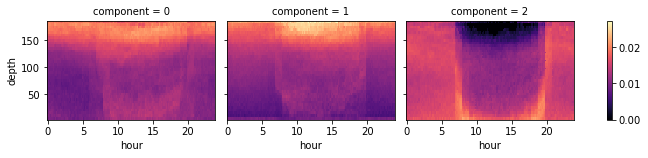

In [222]:
he = daily_echogram.plot(col='component', cmap='magma', figsize=(10,2.3))

In [228]:
def check_factor_daily_echogram_together(tl_results):
    
    daily_echogram = xr.DataArray(
    nonneg_3_svd.factors[2].reshape(37,144,3),
    coords=[('depth', low_rank['depth']),
            ('hour', low_rank['hour']),
            ('component', range(3))])
    he = daily_echogram.plot(col='component', cmap='magma', figsize=(10,2.3))

In [229]:
def check_factor_daily_echogram_onebyone(tl_results):
    fig,ax = plt.subplots(1,3,figsize=(10,2.3))
    for i in range(3):
        im = ax[i].imshow(tl_results.factors[2][:,i].reshape((37,144)),
                          aspect='auto',cmap='magma')
        ax[i].set_title('Component %d'% i, fontsize=14)
        ax[i].set_xticks(np.arange(0,145,24))
        ax[i].set_yticks(range(0,37,18))
        ax[i].set_xlabel('Hour of day', fontsize=14)
        if ax[i].is_first_col():
            ax[i].set_ylabel('Depth (m)', fontsize=14)
        fig.colorbar(im, ax=ax[i])
    plt.tight_layout()
    plt.show()

In [230]:
def check_factor_activation_frequency(tl_results):
    
    freq_signature = xr.DataArray(
        tl_results.factors[0],
        coords=[('frequency', low_rank['frequency']),
                ('component', range(3))])
    
    fig = plt.figure(figsize=(12,2.8), constrained_layout=True)
    gs = fig.add_gridspec(1, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    h1 = freq_signature.plot.line(ax=ax1, x='frequency', 
                                  linewidth=3, marker='o', add_legend=True)
    ax1.set_xticks([38000,120000,200000])
    ax1.set_xticklabels([38,120,200], fontsize=12)
    ax1.set_xlabel('Frequency (kHz)', fontsize=14)
    ax1.set_ylabel('Relative strength', fontsize=14)
    ax1.tick_params(labelsize=12)

    day_activation = xr.DataArray(
        tl_results.factors[1].T, 
        coords=[('component', range(3)),
                ('date', low_rank['date'])])
    
    ax2 = fig.add_subplot(gs[0, 1:])
    h2 = day_activation.plot.line(ax=ax2, x='date', 
                                  linewidth=3, add_legend=False)
    ax2.set_ylabel('Relative strength', fontsize=14)
    ax2.set_xlabel('Time',fontsize=14)
    ax2.tick_params(labelsize=12)

    plt.show()
    return fig

### Daily echogram: `init='random'`

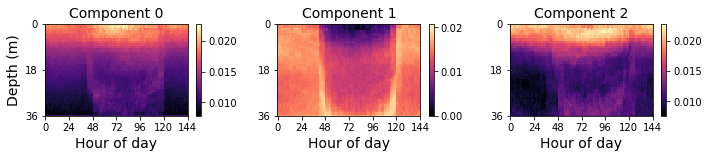

In [231]:
fig = check_factor_daily_echogram_onebyone(nonneg_3_rand)

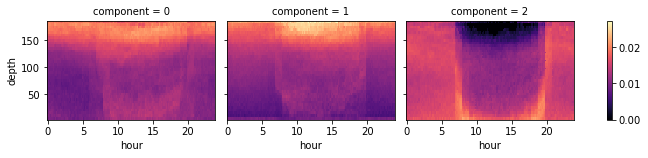

In [232]:
check_factor_daily_echogram_together(nonneg_3_rand)

### Daily echogram: `init='svd'`

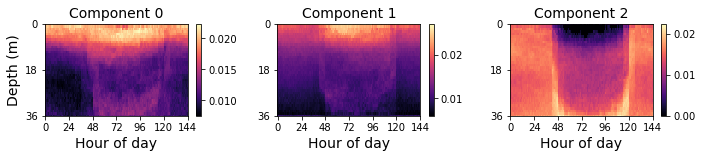

In [234]:
fig = check_factor_daily_echogram_onebyone(nonneg_3_svd)

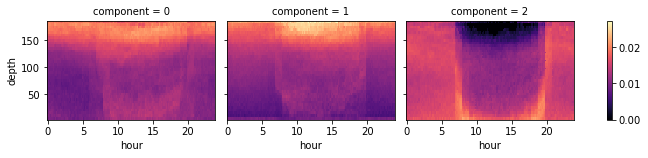

In [235]:
check_factor_daily_echogram_together(nonneg_3_svd)

These patterns are broadly similar, but there are also subtle differences when comparing the patterns with respect to the color scales.

The correspondence between the two decompositions are:

| `init='random'` | `init='svd'` |
|:---------------:| ------------:|
| 0               | 1            |
| 1               | 2            |
| 2               | 0            |

### Activation sequence and frequency signature: `init='random'`

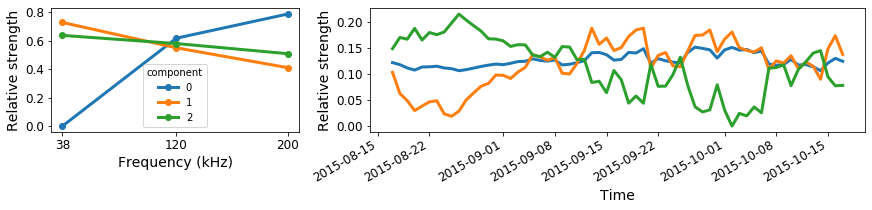

In [194]:
fig = check_factor_activation_frequency(nonneg_3_rand)

### Activation sequence and frequency signature: `init='svd'`

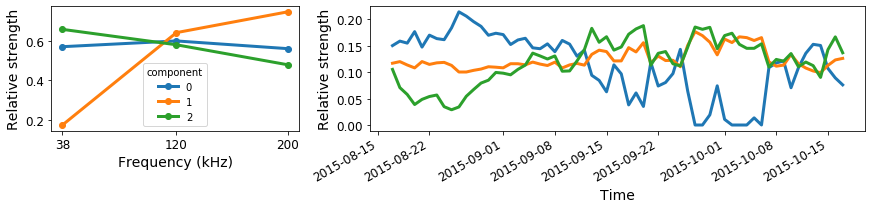

In [195]:
fig = check_factor_activation_frequency(nonneg_3_svd)

## Check similarity between days

Here we look into if the activation sequence can tell us how similar are the days within the observation period. To do this, we first normalize the activation coefficients by their respective range of values, and then do clustering using the distance calculated from the normalized coefficients.

In [116]:
from scipy.spatial.distance import pdist, squareform

In [117]:
nonneg_3_rand.factors[1].shape

(62, 3)

In [135]:
def check_day_similarity(tl_results):
    # Normalize the activation coefficients
    k = tl_results.factors[1].T
    k_norm = k.T-k.min(axis=1)
    k_norm = k_norm/k_norm.max(axis=0)
    D = pdist(k_norm, 'euclidean')
    D_square = squareform(D)
    similarity_m = 1-D_square/D_square.max()

    # Check similarity between any two days within the observation period
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    plt.imshow(similarity_m,cmap='RdYlBu_r')
    plt.xticks(np.arange(0,62,10),fontsize=14)
    plt.yticks(np.arange(0,62,10),fontsize=14)
    plt.xlabel('Day',fontsize=16)
    plt.ylabel('Day',fontsize=16)
    
    cbaxes = fig.add_axes([0.8, 0.125, 0.03, 0.755]) 
    cbar = plt.colorbar(cax = cbaxes)  
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_ylabel('Similarity', rotation=90, fontsize=16)
    plt.show()
    
    return fig, similarity_m

### Similarity matrix: `init='random'`

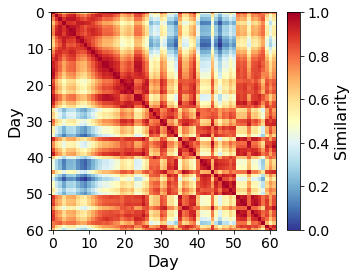

In [136]:
fig, similarity_m_rand = check_day_similarity(nonneg_3_rand)

### Similarity matrix: `init='svd'`

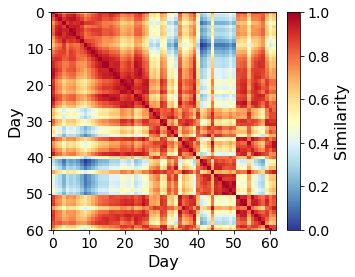

In [137]:
fig, similarity_m_svd = check_day_similarity(nonneg_3_svd)

The similarity matrix across days are broadly similar, which is consistent with the broadly similar decomposed factors.

### Difference of the similarity matrices

In [159]:
similarity_m_diff = similarity_m_svd-similarity_m_rand

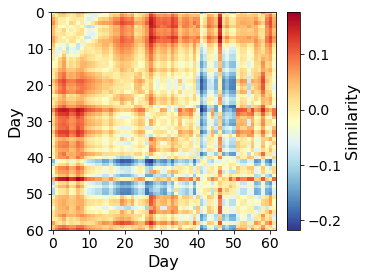

In [160]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
plt.imshow(similarity_m_diff, cmap='RdYlBu_r')
plt.xticks(np.arange(0,62,10),fontsize=14)
plt.yticks(np.arange(0,62,10),fontsize=14)
plt.xlabel('Day',fontsize=16)
plt.ylabel('Day',fontsize=16)

cbaxes = fig.add_axes([0.8, 0.125, 0.03, 0.755]) 
cbar = plt.colorbar(cax = cbaxes)  
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_ylabel('Similarity', rotation=90, fontsize=16)
plt.show()

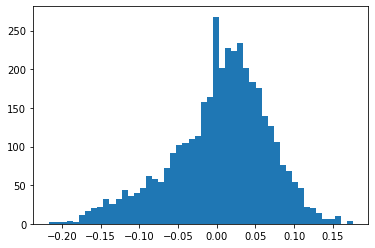

In [161]:
hist_sim = plt.hist(similarity_m_diff.reshape([-1,1]), bins=50)

In [163]:
(similarity_m_diff.reshape([-1,1]).mean(), similarity_m_diff.reshape([-1,1]).std())

(0.004049797618361655, 0.0628818424033899)

## Reconstruct data from tensor factors

Let's first go through the steps to reconstruct the data from factors, and assemble the reconstruction restuls into a DataArray.

In [262]:
# Reconstruction
full_tensor_nonneg_3_rand = tl.kruskal_to_tensor(nonneg_3_rand)

In [263]:
# Double check the shape of the reconstructed tensor
full_tensor_nonneg_3_rand.shape

(3, 62, 5328)

In [265]:
# Assemble reconstructed data into a DataArray to make plotting easier
recon_nonneg_3_rand = []
for f in range(3):
    recon_nonneg_3_rand.append(tl.unfold(tl.tensor(full_tensor_nonneg_3_rand[f,:,:].reshape((62,37,144))).squeeze()+
                                    sonar_tensor.min(), mode=1)[::-1,:])
recon_nonneg_3_rand[0].shape

(37, 8928)

Now that we've verified the steps and the dimensions, let's make a function out of it for convenience.

In [269]:
def reconstruct_data(tl_results):
    tl_recon_temp = tl.kruskal_to_tensor(tl_results)   # reconstruction
    tl_recon = []
    for f in range(3):
        tl_recon.append(tl.unfold(tl.tensor(tl_recon_temp[f,:,:].reshape((62,37,144))).squeeze()+
                                        sonar_tensor.min(), mode=1)[::-1,:])
    tl_recon_da = xr.DataArray(np.array(tl_recon), 
                              coords=[('frequency', low_rank['frequency']), 
                                      ('depth', low_rank['depth']), 
                                      ('ping_time', MVBS['ping_time'])])
    return tl_recon_da

In [270]:
recon_nonneg_3_svd = reconstruct_data(nonneg_3_svd)
recon_nonneg_3_rand = reconstruct_data(nonneg_3_rand)

In [304]:
low_rank_reshape = np.moveaxis(low_rank.values,[0,1,2],[2,0,1]).reshape([3,37,-1])
low_rank_reshape_da = xr.DataArray(low_rank_reshape, 
                                   coords=[('frequency', low_rank['frequency']),
                                           ('depth', low_rank['depth']),
                                           ('ping_time', MVBS['ping_time'])])

### PCP low-rank component

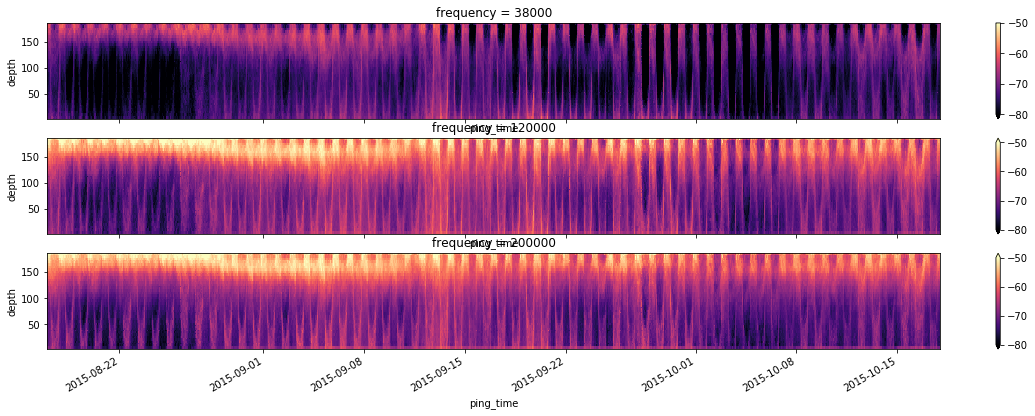

In [309]:
fig, ax = plt.subplots(3, 1, figsize=(20,6), sharex=True)
for ifreq, freq in enumerate([38000,120000,200000]):
    low_rank_reshape_da.sel(frequency=freq).plot(ax=ax[ifreq], yincrease=True, cmap='magma', vmin=-80, vmax=-50)

### Reconstruction: `init='random'`

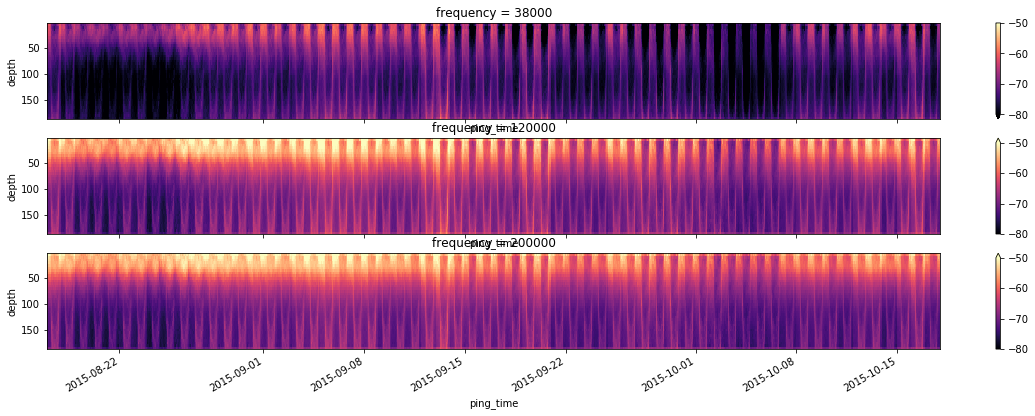

In [310]:
fig, ax = plt.subplots(3, 1, figsize=(20,6), sharex=True)
for ifreq, freq in enumerate([38000,120000,200000]):
    recon_nonneg_3_rand.sel(frequency=freq).plot(ax=ax[ifreq], yincrease=False, cmap='magma', vmin=-80, vmax=-50)

Also check the differences between data and the reconstruction:

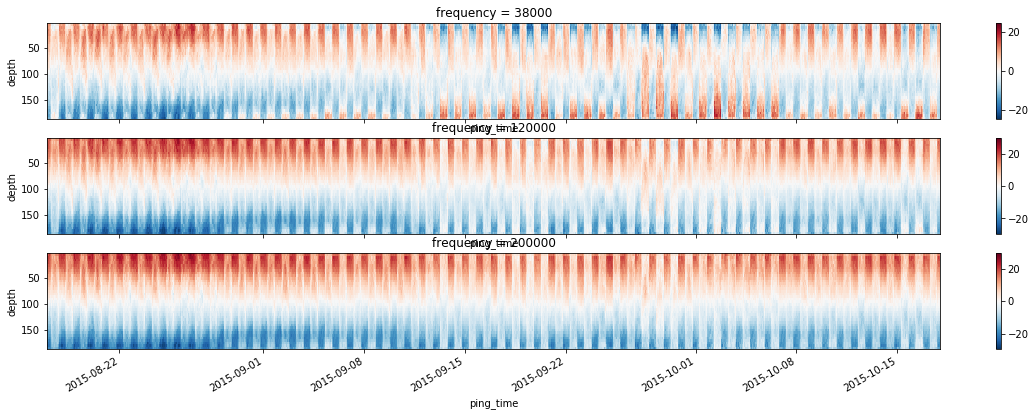

In [313]:
fig, ax = plt.subplots(3, 1, figsize=(20,6), sharex=True)
for ifreq, freq in enumerate([38000,120000,200000]):
    (recon_nonneg_3_rand-low_rank_reshape_da).sel(frequency=freq).plot(ax=ax[ifreq], yincrease=False)

### Reconstruction: `init='svd'`

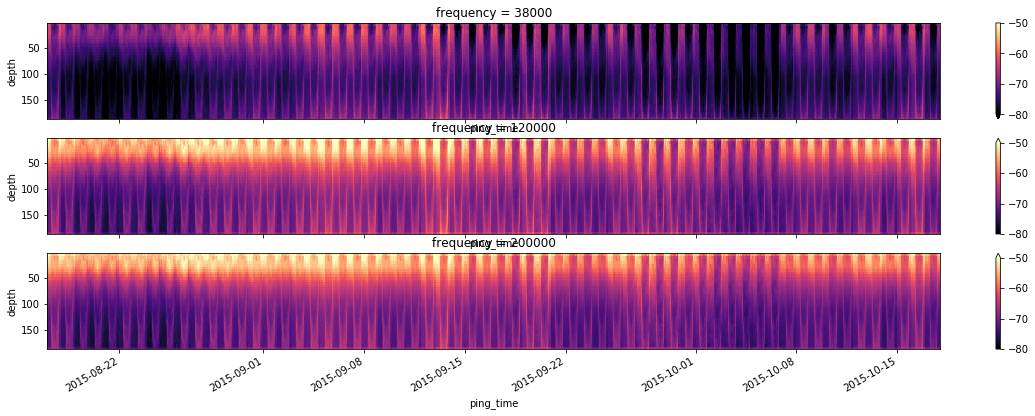

In [311]:
fig, ax = plt.subplots(3, 1, figsize=(20,6), sharex=True)
for ifreq, freq in enumerate([38000,120000,200000]):
    recon_nonneg_3_svd.sel(frequency=freq).plot(ax=ax[ifreq], yincrease=False, cmap='magma', vmin=-80, vmax=-50)

Also check the differences between data and the reconstruction:

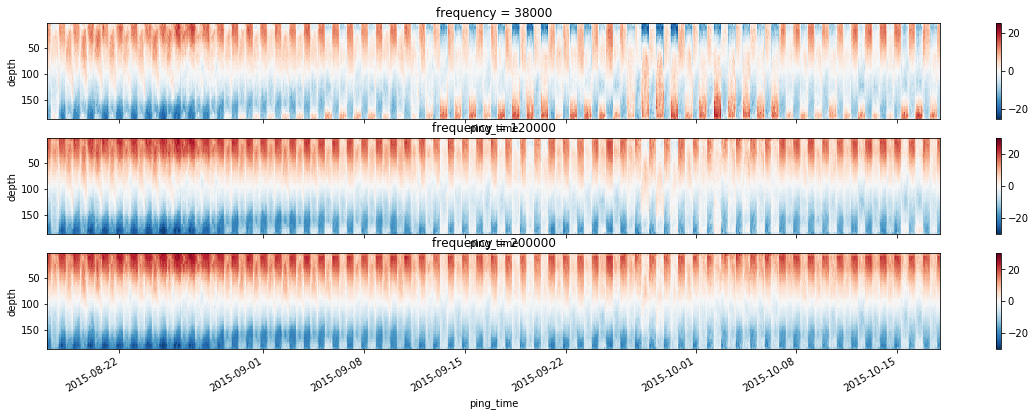

In [312]:
fig, ax = plt.subplots(3, 1, figsize=(20,6), sharex=True)
for ifreq, freq in enumerate([38000,120000,200000]):
    (recon_nonneg_3_svd-low_rank_reshape_da).sel(frequency=freq).plot(ax=ax[ifreq], yincrease=False)

### Is one decomposition better than the other?

In [346]:
def norm_test(x):
    return np.sqrt(np.sum(x**2))

In [347]:
(recon_nonneg_3_rand-low_rank_reshape_da).groupby('frequency').map(norm_test)

<xarray.DataArray (frequency: 3)>
array([3739.39148224, 5290.08510237, 5811.8332423 ])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000

In [348]:
(recon_nonneg_3_svd-low_rank_reshape_da).groupby('frequency').map(norm_test)

<xarray.DataArray (frequency: 3)>
array([3667.30265256, 5303.97356311, 5848.29488047])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000

In [349]:
(recon_nonneg_3_rand-low_rank_reshape_da).groupby('frequency').mean(...)

<xarray.DataArray (frequency: 3)>
array([ 0.03112423, -0.01032654,  0.00155996])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000

In [350]:
(recon_nonneg_3_svd-low_rank_reshape_da).groupby('frequency').mean(...)

<xarray.DataArray (frequency: 3)>
array([ 0.05911312, -0.01590674, -0.01783199])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000

In [351]:
(recon_nonneg_3_rand-low_rank_reshape_da).groupby('frequency').std(...)

<xarray.DataArray (frequency: 3)>
array([ 6.50605922,  9.20416578, 10.11195636])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000

In [327]:
(recon_nonneg_3_svd-low_rank_reshape_da).groupby('frequency').std(...)

<xarray.DataArray (frequency: 3)>
array([ 6.38043313,  9.22832228, 10.17538013])
Coordinates:
  * frequency  (frequency) int64 38000 120000 200000